# Answering Business Questions Using SQL

In this project we will be answering business questions by querying a local SQLite database. The database is from a fictional music record selling business  that has tables ranging from employees, customers, sales, and their music products. 

__Learning Objective:__ practice and demonstrate Intermediate SQL capability.  

## The Database 

Load Database into Jupyter from our local file. 

In [1]:
%%capture
%load_ext sql
%sql sqlite:///chinook.db

Print a table of the available subtables within our database.

In [2]:
%%sql
SELECT name,
       type
  FROM sqlite_master
 WHERE type IN ("table","view");

 * sqlite:///chinook.db
Done.


name,type
album,table
artist,table
customer,table
employee,table
genre,table
invoice,table
invoice_line,table
media_type,table
playlist,table
playlist_track,table


Below is an image representation of our database structure and table relationships that will be a helpful reference as we call our data.

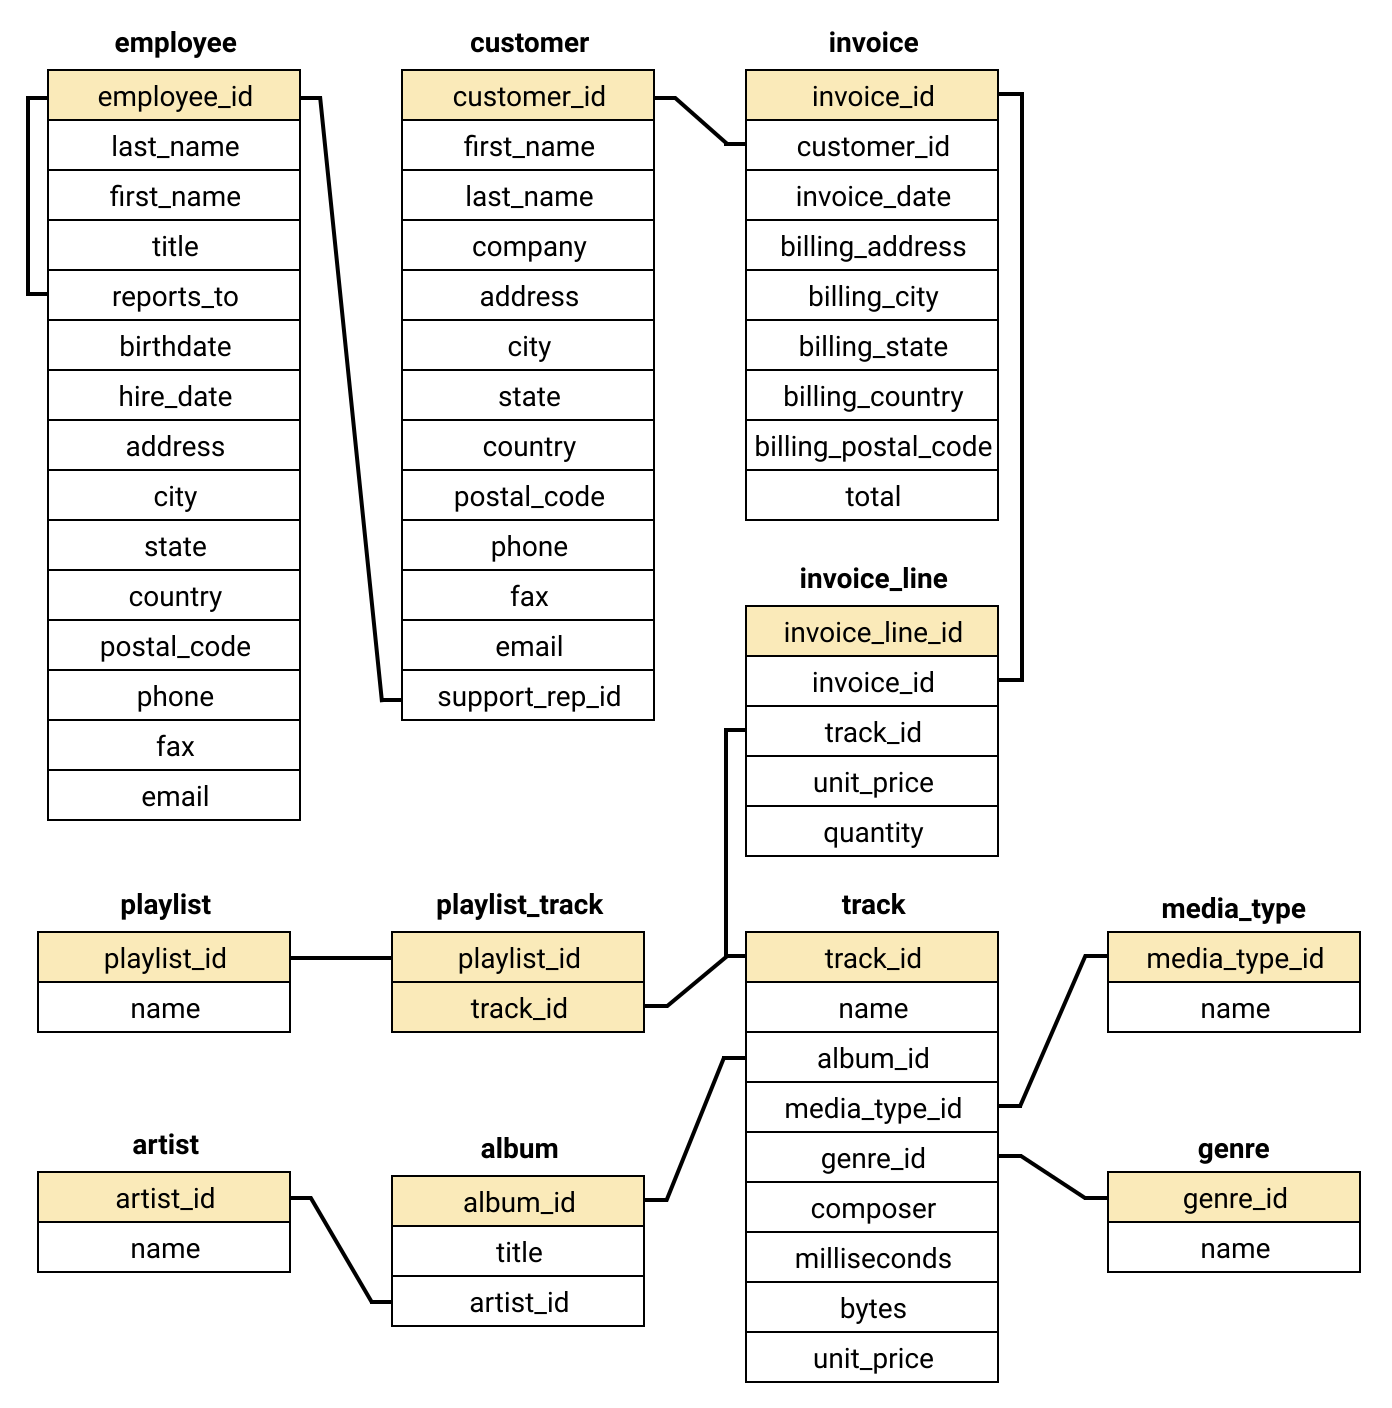

In [3]:
# display base64 image of the database structure
from IPython import display
from base64 import b64decode
base64_data = "iVBORw0KGgoAAAANSUhEUgAABXAAAAWACAIAAAB/f/ngAAAABmJLR0QA/wD/AP+gvaeTAAJEOUlEQVR42uydBZgdRfa3cdvgDsGCayC4uwUNurgFZ3FdYIO7L+7u7g4LwQnuDsHdFod87zdnqX/RfefOvZOZyZ2Z933q4SHddfv2rek6fepXp04NN0REREREREREpE6GswlEREREREREpF4UFERERERERESkbhQURERERERERKRuFBREREREREREpG4UFERERERERESkbhQURERERERERKRuFBREREREREREpG4UFERERERERESkbhQURERERERERKRuFBREREREREREpG4UFERERERERESkbhQURERERERERKRuFBREREREREREpG4UFERERERERESkbhQURERERERERKRuFBREREREREREpG4UFERERERERESkbhQURERERERERKRuFBREREREREREpG4UFERERERERESkbhQURERERERERKRuFBREREREREREpG4UFERERERERESkbhQURERERERERKRuFBREREREREREpG4UFERERERERESkbhQURERERERERKRuFBREREREREREpG4UFERERERERESkbhQURERERERERKRuFBS6O9tuu+1wf3LeeefZICIiIo3Md999d8ghh2y++eYXX3xxA97eF198sf/++/fv3//666/3jyUi0uVRUOjuKCiIiIh0IjbbbLP04r7qqqsa7fb69u0b9zb88MP/5z//8e8lItK1UVDo7igoiEhw4YUXnvEnv/76qw0i0pjMNddc6cW9zz77NNrtTTbZZOn2TjjhBP9eIiJdGwWF7o6CgogEE000UbIGP/zwgw0i0pgceuih0U9HGWWUxx57rNFub8cdd4zb69Gjx2uvvebfS0Ska6Og0N1RUBCRQEFBpLPwwAMPnHPOOY05XP/jjz/uuOMOPIr33nvPv5SISJdHQaFD+f777+uq//vvv//3v/+teIqcTLyza7zOz00MjaDwyy+//Pjjj8O8Tahc+68W6aTQ6+lx7XHlL7/8skoPql1Q4Oxvv/3W8dYMK1TXWgxlEZG6vIWOfBdzY7WbkXrdJxERUVDoUmODU089dZ555vnb3/6Gmz7qqKMuuuii5557buE9uu66687dxHLLLcd7+vzzz+cjI444Ih+ZZJJJ9thjjxjPv/LKK3//+9/HGmssjo800kiLLLLIXXfdlV/n6KOPnvtPBg8efNppp80888wxQph++ukPO+ywgrJQXVB46qmntthii549e8adjD/++Ouss87AgQNTBZI5c5/pG999993846ShTqcOPPDAXODgBy688MLxQ0YeeeT55pvvpJNOqqh60Bpkil5++eX5diqPMMIIs802G1f75ptvfLqkK3HzzTeTzGzMMceM/jjllFPusMMOhSm+VVddNfUp1IHczqTjyy67bMFrpyfOMccc0YtJkzbDDDPsvPPOqbd+/fXX8UFMSrIGLNLmCPYkVwSuvfZaDNQEE0wQdaabbrpddtmlPAm53nrrxQWXXnpp+u9FF10077zzxrdPPPHEu+22W4zzX331VWqOPfbYHOcsBoFZzYot89BDD2EhJ5100vjeXr16/eMf/3j//ffzOqSmSy1wexOzzjprfKOPlnQxDjjggPS0p17DGzwdfOSRR/AW6DXJW1h88cVTfkR6Ja/UVPmll17KL37KKaekU4cffng6jspJX8aBGXfcccOSzDLLLPvtt99nn31WuD2WPKQrPPHEE4UX+iWXXIJlGH300ZNnstdee3366afln1nRVTjxxBObmyAREREFhS7IW2+9Nfvssw9XCfxyHP1UM1VjSeQmm2xSrr/iiived9996R2cwBFnHJK/yNMpXvzl6yy22GL5rF1zggJv/SOOOCLGAGV23333NDvByz4dP/nkk/Ofj9+fTt14441x8OOPP84/koOvUHBNmJRYa621KlaeZpppXJwpXQM89Y033rjic47vTsev2KdyF/zbb79Nxwk0SMfffPPNaaedtuKVWd4cpuPzzz8frhl22mmnuA76HVpGxTooINddd13+c+acc844xTCGne0qWj8CtscYY4yyNbvhhhvyS6FiMNio+L0oEXnLoNumUxtssEGyXeOMM44PmHQx8l0eLrvssjjIhEE6uM0225S9BbyLpClstdVW6fgxxxyTX5yJinTqtttuSy/u/HjOhBNOWNjKIe3yAPfee2/+Qs9P5ZDH8ZlnnskvUperICIiCgpdE/SC3Psvs+GGG5YFhSoQ3VDxOPONaXifCwrNwQxhi4LCv//97+oXYZfpqImIkA6usMIK6QovvvhiPiiKKQXClfv06VPlskyu5oGUzakJwUwzzdRcELVIJ4J5/irPOSPnNBtfl6DAaLx379653z///PPn6xoY0iN61iIoNDcMCJg5zEcUSVBohTVD/sgtwIABA6pcBLHgnXfeKQsKOcRT+IBJdxMUmgMLEJXvvvvuXOBLVyZeKUUqERUYa694cRNrUOWyqIovvPBCi4ICEY5VLkIsJHYsarboKiyzzDKufxQRUVDo+uy6667p5Uds8DXXXPP8888zaM8detYUlAWFKaaY4vLLL3/uueeY95t66qnzl+hSSy11zz33PP3007gOBBym4ylkMRcUcNmphupPwPBqq62WH2epQhVBgdFLLNAIqPPkk09yq4RJp4P4HC+//DKVP/nkk+R/jDbaaCns4sgjj0yV+/fvHwePOuqofEbi4osvpk34sVNNNVU6fuutt0ZlVjrk/grKxbPPPnvLLbfkO2YR/eiTJp0apLfUl+mbrDKgrzExmD/nKA6tEBSIAsj971g29dNPP62++urp+L777svyqzebiFVFAXfFEbQGPnLppZem41gG1EYMDoZoySWXTMdZWpWyG+SCwuSTT86AB2tG6AFRRbk1W2KJJcKaEQyVWzMqx3X4FqSKZHAQMWkZohJWWmmlsm0pCwq0Aws9WJPlMybdTVCgQ2E0eHGzBwSyYN4vwm7Q61kNlF7cKW6RZU3lzoVRyhU6liHw9udNndsounN1QYHlmblIynpM+j5ODt5ROVaioqtwxRVX5B4RzoBPgoiIgkJXhgn5WGcYb+s8OB/HuhwskAsKjP9TZbIt5EJDnhmRJZHpVAo5zgWFgw8+OFXG1yeQoawdVBQUcu+BRZj578qXY6RBDoEJ5TvJF1wwbBjStIwiRV+TCuHRRx9Nl8XpycOVy5fFn0iVP/jggxTMydpsHzbp1OQ63T//+c90/MMPP0zPOWuVWyEoXHjhhekg+8ylyg8//PAyf3LQQQel480lZUTHTMcvuOCCdJw6GKV06s477ywLCnnkAp/NhYb8K1hTnU6RDSEOsrQqHWThQ25dkyVh4UYIGbmggOpx0003OYEp3VZQYEVDXp/EQ+lUyoKUv/3JORIHWStR7tEzzjhjOkhoQ7osgmPK+RIqZBVBYe21104HSdOQLkJoQx6iWHAVUEZyV+Hxxx9Plddff32fBBERBYWuDG/iPP1BfooofYbTcYolgmVB4e23306VefdXjEuELbfcsuzl54ICYkRen2nAdIpkb1UEBfIspIP3339/fhFmCNMpfJQ4yHxFOkgSxyFNyRpT2AKp1CIDJROPecq3QosRvZyiOYY0LRhJk5MkZCqkdmcJZYq1ZsbV5006L3lkbyE7Gt0zhv1EGLVCUGAwnw4SfUAH/+qrr6rcSUVBgSunfATMKxZ6Iuke00fIHVsWFF5//fVUmURx6TgKQuGXplNshhcHydaWDhIukdfHzqRTsfQ6FxSSfRPpnoICHTOvny8eTBP7vNzTQQIq42AKI2KFVHR2pkPy9ZWFO8l77gknnFBFUEgBEWgELKzIL8JSiDB04T/krgLGpPCNaaoG0cEnQUREQaErc8YZZ+T+/dx/JQkKDA+qCwr51H0heft2221X1g6qCAp5ZES/fv2qCAp5VCHTpPlFmBtMN0/kRcwBkrCN/4+D7EnBym3SOJeXYec3gE9QaJO0pprZRSoTUZmv9C5UjpzPQSHZu0jnIl9o0GJOkHpzKLBkupD1EDFun332KQiFVQQFNI4qzn3eqVlJUV1QIAA7X72VXyc3XGeeeeaQpllKcsilEUjBAqTBScoblwsKSdoQUVAY0rTxSjpF8E6yD2nnFLZEKWgHW2+9dVTLlyqw2qhwJ6xcSGe333775gQFgivzt3/1X0cK51pcBRwDnwQREQWFrgyBxMPVQHL9O0BQyIMdmAqoIiikBAr48eVd31MoAaQlGPkECPecuy8pXpFxwnC1gaOTT55UJ1I5iHRSUiQOqlyLlevd5YEUJ3nGhBySC6QQ5SqCQh7mwFZzhfth9UQ6S0qFNhQUqqSKLHDllVcqKIiCQr2CArD9ajrOPtN5iuVYqDjkrylU2LSlcCcsUCrnmS4LChiiPPFq9V931lln1dj3C9tvi4iIgkKXIl9fgMTeqxlSwrAOEBRy1X+VVVapIijk44pCaCI5n1OEAgOhtEqZlJPpI8x/5kGJqU6+MoKFl72aBy8hH6gw0KpS+Y033vB5k85L6izody3ur16voBDg07NCiuihgjtOcEQeglRRUBg0aFA6mJZoJRiclK1KLYJCUh+aExRY9JSOYHOqWIAI4VZQEAWFegWFBx98MHcY0tawRAClsXruObA2oXAnp59+er5XZXOCArFX+XYz1X9dnmylRVfBh0FEREGhy5K/EddYY40W63eAoMCGCOXszRUFhXxRN3mY84uwyVw6xcqIdJxQBdZXpzRpeQ75VOeOO+5IxxdaaKHqDUIj5AMkYhZ8qKRLQsLF9Ki/++67+SlG+7H/Av2uLCgw6VejoBDQiUg3QPBUvsgC+a+6oMBu8Hm69UKmw3xKE4vUhoICpHxvSC2FtVdlFBREQaFeQQGbQHrU5KikHpf68pC/Jk4q75mCASl/acUcCslDQB+M3SgT7733Xhg6/mfIX1NQtegqiIiIgkKXhd3R0xuRVO2FXGvAlkv5aoJaBIW0TqFGQeGkk07K6y+yyCLpFM53FUEhv0jKgBDkmzml+MZg0003LUckstVTPuZJi6JZy51vZhGQPjpfQ57vJUm++kLlJ5544qOPPvJJk85Onl+QHRnTcYbuKZvJlFNOGQfzbO252JcP+5OgkHI6svI5l+Ty7SRXXnnlioJC2v8V8g1ikAXzm2evuHSKzCltKyhwb+ngnnvuWWg3xJdIx6igIAoKrRMUhmS7zKTYw0IyZhyVlLQIaS9/pxMgMNNMM5U/VVFQyLdtYnPKdBHSKqdVlgsuuOCQpuikulwFERFRUOiy5K9PMifffPPNEc/MZCPeMy9mliOm6b72EBQYHqD08xV8b74Egzd0SmRYUVB49tln07bwvNeJtsBvYEDCWmXSIKX6bAif308egBDwowptkosOBFVefvnlkYWBnSD3228/1lAQNZ10ltw9wuFgrIUkMaRpCwmySePisFVEHBHpvOTpQsiRRhAy3e37778n73o50pgOkg6y9UOsSHr11VfznR2ToLDRRhuVR/tD/rpOgZFGOp5vDkd9unzEKeTWgxAJtLxw+hm357vTJxe/FkEh37W+OUEhv09GO3vvvXes8uCuWNfds2dPmivFbigoiIJCKwSFfHVhskKFkMA81QKv3chbxIs4f6FjPdKnKgoKeapmNEoCH6jPRXIzlfaizn9gi66CiIgoKHRZiErINyMAdlJMSnxhu8f2EBRSfETKihzgBKSLVBQUhvx1T8rIYsB18iNrrrlm4ffyds9TrwP+TaEOQkZhITfjhHyJBBx55JFRmTHVHHPMUfg5KWwy36VSpFNDBEGhu+WzhSiA7L4eNdm/Pa+J8JdrfAVBAZc97fhITSRO/HWGFvlHrr/++nQb5fSNseUt2kGuNcTC5rQvbGGvxzYUFCreEkY1yZ3ANhYKCqKg0GpBgSkHAqDyLoZ8UPg6AqAKL3dexMm2hHkh6DLVrygosMxh3nnnzS9SsF38M+mDCAdpB4oWXQUREVFQ6Mow98jEXXMJinHWCfarXVAo7NzeoqBQEC8CAhRJn96ioMAcYB5vXGDxxRcvJGsM2P499zCSc5DDIGeKKaZo7spEPOZXZkVl7969m6tMxkeWlviYSWfns88+Y3FyxYccr520Z6kmUQB5jHECnS5523kOBTKhFkb+VUYOeWrVXFCAV155Jd9NtkCeiKFGQQEbUouggJaRD04KkM8yhUMrKIiCQisEBdhtt93ybkWQVPkb2a2JZIrN2ajC+sqKgsKQpqWg008/fcWLMO1x3XXX1e4qLLDAAhWdEBERUVDogiC0M/Ifb7zx8nchWQ+Z0MvTm7WHoMAaAQIN0qZ0/M/666+fZ4avIigMaVoeecYZZ+TLpyMR43HHHddcLnqc+1waaK5NUDRYEV2Y8SA1HQsZykGMSBtMRBQGM6RXIO7RVZTSZeBhPvDAA/P4Hdx0FjKU1w9jUhD7UggD/0PoAfnMktBQSMpIqgXCgwthSrjjV199dfk2jj322JSYrZBhgW5LgEOe0JGvppvfdttthYu0oaAwpClvHKapEKzEbZBSnonTVE1BQRQUWico5G4GORqbS4FMgCHpnPO4S8RK3JKyjWpOUIAvv/ySxVy5GcEzwc7kqRla5yqIiIiCQheHNzTLDtnRndDl3Aluc8q7PHz11VcPNcGLvHXXJEyAjzNrUTHiIIdJjPTtbCpRvTJ6ymuvvcZlWcPJGKnF2yAHG7cxcOBAbqOQal6ka8CDTUIEDAV5CvJIojIogwObyPd6qAJT/bjs7C2PCcImVKmJXEg8AsOAF154obwrG0dYzEXsFZ29+h22OfxkvpTG4fYcTogME1i5gCXBPqAPtjpGIJkRwhCqm6NWuAoiIqKgIG0sKHQkRECkyVW3YBAREREREenCKCh0NYaJoMB8Basf8zyOxGD7txAREREREenCKCh0NYaJoJACE9LKakIT/VuIiIiIiIh0YRQUuhqNICgMGDDAP4SIiIiIiEjXRkGhq4GIsPaf3HfffR3zpWSnZyNr9pQic3vF1PEiIiIiIiLSxVBQEBEREREREZG6UVAQERERERERkbpRUBARERERERGRulFQEBEREREREZG6UVAQERERERERkbpRUBARERERERGRulFQEBEREREREZG6UVAQERERERERkbpRUBARERERERGRulFQEBEREREREZG6UVAQERERERERkbppLEFhOJFuiZZIKyGildAOiGgHRERBQRdBRBdBKyGildAOiGgHRERBYVi4CL98eofF0k2KLoJWwmLRSmgHLBbtgIgoKOgiWCy6CFoJi0UroR2wWLQDIqKgoItgsegiOJCwWLQS2gGLRTsgIqKgYLHoIjiQsFi0EtoBi0U7ICKioGCx6CI4kLBYtBLaAYtFOyAioqCgi2DRRRCthMWildAOWCzaARFRUNBFsFh0EbQSFotWQjtgsWgHRERBQRfBYtFF0EpYLFoJ7YDFoh0QEVFQsFh0ERxIWCxaCe2AxaIdEBFRULBYdBEcSFgsWgntgMWiHRARUVDwzWHRRRCthMWildAOWCzaARFRUNBFsFh0EbQSFotWQjtgsWgHRERBQRfBYtFF0EpYLFoJ7YDFoh0QEQUFXQSLRRfBgYTFopXQDlgs2gEREQWFblyeffCsaMPzTtmzy//Yj1+9+t3nLq2x8k2XHxotc9d1R+siOJCwdIfy/ktXUGqsfP6pe8aj9cyDZzqQ0A50cPnqnRtee/KCxry3t5+55LM3rm2oW3rzqYs+f/O6GivvvO2aPCqjjjKygoKIiIKCRUHh/8oT9546+mijjjDC8Fed/y8FBQcSFkuh3HntUSOPPBKlxi6voKAdGFbli7eun2zSCfg5++yyXqPd21kn7jb88MOP2WP0Vx4/v0Fu6bhDt6Wtxh2nR40zCgoKIiIKChYFhWre/147/V1BwYGEpVxOP27nU4/Z6cHbTuieP/+Yg7eJR+Xog7ZWUNAONHJ54eFz4ucsvdhcjXZv226+atzbdRcd2CC3tMHaS8ct3X390QoKIiIKCg4VFBRaHyCKo7PhOsvUOEehoOBAoruVkUYakYbadbu1uufP/+jVqzbfcEUKa6MUFLQDDV4O3GfTNVZZ9OE7/t1oN/bqE+evu8aSjMm/f/+WBrml5waetfbqi++547o/fnSbgoKIiIKCQwUFhQ4qCgoOJBQULAoK2gFLdysKCiIiCgqNW75+98baKyOlf/Pejc2dYr699kt9+fb1Qyko1PV1tf/AbwffVGPl/35wC6W9/0B5QykoOJAYVqVKhx2aQnerboJqFBR++PDW796/uV7T99PHt1c8hZXjgu1hQms3L6370ygoaAc6RbaF9gj3G/q3f3PuzVD2+jbp2goKIiIKCg1Xrrv4oCUW6U2OIm61x99GX2m5+e+98dhCnd22X7tP7+m33nRlnOBD999i5hmnJK0R9SeecNwdtlw9shMTQMipGaefYsQRR+DU+OOOtcl6y73z7CWFLOVch0IOwkfu/PfKKyz4tzFGo/Ioo4y01KJzkXWsdkGBV/7FZ+yzyAKzjTXmGPFyXXTB2c89eY98YHDfTcfG11XUI4gw5NR8fWbK/Q9+4ElH7jDHrL24pfiBm22wQnPZqj99/ZoD9t5kul6Tx1Bn6ikn2WW7NYlMbl0sRtxquRHI/8xSiHHG7sFXkJJtsYXmuOHSgxUUHEh0ZGFQTSdacN5ZwlDwHNL1Ljnzn4Vqa622GM/wjlv3K1/hH1v149Q6/ZYoHKdzEcY/6cTjRTtgN6jz+D2nFIwPJdmc+GdhvTGmhh49zVSTRmecZKJxN/77cqzlLgsE8XE60cuPnUfP4hupz6fo9RiQqMYpPh6nAIt37CHbNCc60BlZKx6GCIO2wtLz3nHNkYU6+++xIV/ab+VFsJZbbrJSNONB/9y09j/B/TcfF3eeN05ask7LY73DEi6zeB8aR0FBOzAMSzyrJxy+fTpy+Tn7cWTuOWf4+ZPbB95+Ip7GGKOPGk/sskvMnS+OeODWE+LjPPMVUxhyav65Z85H8gUDNdqoo+DV4CHwXYWPczAu/sHLV/5S2v0BazPVFBOHDZlw/LE3XX95TEFzeSLwDcJw4fNwwROP2L528TEvZxy/S9xSWZvg/Y5rFN4IFgbbyPcqKIiIKCg0UGFSnTH/cCVw3I86cKu8Jn4wx2ebeRqG3+X6OOKDX7wcR6F8avLJJuBU7vTH8Y3WXTbe2YXv/fdR/6hFUMApX3GZ+YarxPJLzZO0fNSBscf6GwcZhJcHSDFaoH46+N4Ll88zV4VfgY9SzpbEveF5VPzJ5WFMiwV3Kj5+5Xl/2eXhsbtPCSmhAGMGBQUHEh1T6G50k4rdbb21lsrX/c4609QcZKhQvkjfZf9/h519lmkKOxfEAKAAxoFk7LnxKXPNhQfk1xlv3DHLdXDEC6YD9TBO4ZqHmlmAQf4tVx4Wg/MCjB/KZmSrTVaqeHsH77tZXhOLx8Gek0+4wDwzpzp771xHDnwUkPjUPTccUxhysEFM4dvZL4ZxiIKCdmDY/onR+NIRXu5xEEWA57PwxCIBPHT7SVGTyYnozsxhlK88y4xTcQp7ko588to1KHoVu+EqKyxYiDWILRWgkK6IflTRhmAK6HplVYIbrvhebkXAAtMS8fFC8BctFipq4X7ChnQZQaEN0YyIiILCMEt3zBtrj3+s8/QDZ/BWxlVl4jEO5kPo5NPjuR6y3+Z4qK8PupC37FxzTJfmFfkvuY7+c8vxzKgT48CLPE5t33+1sqAAjD2YsnjjqYsYfhPaEM49AwmCF1oUFFZafoG4SeIjmEDgFU7NLTZaMfkQaV6CMUC41+8+f1nBe4jKaU4SeaX3bNPGPADJ5PmBSCFXnLs/Y4CYrPjwlSvzBGlMgcYI4dKz9kWJ4IcwzxCzlCgv9SZ8qigoEA46Rc+JYkL4n7uuT7O/9fTF5KbOxyQKCg4k2rusuepi0Yl232Ed9lpjTI7OteqKC8Wd77f7Bq0TFNAp6FbRiVAH6FPMGV5w6l4x6cczT64yqtENyaNGidAnwhnin8lxx4CEc4+Wh6NP3BCbzF974QHTT9szbhuBoCwoRD+lu9HTsX7soRCdFw0CjQMhks0UsCovPXou15yyqRvCo3ednP8oIpLiOHc16P7T+WqiopZcdM6wTvn3hqAQIMtiRU85eseCNNAKQYGYr7C9WGYkjOcfOhtDhNVC5E1fp6CgHWgoQYGuwWw8XZ6uR7jNTtusEceJKUiVQ6cjHKmQpzDtH0GvjCO860M7o6ezHiosw1P/OZ3go6iJW9KioMCdhIZIT7/s7H3xhbBFRGDF5pdEUnDZVPn2a46IcT6TKLx/6fUYEL46DuKTtImgQBBHWDw8DdRV7vDFR8457didUzCXgoKCgogoKAz7wu5rMUtQ2CmalzF+Ocdxi8uCQkGqZ4zN5skVp+/wA4gTjjd0WVBgkqEgxuN8x/t49ZUWri4oIEPEwQF7bVz4USgjhWF5Eg4IR8xrEpUdXnis16AcPqB/1MyHARQEjniv77/HRulg6BQMYwrBCOnekrszNIICI4Q4iFSRV0atWHzhORQUHEh0QLnt6iPiDlH98uP48SEa4m2nvlyXoIDjXrHHsRgqjtOda8mhQPwRxwnkKSxNYkgQQgD/TaHISVBgcUTq+1HOPGHXOEV/L6w8wrkvqyeMhcIyEIFcSI7AxTlOAHZZUGC8UQ7DbrWgkAZj12bxGmHG55x9OgUF7UADCgp02ELUwGp9F45+lywJMxMVX3DxTkTyS3oiUwJR88gDtircw3Zb/G+HyJuvOLS6oIDXETaE6ZD8CozhQ2hgmVKaeIjejSkr5GqJKQ0UyTwqs9WCQpg1JloKPgaKYWiICgoKCiKioDDsC4sDQ/wu5wZjai6mEdL+ZCEo8B4tX2flPyMRyksNWTUd10kJC5OgcPxh25UvFXOevI+Tr1BRUGC9JUdYblBer8hIu6CGsOw5JvkLqx7Id8BB9rVKR3pNPWlEN5RvLAZOzGemwIGIMWbCtlx5phmmLFy51YJCKDJ8b3kEkkYXCgoOJNq1xB7pTIuVu1t6aG+96vBWCArMtsXHmU4sVP7XnhujJlx0+t4tCgp4/HER5vzLX8ocY5y96vx/FQSFXB9MgdNxKhcCUolw6L+v+X+zndtstkoEZ5WDnE8+esfCoCUEBQIfWp2LsSwoYBYmmmCcwtRuKmmgpaCgHWgoQSEPQoxyyp/9han+9GzHG5k4yrxmrKykN6UjC8///2MqSd5UTnFCx4wYKEIaqwgKdPxIUrDvbhuUf0gsC+VmCt2wnCcFMSJOnX7czkMpKHCpmF8hBqpiPhoFBQUFEelMgkKb2LjGNOUhcuf+cZ7LMO6cyclcUCD7YLkyqxxjqr98iinNuA4v7IKgkOdqKs8QEj3RnKCAixDjCqbmKv6uCD3gXZscd3yaiIdkYUIcefK+0+KyxAbHEfyYOMJih/I1WVYd8ydxTT4VlcuJFSgRaVlRfKlLUCCQMlwK0kR1um0jh5Jvv/3WgUSDlIiwJedfxVzomAhKWk9Ul6DAuCJ+O/IfKylat20k2V7iInlMcq4wRuI35ioLggJOfLl+VE6zkXkJdW/lTHAM7TKPqEqFlRHxLaS8zQUFGrPVf4iyoECjxRGiqzrjtpFDyY477vj7779rBzqdoPDGX6MAKMTXxCnSMaaDRANFl0lKwRt/DrOTgsmcR8VAy1T6b9w3ljGmpRNlQeHqCwZUeZnypZi4FLIUFyRsoeK+TqzRaC71Q12CQoreSj6Y20bW4qU7BBIRBYWO3qsp7g3dnWxGhbLQfLPG2QtP27tFQSESMeCID72ggOQfZ1k40JygwJLmOJJythUKx6MCNeMI/nRh1QPzn+FkJNEBvz/qsLaz3CAxloDYtILQyvgn+0qUK0emRhyOoRQUmLatEs3RtQWFV155RUGhQTZ3CH+94kRZudSblJH4/5REkLnHvXb6O457c/lHKgoKcQW6W3PrCCLPy3JLzlOLoBDhzVVSwSVBgeFEjG2IdSobgchEA4ik7Sco0FZVFlh1eUEB+vXr98MPP2gHuoygwEqHdJA3eHSx9MBH7CSdKKkDaW6gvONMFF76BfmgLCikOrXImliSWHNR7vWUSDFbUWSsS1BIPkbFBM8KCgoKIqKg0BAlTW1Vh5jkjhQUyMFWEAvKggL7SMURZhUq/rQUPpBvQxXLidOqhxhj5GGTKTiiOsRXU5mVDi3WxBMaSkGBuZqCvNJ9BIV7771XQaERCklS4vaOOGDL9hAUYlVCJENNEMbP5GR5HUFFQYGMaxwkd1pztxTZRthkrm0FBUYjtTzJjF7aT1AgP2uVUKnuICjAAgss8Nlnn2kHup6gQKHb5nmdY3VDnrKEUIWKeVhSwXOICvgSzQkKJGOKI/kG0s2VlJqkCqzKHEpBgQVZcaSQ50VBQUFBRBQUGqikxX4kJye4rrmSoog7RlAgdXxhwq0sKKQw6eZmJM4+abd88J/HRbNmgVUPaXVinqgpOd/MgVRpECI7qMyGCyEZcA9VKg+loJDmXirGYnRtQeGiiy5SUGiEQu60uD2e+XYSFKKwPQE2geF62kWSfQpY9dOioBDpUVkp3dwtxaLrNo9QIONj2gG3ihFIcVLtISiQbb6wsKIbCgow88wzv/POO9qBriconHTkDv+/10wyPqseWFcV0VIkQ00VUu5GxLWKtxFXSNGFFQWFtGwq1alS5u0zYyQ2qtLr69q9paKgkFJEF/a2VFBQUBCRTi8odCUXgXFC9ZWHhdIxgkLaIiGtVywLCkyZhhxw4D6bVrxVoqZjtJ/PNuCLRD52ghtZQRCzoHmSuRYnOvLCzTfnGLW6lAUFNoRrLntc4wsKregsO++8c+prRx55pIJCgxTyCHJ7ZAapXVDIt4ivUVDIV2NFGhSgL7coKMRUHv29oD6k1G6xGSQ5aNtWUCDoOhK5FbZ4aK60h6CQzCOjps4oKLS6y3zwwQe9e/fO386TTDLJoEGDtANdTFDgdR+9jLxO8XGWH1acGmEmoOJtRP5CTEeVHAokfy1ncGiuxJbVM0zXsw3bqiwopM6b8kkpKCgoiIiCQiOa8gj7x7+vZQ+zjhEUYuvpfHeJirs8xDYKC8wzc8Vb5RflEc6FvSGIf449qwu5oxmNhOKQoiurlLStXcVf0VaCAiXSMVSMn+x6gsJRRx2V+hrigoJCg5ToOAU/PmVEW3PVxShpeVFM3/HfWgQFcp2ylUNK1JIXcrZTmQjnFgWFlHil4nUYexfOtpWgQIlcMwwtyunlO0ZQYIwUcknF3LpdWFCAr776avHFF89f0D169Lj11lu1A11JUEjbSJEqhQwF/A9Go1AhtobltV5RT5x2mskKZ8uCQloBWvGFTrwkJo4tIfMMzXgpeQhkmwsKpE5obi9MBQUFBRFRUGigEvmNKkbU8xpm/6R8L7c2FxTKSePfevpitlzOd3xsTlBI+Yqu+evW65RLz9q3kH+xsJYS1WDkkf8341Fx00q2q0g7V6XCOkYmOpLMwfgh0jQSiknkc3k5Cfsy1Ls5XEVBIZI14LuU73a9tZbqYoLCxRdfnPraOuuso6DQIOWcf+/eXFDxMQdvE/kUXx90YRyhX0fGskK8AB0/Ih1yQSEG5Khmhe3ckyxY2Oo17ENB8mNQHdvLMbAvpF3gVOzlzqg7Fiu1raCQ9oasGCBA5lfWcLWroPDLn7v/MotbUA2w4csvNU/X3jby559/Xn/99fN39EgjjXTmmWdqB7qSoBBxi+yegJ7Iq7D82ciAwKm09UM5Q3Pu5JQFBcp8fWbiCOoDwZv5FTBNrG7Io65ee/KCUDZZ2FVWEll8VO+ekRUFBUpkliE7zGdvXJtXpg57SCkoKCiIiIJCQxSc75jqZ4DNED0NgMmbQI7ieIWnVQNtLiiE156G6IPuPz3tpJC7BRUFhXTneP8EK0YoI/+lTuz6Rtqk8pZOvIZjQALMaZTjMviuqMAPZ+yUfAXSQJYDuQkQiDUj3EnygfgIjhEeQJVdLesSFFipEcMwlohz5bgl3KAYRXQxQYFEjOlHLbzwwgoKDVLYcyGG9zyKZEKNh5DlQgwPIho5Xw2RkpuiLIQfTMe8/pKDwwMuCAppCn21vgun1cvYnNguDg7Zb/Pyxo10xkhUlnoovTWWQSEfpLQvg1+8fI1VFo3rsMt9ukgbCgoMNkj0EDLlwftuluQMxjzr9FuC4+ONO2bKqdZOggLTpKONOgoHe04+ISkVwqwx5mFONfWmrioowB9//DFgwIBCNlyOaAe6jKCAZzLO2D3iLJunlL+ILhaSIgaKlMzJQJ1x/C4MuSOYMa13aE5QoO/EC504iDf/vD0mOWKBA6dwA1JltryJK+ApUSc5GCQ+CJOIezD0gkLazBKxI01ysB/tPHPNEMcVFBQURERBoSEKCcPY8yxukrE0vj6zhfFaZaI+T/TV5oJCbOHO25dBQgQlBgQCFAb5ZUEh3OgIdITxxx0LLR/fPf7JRGVzmz+lWX1m/itWYGQSkkS6bGwrHf46bnpemVwMsUoiQhUYWqR7YDlJYVahdYIC5arz/xXzISGgTDLR/+4n5ZruMoICW0Wmx2CaaaZRUGicQnfj+Y/7nGC8sTEUKXUiUQZ5shK8/xh4hxfO4xoeNv8fXT4XFBj9Ekj859zyiNgirAGWJ46waqkQ5kPYVJzimowxSL+aTrEJRWgK/Hf6aXtyndRrkPZy9bANBYUYumMV44KYDiYz+RVhQhnn5325nQSFEHHit8eYCvGxYCK6sKAQnHjiiSOMMEL+st58881//fVX7UAXEBQoyUqcesxOFb+LJ5xXcNTh+efFPe44/9Mg0B/f/OvXVRQUIjVj9CP6LzYEtyTe7/yTO89rMl2RxMqojMEJXQ+22WyVNolQoGy3xar53jexvombjOAFBQUFBRFRUGiU8tGrV7E6Mc0AhLO+ygoLsoNje+dQYFUC7nX6XgYqrMIoBA40JyhElnX8/njFBvgQrDVI31XFI2eriObq8I2sfYhRULosLkLFlG/33ngsSRmSrBABisyvlkO4Wy0o/NK023yESKT7IREdI5kuJih899136TeOOuqozD0qKDROYcK//8Z9Y7ydHnUiCMqhQGykwqg7BtUpKoEpuxgVlJMykt2gvG0km0qUt41k2cISi/xfKr5cUKDcdvURaBBpaA1M5TFjWbhI2woKFAwOM5ZJTIyYL8Kh8yVj7SoohBKay7KMqRgdMZnZTQQFuPbaa0cfffT8KVpuueW+/fZb7UAXEBQiEwrj5xTSWC6YHbasyg0UHgVZXdNapxYFhcjNTP6XZEP4H4KeKt4SjgpLG5AS8kcOCS9tUNUmggLfcuwh2ySJMHww5hgIvlBQUFAQEQWFhivEBxJTx8AVJ7jivsdtVQpJGXlfsl0cQ2K2SCyPTGqMx+ae2YadaAv+v3rlWPPMIoUWL8t7nfXP3BjCSos3xohi4O0nIi68/Nh5hUWVuSvQHCnbU/VC2MXQNFSncBHGHPP/RmWff/65gkKjFZQyVifxHNJt8yjiciE9O0HC5P5IIcHVC+MB8pnTkYmGqJ7jkAtyWbI2VKyGzkiqdi6FAtKRLUNrMG7HhNI+dUUn1bIt4t4717QXD4ncuAEsefU/TZcUFOCRRx6ZYIIJ8nabd955P/nkE+1A9ykYqPAHeF22+kXJ/krYEHQE/qfFyogjmCMMDusTf6m0B3Z1yBBRi3sWVjftQdvFVCcFBRFRUNBFGCpBoYNLn97T89XkcOqwb2xDQaE7uAgzzjhjapbnnntOQcHS5UsbCgrdbSBR5vXXX59uuunypuvVqxdrqbQDlg4ubSgodHnrp6AgIgoKugidRlCIoEqikcvxlu1XWChB/EL1Ug7t7rYuwlJLLZW62+23366gYOnypUX7QClknncgUYWPPvpo7rnnzl/c44033sCBA7UDlg4OWaqla7cYVqmgoKAgIgoKugjDXlAgNpsk8/vvsWGsrmR/BP8KDesibLjhhqm7nXvuuQoKFotWol7IxtK3b9/83T3GGGPceOON2gGLRUFBRERBQUGh7kJ+tfQXJHtClZSNlmHuIuy5557pj3XwwQcrKFgsWolWwBYPW221Vf76HnHEEU855RTtgMWioCAioqDQuQtZmtkgnVLvRs2tLgf9c1MSsLNP9fb9V2NLC/8EjewiHH/88am7bbfddgoKFotWonWwTcyAAQMKS9Z33HHHht0+Rjtg0Q4oKIiIgoIugsUyVC7ClVdembrb6quvrqBgsWglhgZWTo088sj5e3yjjTb6+eeftQMWi4KCiIiCgsXS1VwEcqel7jbffPMpKFgsWomh5M4778z3owWSv3799dfaAYtFQUFEREHBYulSLsJbb72Vutvkk0+uoGCxaCWGnscff3ziiSfO3+azzTbb4MGDtQMWi4KCiIiCgsXSdVyEn376afjhh09J1H777TcFBYtFKzH0IFbOOOOM+QsdyfKZZ57RDlgsCgoiIgoKFkvXcRHGH3/81OM+/PBDBQWLRSvRJnzxxReLLLJI/k4fd9xx77//fu2AxaKgICKioGCxdBEXYfbZZ0897sknn1RQsFi0Em3Fjz/+uPbaa+ev9VFHHfXSSy/VDlgsCgoiIgoKFktXcBFWWGGF1ONuvPFGBQWLRSvRhrCQavvtt8/f7CyzYoNJ7YDFoqAgItK4goJId6PVPW7zzTdPFzn99NO7j6AgopXoME444YQRRhghv5kdd9zx999/1w6IdC47oKAgIgoKIroIf2G//fZLF/nXv/6loCCilWgPrrzyytFGGy2/n379+v3www/aAREFBRFRUGg4QcG/inSjHjh0z/wpp5ySelz//v1tMRGf+XbinnvuGXvssfO3/AILLPDZZ59pB0Q6yzOvoCAiCgoiugh/4frrr089rm/fvraYiM98+/H8889PMcUU+Yt+5plnfuedd7QDIgoKIqKgoKAg0vlchMcffzz1uDnnnNMWE/GZb1c++OCD3r175+/6SSaZZNCgQdoBEQUFEVFQUFAQ6WQuwvvvv5963IQTTmiLifjMtzdfffXV4osvnr/ue/Toceutt2oHRBQURERBQUFBpDO5CGzqNuKII8ZF2M7tp59+ssVEfObbm59//nn99dfP3/gjjTTSmWeeqR0QUVAQEQUFBQWRzuQiTDrppKnTDZPFzA6uRLrhM//HH38MGDAgf+mjaXJEOyCioCAiCgoKCiKdxkWYe+65U6d7+OGHbTERn/kO48QTTxxhhBHyV//mm2/+66+/agdEFBREREFBQUGkE7gIq6yySup0V199tS0m4jPfkVx77bWjjz56/vZfbrnlvv32W+2AiIKCiCgoKCiINLqLsM0226ROd9JJJ9liIj7zHcwjjzwywQQT5A7AvPPO+8knn2gHRBQURERBQUFBpKFdhAMPPDB1ur333tsWE/GZ73hef/316aabLvcBevXq9corr2gHRBQURERBQUFBpHFdhLPOOit1uo033tgWE/GZHyZ89NFHeUoXGG+88QYOHKgdEFFQEBEFBQUFkQZ1EW655ZbU6ZZZZhlbTMRnfljx3Xff9e3bN/cExhhjjBtvvFE7IKKgICIKCgoKIo3oIjzzzDOp080yyyy2mIjP/DCELR622mqr3BkYccQRTznlFO2AiIKCiCgoKCiINJyL8Omnn6ZON84449hinQtWnt97773s9/nxxx/bHaRrPPN//PHHgAEDhvsrO+64I8e1AyIKCiKioKCg0ALsws2vmHjiiX28pAOeeXz0UUcdNfW777//3hbrFFx11VWFJHYzzzzzsccea6eQrvHMn3vuuSOPPHL+hG+00UY///yzdkA6kk+aqLHyJZdcEo/Wc889p6AgIqKgoKAg3WWoMNVUU6V+99prr9lijc/ZZ589XCU22WQTO4V0mWf+zjvvHHPMMfMnfKmllvr666+1A9Ix3H///SM3QSCYgoKCgogoKCgoVIYl9Gc08dNPP/lAd8+hwoILLpj6Hf6TLdbgfPvttyxOCStBnMJnn332ww8/oASdfvrppNhsv+9lQxAMxSOPPGK/85nvMB5//HGe89w3mG222QYPHqwd6Bii17Ooqnv+/BNOOCEelWOOOUZBQUFBRBQUFBQqc9RRR0W7ffHFFz7Q3XOosOaaa6Z+d+mll9piDQ5J7+NXXHjhhR35vRF/vvvuu9vvfOY7krfeemvGGWfM3YPJJ58cKVxBoQMYZZRRaKhdd921e/58/KL+TXz++ecKCgoKIqKgoKCgoOBQoTJkO0v9rsZ5GAdXw5ATTzwxfsUbb7yhoCDd4Znn9bTIIovkHsK44447NOFUjogUFNoDBQUREQWFTiMokDnvl19+qfGCX3311e+//96RggIh2TXWZNfx3377rfYrsy6juR/+UxM1Xue///2vQ4XE4Ycfnvpdl3ccu4CVOOKII+JXsNih3s+Sg7O5bvLjjz9W7xdtLiiwUoM9AmupSbV604ViW5o79c0339R4Eb63rbIA+swPJTyfa6+9du4kkE221RFVna5NqjzPQ9mq1Xt9jYICPaXeVZN0/+Y8k9otQ71vc35vu/5pFBRERBQUGl1QINR55ZVXTkmqpp122r322gu9oOKwgXDohRdeOMYAI4wwwhxzzHHkkUemt+k777wzdxM9e/aMq/Xu3Zt/4rHVdbdHH300nyJmPm5v8cUXD/+Dm1x33XXffPPNiveGF7jMMsuMMcYY1Bx++OHJTn/ggQeW3YLll1+ei5922mlsifePf/yDMNeoP8MMM/C94YuQfnmnnXaKUzD11FPvt99+zTkNjz766BprrDH++ONTk/tcbLHFrrjiijbciqyTuggXXHBB6nd///vfFRQalg022IAekZ726LMQysJ5550X/8yz1q2//voc2Xvvvenyq622Go/9iCOOeMMNN6QKxJMT0DvppJPGNccbbzx67qBBg1KFPfbYIy5L1wvTFP+sa34YvTI+RW4zdiqlO08yySRpSfyZZ55Z8VPc8w477ECnjq8ea6yx+vXrV07icPnll3Pl+eabj/+nRy+66KJh93r06IFpevnll6PalVdeiUkcbbTRODX66KOvsMIKGISK34skirWcaaaZ4jpTTDEFN/zRRx/5zA9bUJ+333773E/gwWCDya7aJvzeiy66aKGFFoqX/kgjjUSYxmWXXVaohtHm+SfQrHyFnXfemVPrrLNO4fjbb7+95ZZbVun1uBYVe30hN+EHH3yAbenVqxf3RjU69aabbvrKK68Uvg6tIT5+0003EVe18cYbTzDBBNTHFmHEzj///KjGqc022yxe0LFtzfHHH9+c6HD77bcvu+yyY489NjXxJejOd999d6HOAQccwJfy0kdD3GabbaIZDz744Nr/BCSPiDt/8sknC6deffVVGjauibbFzdx3330KCiIiCgqNKygwLc/7vmJe92mmmaaQoQppn/dcxcpzzjlnjD145VesMOuss9Z1twzm+dSUU0655557lq820UQTvf/++3l9VIPllluu4lcjeRSiJMLdWWmlldLYI4eG4p1dyNeVMoGXAx+Y1w3fqMAWW2xRJYKjOwwV7rrrrtQaiCwKCg1Lnz59KvadDz/8cEgWaZIv951rrrk4wkA6yRDACDzO4gEXsugHDA/OOeecqJOn2Mi5/vrra79zNMH4FHpfxe6M61/4CPkmQ3MswCAE6SSvedJJJ6W+XK6PDIG5QzQpn0JeKSdvZ1RTWLGfrNlQrtv3mW8TyJOHRD5cW9DIPxNVa8UVV6x42+utt17+guPVycG+ffuWL7LKKquEZpcfrNLr2T4m6hSCQRLXXnttfp00+M9BhksaQUDEQRKskfnKH2GQz44eFU8hMZR1lm233bbi7R1yyCF5TT7LQWZNMICpDgpI7X+F2267LT7Fj82P/+c//ylbJxyMpZdeWkFBRERBoUEFhd122y1+He9R/F0GwAzU99133xghr7rqqnll9qJPQ25m5wgVfvHFF5k3iINrrbVWKBRvNsHLNY4zO8E/682eHYJC3EZMEbz77rtMISZ3ZLvttsvrb7jhhlF/n332oSbRAUxCpkkn5kzKgkLMEOKgkMeeOQHGEuk43gwzAwxRnnrqKSZab775ZqY74lRhGocwh+TQkDac+QomHHDL4uDJJ5/cnYfHL730Uup30003nYJCw0Kvp5Mm8Y5nOHpxjC6qCArR6YhvwjiccsopMWnPiGXCCSeM/oU6wKeIHWCGLfoXowLsRmgB8S0xCcnIPP5ZV6RxEhS4DaZDGRNyD/RoBjApYijf7P3ZZ5+N6AAGSwhexBxxt0xvol1ykCiD9957rywohKbw2GOPcfahhx5KImx8xTzzzMMuGMzNYuuwPwgTcf3CKC52UUX1uPjii5mAxSQS7RVXoHd0xtVSXc/7J9ikywsK8fQinRAi9Prrr/Me5zVHhE4S5lonKPCEI43FMPu66677rAl6/WSTTRa9/oUXXsh7fXRDfIn4Z1p5xLuYMJ9IkEnI4ZdffslbldCnEOPo5gzFy4JC3MzVV19NN+SLsAPoffG9YzWBgcLsYBkQPQlNio/wys5/FA2SOjuGgiDNgQMHppF8/r0hKAREMGEh2QqnrtCqioICdjIiLGiBQw89FFOGG3PNNdcwYZO+TkFBRERBobEEBcIFGTZzkOjlQmVCB2PKjtd5OhjTmHjPhWB+Av+ich4IMJQ5FEJQiGmEfJ6fEQ7BDrEGIR1kHjWkB+IwC9dhdUMslMhXTsbABicD6SGv/MADD6TnJM2jphFXeDmIBflgJrwWQr7zNuH/WaPBcb6o9hWbXc9FIEI+tSetp6DQ4DSXQ6G6oMD2b4XrEAIQp+644478ODpFHCfsOT8+NDkUkqBAiDICVn6K4XqcYlRTMIN/+9vfCr+RwUBUPu6448qCAiONvDIdnOUPcWr22WdnVJOf3XrrreMUWmQ6iGmK4c3TTz+dVya+Oio3tzrDZ36Y/KiuKijcc889cYeHHXZY4VRoChjqlKuoLkGBwXx54A2obBU7UXM5FJZccsnozoXUsHRYoiYjbjElPEqCAv5AIYMJMwRxCumEX52fQkcoqyd0zJACC14EbhKLQDm+wAILlAUFVk61bm1jRUEhTfCgyOSVURtTEJmCgoiIgkJjCQrMCVzZBNMUhcrMoZUlfBY0cgRPolCZBcN7NZEvBm4TQQGfo5yIMVxzFIQ0VmecEz8kn10MUlRFrh2EoEBQQ/l7Y36AVip7CUxEcGreeedNRxh7hL9SECaGZNH+RDB25+ExI7fU9Spm5VBQ6NSCQt4dEkgMzfm+5DTBUBQy3rWJoFBe8U5gQpw66KCDcuEAQ0EUdKEyqmVEGiMHlAWFcgdPhqWspzAYiFMYgTQmGWeccSIQrPwTaENOIX36zCsotDebbLJJvODKSYiT3ofI1QpBgZig+Hh5/Q4dkF6f63rNCQq4InER5ufLX5riRxAvCoJCufsnOTsXAgov+jyzD9JAJH0oZ2k944wz4lJpoWUICkxUFMTEoREUcDlioSWzEeX65LxQUBARUVBoREGhCgT5x69m0j4djAQKeP+8X1tMUd4mggIufvkUWc1qH6ASaBCVCaQsCAq4VuX6sbSBKMfyKRaARD6ndGSJJZaIKcpyZe4tgiZI/tSdh8fTTz996noR8qqg0JUEBZYjla/DXF/KOVIWK8u0iaBQsaPFlGNharQ5IgUDa7jKgkIhY8uQphyNcaqcf5GVWYVl4URqxBHWVpS/N1ZmsUjEZ1470N5ExpNYn1iA6L+7mojMKfUKCqwRiN9OiEEtvb6ioEAvjotUvAIiSCjUacFjEhRQKsv1I3VCYcFjwJ1zirVa6Ugselp99dXLlVkSEt+Sks6GoDA0m3CXBQUCmuIIdrhc36SMIiIKCg0tKDA1h95PJD9rFNmCO1zwRC4o8I5Pac8Q8klnQJguSxaHlaCQL8cIbwMVH1eJAEV+SCG9Vo2CQgyT2CqifIp1DQVBIZZi0qTLVCJakjXV3dktjqUfQXla2IFElxQUgMzwKd6YRVL0ApIUNqdCtp+gENkZyoICiyM4yNQlw/hCCrQaBYU0WUpihcIpJIaCoJBmOMmrXzYUJFCIkKtOl8NV779ztQmSQbyVdtlll1rq15uUMYIHo9fHFjCsNWiu11cUFOIKdMnm1hFgTKjAxge1CAqxIDGPOUowDZALCkQ7hsPAO73cQ8koXAhHag9BIa26KoRyKCiIiCgoNLqgwCIFvOqU1Qz3mgEzrkD4uAVBYUhTFDGbJOU5k/kUE/XlwP4OFhRYbxm5FcKb4WfyT35IJEJrJ0GhYq74AmwL153d4pSfEgoJuh1IdGFBYUjTnot5LrHYzmD//fcvZx/sSEGBgQrR0XE8kikwhIj92+I22kNQINV8LXHy+bbzPvPagTaHd3HcHu/Q9hAUhjRF7qTsKgFOBakKyr2+oqDA/rWRe6i5WyLoKfIgtq2ggCNUSw9NRqY9BIUUFlreIEZBQUREQaFxBQUmxBZccEEOMp/PfgT5aKHikocEzgGvQxIIxVs5ZAX2OxhWggKp2iMFNI7IueeemydnqnfJQ12CQmxVzXaVVzYP0ZLd2S1mlJi6XjkNmAOJLiwoBCQq//e//81yobSfHKOUwmKljhQUUrAAwkEhP2JdSx7qEhSSySJRXBVb0ekSuOr9d642IZdH3N4///nPdhIU8l7PGzPv9YWIwoqCAssTYvOU5m4pMhm1eYQCli2us9FGG1XpocmLaA9BAR2hsLBCQUFEREGhEwgKDz74YPw0srIXKlcXFHJYMBy5l8kOzaZHw0RQSFnly3fbroLCDDPMUN5cU7c4J+Wui4TYDiS6m6CQILtqiogurAPqSEEh+uyKK65Yrtx+ggKxOXHk+eef95lXUBiGMHnQXELi5gSFip2luqCQ93okg4p7u1QUFEjfGPMTFd0GwosiuWnqpG0lKDC5EjtelTeKqkh7CAqoMHEELUZBQUREQaHTCArsGx8/rbw5wo033lgYorP5U2zlwA7qhcr4zVGZzdiHiaBADHMcKS/XTKmn20NQiM018VrKW1HoFgeXXXZZ6npsL+pAojsICmRoLyd1D+g+fGqRRRYZJoICM7SRKrWcEx5YkdFOgsIrr7wSR2hJn3kFhWEIHbbwFkvwPl27iZRnNJZDkragFkGBADR6PftDlSvPMssskUCkRUGB0XU0IOmQytdJUyDpbFsJCoBR4ghZhGtJZdIeggLfGzGP+d4TCgoiIgoKjS4okFIxfhryQV6TYXmsVAQSBcVBsiTEEZzswpVTOEO+7fyJJ54YB1PK6PYTFNIS5YJzz/5PaRU38n+bCwppb8iKOa5YA1LYkbsbusXpsWlu+y4HEl1PUAjXnNwEDOALp2IXlcK+aJGTpXXZRuoSFMjbGknpyrncWSoV10ElbHNBYcifodrEcg8ePLhQn/XbDKvKm9X5zGsH2pwLL7ww7vD6668vnIpXNhmI3nzzzTjCyJYjdM/CagUmFWLomwsKiy66KEdIWsQKxMKV4y1MhfxgrIZgi5P8IIPq2BiISKJCjyCjJPtHxGaNaVVjGwoKaTFUxQABQifYVrNdBQXo379/bKRVUA0IzWDhiYKCiIiCQiMKCuzaEJmN2TCJbMys4EVKYJA8//zzp+ZKy/l400fWQwb5bCOfVHxebzPNNFNM1OdJxfBX4gqnnnpqfLz9BIWHH344jjDaZwkG38VIhjtPaRoLu7u1laAAeCQp+WKKxWDpBxIDc6GMZ1577bXu7BanfcXjMXMg0R0EhbRler9+/dL4mcQr//rXvypO1Ec/5b8xTqjLVtS75CHGJMAIIb6OfK701rQpTL6CqQ0FBUK94mbYgyYlXWOccPvtt8dmMRU3t/OZt03aFl7xMbxHEeD5jL7GWP3000+PkIF8NQQpP+LnELbw9ddfR03iEHmG43guKKQpdNS6vNen+EECl/I7iY0bCV6IK6dez/xEhBGxtwJ9Mw6SDTp2rU4eRZsLCvgMYdPQHA855JCURfLdd9+N1MKsFknJX9pJUOB1Odpoo3GwZ8+eeGKx1QUbaaXfrqAgIqKg0HCCAhCjmFoGfyLtGZk0BZI1psovvvjiBBNMEMdxR1hgyWsv/skHURnyK+MlsLVknOVNXO9gst5dHghUTj+ExZBpeJB+SJ4nog0FBe4hElvGxAKDIqZWIoSbezjuuOO6uVucHL5on063MZ6CQisEBfzgSK4GjKLJsUK/SFuiEKhSmMNk64dkglgjTbBA+wkKJEmNrewDMr/E/0wxxRSTTTYZ/9OnT5/2EBSGNAVBpN0lsMOM6whYiH8yrCq0uc+8dqCdQOPmdRz3yQud93hKnci7LJ8VYIwdw/54nZFkJEQH/p/+UhAU6PUM3Zvr9byIeRfkt5GEhuj1ZDtKp8i8E5oC/+V9Su9IHQfHIN9Rsg0FhRi6R46VsAzU6dWrV/gSOBW5C9FOgkKIOPHbw8tij4z4/7R3hoKCiIiCQsMJCrybCXTkYGofvGpyK/CeDtdhzTXXzOsTnUtUXoQ7pv0dCGAubxsJV199dfJUqmwE1SaCAuEVLHyIjFMBDg3rOVlwEf/cbrvt2kNQGNK0xwTLR2M0knwvZlcqbv7UDd3i/I/CRJMDiS4vKATMWBa2jWxuAzlSkKTAAWhXQSE0hYUXXjgXUkntjmULUZLOm0KN2lZQACqToD7ptmGQUXXLbeIzrx1oP7DDDLPz7Z8nn3xyIghYE1SoSb/gxZcEemCYfeutt4Z2UE7KyLxCedvIfffdt7yih16fVlZCLijA3XffjbqRhtaRyqGcPbptBQUgBoFkLmkuJHTwlVZa6dlnn82rtZ+gADfddFPatzsa8JhjjsFqKSiIiCgoNDTEMRJ9wCv8hRdeqGUOmbBJ6vMixHUu7ABXHmwPauLrJmrZ6plRTat/CLLCM888w0g+z5jQMSDNkPcRYYWVlp1xsrH9nvl84Ulhoz4HEl0eBiSsQsJW0Duq2xZSw5J0jUlCqrGyukVDgaw5NDfGOnCWIbBaquMzqmIJH3/8cWwFbYLt9ZnXDgwTCEBgnEzffOmll6o/h7zRBg4cSPcs529uw15fPsviQXool0I37GCPCF+I+6d9YkVGjeTKS3PsvffetVyKTK54MsgHjW8iFBREREFBt6lD3ej2FhSkAd1ipmTTH5f1sbaYtEgHCAriM2+bSNvShoJCd3vmFRREREFBaoI5/C9roJwjWjq1W8zSktT72FjEFpMWYQlAi4aiemyU+MzbJtLB1OLhFHJJ+MwrKIiIgoKIbnEL7LPPPqn3HXDAAbaYiM+8bSLiM6+gICIKCiK6CC3Dtt6p91XMj2WLifjM2yYiCgp2HxFRUBDRRShyzTXXpN5Xzqpti4n4zNsmIgoKdh8RUVAQ0UWoADm6U+/r06ePLSbiM2+biPjMKyiIiIKCiC5Cy7z77rup900yySS2mIjPvG0i4jOvoCAiCgoiuggt88svv6TNtPifX3/91RYT8Zm3TUR85hUURERBQUQXoWUmnnji1AEHDx5si4n4zNsmIj7zCgoioqAgoovQMnPNNVfqgI899pgtJuIzb5uI+MwrKIiIgoKILkLLrLTSSqkDXnvttbaYiM+8bSLiM6+gICIKCiK6CC2z5ZZbpg548skn22IiPvO2iYjPvIKCiHQvQUGku9FWHXDAgAHpmvvuu28XdqpEtBIOrkS0AwoKIqKgoIsg0mbd8IwzzkjX3GyzzRxIiGgltAMi2gEFBRHpXoKCfxXpbm5xW13tpptuSh1wueWWs8VEfOZtExGfeQUFEVFQENFFaJlBgwalDjjbbLPZYiI+87aJiM+8goKIKCiI6CK0zEcffZQ64HjjjWeLifjM2yYiPvMKCiKioCCii9Ayv//++8gjj5z64A8//GCLifjM2yYiPvMKCiKioCCii9AyPXv2TH3wzTfftMVEfOZtExGfeQUFEVFQENFFaJn5558/9cEHH3zQFhPxmbdNRHzmFRREREFBRBehZfr165f64OWXX26LifjM2yYiPvMKCiKioCCii9Ay22+/feqDxx13nC0m4jNvm4j4zCsoiIiCgoguQssccsghqQ/usccetpiIz7xtIuIzr6AgIgoKIroILXPeeeelPrjBBhvYYiI+87aJiM+8goKIKCiI6CK0zB133JH64JJLLmmLifjM2yYiPvMKCiKioCCii9Ayzz//fOqDM8wwgy0m4jNvm4j4zCsoiIiCgoguQst88cUXqQ/26NHDFhPxmbdNRHzmFRREREGh8/H666/fe++9Dz/88Mcff+yjJh32zI8++uipG37zzTe2mIjPvG0i4jOvoCAiCgqdhquuumq66abLW2PmmWc+9thjfeCkA575Xr16pQfv5ZdftsUakM0335xfMfHEE9sFxMFz12sTIsU+/PDDBryxP/7448033/zxxx87xV95hx124K885phj+sArKIiIgkL3cpvOPvvs4SqxySab+MBJBzzziy66aHrq7rnnHltMQUF85m2TDuOpp54abbTRRhhhhOuuu67R7m2bbbaJ9Do///yzgoKCgoiIgkIj8u23344zzjgxVCBO4bPPPvvhhx9ee+21008//ZZbbmm/7z3rrLPOOOOMRx55xGdat3jddddN3fCiiy6yxRQUnnnmmTOa+Omnn+x0PvO2SbtywQUXxO3tu+++jXZv88wzT9xbp1iJ2SaCQpfxjhQURERBobu4TTfeeGP8igsvvLAjv3fkkUfmS3fffXefad3iXXbZJXXDI444whZTUDjqqKOi3YjEttP5zNsm7cp33323/fbbb7zxxg246uG+++5bc801TzzxxE7xV24TQSG8o912281nXkFBRBQUOge8p+NXvPHGGwoKMkye+TR6hJ122skWU1BQUPCZt02k06GgoKAgIgoK3dFFYEI4fgWLHer9LNmSmgtIJoXSf//7344UFFip8euvv9ZSk2rff/99XRdnAqe5U7XvSsD3dopVoB3/zF9yySWpG6699toOJDqpoEC3+uWXX2q84FdfffX77793pKDA8q7a+/tvv/1W+5Uxg8398J+aqPE61W2mz7xtMmzhjV/lVdjqaw79Y08Xq/3d2ua9LHcnahEUWjQvNQoK2M8Gz1WpoCAiCgpd30XYYIMN5p577sknnzx+Re/eveduIpSF8847L/759ddfp4+sv/76HNl7773feeed1VZbbZRRRhlxxBFvuOGGVOGtt97q37//pJNOGtccb7zxWB4/aNCgVGGPPfaIyw4//PAxPol/3n///bXfOWOM+BSbXH766af/+Mc/JplkkvjG2Wab7cwzz6z4Ke6Zl/3UU08dXz3WWGP169evvEzx8ssv58rzzTcf/3/FFVeQLzDe7j169CDwMu1BcOWVVy688MIksuIUux6usMIKjz76aHPDmCOPPHKmmWaK60wxxRTc8EcffaRbnCCoNXVDWtWBROcSFFg2tfLKK+NDxy+ddtpp99prL/SCioMHllbxJ46+QBK4OeaYg96R3GI6aXTtnj175napXpnp6KOP5lN02Li9xRdfHGMVjj4WiaTxFe/t0ksvXWaZZcYYYwxqYiXY6ebAAw8sDz+WX355Ln7aaaexqJu+HCaU+uSN43tDJfnkk0+ItUnWFbOz3377Nef9YzrWWGON8ccfn5rc52KLLYbl4X585rUDHcPzzz+fXqnp4IABAzjCOoh4FS600ELRbccee+wNN9xw8ODBqSbvXGqS7ODLL78sX3zLLbfk7HrrrZcfxK9ANJx11llHHXVUrkkiJ7rAwIEDyx+n4/Dxvn37lk+RS3KjjTbC34h3OrsF7bPPPhXvAf7zn/+stNJK4447LjV5cS+99NJYhqFptLvvvnvJJZcMw0Kb4B2RfKo5QYHufNlll+XmBZegYF723HPPit4R78f8UkgnZFiYa665oukmnHBC8mez57eCgoiIgsIwoE+fPhU3d4hVlIcffnj88/PPP08f4R0WQ77kKAMj8DQsTIOKnJFGGumcc86JOrj4Fb/0+uuvr/3O8ePjU7gaSUrIOeCAAwofId9kvMgLIIggneQ1TzrppDi1xRZblOsjQ7zyyiuIJuVTOBa5NxawkGTGGWcsV55ooolIO6dbHLz66qupZRh6OZDoLIIC0/J5Qs2caaaZJh9yDGmK0FlnnXUqVp5zzjlDx6RzVazAwKOuu2Uwz6emnHJKfPSKve/999/P6+PWL7fcchW/GsmjECURgimDk4rGh4Z67rnnaKjyqaWWWqo8M0mMWIwfCmB/qkRw+MzbJm0Iklbc3rXXXpsObrrpptH1Yp+FAijjKarxhRdeiIPnn39+4coM70OGOOigg9JBdPnCNtUBHYF3euEKzHzE1xWOn3rqqbgW5YtMNdVUvFAKg3mEhoq9e9ddd21di51wwgnlbov/M//885cFBcwLKmTFG5h99tmTeVlrrbUq1sm33mAGBWWnXOdvf/vbnXfeqaAgIqKg0NHgUjNTlxzuJ5988s0mwuWtIijEi585yWOPPfaUU06JSXvm4VHK48WPOsCnePMRyh7ONy7Fiy++GFpAfEu4AozM4591RSEmQYHbIAiCVzv3wOQA+1+mWT5mCFP9Z599NnwaxgZ33XUX84Tc7U033cR4IyYr3nvvvbKgED79Y489xtmHHnooDZziK5iNYReMt99+m/gLnBWEibh+fp98C84Nxxl4XHzxxR988AFDLGZo4wp4VJ0xwrk9nnlCQHNdplPPzXYrQYGg3Ph12267LdoZA2CsConiw9VeddVV88qYizTkpsMSJ4xNiEEL4EyHQhEGgTCoOE7/4p8FbaJGQSFug+gh5hLfffddwpGIdIjLbrfddnl9ZlyjPn2ZmjyBxEqQpi4qM8VaFhTC1jGCwvIwgEGXTMfp4EweMjRiBpWgrZtvvpk4izjFLGV+KcIc4vjf//73xx9/nPVT2GHmcuPgySef7DOvHRi2gkJ0otVXX50ZfroGQQRIaVGZTlrwDThVuHLsH8FFUlgQsUsxIcGom7ctwXq8B7n4IossEpflhd6ioECfisqMrvksxoR3MRYmpg2IFcrXGR122GFRGUETe0JwBL8X6xQH8VLqba4HH3yQ6Co+O9lkk2EBsBVYADbGSjJiQVAgyiMagRZL5iViGcLNSI5N7h1xPP6ZllTgm4VggdNCMBS2BS8LuQH1NgJCGy2npoKCiCgodBe3qbkcCtUFBbY1KlyHEIA4dccdd+TH8Y/jOFHQ+fGhyaGQBAXiDF966aX8FMP1spcQYyEk/MJvZJ1FVD7uuOPKggKrM/LKOAEsf0izCqRsyM9uvfXWcYp3fDq48847h5jy9NNP55Vvv/32qNzc6oxu6BYT+pF6YivSeTiQ6HhBAZc9Ym6J9S1UDgcalS0PP46QKJS4gmBEqHNUzgMBhjKHQggKsNlmm+Xz/HjkzLgWAmHwwmPURIctXCfmFRke5PlZQjjgiWVskFd+4IEH0jOcYrICdBYWRnE8D/zGjsVjz/KxvE34f9ZocJwvqjEvjM+8bdJOggLsuOOOeWU6Pt2nIKDzDuUIBqGw1olnO4b96QhaXvT3wjpHLhuaAqPlfElgWVCgF4dSj0NSeBFfc801cc/nnntuHGFAHisTY+1GfpHwZwghrFfCjhgBzEIhlTXfFZtw54IC3TzMS6EZYcUVV4zVlIUMLM3lUEjOSb7OFPCCQoNAD1VQEBFRUOgcgsK8885bvg4SQ9Qn3LdwioWCqAmsT25zQYFFnoVTBCbEqTzAEseFlAflgEBGGjGhgRxQfmcXRgtDsinWsp7CLEGcIgIiuUfhWzB5W/4JtCGnGK7oFgcsKE09kYgSBxKNLygwb3ZlE+Xlu8TjxK9m1j0dZIUzR1ZZZZXyYGavJvJRRJsICkS7lBMxhsyHi5/G6pi4+CF5pFKhy+fWIAQFghrK3zvBBBNEK5WHKKRlKRjPGIMx1Vk2NZiR+F5mX33mtQPDUFBAtS/n/kCn4xRvz3SEzhthevn+04SehY5GJGMc4VIhopH7oHwbpHKI2zj44IOrCAr33HNPVCNOoXyRWWaZJVc5//Wvf4VIkXsyQZoFKTstVUBEiE9VHL3zui8ICliw5szL8ccfH5ciYKEWQSHE0IpuAyFOnJp++ukVFEREFBQ6h6BACHH5OkzCp3XCteQHahNBgfdx+Wy4NYX4guaIVdB4TmVBobDKekhTYqo4Vc6/SDR1wSEjUiOOsLai/L0RTc0iEd3igBRZqSfedtttDiQaX1CoQgpIZtI+HYwECnR8Moq1mJK9TQSFfMCTIAdkXLli2sgCBBpE5XxVdggKJEIr14+lDTzM5VMRYk2ix3RkiSWWiHCncmXuLWY1K5o4n3nbpMMEBV6R5fr//Oc/o36eEwTHoKAYMoqOLp+8ixSd11xCxOhBJDusIiik9VAV1wyiR6PHpVTQ5GehJolOyzUZxsd1CnmUqpPU0opiX13bRvK9cSlyx7QoKCQhg62+y5cK6ROjUfu2UwoKIqKgoKDQcIICENEXH2HOjcBm9HuSFDY3cmg/QSFi/8qCAmGBHFxggQUYxhcSNNYoKIR7BCRWaNEhY9SUFnkuUyJSUvH673R519rpmWfCqrlwcQcSjSwo8ABfffXVRPITOUwG9ZDzErmggM6Yshiy3Jd0Biz5YeXzsBIUCtngiTq+6KKLSOXALhX8kFgjnahRUAgLSQcvn4rY71xQiLhxmnSZSkRLNloMs4KCggKQJ6UsKMRIm1UPaWeoSDyUSwzptdhcx48XQS4flAWFWFFFNFAtPy3iBMnaUO5iScXGJtTeVikjQ768sUVBgXgo2gfzwqu/bF5qERRIBBOVMTLl34IuGWcLqzAUFEREFBQ6maAwpGnPxZgQyBOq77///uWZhI4UFAg/ZnFEyghNMgVc+diQKW6jPQQFgjaHq4E239a7k7rFRLynNsmXqziQaGRBgThnFLqUIRWpjgEz3SqlcM8FhSFNK5LIGM+a4TyvOxP15bm+DhYU8MIjnDj0UH4m/+SHxFLtdhIUKu47U4BtKX3mtQOdQlBgDVR0bYS5IU2rG2LXJyL7Up30Wsy3o86J2L18QF4WFEgIXePOLyw8rOUtjItSe1ul6IyKu8BWFBTIrcCG1mXzEpJijYICi0Zr+S0NtXuUgoKIKCgoKLRGUAhI4f7vf/+bEN+0iyTZmwoBxh0pKKRZETykQn7EupY81CUopHELYY1XNk+nS7rWTs88mb1TT6yYdcKBRKMJCsQmLLjgghxkwo39CHJDUXHJQwJ5kVUtuMtpVg1Zgf0OhpWgwMAg9nZFKSCXWx4zXO+Sh7oEBVanc4TtKqvYB/aJ8JnXDnQKQWHIn7EDPOr8P4saIndpnjcx8oZAvg1TDt2Ksz179qwiKMTiqbxOc3B7EQtA5tcqvYxtL2tvq0MOOSR+Ajss1CIoIGpEhqAwL7mSUteSBwLBUjxFld9Sy0ouBQUREQWFTiAoJMiIFinQyrG7HSkosIkUR8ioXK7cfoICu0nFERJN6Ra3SGrb5I/aYg0uKLB3Wvw0cpsVKlcXFHJIPhJ7npG8LXfQO1JQSLnZynfbroJC2KXC5po+8woKnVdQIPNxZEDk1R/SAOkb8wqpr7ETc8U7iYgnNkesIihE72ZNUGFzhIoQI1ne4mFoSDYhpWmoLiikjSfKcVh1CQrJ3rItd7d65hUURERBoRsJCoceeihR6xW3dMaH5lPsCDVMBAXmByK9WXlLiORttIeggIsQR2hJ3eIWwb9MPbHiNiK2WKMJCmRuj59Wzl4ek5P5EB3nO7Zy+OCDDwqV6TJR+ZZbbhkmggKWIY6UE76cffbZ7ScoxHQuU7jlrSh85hUUOqOgwD8nm2wyjqOnkyeF/2Hlf14hbdHKwoGKb/Z4fedny4JCCv7PN5FJsGKO/CwYkPhnJEPlV+AJtElbsSVEfDuuQi2CArtcRf3yDRCwULugQGAX29ZwvH///goKIiIKCl1TUIgdpFkTWH5rRt5mdlbPD8Ziy9atEK5LUGASI9Kbrb766s29zvPpi7YSFIb8uVHc+OOPP3jw4EJ9Fp/vuuuuLDrVLQ7I0ZV6Igm0HEg0vqBASsWKCdsZlrPVS5xKW80zO9ecF57CGdgYJR0kk3kcZATS3oJCWtdd6Nd0z5QRhmVcbS4opL0hd9lll3J91oB03u1O9P67p6AATBKEDY//lrMOr7TSSrEbZfm1yP7NkWUgD+srCwoIcLH3JAsZClfgrU2OJE4xjI8jKSYiHclhc4RW7MwaO1OSYKUgBbKcYcoppywICsy1VNwcCvMS5gLIGF32jtAmCt9L7tvYDbccHMHVMHoVV2EoKIiIKCh0GkGBPExRv1+/fslRQFOPXaDLE/WRAo3/xorlujY7qHfJA3tQpWx/8XXkYMOJT5mW86jjNhQUmJ6NmyFvPBtexEEyRLJ1VmRj2nLLLXWL0yg0Zq4ilrXspzqQaDRBgV0bogfhQ7MzPNlA+CMySCZcORnVG264ISrTwaPLM8hngjH1d6b7YoExI4Q8QSlhvXGFU089tV77UK+g8PDDD8cRRvssweC7UEW585SmsTAYaCtBYcif6eVCWk2xGIwKsE50B6zHa6+95jOvHehEggJJAVOvqRiBSMIC1jdxlsQlKcSAvs8ru2Ii0rKgkPsnJHFMSU+efPLJSMtCVpfkt9Cd2TMyErWw32SqjFK51VZbxWKrcthUddIG0mzh9OKLL8ZBfkufPn3ieC4opLal72NqwrwgwqY0jYDZqcU7whqEksIOF6ykSMf5irA8KLkKCiIiCgqdWFBgnMzwOD6CH8y6aF6HKY05CyMLKZHJqxynkNvZ2IlggfYTFEhsFrMWQXgz4aNEfCZ+QHsICkOagiDS7hIMxpjwJGAh/sksR6HNu7lbjJOU/kb1engOJDpeUBjy17056Mhpz8ikKZCsMVXG805/YuYnSdRKWrUkIaEy5Fdmri9CpmN4gGbRfoJCGjsF7HuXpMb0Q/I8EW0oKHAPkdgSiHPGZpJYIQKeuQcy2PnMawc6l6AAdO3qOw5cd9115FmIOszzowKklzLdpLAnVEVBgbH0+uuvnzosg/NkTJjeLyRDwWFIoUZRmW1o4r3Mf1nW1IoWCzEivdljnI9mEV9U2OUhjGcV84JrkddP0zBl74jZiLRLDhaSr0t78eLM5CuzFBRERBQUOp+gEJBDobBtJDvJ7bfffuVtI4kVTIED0K6CQmgKCy+8cD74Yb9r1h2Ez8QLPk0Ptq2gAFRedtll01gr/A9GYuU26eZucXJD4YknnnAg0fiCAjIiaxM4mP5wOLXkViCveyz3XXPNNfP69DgWAMfuBml/BxZDVYw6Jqt52iaGMXy7CgqEV7DwAeUi3RiSKPvGM40Z/9xuu+3aQ1AY0rTHBDvbh7KZNpZjTjXFNPnMawc6l6AQCVAYt1f5xmeffbZv375JbQcG+eiP5VikioJCaArs39SrV698rM4GEKyeK38dKwKYw4iUSUnE5L1cWIZQO3z7Mccck6YHIuCCsCYiqsqCAuaFhQ8F80JQJ/aw4sZGeEdp1VjZOyLhwlprrZUUmdBnEThyV01BQUREQaHTw2uSEL777rsPvbx6rDLp3MhdjAdAtdiAujq8OIfmxpj3Zu6CsMOOz4LGjCshkQycaJNOHc/ffs88QlU5VN6BROPD80z0AdnXCGauZW0CKyOoj33Am6++yRmD7UFNfN1ELduwo5C2+ofg9zOnykg+z5jQMSDNYBmwD4Rtd8bAJd+MtknrXotox/gALJOsd1lT4q233uK1TsfJd2RsTgWga5PYhQmGXE+EEAJapJCAlgxNWAwuyPqvWswLMgqrw2o0L7l3VFEi4VdgrMi/UM4mq6AgIqKg0E3pAEFBGtkt3mKLLdIfmox0tpgUxh7tLSiIz7xt0j1pnaAgCgoioqCgoNBYsATgy5aoPp8pndotTmk1gP+3xSSHOfwva6CQq0V85m0TaRESJdZiXlodRuEzr6AgIgoKuggi7f7M53NERCvYYiI+87aJiIKC3UdEFBREdBFaJu0UCCuuuKItJuIzb5uIKCjYfUREQUFEF6FlyM6VOmPv3r1tMRGfedtEREHB7iMiCgoiuggtwx4c+W6jtpiIz7xtIqKgYPcREQUFEV2ElmH3QfYGj+sPP/zwZMmyxUR85m0TEQUFu4+IKCiI6CK0zGSTTZb6I/tv22IiPvO2iYiCgt1HRBQURHQRWmaeeeZJ/fGhhx6yxUR85m0TEQUFu4+IKCiI6CK0zKqrrpr641VXXWWLifjM2yYiCgp2HxFRUBDRRWiZbbfdNvXHE0880RYT8Zm3TUQUFOw+IqKgIKKL0DIHHXRQ6o977bWXLSbiM2+biCgo2H1EpIsLCiLdjXbq3meffXb6io022qgrOVUiWgkHVyLaAQUFEVFQ0EUQaa/3+q233pq+Yumll3YgIaKV0A6IKChoUkSkiwsK/lWku7nF7XTxZ555JvXHmWee2RYT8Zm3TUS67TOvoCAiCgoiugh18Nlnn6X+OPbYY9tiIj7ztomIgoLdR0QUFER0EVrmjz/+GG200VKX/O6772wxEZ9520REQcEmFREFBRFdhJaZeuqpU5d89dVXbTERn3nbRERBwSYVEQUFEV2ElllooYVSl7zvvvtsMRGfedtEREHBJhURBQURXYSWWWuttVKXvOSSS2wxEZ9520REQcEmFREFBRFdhJbZcccdU5c8+uijbTERn3nbRERBwSYVEQUFEV2EljniiCNSl9x1111tMRGfedtEREHBJhURBQURXYSWufDCC1OXXHfddW0xEZ9520REQcEmFREFBRFdhJa5++67U5dcdNFFbTERn3nbRERBwSYVEQUFEV2ElnnppZdSl5x22mltMRGfedtEREHBJhURBQURXYSW+eabb1KXHH300W0xEZ9520REQcEmFREFBRFdhJro0aNH6pVffvmlLSbiM2+biCgoiIgoKIjoIrTMDDPMkHrlCy+8YIuJ+MzbJiIKCiIiCgpSB7///vsbb7zx008/1Vh/pZVW4m8x++yz23Sd3S1eYoklUq+84447bDERn3nbpC4mmGACvm7LLbessf5///vft956Kz/y/PPPxz1ffPHF6WDahefFF1/MK7/99tvff/99V/3bbbPNNvzkccYZp8b68803H/WXWmopn3kFBRFRUNBtGpZsuummtO2ss87622+/KSh0K7d4/fXXT73yvPPOs8VEfOZtk/YTFNACpphiCurvueeerRAUBgwYwJFJJ530q6++UlBQUFBQEBEFBd2mDgX/44wmXnnllcKp2WabjbYdfvjhcx/l888/j/oELygodFW3ePfdd0+98tBDD7XFRHzmbZP2ExTefPPNuD2iw1ohKPTt2zcOPvfccwoKCgoKCiKioKDb1KGgI0QbnnvuuYVTd9555xprrHHqqafmB5955pmof+mllyoodFW3+Ljjjku9cocddrDFRHzmbZP2ExTgiCOOWGuttR555JFWCApPPvnk2muvfdBBB3XVv52CgoKCiCgoKCh0SkGhIgoK3cEtvvzyy1Ov7Nevny0m4jNvm7SroFCmrhwKXRsFBQUFEVFQUFBQUPgfP/zwA7kebfYGd4sfeOCB1Cvnn39+W6yz8OOPP/7yyy81Vm5FCrfvvvuuuVPffPNN7dfBDtSYmQW+/fbbuozGT01oJXwzNpqgUNdj3x6CAv3i559/rtE4/PHHH23eJnX15dxAtSgo/Prrr1i/ugSFvH6rHRWatHZDyh7M7dGqCgoioqCgoDDMWHPNNeeee25yLkYbTj311HM38d5770WFPfbYg3+uvvrq8c+VV16Zf84yyyxRf5pppon6n3zySYuCAsmrt9tuu549e1JhhBFGmGOOOY455hid/oZ1i0mQkXolqcJssQaHgGfyaJKSLX7p9NNPv99++3399dcVK99+++0rrrji+OOPT82RRx6ZLswKl/Iwg2ScnGJFNx7wRRddtOCCC4400kh8ZMwxx1x33XVZ8h3VOIXkNOqoo3JqjDHGWGWVVQYNGlS41PLLL8+lkCCxLZtvvvmEE04YdqBPnz7nn39+RQ8bbx6Jc/HFFx999NGjMoblyCOPLBuNRRddlItfcMEFuPX7779/r169ohH4H9J/MMyIaugsiy22GDXJNVv+OpZ3hTW79dZbtRJazrYVFD766KNtt9124oknjid5rrnmonOVH3v6EU/g8ccf3wpBgS7MZ+mk+QUXWmghDl5yySXogPvuuy+v7PjgtNNOe/jhh1eUNj7++OOtt9467nzEEUecd9556eDc6sILL8ylbrzxxla0A32Zbr7kkkumvozXwQ00N56nM2J2RhlllFAQNtxwQ95HzQkK3NvZZ58955xzclkqTD755LvuuusXX3xRFhTuvffe6OPvvPPOySefPNVUU5XlcnbK2H777ZOjgs05+uijKzoq77//fnJpYOyxx2Z96MMPP1yuyR3y5+ZPg7GNVu3du3eH+T8KCiKioKDb1L7MNNNMw1Xi9ddfT4pDDE7inygOFesPHjy4uqBw88039+jRo/xBXrHNjXlk2D7zzM+kPxPDyM4eVNK1rcQJJ5yAk1ruX4yo07A/DaoZLVTsxfi4H374YV75sMMO4zhu/UYbbVSujx6BSrjeeuuVT4022miPPvpofqlQOpAmxxtvvHL9/v37FwZXZIFlAFPxPhdYYIFClAQCB8dx7pPWmcPNp5qxdwltxaip0IbIHPFjmULUSmg521BQYGyclL7qj30MOEmI2wpBgVE0R9D18gvGAJ4kOBXf9Ztttlnhhl999dVJJpmkXDN6R+1hjDkELiHkVezLqBXlsKZjjz2WPNCFmgzXQyAoCAq8mCpap+mmmy7Uk1xQuOaaa+LsOuusk2qSeTpVQEwMY1IA0aGwd8Zjjz1W0ZShQWCNCyaXNYMVf/4888yD8KGgICIKCgoKnRtmCxlv3HXXXdGGzP692UQKmS4ICu+++y5nUQeiPi/OqJ/mACsKCo8//nhMbDIpwcwDb9CXX36ZPa5iPiF396Whnvlxxx03dczyAMwWaxCSl4zXPnDgQGbpGeeT3S3GEnS6fAVEjDrCpX722Wdj33umLqOHMsuXT5qFoBD7vDBr98QTT2AxWAuz2mqrJU2B/zLyJ+SBST8qcP3o10yNlgUFIDbh9NNPZ9xCfSYtmU6suDUpwVChZJFk7oMPPmDYwBTlJptsEpWJnCoLCtwkQgaGhSz3/KirrroqCaDcWBowxJFColmmaiNoYtVVV9VKaDnbVlCIoJ6jjjrqhRdeQHy/9tprZ5555oqPfTsJCnQN/ufAAw+ka/C+vuKKK2JyHp5++ul86Jv2dUKee+qpp7hbXtnLLrtsehG0QlCI4TQqHn2TWX36Mt0zKRQ777xzXvm+++4LNYGZf34mLgdLMumt0T3LggLRHHGcuINbbrmFG8as8UURMNWcoACTTTbZXnvtddpppxHZFGeJqwoziMyBUxSOygEHHBBa7QYbbJCuQzDXlFNOycGJJpqIxiRCk8pXX311GBwMYC6nEogR37jVVlth97DP/E2JuYiDSJwKCiKioKCg0BWokkOhICgEdeVQYAaG1Q0xWVqYV2S37fBdyttPSiM88+FcBjiXtlgDgmuLZ8xPY/quEEBL94xfTcBzHOGPGM4xKl5havScc86Jyri/ZUGBoUhemSEBSxXiFN9bWCuB5x39+tNPPy0ICkwz/j/23jpOjqIL20Yf3N3dggeH4BA0uEtwd31I8OAEd0hwdwgugWCBAMEJGlyDu7Pf9e39Puett7tnZ3bWZnbv64/8sj01PT011dWn7joS3k+CpQUrBMVbhRdMzEhY82ljrhn3BI5ztrygwFfDpTk9jvtx5vqRPuV2jvd12jIyhlx//fWeJTxztq6gwDI147BD6WXiyDLDvu0EBS5gyJAhhQM+LQmMAaCDKIyZ+53aE9UJChE6lzkn9zKRShyni9K5SG4IE088cca1inmD2SMjKLA410Fk04x1gXQoYaJQUEA5zTgicQ3EoegXyZzqsMMO04SGHKAjsQeDmpAxpTTB4gWWeYxmQlH4OELDFHHWrNQzFhSMMRYULCh0RUEhbHr0+0xjfAj19GXrxr9CDY75nj17xo151113ucdqkNhyx8bNv0qkdOrYjOez4hEK/Wx79OihjcGw70NQyLdniV5qBU7EtV5Kq99JUOjdu3f+c4877rhMewLOb2ok7xdDigQ1Tq1wCQrpFmLAyiTzufvtt18+6uGggw7iIGFZVWSp9Jh3nzQtKGyxxRb5l84991xdTBp130aCQv6+4x6fYIIJFMsQB1dbbTW5HeVTG+DaUJ2gwO697uVMOBXgfKRzIq/oCCt2HSH/S/5UpKLICApMPmqP00e+PT4LpQQFPKoyjVF8CjWChsaQDXkuhNiK95Mao8tkGmPM4PiQ9pKSLGBKZVo+9dRT/20kFV4tKBhjLChYULCgUCAo8LzUDgm5nfMfrcDOQnvLdPiYJ3dd3JgXX3yxe6wGOeCAA7Q8LqzsgD8zQkN4NcvPmWiCwlPhV6xeio24EBTyiU7CowEv7sxLsX2Hs3RGUCjMhhjzCUusst+X+Go1jkSwISggl+TbzzPPPJm6p4Q/5KMeiLhuH/djj/kuKCgUlo2Mx+4555zT1oJCJqxASG3cdNNNQ2KQ+oYzQr4xH1R1yEMp+OI6J3EQOkIMlI4QupVvn0/KuO+++8p3gNCtfPt8UsYQFAjDzDTu06ePJtLCpE5KXB19hfeEArtwmBoxYkTTX5PEMUrOwpxZef0dCwrGGAsKFhQsKPxfQQGxQJuiqxWhtEYZ92NTI2O+b9++cWMSleoeq0GotiC3grItSRMghyBM58IGGPHqJZKklBUUwjs6X7ju4YcfbpagwAag2uNanB4nggMTHHOc5Gqk88jkaatQUJBkmQoKcTCmHTSRzuGG4ydjHQkKrIF1MYT+dYigIBEtFsnc4zonGmWrCwpERZEtgtuQyMf8vRyCQvgskDqhEkFB2Rno5MIPbZagoHSt9F6hoaJkMVScifY8ECO/DOlsyerywAMPFBatwL4i1UIknSF5zYABAwq/oAUFY4wFBQsKFhSKBQWs9tHKQQ4k/wo1OOYprBW/EQml3GM1iLyUce4t2xLH2si9WtggvJpj6dI+ggJQbFJlGuIIi3wteLRtSOZ5QpH5mlGkrSWCwvHHH6/T6iT6E3EzXzjTY94zZxsJCqCgA9bJtSAokPpU5yyMQGyJoEBqw7nnnjvuZZKY6F5WFolUUIi0SoU7+XlBQbNfYZnq5goKq666allDJTPNUkFTHxGglaAs5HMiEMPFGNDPHTIEn1joiGFBwRhjQcGCggWFrKBA/XllZLypNKxA/CvU4JgnMDVuzFJ+8u6xjkUFF1gblG0ZO6JsAxY2IKa3QzwU8LWW6wSJDHSE8CgtNojRIKNkmteguSEPhYICpea1R0qOd/5E0Gxi1ecx7z5pC0Eh6vKmHgG14KFw1FFHtaKgwM2r2gfc0WRXSfMd5kMeSMJaKmlLoaCg2Y/zt1xQWGuttXSqJgyVwjw1ZItkGsFSUnJZ2UuFRZHoCupQ8HNHtmPiJgYOHGhBwRhjQcGCggWFMoIC6aA4wqZEJqu8qX2zOPJUARmw3WM1COnEtYqo5P5ShFFhZkTAJzlTSa59BAWW95mtUYxsHcFpItO4VQQFUIZ5FhssZiQuZCpEeJbwzNmmgkKUP6DCay0ICkwguo8ih2urCAoUZdQbKcqYeSkvKJCpR0ewMSoRFHSETksrZVQnKChhEMUpqzZUUGwjZewee+zRdGPUWxWexG0hU2/CgoIxxoKCBQULCllBITK9Zepmmdo3iz/66KO4MZGE3GM1SCzsqb6efxUDlwUDpdr1pzb0CB+gemK+sSrDEe4br7aPoBDyQWwAqhADcRD5xqeddlqrCApauuAZoVhoSm8Wrkk85t0nLRcUCpfoIQqkt0kHCgpAjgCOEJ7QioIC30UpCfML9bPPPjsjKCBl6sj5559fiaAQqWHTgjLVCQoXXXRRvuhGKc444wyyTRc6F6iuLT4I+nPYsGEq5ZDOV+KGG25ookCPBQVjjAUFCwp1RuwQ8kytRFAgJFLtyclcVlDgOaoAabYE88sYimPHasfU2pjn91IuazlndkiGai+umobdLYXmbrnllpmXPvjgA5KhpkkTCPotFSb9/PPPK+6AxOlxsNUFhW7dumXylpF5cb755lNmtUhhoEVIWm9CUGiWuUgvEZbcEkGBfmPppQVYqUR0niXcJ60iKFA9gZsxPc5cSia/zLDvcEEhKlnmtwqU3aAKQUHVE/LlYEg0oBsfUK51ENFBZVnIw5oGR+jeV/6UVFCg3qTu3zXXXDMjWODcpJcqFBS++uorGSrLLbdc/klHeUh8o+IjCACUO0PmImGFFVbgJX5c/Rklb/LGVUQUPvrooxYUjDEWFCwo1D2sG1VmuVevXnqUxmZdoaBA8KechNnSlEYQ7fOCQsP/cp4B+RTw84yTkPNPj/B8KXtTI2Mex4S4N8Psc4/VFBF4zKo4irPiECR7Has35AAM4p49e2pnHvuYxbwOUpUdtwWOs+xPo5dbXVAA8qi99957OkhpeoUuA58Vje+9914d7N69O57SXCHTBbXfI00j4FfVEkEBNtpoozhbfoHhWcIzZ2sJCsoGwl2mFSkZ/nnU6vgJJ5yQtu9YQYHlsRbtaJR8hIwBFu0kGoy6DM0VFGJFzRqbiq2YCkiKLOwjTSPwHaM9OVN0sEePHmxdxGwm/SUjKDQk4uO2226rzAV8xB133KEJrXJBIZ3uVl99dTIj6CBXi7uERNv4CSgHo5ZMpzGb0RKhVh2FS4IOUltH33TCCSckC0NYSvhiqP/J48jkZkHBGGNBwYJCZyBsax6cPPnicVsoKMDaa6+t9jTmLRHqXCgo8BDdcccdI7kxz1GqOkfGY8o1dT5n405jFrOii3uzroNWOvEsgainaAXVZ8XbdoYZZtCfbI1mnIHZiCNXebyKmR6WN8EOmcatLigQWTBGI0wCeCvIJ0IVHDMVFlS8Pb5U/H+ppZbK+wlXJyjEDmElKS095t0nVQsKeOfh889/WN5zI4TbF8Neol6NCAoNjT6DektcrVbISqxYXZUHPiK9l0ObiHsZATFtv9NOO6Whdrq76TRpChlBgcwF+BRECQkuWNMFlom8mSoXFLBDdt555/joOeaYIzVUKICdGiohZPChqEXMunyijiy00EJpoQesIyWv0cXzaszPbOSgk9bFmLegYIyxoGDKQ9RD+B+mj9tSggL6ffgep7nTCgUFgT3E4zn9rfmzHVIc2yxuCfLtFCzA3GO1CftgbKOF0S/DHamu0KlEycPwXIjGrBywpDNe2Q1tk0OBPOeR5FwfTZBFWsdBsNDq27ev1hICX2hG4IgRI/Qnr7ZQUOAjJplkEl6lNzxLeOZsO0GBsL4nnnhCxUQErnks8rkTM+07XFAAnv5pNUQudZ999iEXQKk4x7KgFXKLIV/GOTEeWEhjRehPPCAysxlb/VNMMUW05y6m9IySOGYEhYZGxwru/dBBECyIO8AFgNQVzRIUBC4S6QSlQK0BAwbkc0Dcfvvt/Kahj8jdgN8uXzaSkpxcTNoDvAs5yWUjjTEWFCwodDZQ34lHwO7BD7nCNczbb79N+zSYuSykX3qqkY8//th9Xvtm8a677hr3JhG27rEah1uYcF/CBPJGbf5+Z3HOhiRrkrb2uW3IJWVEvOA6WaXkpYTMUuSFF14gxpipptUviYlOoV55TcSzhGfOtoCnHk9MVrNND/tagLiMxx57jNQqSnrywAMPqOvuvPNO/iRjy2jlIA9CekICKFjkU0slkxiliXuf9M9MUBEm2TTICswnlRswrWWokCWKz+V7EaCBUdRESxRMEknQkvZ5idaCgjHGgoIFBWM6p1msHPj5PWH3mGmJoFALyP8i0qd5lvDMaXCaKEy+S64Hdd3IkSOrExRMXY95CwrGGAsKxthEqJJLLrkk7s2aWg16lrCg0BLIJaFLwo/as4RnTtPQ6HW43nrrkZAl40CBiKDYjcUXX1xHaPBtOdpzE95YUDDGWFCwoGBMjY55Ilfj3iSjtXvM1LWgQA0LMjtcfPHFShnDVbVDuIfHvPukLiCpgdKRkI0F/x0mfwoT4JimnILklSQEwL1kQcFdaoyxoGCMTYRmQAR7mkTTPWbqWlCIInZAAjzyR3qW8MxpAuq8kIMwH79AusFBgwa5fywo+PYxxlhQMMYmQvOgsndqU7rHTHWQ3ZN88pSi6NjLIB/ejDPOSIFM6tGQcM6zhGdOk4EcCtQvoCoB1S4p97D++utTpeK7775zz1hQ8O1jjLGgYIxNhGZDLQBVMhP16x/uWcJ4ljDuE+Mxb0HBGGNBwSaCMe065meaaaa4PSus4OWFhDEe8+4TYywoGGOMBQVjurpZvPTSS8ft+fjjj7vHjPGYd58YY0HBGGMsKBhjs7g8G220UdyeN9xwg3vMGI9594kxFhSMMcaCgjE2i8uz9957x+15+umnu8eM8Zh3nxhjQcEYYywoGGOzuDwnnHBC3J4HH3ywe8wYj3n3iTEWFIwxxoKCMTaLy3P55ZfH7bnVVlu5x4zxmHefGGNBwRhjOpugYExXo33u9gcffDA+caWVVqpro8oYzxJeXBnjecCCgjHGgoJNBGPa6bn+2muvxSfOPffcXkgY41nC84AxFhSMMaazCQr+VUxXM4vb57O+/fbbuD0nmGAC95gxHvPuE2O6zpi3oGCMsaBgjE2EFjH++OPHHfr999+7x4zxmHefGGNBwRhjLCgYY7O4PHPMMUfcoSNGjHCPGeMx7z4xxoKCMcZYUDDGZnF5ll9++bhDH374YfeYMR7z7hNjLCgYY4wFBWNsFpdniy22iDv0qquuco8Z4zHvPjHGgoIxxlhQMMZmcXkOPPDAuENPPvlk95gxHvPuE2MsKBhjjAUFY2wWl6d///5xh+67777uMWM85t0nxlhQMMYYCwrG2Cwuz7XXXht36CabbOIeM8Zj3n1ijAUFY4yxoGCMzeLyDBkyJO7QZZdd1j1mjMe8+8QYCwrGGGNBwRibxeV5++234w6dddZZ3WPGeMy7T4yxoGCMMRYUjLFZXJ5ffvkl7tD//Oc///77r3vMGI9594kxFhSMMcaCgjE2i8szySSTxE06atQo95gxHvPuE2MsKBhjjAUFY2wWl2e++eaLm/Sll15yjxnjMe8+McaCgjHGWFAwxmZxeVZdddW4Se+99173mDEe8+4TYywoGGOMBQVjbBaXp3fv3nGTDhw40D3WdRh77LHpuoMPPriSxq+88oq6mlKj7jqPefdJq0MWG77CQQcdVGH7n3766f3330+PPPXUU+qHQYMGxcHzzjtPBz/++OM4SLqckSNH/vrrr3XdY5999tnXX3/tMW9BwRhjQcFmkzEdOeYPO+ywuEn79evnHrOgYEHBY959UuOCwjfffDPNNNPQ/vjjj69CUDjggANU2ad+NYW77rprzDHHHHfccZ999lmPeQsKxhgLCjab6oN333334ka++uqrtv6sn3/+WZ/12muv2URoU84+++y4SXfffXf3mAUFCwoe8+6TGhcUXnzxRX3l9dZbrwpBoUePHjr4wQcf1Gl3HXvssfoKAwYMSI/feOONWA4PPvigx7wFBWOMBQWbTTXHDTfcoF/khRdeaOvPwvTRZ5177rk2i9uUm2++OW7S1DZ1j1lQsKDgMe8+qU1BgZiFo48+etNNN0VZqEJQePLJJzfZZJP+/fvXb3d9/vnn22233R577PHjjz+mx+eZZx6+7EYbbeQxb0HBGGNBwWaTBQULCu1B2KCw+OKLu8csKFhQ8Jh3n9S4oND0ZF5WUOjEWFCwoGCMsaDQJcym33//ne2Fwpf++OOPv/76q/JTkZap8sa//PJLs67zt99+q0JQ4Pp/+OGHdhMU6LE///zTJkLV4PIaN+n000/vHqsv/v7778wGXdMzT3qzlBUUmDFipqpQUMhMGtXNP0wgFU6D3P7NmgM9S7hP6khQ4Jb5559/OlBQ4HbmFmt1U6RZRgtTnAUFCwrGGAsKXV1QIJfyYo089thjt9122wILLMCXmnTSSdM2ZCU46qij5phjDpIM8eqcc85JqrzvvvsubfPll1/qPLg4Pv/88+uvv/4EE0xAY6wQKv898sgjpS6Al3Bln2qqqWg81lhjLbLIIqeccko+FROu7zo/1vyJJ5443XTTyQcee0LHZ599dv0i8803H38uv/zyGXuCr6BnOYw33nhc1e23397c7tpmm204+YILLqjzzDTTTPr0t99+O23Gn/g68uoYY4yh5FJ77733p59+ahOhufD7jj766Ppchl+z9CwvJDqKL7744pBDDmGi0PhnKlhzzTUfeuihUqsC4o3j/p133nlPPfVUxIVSgsKoUaP23HNPzRgMiSWXXBIRoVBQ2Hfffbk3d955Z97Cnctdz/VcdNFF6dnuvvvuVVZZZeKJJ9Z1rrPOOkOGDCm8zvvuu69nz57jjz++PmiuueZiGvz222/zLZkM999//1lmmUUtOXmvXr1KndYLCfdJfQkKH3300Y477jjllFPGDXj99ddnGnP/6smYZhCoXFA47rjjeO9qq60WR5j5dcI77rjj+++/Z3rh8ao3zj333GeddVbhLgjn3H777SebbDJZF8suuyyGRJxq8ODB1XXFww8/vO6666oHeDxhD5x22ml85bQNWRL0KW+99RZ/coX6kzSNMrH0J/MVX2eJJZbg/wceeGD+s9gpUcthw4ZZUDDGmFoXFKqm3vuUtIL6Iptttlms3Hj0RgMEghlmmCH/xWebbbb33nsvmn3yySc6Tp0/3p5pzJkvuOCCzEcj7SuZcx5EgUw2pvPPP18vbb755tEMUYDVSOEZJpxwwngvBhA2R2GzXXfdtZQ7RiE81wvP89JLL0UbrCuWLvk2E000Ub2nYuqQMa+lo2CYucdqHMz0SSaZJD/+mQRQCjKN8V9Yaqml8o1XXnllTSMZQQEBtHA6Wn311fOCwtprr80RRNL5558/Wp5xxhl6FW8ItIYKrzOtNpIy44wzasEQvPzyy8pvnz/tCSec4MWzBYW6FhTQ1KaYYor88OZRnjZmS0DH0QqrEBR0YzLzxxHuVjVD0cD2yF8A6mHmgrkTJ5988nxL1BD955ZbbmluJ+CRwQUUTgVE5FHbIhUCdFxZJFBACt+l6QhLRkZLfisFiZOX+CIV+mJYUDDGGAsKHSkoSDXfZ599eMCTWl+vUkhZj2Q8AshOzM4bIgLSgLwP2JoIf78QFADz/aabbkIRePPNN3E3UGOWB2l+JsBlIJLtEaeA9yBvwf6Q4cJGJcUU8oICsJl5xBFHsNPIp6hgNZxzzjl6lXJN/JlWwNZiY5xxxqENbgL4ODz66KPsCaj9pZdeWnl38TU5eRhGxxxzjD49HvacWbpMt27d7rnnHjwjqER91VVXyaWC3Qm2Um0WN4uFF144fvq6K8HV1SwhxDvd77gnsGzgFsZERmLgduYgDgJY+Wl79Ed1ET5NZGJjUfHMM8+k6/xUUGBrEQ8mLc6ZqZhPaI/jwxprrBHt84JCKBTIBBdeeGEMIVYgOhW2PnclLlePP/74iiuuqIPp7iVTik6y1lprDR8+nC/FLd+nTx/5X3BJIUoyH8oNik3Rq6++Gk8NXBjoB9wZdIaqN0U95t0ntSAoaGyz3/76669z92EV4Lqo47feems7CArcm0jzJ510EqYLpZ2uueYaPVu5Gfkz2mNO6MI4jtjBtMP5eSLjuhhzQhWCAnki9d6NN94Yo4WpAG9EJAY5b+KHVUpQQGuQqSBXLKYs/Yl7Aq9efvnl+T5saPSslEfDLrvs0jXHvAUFY4wFhToTFHgq83jLvCp3AITzdH2ePv8wtTOCAmpCJl6RbXmtsdO4wTfeeEMuzRzMxGHGkxjVIC8osDAojHYulUOBZMv69MMPPzw9zvqBmHyOL7PMMs3ttFI5FFjwyIjBaEBHSF/C7NC27XLLLWezuFmwiovbDX9X91gt07dvXxn9mcmE+1234aGHHhoHsfLVP0wCGUchFgx5QeGKK67QwX79+qWNmUDCcalQUMi0B2QFyQG4HqTHWQjNPPPMHEdZyEyDeDhnvJrRFDI619NPP60jAwcOTFsilWphsNVWW3nxbEGhfgWFvCbOroOcyHAFagdBgQvIyMpELeUfx0geOsiWRuYZzbK/OkEBW0IRT/n56vjjj9c5mQEKBYWgMIcCmxw68xZbbJEejyJHTQSNWlAwxhgLCjUkKPAAzrxE6gSt+fPmOBa8IoQJUMwICuHdkLLhhhsqn0JoAXIhxm2hMLOAthyx4MMDIgSFzOO5rKCAl4SOY7hk3oLjwH//+98q/JBLCQpIJzqejymFk08+ud3qUHQms3innXaK2y0fOOMeqynwL8BvKF0wBGQSoSs22GCDOCI3YISGNHgqZph8yAMx1RyZdtpp896/xByVEhQQCPKJ09jx46Wpp54672MsXyeuiswLOqIVCGFTmZaIJv9tJJZY5FnQZdx7772ZxkywtMRFwotnCwr1KygQJJh/iWeoviDmRFsLCmQjynw6Mp8cBEhcEgdxn1SSo3zaHTyhqhMUdKnMDKkrRFyDFEOyP1QhKABSQj7qgcwvykbcrOSXFhSMMaZdBQWbCKmgwOo689KVV16pl0iymH8jT0ReWmihhTKCAuZ4vvFll12W0e8V1bzSSisVXhUXk1l7h6Dw4YcfNktQ4Emv/RPWFbg0t0qnlRIUcMOWblKYTD66iARONosrJ0Jj4Mgjj3SP1SmKVsDfJI7I/ZiEKYXtM0kZMalxdebI1ltvnW9cmJRRgkLMUSlKc4DrQf6l8DK4//77dYRRpyMMxabTxbNbq3XXoosumgnu8OLZgkInEBQKy0biMqAviA9RWwsK3IP5C9AjHuk5Hvq6WtIlNHGDN1dQICxLKZYLXx06dCjhV2xgVCcohJ9FRD0ghSidZCY/hQUFY4yxoFBPggKmQEQZrJZDOZaxyysRFHDY06u48OkISjx/sgIvvKrYbyREs4WCgl7SDgYQkrD77rvzzFbsYusKCiSDUNBHqTcqndVuu+1ms7hy2NRN82m5x2ofPA5YhKMXMD/oTg9SQUE+C6R5q0RQIAhZZ8gEKVQhKMRqh9Ck/MzWo0ePzJRIHoQo7EKGCE575plnEkNeeNkRZS0ncBYDeCs0tyauF8/ukzoSFIgF0BeM/fl2FhRwNUoFBYwENT766KNbUVAg7SLvWmGFFSpp3FxBAflAKmdEPVBLQmd47rnnLCh4SjHGWFCoV0Fhr732KhvxEcUUmhYUiKDWq7gqpNZGqQ1nFiRqcPHFF7dcUAAeyaxkFDUdoZjEa1RR+7oJQYF0DE1nSVB66sJ9UZvFpbjzzjvjV0uzXrnHahNuChKg6osTGIxnUPfu3SmPoiDhVFBQ3bXtttuuEkEhFgmFQVXNEhTIaFBJOFsaX0P2NZKwpAVH5IYQCmnKAw88wCSQtiR/yn777VdYY9KLZ/dJvQsKhBRlMqR0rKAQ9kamRmwLBQUlSNp0003bQlBo+J+HY0Q9KGss2W278pi3oGCMsaBQ94KCajpiRtxUmttuu60SQYFFfppcgIRGchlIM7SlRLa2VvFQCNhIIfU6CxjlhVZhi7TiYwsFBRV/on5EqTdqBWUPhWaBGBQmRaH7unusdiBrZuRZxAc4TV2WD3lQ+sNC2zovKJDSRWcm/1kLBQXytoTDSxOTWz5SmlXNY489hgy69NJLh9NTYfV4IJHtgAEDKMcbZfbIO1Odgukx7z6pZUEhPBQoe1QLggK1ZtQYd6FWFBTkplTKo6rlgsKwYcP0FplVcuCquyg/CwrGGAsKFhT+HyKJIKZ82fM0LSjkkxU3vZaI9uRPakVBIWBHBV8JWUhVlF0oJSjg8qCqWpkU0IK6D6VyztssbgLi0sOkQJFxj9Uy+AOrJHs+i1heUFhqqaWaEOAyggIuwUp7VqjHNUtQIKejMj6SJbHqb0qwNLJCE1lmAiK6KVqhLVyyrHnxbEGhkwkKsWEQTj0dKyhwx2n2wC2oFQUF1Z+mAm4bCQpA5lde3XLLLaNLS4VWWVAwxhgLCvUhKAwZMiSNU2iJoEDaAqVHJhBaR8isJgeBfJZ1wIlAfsJRp61qQeG6665j2VC4q0nCatqz04ix0iqCwqWXXqrjWE75d0WSy1BJbBZXQiT81xAqTHjpHqsRlEVsjz32yL/Ewj4jKJCwXcFHhQlNMoICLLvsspnqdNUJCg3/SwJPupNC7S+FCUelHPJJFmPyJKVCTFO0LKxFotUITgpePFtQqF9BoXCJHqIARV5qQVAAwpGkbLaioKDkrPRDmDEpCJ1EQ8T8U52gwGYDr5J9FudN/rPwwgt38TFvQcEYY0Gh7gUFtgRJWqa0xvno37fffpsy7LEUD0EhH2GI/yGZzHhplVVWiYORpjGfNolLyqdoLisohK912DQiasVzwZm3KEkE65Z8VbmmoZ6cznn66aenx6kmPfHEE6t6ReacZGWTJUGXll3D2CzOMMMMM4RVgSe5e6xmkWVPMpHM8XvuuUdb9FSEjYNUXVH/cJNm2oc5ngoKUVueeIRMe9nflQsKqg0Jl1xySf5VJqWIhMJBRleer1fHlJJRUVX7jfVAfsJcZ511dPt78WxBoX4FBXzEvvjii/Q42sFcc82lGo3hl9ThgkJUsqR6QqaxtjeqEBRGjBihqYB0KpmXCO/KpJ0uJShIV2U2KPwIKtHqI5SGBi9RCwoWFIwxFhTqW1AAqiHo8YZSTmkoHWSpzFNTGYkjwC8EBe1PhoTPtl63bt10/MEHH0xPvuGGG2rPmWd/bDsjNKh+BIHHRGZWLijw2E4XJ2HZEAit/W02NsMzmVdZk4w33ngcZ9XR3E5DEZBEQk54+VDEx8VCZeONNw7DCysBiUFfNmrR2SyuHLziY3TVl39HV7OEtKJWTXhifBoa3XlYA8jdAAhzSO8jpR3hviA/vCoyMhVwsyu6ISMo0ECTA3nLmK+kZvIphxxyiKapygUFFjxMCLzK5HDKKaeEnxRyFZKoFk5RIXKDDTbgCCldzzjjjPCZoqVuao5HrbhHH31Ul7Hiiiu+9dZbOkiEBa5Mygi75557evFsQaF+BQXALZ9xHo9X3cIZf70OFxSwQJRCFS9IMjFJ3+eJnKaabq6g0PA/30nuZbIzxFRAGRdlZcLjKTYSSgkK6667rqYXlMrUcgginytzGuljLShYUDDGWFCoe0EBsLbDWJ9xxhmxznlC6088kEl+nhEUtJmM8YGOQILieBiQsjhz5u+++04+zNrTQ7OYfvrp9efkk09OwEXauKyggD+F4g8VK4HAH94TFMeO+g48+PkKnF9/IovkPRcqYdttt9UZUCW4+DCwWCMpV7PWKnQCV6UO1ILEZnEVqAB4qd1p91jtgHamzKNxd0TyC80GzA9pe25naQSaNLg9JT0QGqDoiVRQgCeeeELVIlRCgva6ueThXLmgoLWQ0rbrVGRcowiLJgoum9oi0fLLL7+Ue5FasmygZSRlzKREiWq7nIqvhmzB/BArsUry0Xjx7D6pWUEBEU0jH0k97j5gnZw65XW4oKB1foggmiv0fyU7rE5Q+PHHH6OsLPc1c0tMd8xsaRrXUoLC5ZdfHuYBdkg+52KUSa4iu5MFBWOMsaBQo4JCQ2M9ZJ5tac1FUiqSlSBNPZDmUMBEiIe31hIspPNKfEPjbiQ7k9NOO200RgggtWE+v3pZQaGh0YNahoVIL4/8ycQwRyi+Ird79+5NOEZ1/cb3le+iCEFBsCWi/c/YamAbZ/DgwTaLqwOfl+hM/N7dY7UMCh1xDbHSYPmBLxKFYEkuoCOxdS9YSOACEOtzBAUqI3B/oTDmBQUYPnx4ZEPUwoZ6NGRh0CdWLig0NG5j4kkh5SJEjfXWW49ZMdMSbwWuX25ZAVdYWDbyvvvuI+gjnTCROFFUC0OvvXh2n9SRoECeIOyB9NnHuvqwww6L7fraERQaGvVHTSNR5RpvpnAjihpVzYKvhoaYTgXEOeJ5lIlyKiUoILuQczHemxcUmCVkqGQyNFlQ8DRijLGg0BnAtZhsRiza2YTMZwHIJGWkAbWgeXITilw25SFaAz7DuCRgx5NroCUXyWe9+uqryAdyt86ATwRP94ceeohADPyQ05eImq6kNH36XfiOdAUmC9+98GKwkPDPJ86i8GJsFlcOqlP8BC3JzO9Zot0gzwiDnyVEhatotu5pzwxTmKAxD8IiMwbiQsuTdGLiM/MQbMW0QBqUpmcq1BAqR/K9MpHkhd+Iiqecljzt+E958WxBoTN9I7zxMQZ4uhWmVa4pUDOZK8jWLNUjakhpG0DJTZomnxyRqQALh9MyaVTRAzg9YTm88847eesIA0b+C2VnGAsKxhhjQaGz0XSVh9qnCkHBZnG7EeUz6q7wnmcJ41nCuE/aH7yKCv0i5SqFQxOr+qoFhbaDOhp8Ys+ePT3mLSgYYywoWFCoM9hk+LYCbBZ3yJjHhzysirRWiHvMGI9594nJgPRPmCE5FDMeTLgLqRJTPEfQHco+95t2XGpF8PsgLoPLI2rSY96CgjHGgoIFBWOzuNXArTSsinnnndc9ZozHvPvElOKVV15RRlhKWlKRgbK1LNFJoCA1gZcyqQ06FgpaUf6JpAlKGDnffPMV+lZYUDDGGAsKFhSMzeIqIQlFmgHLPWaMx7z7xDQBKRLSOlMBuR7JK1lTl3rNNdekSS7JPOUxb0HBGGNBoStC6rVNG8E73b1hs7h1If8lVTnCsMBJ1T1mjMe8+8Q0AVkYKTNMOSdqPS611FKUm6GoBKUfa+06cU+YrpGNN96YXI8e8xYUjDEWFIyxWdz6zDbbbGFYZOoOuseM8Zh3nxhjQcEYYywoGGOzuJjlllsuDAtK8bnHjPGYd58YY0HBGGMsKBhjs7g8RNOEYUHEqXvMGI9594kxFhSMMcaCgjE2i8uj6tzi1FNPdY8Z4zHvPjHGgoIxxlhQMMZmcXlOOeWUMCwOOOAA95gxHvPuE2MsKBhjjAUFY2wWl+fqq68Ow2LzzTd3jxnjMe8+McaCgjHGWFAwxmZxeQYPHhyGBTXA3GPGeMy7T4yxoGCMMXUvKBjT1eiQ243q3HEBs88+e30ZVcZ4lvDiyhjPAxYUjDEWFGwiGNMxt+EPP/wQFzDuuOP++++/XkgY41nC84AxFhSMMaa+BQX/KqarmcUd9ekTTTRR2BbffPONe8wYj3n3iTGddcxbUDDGWFAwxiZCazLPPPOEbfHqq6+6x4zxmHefGGNBwRhjLCgYY7O4PCuvvHLYFg888IB7zBiPefeJMRYUjDHGgoIxNovLs/XWW4dtcdlll7nHjPGYd58YY0HBGGMsKBhjs7g8hxxySNgWxx9/vHvMGI9594kxFhSMMcaCgjE2i8tz5plnhm2x1157uceM8Zh3nxhjQcEYYywoGGOzuDw33nhj2BYbbrihe8wYj3n3iTEWFIwxxoKCMTaLy/PEE0+EbbHkkku6x4zxmHefGGNBwRhjLCgYY7O4PCNHjgzbYsYZZ3SPGeMx7z4xxoKCMcZYUDDGZnF5fvvtt9FHH13XMNZYY/3999/uMWM85t0nxlhQMMYYCwrG2Cwuz+STTx7mxeeff+4eM8Zj3n1ijAUFY4yxoGCMzeLyLLjggmFeDB8+3D1mjMe8+8QYCwrGGGNBwRibxeVZY401wry466673GPGeMy7T4yxoGCMMRYUjLFZXJ4ddtghzIuLLrrIPWaMx7z7xBgLCsYYY0Gh5pBv+brrrlth+99///3dd9/9559/WuXTxx9/fD59v/32a+F5nnvuOf1MN998s++fTjDmDz/88DAvjj76aPeYyUCqznfeeefPP/90V3jMu0+aRf/+/XWdX331VYVv+eCDD3788cf0CDYDZ1hggQXSgzPMMAMHt9122/TgDz/88OGHH3pseMxbUDDGWFCwoPD/g46g9hmLwYKCTYTW5bzzzgvzYpdddnGPmQwbbbQRHb7kkku6Kzzm3SdtKiiceuqpNJ5yyim//PLL5goKn3322WSTTcbBs88+28PDY96CgjHGgoIFhYaff/55jDHGoP0888xT+UdghVzcCLsctSwoPP7441zklVde6Tuww8f87bffHubFOuus4x4zGWaeeWY6fOyxx06dFCgIoqnGO6Ie8+6T1hIUNttsM7V/+umnmyso8FTVe7faaqv6/VlxhtLE8s0337TwVJdeeinneeqppzzmLSgYYywodFFBAQhoZ2/w/vvvr/wjsELUh3fccUctCwq77rorZ5hiiil8B3b4mB82bFiYF4sssoh7zGQYNGjQhhtueMUVV6QHY/Vy9913u4s85t0nrSIovPLKK2gKRxxxxL///ttcQQGvxsMOO2zzzTcfMWJE/f6s1157rXrs5ZdfbuGpZPPsu+++HvMWFIwxFhS6rqBQBRYUbBY3l48//jjMi6mnnto9ZirBgoLHvPuk1QWFQirPodAJsKBgQcEYY0HBZlPzBAXSLrYw1dlvv/1WtaDweyOVfArxF7FhUomg8Mcff/z666+tIij88ssvNovblL/++mvMMcfUZYw++uj8du6xLshPP/1kQcFj3n3S1oICT1Kepx0rKGSSPpaCbKxNP8erg8yRnLnlggJTVhPnqVxQwLOjLb6mBQVjjAUFmwhtKyh8++23Bx100EwzzaTvO//885NFKf9oJKB9scUWw/sxjjzxxBOLNUKcIQERs88+e7ipr7766hyfd955dc455phDLXl4ZwQFHsOcU+8F/nPSSScVPpi/+OILVv4kiKIZa86ll176xhtvbEJQeOONN3beeefpp59eDdALttxyS3w400WIrkrnHGussfQnvZE5FcoIXtacgWb/+c9/Vlxxxc6aA7IWxvy0004bFkbth8TbEmpFEeHMM89caKGFxh13XLp0ggkmYM4ZMmRIptmee+7JTbrNNtvoz5VXXpk/ye2iH2LOOefUXcwy6eqrr9b/udPzH7fFFlvwUq9evdzzHvNdTVAYNWoUS+WlllqKpx5/Tj755DvuuOOnn36aaX/hhRfqDkLnba6gQNIBvfeaa66Jg5dccglHVlttNf7/8MMPYyeMM844vBF7YP3113/ttddKreoXX3xxCc24rWEGkPFxwIABnIowzOq64s4771x11VXHG288dQi2ypFHHhn2CUt6Xfxss82mBt26deNPHv3pSZBjMEJ69uzJZKVmTERHHXVUqof27dtXp1IWKq5ffz700EPpqZDO+Ubdu3dXh2CT0JlvvfWWBQVjjLGgUAeCAs9pTPDRcvB0T22Ihv/lQtt6663jCJuBahypm2CuuebiJZ6aoxURmY0kKPDGEB1Stt9++8zV8mSdZppp8i2xSAoFBQQO0rbl2/O0vuuuu9SG/xRe5AYbbJCe6oQTTmCrPN+MGgRpZKnN4tYCoyo6OU0G5h7rxJC3lSVK/i7j1jv++OPTlrrlscj1J2uhwruYtcF7772nO5cVSObjWDvppf3339+d7zHf1QQF1LT8LTPVVFO9/vrraXvW2HopdV2sUFAgJbPee/rpp8fBY445Rloh2wb5p+rEE0+cWULzhN1rr73yl4rojNrY3CzRwT777FM4abCf8f777zc0ekEWNphkkkniJIgOuoY8qA/hA8I2RmGbm266KU719ddfL7/88vk26B333XefBQVjjLGgUOuCgrbc0dTx6CN8nacX9dh0/MQTT6xQUNAD/pBDDrngggsuu+wyLQ9Gjhx566236lWSG49sBHe+VFDQIxMjA8cBXuURO8sss+j4Cy+8EB+EeI/fBAfR+A844ABdKukh2WGIC0gFhcGDB8tYWW655UiqTCTFd999d/3118sTAUeD77//vqExfkFXJetq0kkn1Z+4QsSpooohqaqfffZZVin4RJBoSgfZwLFZ3OqwaRw/K0PIPdbpYbmi6YiVxhlnnPHJJ59wo+GbEHNRendnBAUWANyzN9xwg1oOHDgwnWp69OihlVJGHuXOVXuSgLr/Pea7mqAAa6yxBpvkPElfeuklXAW1f45MkGoHbSQoCJbQ2Bv4oPFI3WGHHXSQZ2t62ssvvzw2KpgEuFq8GE4++eTUI6C5nRBzBTsHfHe0A1wsDzzwQNkMyyyzjIQMTSP4TKnxPffcw5+SG8ROO+0kxRPLB4OHt/BdECjVvnfv3tEPOpW8Ibbbbjv9GZEmzFQYKtrt4KvxEv4jRIni1ykJg/nQgoIxxlhQqHVBIXbsBctsvcSTLE0Z0ISggG1RmOSpbA4F/C0fffTR9DhhFHpLui2Jn6QO8rhNGxMZQSRCfsmx9tprc4Rgh0x0KN6Janzdddelx0vlUMCvcqKJJuIlPiU9jumghQpWVGahYrO45ey2225hYZx77rnusU4PIkJhBgTmHymJ/FtKUBClciiEcIB/dXp8zTXXVChW53My8ph3n5QVFPANDHFf9OvXTy8RX9AOggKP1MyjU4tqrI64MBooYpF/OVvaeOjQofJArEJQ0PXPOOOMmYxRZDfQtaWRF6VyKOBTIAmGCKzM+ddbbz3tlGRyQpXKoRBz1C233JIex1mDzR6OH3zwwRYUjDHGgkJNCwqZmEDBgy2/P9yEoEA4YuFHlBUU8jmcsO8nnHBCXmLLIg6usMIKsgDyq/eoMpgKCjgv4OyQD5zGT0GNjz766EoEBZlf2A1sjGRe4iN0qieffNJmceuS7mL16dPHPdbpIfEKfbjKKqvkX6J4u3r4888/r0JQIMZKRjkqVRzE/UGByocffrg732O+CwoKRANlXmL1qyRBrIfbQVDI52sIRSM8BBEBm5CVtW1QhaCg4IJFF100c5ykS/9t5M033ywrKGBL3NQIvgmZ84RXI44PlQgKTcx+9CcvzTrrrBYUjDHGgkJNCwqFZSMxuPPLuSYEBdwKqhMUCstGKqfDJptsoj8REeQrmEoMQXPLRqox9bErERRkeSjNZAYWKjrVOeecY7O4dQmHFDmIusc6Nzg3qQ+PO+64/KtEJz3USKSCb5agADg2Z6Iewue5VBI44zHfuQWFQo9CufvhDtAOgkK+kAEpCfXSu+++qyNkLypcmQs5AlQhKBDdoFAFgjrLlm2qomwkSSj1lldffbWsoECUhBqfdtpp+VNhXWSST1lQMMYYCwp1IygAnocZ+6DdBAWiJVNBgbgDnYRED80SFJ5//nke3mSdRClQ3vigQkFBlS9ID7FaEfJ4TMte2CxuFYhWTZNuusc6Ny+++KL68Morr6ykfXMFhfC3iqgH5UxZeOGF3fke8xYUAh7HWmlHlaUOERRCPthjjz10PZly1C0UFLiwueeeW5+FOyQpe1i3p14JlQsKaJSETxI/wi7IZJNNJpMgqERQeOyxx9SYfYu8jUHJG72K94QFBWOMsaBQf4KC3ASo9dDhgsLbb7/dRAbEQkEBe2jvvfeOJNLkQYi6lc0SFOQX3TSdLEt8LYz5WGFmgufdY52SRx55RH1IGFFbCAr4cmPrR9QDGV6llmaSzhqP+S4uKJC3SK8qaXGHCwpy+KeMS+F3qVpQaGj0wTz00EMzBWKWWGKJQYMGVS4oEOyAKKlXkRKobKXSklFpshJBAbtltArAzrGgYIwxFhTqT1Cg5IGKS3W4oECKY53k1FNPrVBQOPbYY7Wzwfkz0n6zBAVlcyB/202lYfVrs7h1CUtUpTfcY52bSINCJEJbCApAhVeVdmdH8YEHHtDkkCZsNx7zFhTkoQCIbrUgKMhDAVm/MHNqSwQFgdSImtm3b1+khHAu4CtXIihE5SmqWVNZhpQK8VKzQh7IP6XGxHc0YWY45MEYYywo1J+gQGBhfvu9owQFnvrK50zt6EoEBdYM2nnYfvvtS/2mFQoKqtuUKfFgs7itwXxUIj2RKdXhHutkRBQxq502EhTCr5ioB5W1V3E44zFvQSHYdNNNeQl3njjSsYICSVUyaRpbV1BIIZ0KaRolNb7++utlBQV8GQrLxzRXUHjmmWealQTKgoIxxlhQqEVBYa211sq/RAq0fFRzRwkKQB4EjnTv3r0SQQFHxFIhEtSjapagwJfVJvlPP/1ks7g90WBrIiOXe6wzMd100+VL0As8gDZtpLoqDwKJikzpinqgWEzny6XqMe8+aZagkF+ic4/o1lh11VVrRFC47777CusptkRQ4OQq5ZDPShCuUhdffHFZQYGAKR3P2wZXXXVV5YIC6SGU4Kn20w9bUDDGWFCw2VRSUGAr+KWXXsoYFmQDkqshxZZbIii88MILaoDPXksEBYIdStWnDC/NEBSoR6Uju+++e6bxSSedpJeIn0yP4/ug/EyZ9lEbsrAQ9Pnnn4/7tM3itmDppZcOI4PtZfdY5+aggw7ShJNPjbbjjjsqjjoSxRUKCrEYuO222wo/AsdmfQT/jjnmmIV7nsZjvosICpknYLoM5rlWI4ICzolyNuRmTy8AiFeaeOKJqxAURo4cWaoHIncPpWrjIJWzC7MYhE2SMX7w7iSAolCDSDO5pPTu3ZvjuGEyiWVe4mx4idbsZGVBwRhjQcFm0/8RFFRQjR0Adu85yKNLmZCAvIZp+yoEhaituM0222g9oE9prqBAjijtYWJDkFRZ5d9GjRp1wAEHxKMo9Ricb775tGygfjWPZCQSnBi1MhG4JBSaWbhmpBcJeHDoJS7122+/1UE+mj/xjcQIiBpXNotbkY033jh+rOuvv9491rmhkgsJDuhGgoxwa9JBQl3YSMznTykUFJi41JJAJ92/6V0MI0aMqKPSIZ4l3CdtKigA1RMV+MBaHVdEPZGpGRn1WTtcUICTTz5ZB6nFQGxUQ+OGB49pORxVF/KgCWSsscZCOonvxYcSBqWFPU6O0ZhaUfqgww8/PJ1Vhg8fruMUjHjyyScxb5A/sIiiLgPgNpV+LnUcODjvvPMq4UKcCo1DKatQT9h6CeUUCUO+mZSvtqBgjDEWFGpaUFhyySUpgqC9OxbtLMKjiBGZkFsoKMBKK60UpRbGG2+8sBWaJSg0NKaCj9KPvJdLVREHxT1mBAXCGpV2QSGR8Uae5Urwvvbaa6cnf+uttzAv1IaFDdecaiKxW845ycOEAaHGpHE666yzbBa3BfIZyduj7rHOCje4cqACrtcsV6LGCjt4qTpQKChAjx490qkmXRWIKPKS7kAaj/muJijwIFthhRX0cORJys2ii+eOk6ReO4ICn7vGGmvEo5yrleXAV0D7qE5QIM1zFGKYYIIJ+CKzzDJLJGXMPG64AFW8UvAjXRRzEb4G8ZDieJxhqaWW0n8Il0hPFSkhcAvlVGlgBRaLHC6UwwLrSzsoqlqNGGpBwRhjLCjUtKCA4x8hDyuuuGIUWeTRuMMOO8RufAsFBVwD4uGd2grNFRQaGr2aw5lQy4ZDDjkknCAyOY3wkw+tQRoEKaPZGaBkg94rN4fgjDPOiESAGFvpS5g+1NOKB7ykBHpsyJAhNovbiIhQBfzh3WNdAaKaN9hggzQfJ65GaRqXpgUFIpZZGMR784ICSwXNb2lKduMx39UEBdaouP/g3xcSnqT5p556KtO+wwWFhsYsAzzo00slmxLPd3wWtElQRT/g88jXxzczXc3iDpCPqQQe9GnLEBRwJcCBIq09yfxzxRVX4Pcha2rnnXdOz0Ofa+7KZ2poaCyPTRKZ2PyQPyZnwB2yc495CwrGGAsKnQp8hvHcGzp0aMYxoeXw3MUFgJO3Sigg6wQe8GRnwMOwbGOcJGn87LPPEvhQtjGunqRcfuWVVwob42nJt8COwQcyTS1hs7gtwCwLI2PLLbd0j3UduA25xbjR8ARu7ntRCcnCwLqIxUz+VeVbQbNwJ3vMu0+0VidxAI/I9957r8YvFQGCaYEgAgU+ALJClGthU2S0CsgUpsUyQcRkqsHsaXrdjp6CYcCWRr58I3MOLw0ePJhTFZa3zPDxxx+zAUMOiAhtSMH24BfBXYudmEosHAsKxhhjQcEYm8XFRJ0RwBnEPWZaviDRNuONN97o3vCYd5/UC3gT5A9SW0FOjrvsskvVgoKxoGCMsaBgE8GYTjvm2Z8JI4MQGPeYaSGnnHIKP9PUU0+d97U2HvPuk9qEvXp0wEx0IY4Ae+21lzqc7AMNjb4G31bAH3/84S61oGCMsaBgE8GYLjHmiXJP81+4x0x14CY9aNAgar8r3SyygvvEY959Ui+oNhNJi7baaivK/dx3332UZlh55ZXV2xQDchdZUDDGGAsKxtgsLob822Fn1HIWPc8StUysPYDqLd6i9Jh3n9QR3LBU/IniUymbbbYZaQ7dRRYUjDHGgoIxNouLiWJdQASEe8xUATucVGjr1q3bscce62AHj3n3ST1CBYR+/fqts846FGIgpQ4SAzme3S0WFIwxxoKCMTaLm0KV0kWmOrp7zBiPefeJMRYUjDHGgoIxNouL2WKLLcLOuPLKK91jxnjMu0+MsaBgjDEWFIyxWVyegw46KOyMk046yT1mjMe8+8QYCwrGGGNBwRibxeU57bTTws4gaNY9ZozHvPvEGAsKxhhjQcEYm8Xlue6668LOqOXyYJ4ljGcJ4z4xHvMWFIwxFhRsIhhTQ2N+yJAhYWcss8wy7jFjPObdJ8ZYUDDGGAsKxtgsLs8777wTdsYss8ziHjPGY959YowFBWOMqT9BwZiuRi3cfb/88ktcz9hjj/3PP//UslFljGcJL66M8TxgQcEYY0HBJoIxtXIbTjrppHFJo0aN8kLCGM8SngeMsaBgjDF1Jij4VzFdzSyukYvp1q1bmBovvviie8wYj3n3iTGdZsxbUDDGWFAwxiZCG7LaaquFqXHPPfe4x4zxmHefGGNBwRhjLCgYY7O4PL179w5TY8CAAe4xYzzm3SfGWFAwxhgLCsbYLC5Pnz59wtQ49thj3WPGeMy7T4yxoGCMMRYUjLFZXJ5zzjknTI3ddtvNPWaMx7z7xBgLCsYYY0HBGJvF5bnlllvC1OjVq5d7zBiPefeJMRYUjDHGgoIxNovLM3To0DA1FltsMfeYMR7z7hNjLCgYY4wFBWNsFpfnww8/DFNjuummc48Z4zHvPjHGgoIxxlhQMMZmcXn+/PPPMcYYQ5fEf/766y/3mDEe8+4TYywoGGOMBQVjbBaXZ+qppw5r45NPPnGPGeMx7z4xxoKCMcZYUDDGZnF5FllkkbA2hg0b5h4zxmPefWKMBQVjjLGgYIzN4vKsvfbaYW3cfvvt7jFjPObdJ8ZYUDDGGAsKxtgsLs/OO+8c1sb555/vHjPGY959YowFBWOMsaBgjM3i8hx11FFhbRxxxBHuMWM85t0nxlhQMMYYCwodzNZbb81Xm3nmmSts//PPP7/33nu1+V0uvfRS/VJvvfWWb6FONuYvuuiisDZ22GEH95gxHvPuk2DWWWflc7fYYosK2//6668jR478999/48j777+vi7/wwgvj4G233aaDzzzzTPr2Dz744Mcff/TPbSwoGGMsKNhsap6g8MMPP0w//fQ1u0VsQaETj/lBgwaFtbHGGmu4x4zxmHefVCco/PHHH3POOSft99xzzyoEhf79+3Nkyimn/PLLL/2LGwsKxhgLChYUmiEovPHGG+qKnj17dlZBgYR/F1988V133WUToabG/PPPPx/WxoILLuge6yLcfffd3I8tT8P57rvvXtzIN9984171mO/iggJCgK5z8cUXr0JQ2HzzzXVw6NCh/sVbhQceeIDZ6cYbb7Sg4CnFGGNBoZMLCnD88cdvsskmzz33XGcVFJZeemnOsPLKK9ssrqkx/9lnn4W1McUUU7jHugirrroqvbrkkku28DzXXXedfqCXX37Zveox38UFBTjrrLM23njjIUOGVCEovPrqq5ttttnhhx/+zz//+BdvFTbYYAM6ed5557Wg4CnFGGNBofMLCrWMBYVOPOaxXMcaayxd1eijj/7bb7+5xywoWFDwmHefVCco5GlWDgVjQcGCgjHGgoLNppKCAlmafvrpp5acs4nF3i+//NK6159eaiWCApmoCB9tFUGh1b+Lx3zTzDjjjGFw1GBmUFtCVfDXX3+RmaXlggKzVtPnqVxQYPryvqvHfCcQFBjJ3F8dKCjwqP39998racnDtC1uOnrgzz//rLAxCafb9Adq+mIqFxQ6q5huQcEYY0GhkwgK2Nwsp7UPPOmkk2633XaffvppxmpfrJHzzjsvDt588806iEF/wgknTDfddLx9/fXXT99I8gUy80877bS8xPmJ28RkaZatk2HEiBFEXkw44YSccNxxxyVL3xNPPNGEoPDYY49tuummk002mRqwNN1rr73Sb3fZZZfpW0wwwQQ0mGiiifRnalqpB+68886VVlqJBjTjAnr16vXkk0/aLG4HWFWGwVGDfW5LqHLQAakDOs8886jTxhtvvFVWWYWlSzS4/vrrdQPqRuOu1J9nnnlmep5vv/2WBLHzzTffmGOOqfMgQJC/MxogIOqNs802mz6rW7du/LniiitmLunDDz/cZ599ZpppJvxfxhhjjAUWWOCUU06pQdvdY9590rSg8NVXX+277756EDOYF1poIZ5i+eU6ojk3Ao/sKgQFGui2SlfIq622GkcuueQSbrp+/fop6SPMMsssxxxzTOFa+uuvv957772nnnpqmnELd+/efcCAAVzq6quvzqluuOGG6rqCSyUiQ/YGzD333EcffXSpmhRkacF+mHzyyWk59thjL7HEEuecc07+aokQ4ZJ4NX8GEh+oNyJFJfOGjpCMiTnqoIMOCjUcyYDzR3ENJiu1xOKSMaM/jzvuuMxMyJzJQX2pjTbaiAodOn7yySfnL4mP0Kvto7xbUDDGWFCwoLC1Ftg77rjjaDmwUXgcpstpHe/bt28cPP/883WQR3i8EdsiGlxzzTXjjDNO/uRrrrkmlkcV1/zQQw/x3M2cjTUAa5K8oMA177fffqMVQZJqYkHVDLuqsA3LnjgV+y29e/fOt8FoO/vss20WtzXawxE1mLzKllCFfPzxx5j4hbfbLrvsIlMb872wAaZ5nGfYsGFTTTVVYbM+ffqoDbuOhQ0mmWSS9JLIiDbxxBPnm7F+SCdA4zFf44LCsssuy/ZAfiRvueWWGU1B8vpuu+1WhaDAY1EHU3c/3Yw777zzwgsvnL8ANgAyF0zhycJL3XbbbVnY8x9WxVX0AzogxkD+tMw5iIZpSy6+0OyBVB0QhxxyiFSP/Ceee+65etcnn3yiIzhc6AjvKvyOBx54oFqyk1FqJlQDTAsdiUSYUecIbUJ6TVr7UyyyyCK8hGJbR2PegoIxxoJC3QsKghRNjz/+OA9ddvtZ7edX1E0LCjD77LOzYXjRRRfddNNNevX+++9nvc1L7Bxy8u+++441/AEHHJB5rFYOyfmk5bNpienw5ptvYgbxcewoxmWkgkKsTNA7Xn/9ddwiMBROP/30//znPxxkS0TNuLCRjehJjKeG/kyXE9heUi5Yrrz22mu8REar5ZZbTgfpNJvFbQoVzuInzuxUu8fqCGrE0FHcgNjKeAnh2fToo4+ydFcHDhw4kDbff/+9bkAWSBxkiaI/2dLUSfgPuTklhnL7cxKcq7kHF110UZ2H2UZTlt4Y88A999zDn0wacT0vvfSSFjCsIlAWKAPBrMIWq7wesOP9k3nM14ugID8dcifznEW5Y4c8lvese9tBUOBxz62NhUBsEdvjvD1cFdJH5N9//x0eZ6zqKeLD1T7yyCPrrrtuTPJVCArXXnut3svuAhUo0BO52ekNbWkwOfC50RgvRTXeaqut6C5UAGrB/Pe//9WNz4yU+ilUJyjQGyiVGCrYHpz8qquummaaaWQwaArCb0ITFE4ZHJ9jjjn056hRozKCAtCTRx55JMUgbrnllobGDNmF0SjxO+IYYkHBGGNBwSZCuwoK6dZfQ6PPHt6/mbJSTQsKuFBm0gpg4iOf60Ge8SHcfvvtOc5jHv/MZl0wHpL6uHvvvTc9jkNgaAqpoCBXwxVWWCGj4pOhWo2RBtLjpXIoYAxJGcF5MvO5008/fc2W0uxMYz7sJzj00EPdY/XIF198ofuIGzA9jqKn+2iZZZZJj5fKodC/f391+PDhw9PjH330kRYPscUnmsihwBSnsK+MUzTaqN5CgJV/OI/5uhAUWKkOHjw4PY7WNtdcc/ESS9n0KdxGggIXkHk0v/DCC2p82GGHxUFEQB3EfzBtzGNatkEVggIOj7qGHj16ZOyNyy+/XOe89dZbdYSvI0cGXCoy5wmTJpWtqxMUEHcyExQVcPOd3FA6h0IICnh9Zjw6+b00l2aMtxBPEUYtKBhjLCjYRGg/QYG9vnyqwm222UbJFCoUFNjoy5zhjjvu0EukMMi8hFqvl3jSV361OG0q1rFw9U74ZUZQ4IJvaiS/iuCSMhZG04KCgh1mmGGGfJapU089VYYU26o2i9uO1DuUwekeq0e4N9VRaR4WwfYd24NpUHcTggKrFO5r7dRlkJNCJktCKUGBrVEdZ28zcx60QvkxRTyz8ZivcUFhnXXWyb90xRVX6KoefPDBthYUCO/PX4CyJJDGKLN+JglRPgM0fg3VCQpxqYXegtpa2GOPPfQngqMuIP/UxmyQyIhHQAsFBZwxM415SSrAwQcf3CxBIcIzU5Zffvl81APWi/yt6mvMW1AwxlhQqHtBobBsZP4J2rSgwN5g5gwkYlS4cupnGMhjmURolV8tW4VNeLw3q2wk64rChUQpQYFvwXFkhfypcNjWqfiPzeK2g/CZMDhqsK6nLaFKQI/TwoM5R1EJTVNF2UjZ00sttVQlggIuxFIDiXTIn0ru4htuuKF/OI/5uhAUCstGElikqzrxxBPbWlDYaaedSt1HxFHGEeWMTI8EBF1WJyggFsjtsbBgBJ4CZF+K2z+yGxaeCgND1xBpF6oTFI499th8e8Vspj1fiaCQyZAtCH/I/DrMY8qrjQ+XBQVjjLGg0PGCAl7lLRQUlCWRGMLVilCNhmaFKMeSsnBnsglBgTfiSLngggtiRSleOqhEUCBdQgQx5r+IwrxrM1NgZxrzr7zySvxq7ZZuyrNEq0PydkUpK2Z49913x0uIkIcqBAUseJIdUHWF5YHqQQQVCgryPMIToXCOIm8rr5Inxb+ax3z9CgossPXUIw1NhwgKykwU8gGZjLRLn4lLaqGgQG0pTSllWyJrFgYwBoSN6BoefvjhVhcU8j1ftaCAZaIIr4h6wM9LCmneHrOgYIyxoGCzqS4FhTRRYikKXTRLgY7QRNXAQkGBCNK11147Po6ICdaieANSPa5yQYFYxNEqAJ98m8VtB3n4oqtRo9xj9ctzzz231lprpcnYqdtCnVoSs1UuKODIrSKvilUm5wvBDlFpskJBgXzpZe9r9lf9k3nM16+g0PC/Dfk0UqwDBQUeyvmUzy0XFOT/j75ftiXzjD6CdAOlJqjM1kVtCgqAk0Ua9UBqbSWNqrsxb0HBGGNBwYJCsaCgYGaMiZtK06ziCGR70mfhcVChoEC1Kq03TjrppPSR3KyQB7IuqzFGQBPfpX1qPnflMc/vGDZHqbri7rF64fPPP7/66qvREZSOURlbMqlYSgkK5EDRHiOKAMVWUifnZoU89OrVi4OIEU3c12nkufGYrztBITwUUo+AWvBQyKcYaImgoNJU888/f9mW4XJI/YXCBtSbqAsPhfQHoowuubTl+JnJ+GhBwRhjQcFmUx0LCnrA46fQWlf74osv6rMuueSSSgSFSIN8xhlnZBo3S1AgcVTTHpI2i9sH6pKGzdFuKaw9S7Q15FjBu0cZEDPxBaUEBbk3k74+k869uYICOd45iIlfGHdtPOY7gaBAaRVdFRlDakFQaPifxwRyfysKCioPgYNS2Zbc7PJjKoy5AEpf6xreeOONVFDAqarWBAXCN5SpmiyPVAnlP4hHzS2eZUHBGGNBwWZT7QoKlEFWKWZ2+Fvlalk8jD/++JyTXc1KBIVBgwbpyFNPPVVKm6gwKeNCCy3E8e7du9ss7kCoBxY2B5tI7rG6g4U9pRyoAJp/adddd9WEk2oEpQQFSUuFGVio71C5oDBw4EAdryRDpPGYr3FBoXCJHqIA/6kRQYFQR1VNygt5VQsKXHYTWZkpWkmZiSguo90OXJMKM0avu+66vEphiLg89hJ0ciLvakpQAE5FAwYAnc9/iCarxzFvQcEYY0HBgkKxoPD2228r+xoPy7SskaAgc7NqRgoVsyQRUWwdCB78Wnuk9sR9992nIxdccEGm8VZbbaWXcLrOr0bycZiqDQkkPcq8xFc7/PDDX3vtNZvFbc1mm20WNkfmh3OP1QVMHeooJofMS3vvvbe211ITXwlQ8lkMyITC8fnmmy+zICGESknOl1hiifQ4eR/1uURHp8dJii4nYZTEvLMDQiQ3fn7uMh7ztSkoEBSWcd3iblLaYPbk0xqNHSso8OjXGahTkGnMIrw6QeHLL79UhkLKS2VeeueddxT0EUkTbr755lKfwl2v9C54JeQvGC+AjC1BwoKWCwpooxxEJ61CUGDSUxt9/byJYkHBGGNBwWZTHQsKsO++++pVNgficUv0OxkN9ICPGMUKef311+Uajf3EHrVs/XfffZfSbvE0CkGB1PHyaOARjn6B9UP05tChQ9NMbLFlIbbddlvl/JNXRSxXMMW0huHTCaAgWFHH+Wh5X1MH69dff7VZ3Kbsv//+8cOVCn91j9Uy3C9a8BPqHGt77jJSFShBBgpC2p4aEKmAGPejSsRpAUMuhoZGv25mlciyQTREep7nn38+nbtSGSK0QhTJkDm4wVlWSWsg+6N/OI/5uhAUgIwkLHo1wlmF8uTV8T59+jS9rG1PQYH7i5JJysZKACN++3peE5Sh6MIqBIWGRjcEvRc3qJ9//lkHSeHMbKBndEgq9A/VYTjIdMQH6YtgTtx99936IrgnfP/993Fm8jhqdwQnAspX6yDuTmnK55YICmFuvfDCC+kEVYmgwGXPNttskZ62/bMLWVAwxlhQsKDQtoICz2n58in+kDU55RWwIXQEuaGKaya+MWwOsriptBsoB2TG4xG9IJ5SmA5RMxKPaP0HEyQ9+R133KHjfHHOzK5pvMSShlzKepX08gRBYMPpSpAtSBhps7itibUfIC64x+oR1udR3wETn/tIMcAwzTTTZDwXKB0fswf3Y+w9fvbZZ1j8MRhCR6BIrQq4sB+LehjnwftACxhNGigU4QfBtCaf4ahkSdqXqB/BeqzQKdp4zNegoIAzgu4FHrLcXHGjLbPMMqxya0dQAJIIRqlXrjmuNpSRKgQFrme99daLc1IomtPqT77v8OHD08ZIkLg+6dVJJpmEi5x66qljXkKCzJxcLlSCLxtTRFgFLREU6F7ZEvzLRMe0U7mgAEcccUTMV3U65i0oGGMsKFhQKCkoNDRq7UgAYc0LqruxJ1n1ZWPlpPn5WIfgyvj0008XhlBec801YaOociQh3CwwCODMh2fzHYnlDsEiFRRg1KhRHMH4iLOxMkExqbUEgZ11zPNTRs8T/uAeq1NYS/Ts2VOuClE2snfv3oVzCMpRrItSZ2ZirXEOipf4DysWVD9cV3SECSE9D8UgtOYRGZnghhtuUJ6UgHgKJi7HO3jM15GgcNxxxz377LOKcYg7C3ee/K51hwsKDY07/GlaHCQArifyJWecBysEGZFFOCZNelocDwsX5DgssKMQexLaKsArKqSBzJnx8pDPY8gKzDYRPdESQUGigJwg0lwYFQoKOE2oGbFdFhSMMcaCQmcGe4VgP6x8uSinq4vRKoCYhczKn8UDUQ+vvvpq2QztNGbNP3jwYIrSpfuWpSDxEn6SCBOpwZQaFnwoH/3KK6/UWvHCzj3mo5pXvhyAe6zuwMOZ3Kj4ILCEkM9zKch0wP3I/Z5vRgU4Yp55FbGv7CciI3LPMuFwwsIGWO1PNVJKHjUe83XRJ4xknraoALX/hCKagCqw6CDyoeDuS/MlU4ihrG3Awj5/WvImcFoiCMr2ANoioZQIjizLI5ixFDQgVuvRRx+lcauXhmFK5OtzMU3Ph3kopC0/i7LXb0HBGGNBwWZT56Q6QcF0wTGPKhTjgahR95gxHvPuk3qENXPh6jf25FWQpWpBoUuhTBkUzqzfMW9BwRhjQcG0CDb8v62AfA5209XGPB6qabBJTbmje5YwniWM+6QSmLoptERGwzTxIRA1oFBEAo40veO2UNY2YGO/K3cmfpeKleio2rcWFIwxFhRsIhhTT2M+8ngVlgR3jxnjMe8+qXEQDpSKldSq/fr1o7bCLbfcQokHJWJgeUwklHupaT744ANSQZOomBxSdBpFK+p6zFtQMMZYUDDGZnE7oeKdgnh495gxHvPuk7qD7AZRZCEFyfjGG290/5Qlss8qLzU5qiwoGGOMBQVjPObLs8oqq4TZQSYq95gxHvPuk3qEaMe77rqLLAkrrLDCEkssQcXH/v37f/XVV+6ZSrjyyiupT0HRSmpYUPKm3se8BQVjjAUFY2wWtxPbbLNNmB2XXXaZe8wYj3n3iTEWFIwxxoKCMR7z5Tn00EPD7KDounvMGI9594kxFhSMMcaCgjEe8+U588wzw+zYc8893WPGeMy7T4yxoGCMMRYUjPGYL89NN90UZscGG2zgHjPGY959YowFBWOMsaBgjMd8eZ588skwO5Zcckn3mDEe8+4TYywoGGOMBQVjPObL895774XZMcMMM7jHjPGYd58YY0HBGGMsKBjjMV+e33//ffTRR9fljTnmmH///bd7zBiPefeJMRYUjDGm1gUFY7oatTk7TDHFFHGFn332mWcJYzxLeB4wpn7nAU8pxhgLCsbYRGg/FlxwwbjC559/3rOEMZ4lPA8YY0HBGGNqXVDwr2K6mllcm9e25pprhuUxaNAg95gxHvPuE2Pqd8xbUDDGWFAwxiZC+7HjjjuG5XHRRRe5x4zxmHefGGNBwRhjLCgY4zFfniOOOCIsj6OOOso9ZozHvPvEGAsKxhhjQcEYj/nynH/++WF57Lzzzu4xYzzm3SfGWFAwxhgLCsZ4zJfnjjvuCMtj7bXXdo8Z4zHvPjHGgoIxxlhQMMZjvjzPPvtsWB6LLLKIe8wYj3n3iTEWFIwxxoKCMR7z5fnkk0/C8phqqqncY8Z4zLtPjLGgYIwxFhSM8Zgvz99//z3mmGPqCkcfffTff//dPWaMx7z7xBgLCsYYY0HBGI/58kw33XRhfHzwwQfuMWM85t0nxlhQMMYYCwrGeMyXZ7HFFgvjY+jQoe4xYzzm3SfGWFAwxhgLCsZ4zJenV69eYXzccsst7jFjPObdJ8ZYUDDGGAsKxnjMl2f33XcP4+Occ85xjxnjMe8+McaCgjHGWFAwxmO+PMcee2wYH4cddph7zBiPefeJMRYUjDHGgoIxHvPlGTBgQBgfvXv3do8Z4zHvPjHGgoIxxlhQ6GyMPfbYdN3BBx9cSeNXXnlFXX3ttde66zzmm+Cee+4J42O11VZzjxnjMV8XfbLlllvSYNZZZ63whP/888+77777xx9/pAdV5mb77bePI59//rk++qyzzkpbftmIf5e25s0331T/X3755fVyzeOOOy4XvP/++1tQMMZYULDZZEHBdLkx/9JLL4Xx0a1bN/eYMR7znVJQ2HzzzWnfvXv3f//9t7mCwqOPPjp2I/zHP40FBQsKxhgLCjabLCgYj/n/w6hRo8L4mHTSSd1jpgp+++23ixt5+eWX3Rse87UpKMw+++y0H3PMMRmuzRUUzjzzTB08/fTT/dOU4vrrr2cSeOihhywoWFAwxlhQsNlkQcF0lTHPZt0444wT9sfPP//sHjPN5euvv9av1r9/f/eGx3xtCgqEd2200UYDBw5MD1YoKHzzzTc7N8J//NOUYs4556TfNt10UwsKFhSMMRYUbDZZUDBdaMzPMsssYX+8/fbb7jFjQcFjvvMJCoVUnkPBWFCwoGCMsaBgs6nj+fvvv3/88ccKG//+++9//vln5YLCL7/8EqGhFQoKqedn/mwVXucPP/zw119/VdKSbFg//fSTzeJaY5lllgn7Y8iQIe6x2qHy+4V7v/J7tjqamLsqFxS4TmY2/7Ie820hKPAkauKh1g6CAnkfK3Ty+qORtui3X3/9FUujcjOjwsd3JU/wCgUFLq+J87SioIAFVfl4oCU/X3XmWSWCQiXzswUFY4wFBZtNJfniiy8OOeQQnrVjjDEGX3+CCSZYc801S8UZ8lQ79thjFe0J884776mnnsrTq5SgQAz8nnvuOdVUUyk6dMkll0REKBQU9t1338UWWwynTd6yzTbbjDfeeFzPRRddlJ7t7rvvXmWVVSaeeGJd5zrrrFNqhXnffff17Nlz/PHH1wfNNddchx122LfffptvSWZsHrSxDc7Je/XqVQsLV495sfHGG4f9cd1117nHOhas9ksuuWSJJZbQzUVACrfkoEGDCht/9913p5xyCtk0FbdCFgx+zaeffjrfcuWVV+b2P+GEEwoXZry09957x5EbbriBI0sttRT/Hzp0KPMA0wXnx25m7nr++eej5Y477kjLhRdeWL/ajDPOuFgjr776qhpsscUW/Nm3b9/3339/vfXW+89//sM0xdc544wz1PKNN97Iiw4UHOGlHXbYwbOEBYWyggK3DHfBfPPNp7fMPPPMjLf8wl5PQAZkFYLCU089peH6wgsvxMEDDjiAI5yWEcvqd/HFF2ds88YppphCz9nCJe7JJ5/M41IfMccccxx11FEsNQ888EBOdfjhhze3l9Zaay3eeM0113z88cd8qCwBnuyLLrroZZddlqafTHn99dd32WWXGWaYYfTRR9dl8F0wVAob80V4NZ7gE0000brrrpsmp4x7WbPQZJNNpj9JqZCe55NPPsESwLbRh3IeLIHHH3+81QWFd955Z6+99pppppn0c0w//fRMbnx6YeNnn32WgTTttNOq37C4jjzyyO+//76UjnD88cfTXbrCeeaZh1+Tg00ICnmb6rHHHrOgYIyxoGCzqXkMHjx4kkkmGS0Hz1SUgkxj9gAx4vONWQyMNdZYeUFh5MiR2AT59quvvnpeUFh77bU5ssACC8w///zRElMgDB3MkQqvE+1gtCJYTrz11ltpS5K0TTPNNIWnLVzbeKnQ/mAQx+9y2mmnucc6kK+++qpHjx6FNxc2cWZ5wKoglMfMzXXMMcdkzjz55JPz0m677Zb/0EUWWYSXUAriyDnnnKNT8R/JoCmIC8OHD1fL5ZZbrvBqn3nmGTWQ1sCXwqyPV2+66SZWaPp//lIRLPRSfubxLGFBISMooAistNJK+RHIwMsI3HoCcrwKQeHee+/VwXQ1iECmsY1Ikb8AVpuZfXh8BwovNSS5rbbaqrm9xDOXN66//vqoGPkzo/flNQWEBnS9fGOEgPzyHmVQi+38JNOvXz+1QQ0pnATOPvvsOM9dd9014YQT5tswvVxwwQWtKCjcfvvtrNvzH0T/oI1mGiMH5Oc3wKwKSTTg11x22WXzjVdccUX1Z0ZQwKbaaaedCruulCeXBQVjjAUFm00FfPTRR3q24Z7Aphx7JpgUSAyo4HqUZpKi9+7dW12EffDkk0+y54Bdnq7zU0EBT0WtBHg+7bPPPi+++CLtcXxYY401on1eUAiFAmP9wgsvRJ5PV5WcCmcKHBzY+cS24Empg1xzahnoJOyNsK7gS6Fr9OnTRw9mLiksGDwbMapkqVx99dVsgGDh0Q+xP5Oe1kuFjuKkk06KgYFp6B7rKLhxVl11Vb477kgssz/44ANMWGaA0AdTA51bSWsh9MrzzjuPm4t9Thx/wuQ999xzWy4ocO/jK8E9y8Vws4f2hHeSWn766afc/ryk48wDIxuJuIZwXuBUbGySJP/888/HK4EvKzUEfTNzPewQqv2HH37oxbMFhaYFBcF++7Bhw3gC8tzk6amDW2+9dTsICtpv57NYrzJi2boP1SCzbkQT1HEaPPLII1wt2hnPbp2hJYICTDnllKzMEfS5hiuvvDKOZ5JQsmEegsuDDz7I4xsHhEsvvVSuDaz50zQ6hADI7wPXp6uuuoqewTDAAJh77rl1EjlaEvGku15eDBgG+jP2+bkqOS/gS4VvI1YQn8t/NAMw3eFT0CqCAlWQ5cvJB/FNicdkguLbSW2hi1BsozEFKfRBK6ywAvom8yeN+dFxneAgMgrOlenJcZhSexwrnnjiCX4+htyuu+4aP19GUOCX1fA49NBDkSeYsbGp+CwdZABYUDDGWFCw2VQROF7q4cHDNT2OPa2HEE+aOIi4oP4hE3VmVyGWfKmgcMUVV+hgbBSEEaCC26UEhUz7hkavP8kBuB6kx3nw4z4qDT4O6uQ8mzOx0KwldP4QKXC9LrRpWJzIRbAK+8lLhVYH6zPsj4w/sHusPbnxxhv13Ql5SI8jzEnaw+iPgGcMWUU5sYJKGxMzJU0BP4LUIK5OUEDgyAQhIwpoDcDkEAebyKEQggJmfeYlnL31Eq4W6fGFFlqIg8svv7wXzxYUKhEUeD5mhLkNNthAT15Wp20tKOS9bPA01Poc4T596ukhi0dDGn4PKPstFBTwqM/k0yXCSLc8nv+RGoB7WS6NyAQsttP2r732mjY/QiuUYVA4I6FZKAYq87wolUNBSgrb+J999lnG8ND5iSNoFUFBDlP0SSocALKshAbmHB1hblQYAj9HJpkFsqxiJdJRwRwlm40fPZNqgb2ZvKCA1qCfG7sobYxswS8iUcmCgjHGgoLNporgMYZzb2H8M5GfdAV2TxzBNUA20HvvvZdpzAMsH/JAmLF09HxuJ3T6UoICAkE+YxPbO7w09dRTp4uEdGnBVUVEKAsPjrBHkWmJaPLfRnBw0BG2IHQZWGOZxthqtMSQslnc4bDLFPYH+yfusY6C8FqlTcl7KcetpPwFWKXyHy7MMhC3/4knnthCQYFlRqYxjg96KV2qlRUUlI4hA/uWehdZY9JpRAdxZPDi2YJCWUGBx1b+iRaL0nRotZGgwPowfwHykuClOEKWB52BzfD8d1FYQdWCQsYXQ3D76xNDc7ztttt0BC+DfPvwDIq4RVwYSrVniuAJnolWKCUosJ+PIcQklv9QzUvbbrttywWFd999V2/EYyv/qn59xNbMPJYmxQgIFZECElEz2i+hc1JnihCw5H+RCgpyLCXeM58VknGlU2VUDwsKxhgLCjabmo2MeJwD4wg7cto6KGyfScqIxCDHvEJLojApox6o7P7l2yvNAa4H+ZfCy+D+++9PzQ6J/U3nfGY7QrGFJIjKBHfYLK4dRowYEfYHFqF7rEPAKpXbzh577JF/Fav0oUZkg4bfcl6qE8qTgubYQkEBH+BM41tvvVUvPffcc5ULCkw+hdeplDEkdokjZ555JkfQTwtz2nmWcJ9kBIVSZSPlW4d3elsLCvmYHdh9990VKRBHcDzUkcJEiXIcqFpQSBfkAW72mS8ip30sh8LKDrGSD6GfQCo9wek0ZMqyF1NF2UhFPWy22WYtFxTIMK035vO8NjTKl8yfoa3giKFk0oWnIhhTp4rdIIWxlGqfT8ooF5VCj79IH/PAAw9YUDDGWFCw2VQpeBywCEcvYN2eyUuUCgryWUgdDpsQFL755hudIROkUIWggFeCGvNoXy1HpIgjhFLt0ewXXHBBHcRJktOyBsg4LQcsMOLLsmwgWTSWWVvXt/OYbxZEuqb59txjHQJKQd6toBTs3qsxcbwVrrVaXVCIyKaWCAqxT4iqpSMK7kgvxrOEBYUqBAV5v6Nld4iggCyYERQowJTRztpaUCBPga4Z50cdodxAKXehhkTTTDPpkPQkcgTwTXmC33PPPaWe4E0LCizpMVfwEcCpJJM3sVUEhQihqqRyp7I7ofI0PRvz9XVElR3owEoEhej5pm0qEktZUDDGWFCw2VQRWMxyhwPqwLFt0r17d7I6qyZcKiiQlYAj2223XSWCAkGM+Txt1QkKxHaOVgGpcyPPSwpcSYMPMN1uvvnm/MUgw2dSwZNGbr/99iusMemlQoeQmnek3XKPtT/h/08O9rKNjz766KZNZ4SDzHqmNgUF3BA0s8k1nfMoepm8Hl48W1BoiaCgNAqpy1XHCgpyGiLBarsJCiA3xrjrtRNA2uZSZ9MzHYf/9CAb+5nSM2QfIOMguxqVCwrkudCdrn0I0jemlSZbRVCgVKTySlbSWPNh5psGhJHqGtgK0hF5cRY6hOYFBfaQKrGpMkW7LSgYYywo2Gwq5o477og8i6SATn0d8yEPctEsJZlnBIVQ0NNsRtUJCqwZosTUTaUhQDHzRjJLYV3xxF166aW1DGiiTAA5ogYMGIDdENWtMClK7a96qdDORN2NwrB591g7QJn0TCXXJog0YHmbXmD46harcUGh4X9ZHrVzq0SzuMlkMsZ5lrCg0FxBQWtgltA1IijIQ2GZZZZpN0EBe0NmQyx0eVKXSgeYLowLH+J6ghMXGU9wMkRk6rCUEhTYio+sk2moVEOrhjyQ4lrFszI5LwtRZsRSAkFMaOGhMNtssykjYyWCAoaN3k7ZyGbZVBYUjDEWFGw2FaASQYsvvngmLXChoKBwYoq0VSIoEAOpZ1jhCqFZggJivDI+kmOp6m+KESBjJfLGlYLaEGxWyItym222sVlcC8jPXJCIyz3W/pAlQbchTsVlG19//fXqJXKJFzZgzkkzkIWgQG2IWhMUbrjhhoh62HDDDfnPJpts4sWzaaGgoJVqmkakYwUFeUyw/m83QYGq1ZkqGNxZmVSRKeGrGKvoUk/wk08+WU/wzAWXEhQ0w/CUyeePaEVBASlWb8yntc6DskNLjJbCVyPNAbOTjqh0ThpB04SgwGSuLZZMiYf2mQcsKBhjLCh0NiabbLJSWdZUGi0VFFRaiSdTVG9uQlCIJ1xhTGZzkzJq8wTDqDBfVAo7EirlkE+yyM62PpSUCjpCpHc+EbTA8zOzg+qlQgeSVnRnl9g91iFIBSgsl4itv2kjyjXADpgM+qiCloIKIHM2/HVj4cGKvdYEBXK4qH4b8dUKvbnlllu8eDYVCgqFy2PGrYr2RfqADhcU8CVUbn+2+ttHUGBBnkmoTICkjhTmSOZJrVcj/yJHeIIXFk0gbiLf+YWCArspsl7S3yJQ6qhWERRCBWDzP/8qmSa5sLgGuTOg4fJz5xsT0amivKSl1BGCNDlCgEZhqGY+KaMmcxxkytpUFhSMMRYUbDaVgeRDhV6OpDXSeiCNZnz88cfVP3lVOzbxUkFBxYcKH596WFYuKMT6IVNuWhCwHRYGhRt05cgfmWbUwdZJOJuOkOJYOaXzz2BVyGN3wmZxLcC4ChOkkqSA7rG2QDts3F9UWcu8pNIqmLMR4yCDnhULsRKZxqpYxoIqMh02/M8DnAVAxh8Y8VHmfksEBaq96OAJJ5zQXEGh4X/J5xVNjbiQL7TmWcKCQilBofAJqOUfUKWoRgSFWCfn4/ZJM1S44V+5oECt2UzJZxwPlbUB1yR8CnSQSEniiXQ/ZrwmCTJC388EiShyCpkvH1pF+Yy8e4g+MR8XoPV2PuF0GDapU1LVggLfSKkTcfPMFPLk2ynGgRgEHaEShPo8jqRqFD9cxjwjZDWT4TIgdZReSgWFMM8GDhyYaY/EgBBcqOlYUDDGWFCw2VSAVtR60rCJ19C4tcizJLITpfmWecysuuqqWlEcd9xxqsiIbc0+v57HGUGBBnpGkoWIEgxaJ/ApPPAiLXOFggK2CJ4OEuwplx2mCXspiPocJ2FkVIiU6ybLFdY/YanQUnWVOB4F6h999FFdBr6OUdoaQ4dEldo+2nPPPW0W1wL4uIYJkpeK3GPtA7eYHIARIqOiGPcLGRN0v6QGK/aopgXWEhFk9OOPPxL/rA7MhE4wpeg4N51ucG7eG2+8UcnGWigogCKrca/QyWO5Uomg8PDDD8fwK5WV1rOE+6SUoIAUxTNFOhS3wDHHHKMn4Morr5y271hBAfQw1XNcuW+5u/EIU+rElggKKkAwcuTI+AqS7IEbP21P+IOOIxaoBq3W8AoBYJ5hYyMaxyYH93U81rlmbBL5QFEdMz05HpeavrTtH5NAXEzfvn31xXG5YtsjUi+lkSlVCwoNSSwYCsWXX36pg9geCj6lBGZaUVI+oZpXGTY6yFzarVs3+Ypmyk+q0iRDiwGm9gw5HB+k0WTmZwph6DzYVEzgYVMRjrHxxhurl/JVty0oGGMsKNhsKoAHvGo3RE0+/YeDcg7E0TFtT0CBNAI9/LB1JD2wdaDoiVRQAHYyVS1CJSRoL0OKSL9mCQpAfiCp+zoV2xRkIdIyhsu+8847oyXPaZVcUkvMKVqGZdCvX7/0tCRv13FOxVdDtgjjae655w6DxkuFjiXssCbSgrrH2oEXX3xRbk3AUp+7NQpwsODHlE8bExoQFWTYKuSejRmGHzGzY8ke4/TTT69XsXGnnXZapWzgDPy/5YLCLrvsouMY4ngZsACrXFBg4RHronDP9uLZgkIlggIJZbW1znjmCchzU29kVGeS3nW4oMCjM9Lf8mSPq8UeUD3pqgUFbu0xGsGu4Hp0a0vKD9E/7jX25OMaaMxbZDbwrnzdgRAi9QRnklGAknqeKi1pY3bjY4bBMwLfRh2nqjSlnfKGED2g3w5VtFUEBSBGQ2/HJmFJH2YMXzbjyYIcID8LXRJfTRcjw4aJLnNmdoOiQWqekU5bcmoqKMA777wjgVheHhmbatCgQW00D1hQMMZYUOiEEAiA41y4DPCQI4wZlToee7F1Hw8tXABifc4Ti/BCvJpll2cEBRg+fHhkQ9Rzi51JsjDoEysXFLTk4Iko5SKemthM+bT/KOtcf+xtCq6wsGzkfffdx+6HnqNRNnLfffctlaDeS4X2Bys5fp1SearcY+0DqiLJSsPmllhA8HM+sSsQi8SuYKwfZOUT+VzYGANXbkSCKYIbE1de7R+2UFAg2JgicHHyZgkKcNBBB2nXjnSzXjybygUFRi8PTTb/w++PZw3jLZ+Zr8MFBd0m+C2ml8r9y40psa9U0YGyggI5FLhCVYWMFTI78Pk98IZGX0hcGlnDp1MBVko+0kqg8ZGwKX2Coylw8vwTnJuXMhDRLAQFePXVV9PJhx6gH/jhcJjKTDUtFBSktKZdgTVFJxeGGHDB+LaETKDGeDdEjGcGLhKtNswzJl4a8y009WUEhYZGj1Gib/I2FQpL280DFhSMMRYUOi0I+U8++SRJgypcRbN1T3viPwsTNBYuQoYMGYK40PLwY4IPURAeeeQRHsBNF29j0YIagoHF94rcRU18I+pFcVoepV1qzVAXYx6LNkwQ9lvcYx0O/gUYtQQNcYuVTevFLMHynvUApm3ZxtjEeDJzzxZmI2sJfDSruAovI4O8wakk78Wzqa5PuAueeeYZhl/Zh1GHQ1KhpxqRj14UWlK42aWXXjpaBTBpN+SSMhJKwN1N8ZdCKSFvNtBdmA2FiQYLn+CDBw8u+wSn/zktl5dvppcQMSs0bIAFfyW9kZc+2YbBiGJIKNq0aXBmwZIpa/Ok5hnfQuEbZaEf0FMwfkhY0/T5LSgYYywo2Gwypl7HPMvXdO+ocH/bPWbaCFzBFbtRao/Us4T7pHNQuJBm/a8vq4iDlggKnY+qBYUuO+YtKBhjLCgYY7O4Y0jdMiOdlXvMtAPKyY8PdnP9GjxLuE/qCAKXyBwUqRMFToWKBSD5CEWUGhqzpX5bAZJ9O72g0Kze8Ji3oGCMsaBgjM3iDkMVvwSpAd1jpq3B5fu2225TzUi45pprPEuYztonxBIqWTJ5jkghdPvtt9999939+/dXLYCq6/V2ekHBY96CgjHGgoLNJmMToT7G/Oqrrx5WCJaue8y0NVEsBsjl1mXdEzzmu0ifkEFAeRwzkOTvyCOPrG78W1DwmLegYIyxoGCMTYSaYLvttgsr5JJLLnGPmbaG/PwUfCHrPun0u2ZxB4/5Ltgn5Fo+8MADEXApDcC/ffv2zVR6aha77747CU1JNOAB4zFvQcEYY0HBGJsIHUmfPn3CCjnmmGPcY8Z4zLtPjLGgYIwxFhSM8ZgvT5pMe7fddnOPGeMx7z4xxoKCMcZYUDDGY748t956a1gh6667rnvMGI9594kxFhSMMcaCgjEe8+UhsjeskO7du7vHjPGYd58YY0HBGGMsKBjjMV+eDz/8MKyQaaed1j1mjMe8+8QYCwrGGGNBwRiP+fL8+eefY4wxhq6W/3Rg1n3PEsazhHGfGI95CwrGGAsKNhGMqacxP80004Qh8vHHH7vHjPGYd58YY0HBGGNBoeamS2O6GnUxWSy66KJxwcOGDfMsYYxnCc8DxtTRPOApxRhjQcEYmwgdxjrrrBMXfNttt3mWMMazhOcBYywoGGMsKNScieBfxXQ1s7guLnWXXXYJQ+S8885zjxnjMe8+MaaOxrwFBWOMBQVjbCJ0GEcffXQYIocffrh7zBiPefeJMRYUjDEWFGwiGOMxX56LL744DJEddtjBPWaMx7z7xBgLCsYYCwo2EYzxmC/PXXfdFYZIz5493WPGeMy7T4yxoGCMsaBgE8EYj/nyDB8+PAyRBRZYwD1mjMe8+8QYCwrGGAsKNhGM8Zgvz+f/H3tnAm5TFfbxBiLzEJlnyhglYyU0kJCMkSipJEOalFAiIUNJoyGaDKXSRAMiGUpSZiEzhUyJSr5/9+1b3/72Pvfc6dzr3Ht/v+c8nnvXXneffdZZe3nXf7/D7t3OEMmTJw8jBsCcZ0wAEBQAAEEBEwGAOR83J0+ezJgxo7NFjh07xogBMOcZEwAEBQBAUMBEAGDOx02RIkWcLbJp0yZGDIA5z5gAICgAAIICJgIAcz5uatas6WyRhQsXMmIAzHnGBABBAQAQFDARAJjzcdOiRQtni0ydOpURA2DOMyYACAoAgKCAiQDAnI+b7t27O1tk1KhRjBgAc54xAUBQAAAEBUwEAOZ83AwePNjZIg888AAjBsCcZ0wAEBQAAEEBEwGAOR83kyZNcrZIhw4dGDEA5jxjAoCgAAAICpgIAMz5uJkzZ46zRerXr8+IATDnGRMABAUAQFDAREin/P333xs3bvzzzz8ZCuZ8fPjxxx+dLVKuXDlGLP2gCBcN+9lnn51aLvj111+3qaJJyyrByglRyJIlS+x7fPfddxkNBAUAQFDAREiV3HjjjRrwGjVqMBTM+fiwf/9+Z4tky5aNEUNQQFBgzjMmgKCAoAAACAqYCOmUYsWKacAzZszodVLYvXv3SzFs3bqVIWLO+zj33HOdOXLo0CFGLMrZuXOn3c7btm1DUGCVYOVMz7z33ntaCmbNmpX0U02ePFmn+vLLLxEUEBQAABAU0jUyLFq0aPHqq696GxcsWGBfxIcffsgQMed9lCpVypkja9euZcSinHnz5tmIffLJJwgKrBKsnOmZ2rVra9CuvPLKpJ/qvPPO06m6du2KoICgAACAoAB+EBSY82G4/PLLnTnyxRdfMGIICggKzHnGBEEBQQFBAQAQFDAR0ixHjhxBUMAsjhRt27Z15shrr73GiCXHbXj06NH4dz58+HCYvKrxFxR+//33MOeJoKCgT/fPP/8kx1B4Bzk+gsKfMbBKsHIiKARXg4gICrq/wtzCCAoICgCAoICJENW7l9GjR1epUiVz5swa0qxZszZp0mT+/Pm+bnffffcll1xy8803268qBKhfL7jgAvsiypQpc0kMMgi0dbSfJTcE365du3Y61LRpU0Y+zc/5e++915kjTz31FCMW5Ouvv7abRbfhBx98IPP9nHPOsTSWLVu2XL16dci/Onny5LRp06644oqcOXOqc6ZMmeQMMmnSJLXHphToptY5bUBKlizZp0+fvXv3ug716tXTNagYh3UoW7asXdWxY8e855HQ0Lx58xw5crjz3Hffffv27YusoCAFQXuGhg0b5s6d285TvXp1xWCr0Eyw84kTJyZMmFCzZk0tXOqcJUuWq6+++p133ont5OvXr2/Tpo0NhcZNnTU4YQSFgwcPDhkyRCOTIUMGdShRooRm9S+//MIqwcqZJtEyYve+3VDZs2e3X1944QVvN0mTo0aNcmaD1gStDD6z4fHHH7e/tXtHsoL96nv8sHnzZlkXxYsXt69Ja5qWvmXLliEoICgAAIICJkLq4Oeff65UqdIZAc4888zBgwd7e8ryVrusAfs1T548Z4RCufdkH+jP9fMdd9zheztlfbNDvXv3ZvDT/JwfPny4mxi9evVixIJoi24XedtttwXvJhnrn3/+ue9PJD00a9Ys5N131VVXydD39X/yySftpvORP3/+77//3vqYMBHEPTDUZr5Tp04h+xQtWlS3fKQEhePHj3fs2DHkG2kJ8gkc2thfdtllITtLuJTW4Du5NjxSHIJrncSLkIKCEn9484A4ChUqtGbNGlYJVs60h5aLkDdU//79XR8VkC5fvnzIbrr3nUtRyDVNKEejO9Wbb75pkoQPaRCS+RAUEBQAAEEBEyHakYdh5cqVzStBTxt27NghOUA2t2pD2vDOmDEjNkFhy5YtmzZtmjp1qvUcP378phjsGalZ+fny5fvrr7+876inHNZ/6dKljH+an/NvvPGGM0dat27NiIURFESDBg3mzJmzffv2lStX6jG4NuT2WM/nAmAFXLUN7t69+4YNG+RvrM3tnXfeaSeRJ4I3RkBeQqYmyPdBFrnECN25gwYNUrkW80QwN367nWXc20n0lNJuZ3cqbSfsUJcuXfSmus137dql85x11lm21Y+UoOC8Wm6//XY5aEjR0L9uZ6IfXE9pHOaVrb1Hv3799BE0FCtWrJADgnX2uVhLfcibN6/aVXxEuyaJBZJT5ctw0UUXua/AKygcOHBAwoEa9VdTpkzR51Utm4kTJ+bKlUuNFSpUkPbBKsHKmcb47bff7N6vVq2aBk2+P/arbgfroDVErklmNowcOVIPCXTfffXVV3JatHHWzeXuOPtbczVSBJz96qKNvv32W1vl9F5z5879448/pIequkThwoXt/LrpEBQQFAAAQQETIaqRiBAyA4Lsg4oVK6pd/8YmKLjtSsgzOOHA93y1UaNGaixdunT846Ih9c55F5Mv6taty4iFERTkdOBz6Xe358CBA12jrO3gA0NDm2o7pGgI1ygvIQsE8OVlUASKdf7ss8+C35cvh4IuzGIEbrjhBt+b3nXXXaZueE3/RAsKq1atsg3GPffc4zskp2h7I6kA1jJu3Di72hdffNHXuXPnznZI+xzXqCgPa9QY+pY72zv5BAXTaBQW4Qs80X7mNKYF4X9GxiRliC2HgqKc7E6U+ultlzQpDymrLe1uUiO2HAqKoLRwCadWGJ9++ql9Zc899xyCAoICACAoYCJENVWrVrXnosFDCku2Ed69e3ciBIX9+/dbKLiMctco9wdZ52rUzofBTw9zXvHqzhxR8DkjFkZQ0AM63yF5AVhSA3kXu0Y5IKilSJEiwQSBarE4ZOVWcI2WF/P888/3ddZzxYdi8MYqxyYo6Mnh9BiCtT9nzpxpf+ItMp9oQeHhhx+2QA9lLghesL2RfAS8y9fFF18cVCf155bo4aabbrIW9dEgxJZkTg4IPkFBnhEWQy4ZItjfHLuC8gqrBCtn2hYUtMiYm0+rVq2Cf6JQCHNZ0o0cH0FBi55WlWBUlxwbzX7o0aMHggKCAgAgKGAiRC+//vqrjeETTzwRPCqL/LMYXEh2ggQFIWvbF/Xg4iP0HJLxTw9zXk/FnTkiAzHl3VJSkaCgzXzwqPn/y0a321A+9mZnBx/ge3fy6uPyrj/99NN2fm2Mg7t0H4koG6ktgf2J93FlogUFJV/UH9apUye2y9OKpNAG/bxt2zZ736FDh4bs3L59e6+SIkdr6z9s2LBg52BSxvfffz+kj5VhIRjFihVjlWDlTFeCgnTDoBuUl1q1almgRHwEhTBYkiZvGiYEBQQFAEBQwESIOhRsHMyQFIaECgpvv/22zyJXmjT9qohlBj/9zHlXEUBIw2LEEiQoPPPMM3Z03bp1p2IyHdivKnkQ8mxywrcOLmWgNB2XEkW5A6655poRI0a4XIwJEhSkB2mb3aFDB3lMKCjaMrc7IiIoWM4CeVXE2VOxDOEL1rqYDjlGeT+a8kTER1BwI6/yGVcFsBhyeVKwSrBypitBwfnyxJaU1GKs5MUQf0FBDxgURiENQo8ffDlTERQQFAAAQQETIapxjxZnz56dHIKCnqZaKiaLelDGdcsk7zI2QXqY8xdeeKGzSJRrkBFLkKAgf2A7+s033+hXpTK1X9Ue8mzuubqqUbpGBSzIC6lgwYJe61DpUaQ++HxGwggKEoMUSeH+XKa/ZAVvpcmICAqW7z0+BUFcqMWiRYtCdnj++eetgzIp6leV5AwzzkFBwSWkCI8v6SyrBCtn2hYUnMeTi4X0cf/99wfv/dgEBa0/jzzyiKVNsVq5kuq8lSYRFBAUAABBARMhqnGbE0UiJIegIGRAWJp6md3ab1gmJ/NYhnQy511BvgQ50iMoGPIe8kYJ6d/w6QDdxtiXR/BUTFiynuqrMrwqsDjnApVsiKegoH2FpU8bM2aMkre79siGPFh4tlIqxtnT1pOQuScMhTZYBwv0+OKLL+zXWbNmxUdQ0EBZiyqVTI8dK2rDKsHKmU4EBZdu2Zd20WFZWhWwEB9BYezYsa6ki09uJuQBQQEAEBQwEVIBenBnYygX6GQSFFy8paIeVOJOP8hGYeTT1Zzv2LGjs0iU6ZMRS5CgoPoO3mgRVXSznGfeug9eBgwY4N1Fx8bmzZtdjTfttOMUFFTdzdrl8Ow7VWQFBSsuEzJNrA8pJva+L7/8csgO0kp0NHv27ParPLSDeePDCAqqHGEtP/30E6sEKyeCgqH/6MPkFhG2sChraXwEBWXqVXvz5s2D50FQQFAAAAQFTITUgXlBh4xYVoaF1jEkrsqDIYdGsxgU9aC89Prh2WefZdjT1ZxXHQFnkQwaNIgRS5CgoFqbOlS0aFHXUqVKFbUoeWHIs6nkgffo3r17rZSD3JF8Pbdv327v+9hjj8UpKEyaNMnaVbbDdx7tKyIoKFiyQ20/gjUs5GGhkg1akezatLYo7CK23YjqXFope3dUrgS+ug/hBQWlmbCW0aNHs0qwciIoGKrfZBEKyhcb/BNVf7RCTr17945TUFCiWftehgwZEjxVrly5EBQQFAAAQQETIRVgBaVlAVjKt6Blr6cEMs3DCAoubkIhzSHfQhGS9ha2wdizZw/Dnq7mvDzknUXSrVs3Riw2QSGotsyfP18hQjrUs2dP1+iSBSrpqa//O++849sDKyOjRTfIT8TXWXeindxb5EWZF+wMysUQcr/tS+2uTf51110X1CASLSg4eUIZEHyHZsyY4Uua8OCDD1oJDIVy+DpLuAwmmzCfhYwZMzrVwJA20bhxY5+goEalj7U6EcFwcckxihU/duwYqwQrZ1rFopyCToUqGKl2FVVV5RTfIatKo4XFcr44TN275ZZbvI26fWwJatOmje88SjrrQiEQFBAUAABBARMhqtm1a5c9OihduvTixYutUQXY3VPl4cOHu84hBQVtS6ynwp4tnNgXVOw8jYXOwJintznv0grG9jAZQcEuUjt/hf27Paoe+NsTeJVmUISC1wqvVKmS2pUOXZkUTO/Tvwr1V0oztcuFQQlQXf9OnTq56rCuluSOHTtMCJBBv2zZMtd5586dLreC93ZWjUbtw9UunyblcJWOIA8CuTMoHYP7cr2pWBItKGgbrxoKJkEqQMZSHqrxrbfeMv8CbzTEvn37zO9Ji5hyLlqCSX12BTXY1Sp/hzfr5IYNGyzpozw+pFzYIaV00X7GfQqv1qASlRZgosSTcsWyRg2IvLF0BrX36NGDVYKVM62i/b9XOHD/s+s+sqWmVKlSTt3T2vLoo48GVQBDhWDVLndF3bPeU5kHllYhpWq2yrg6uW4rExqExAsEBQQFAEBQwESIdhQCbcaBkHWuvYp5E9jzBK86EFJQEG5ToXBlbX6CuZr0J6crhB4T4bQji9NZJJdeeikjFpugYA/xdDMq/Nh+NlM7mCNAUf1WttDKs1WtWtVyGYqyZcvKIvd2VtoFdbCj2k5XqFBB6qFLyigfJd/Jzc/Z8i+qvx7FW7tLUmgP+d0ZVOzNflD696QLCkLuAKaYCLk9Sx+xYjFCdSUUxOHtrOQOJruYK4E+qZWSsZVKgqnv5BMnTnR7FfV0f1utWrWgoHAqJgWdS0EvMUU+CxbaLfRecvBmlWDlTKu4kjG6BaTZKQuSO/Txxx+7+o4S17RkuV8bNWokxyjfqVxtCC0dup2dC5XUTG+dSNkP9oOkhwIFCuiHWrVqISggKAAAggImQipg7dq1N9xwwznnnOP+55DhrvTyvm6xCQoywYsXL+7+NigojBw50h45am/DaKe3Oa8nwG5uaJ/MiMUmKOjJf9++fd1+WEg1CMY1GHrQJ/ve21l7b6kDinAOdpZTg5I1OpHCkLIQzLAolGu9WLFirpsTFE7F5Cn01p7UBl4bA3kE6BmmfpXLQ0QEBaGMkgoocFt380GQ25TzsPCiK1RAh3dbogtT0sqQnYWqPJQpU8Zb/1K7neXLl4cUFEwRk1uEkxVEoUKF9DBWxThZJVg50zZKfuQEOK+gcCrG97BZs2Zes0HrlRYEFyPpRTdLkyZNXE9vXhIFRzgR0+wEeTtKN2zfvr35bR06dAhBAUEBABAUMBFSB3I41OM+1WUIBkbGiTyTlYVBlrfv+aGhqvL6pqRZMMjpcM5rw+lMUu3KQpqbCAouKaNuJW3p5Tcke93rrh8SxR1oA6xUC/JK8IY5hERn27hxo1z3lXFAoQ3hb2eJjMqnELyd5bKkC1O8gN43/hUTnYtEGLx6hKGpojKZGhb9G+enk2iicdNQaPkKJnQMovVKg6xPEc8JKTFU+WK0PGqoU3gO8z8jY3IakXapFUP3S8h70MwGrSqKiopzQdCys3DhQt2hwTtIQVg6ieIug94NgKAAAAgKmAjpHRn65lfsS+cG6WfOW54OI/xWFkEhTZI4QQH4n5ExAUBQAAAEBUyE9I7yzOlryp8/f3RmRMcsTgGs0qHhy/7NiKUHQUFOywfigieT/M/ImAAgKAAAggImAvyH3CAVq6xydxZ7LFmBMUm3c15pupxR4qtHyIilB0EBmPOMCQCCAgAAggIkgPr167v/h1TOOs4QaEjDc141CN1kUNp8RgxBAVglGBMABAUAQFDARIBYue2225R2XpnkVW2OYId0Puf79+/vjBL9zIh5WbFiResYlHqQGQ78z8iYACAoAACCAiYCAHP+/3j++eedUSJvBUYMgDnPmAAgKAAAggImAgBzPm7ee+89Z5Q0btyYEQNgzjMmAAgKAICggIkAwJyPG1V2cEbJRRddxIgBMOcZEwAEBQBAUMBEAGDOx83OnTudUZIvXz5GDIA5z5gAICgAAIICJgIAcz5u/v77b6seKs4888zjx48zYgDMecYEAEEBABAUMBEAmPNxU6hQIWeXbNmyhREDYM4zJgAICgCAoICJAMCcj5vq1as7u2TRokWMGABznjEBQFAAAASF079cAqQ3UuPa0axZM3f9M2bMYJUAYJVgHQCI5nWAJQUAEBQAMBGihW7durnrf+aZZ1glAFglWAcAEBQAAEHh9JsIfCuQ3szi1HjlgwYNcnbJQw89xIgBMOcBIPoXE5YUAIjw2oLZBMCcTwTjx493dknHjh0ZMQDmPABE/2LCkgIAEV5bMJsAmPOJ4OOPP3Z2ScOGDRkxAOY8AET/YsKSAgARXlswmwCY84ng+++/d3ZJ+fLlGTEA5jwARP9iwpICABFeWzCbAJjzieDXX391dknOnDkZMQDmPABE/2LCkgIAEV5bMJsAmPOJ4J9//smcObMzTY4cOcKIATDnASDKFxOWFACI8NqC2QTAnE8cJUqUcKbJ+vXrGTEA5jwARPliwpICABFeWzCbAJjziaNOnTrONJk3bx4jBsCcB4AoX0xYUgAgwmsLZhMAcz5xtGrVypkmb7zxBiMGwJwHgChfTFhSACDCawtmEwBzPnH07NnTmSYjRoxgxACY8wAQ5YsJSwoARHhtwWwCYM4njqeeesqZJn369GHEAJjzABDliwlLCgBEeG3BbAJgzieOKVOmONOkbdu2jBgAcx4AonwxYUkBgAivLZhNAMz5xPH555870+Tyyy9nxACY8wAQ5YsJSwoARHhtwWwCYM4njjVr1jjTpHTp0owYAHMeAKJ8MWFJAYAIry2YTQDM+cRx6NAhZ5qce+65jFiqoEOHDhrAokWLMhSsEgCQDhcTlhQAiPDagtkEwJxPNNmyZXPWyYEDBxix6AdBgVUCANLzYsKSAgARXlswm9I8H3744UsvvfTuu+8m8Tw//fTTSzHs37+fUWXOG+XKlXPWyapVqxgxBAVgzgMAggIAIChgNqUdGjZsqFGtUaNGEs/z5ptv2he0cuVKRpU5b1x55ZXOOpkzZw4jhqAAzHkAQFAAAAQFzCYEBQQF5nzctG/f3lknkyZNYsQQFIA5DwAICgCAoIDZlGr466+/lBsv6YLCP//8E/488RcU/vjjj5MnT/LVpIc5f//99zvrZMiQIYxYlHDkyJH4Cwq698P0D97df//9d0IvJp4Lglaz48eP8/Ux5wEAQQEAEBQwm5J9wzBgwIALLrjA5dhv0KDBzJkzXYe33nrrkhiyZ8+uDlmzZrVfR48e7T2PEuk9+uij5cuXP/vss+08EiBmzZrlOhw7dsz+sGTJkvZeFSpU0K/16tXzXdLWrVt79OihjcqZZ5551llnVapUadiwYdp+8GWl4Tk/atQoZ53cc889jFjKoyQpuh9r1apld33t2rUzZMigIcqZM+fNN9+8efPmMIKCVEL9YcaMGdWSK1euW265ZefOnSHf5fvvv+/UqVOhQoXOjKFs2bIPPfTQvn37fN2++eYbWy62bNmyceNGvZdOq5NredEb6VJDnvzo0aNalypWrHjOOeeos97lrrvu2r59O18ucx4AEBQAAEEBsynyyNT2JsPz0rVrVz1vVJ8xY8aE7HDfffe58yxdujRfvnwhuz388MPO1g/ZQdsV7yUpfj5HjhzBbpdeemnKJP9nq3BamDp1qvuuW7RowYilPJMnT7Yxue2220Lep9rkBwWFwoULd+nSJdi/ePHiwRt27NixJlL4yJ8//7Jly7w9586da4eGDx+eJUsWX38pEZowvpNv27atcuXKwZPnzp17yZIlfL/MeQBAUAAABAXMpghzzTXXaKD0NO+ZZ57RE0WFKsybN09bdxvA8ePHq8/Bgwc3xVCnTh01XnTRRfare6ioH/LmzatDRYoUmT59uk4iZ+OFCxdWq1bNzrNgwYJTMe7Q9odOofjoo4/0q55AuuvR00t7yKknk1IWVAZi3bp1gwYNMq+Htm3b8pWl1TmvSeKsk5o1azJip1FQEM2aNdNSIMHx22+/lbZojfIt+v33332CgtGyZUt9g/It0o3fqFEja+zfv7/3/PJ6sHaFTenkOtXu3btfeOEFcz3IkyePFIGgoCDtQO87ZcoUVYf58ccfhw4dmilTJlttvBET8mAyNyutRcrBoVNpQdM7FihQwDqHj8NilQAAQFAAAAQFzKaEsWfPHhnrGqh+/fp523/77Te5CqtdPs/e9thyKIwYMcIGfPny5d522fRm+mtD4m0Pk0OhevXqai9WrNjhw4e97QqmsD9Zs2YNX1yanPPaLjrrJGXy/LFKxCYoyEPBvJMcffv2tUPjxo0LCgp9+vTxdtbeXt+gyYKuUfv58847T40XX3yxV5UQ8k2wCAWpEkFBoUyZMnv37vX2l9OTHfruu+9co8QLtShCatGiRd7O+tVWuZEjR/IVM+cBAEEBABAUMJsixvr1622gnnvuOd8hPQ9UYLMvN15sgoLMejkmvP3228G3MCcFX5aE2AQFPQu19jfeeMN3HiV6sC3HE088wReXJue8Umw460Re8SmQjJNVIjZBYdWqVb5D0ggUleC7l01QkGfBiRMnfP2Vc8EXzeROPn/+/OBb9+rVy/Ij7NixwycoyMvA11lnsEMzZsywFrkqFCxYUC163+DJbeGSgxVfMXMeABAUAABBAbMpYigwwRIfyCPAohLCk4iykfXr1w96sMcmKLhnjIp0CJ5KoRYpFl3PVuG0oFh3Z6DIfYYRO12CwurVq4NHTT7Ili2b03rClI184IEH7F52La1atVKLAhB8vg+GsjP4xEQnKMyePdvXWWFQdmjixInWsnjxYmvR2hI8ublXKE1syLdmlQAAQFAAAAQFzKZEosRmlp5AlC5dWhnR33nnHYU8JEJQ0KNFJTu48sortWewehCxhcTHJigoM7wldLgqFOYvXbduXb61tDrnVc7DzRmvNzsjFg2CggKj7KhLtRhGUHjwwQd9goJlZtGNHPKtJW7ayR977LE4BQXnWjVhwgRrcdkZtNQElw5XwoY0Csx5AEBQAAAEBcymCKNng40bN5bp7/5vyJw5s+q6BWuthREUXn31VZWTdIUntcdQsIOrNBlPQeHaa689Iy7kp8BXllbnvKUINT744ANGLKoEBQVG2VFlXkyEoFCiRAm1yE8htnfXsqMOvXv3ToSgoJyyZ8SD2CpZskoAACAoAACCAmZTklC69ddee83qw9voKfW6ai7ER1D48ssvLe2ZFAGFN3uj3xMU8tC0aVPbn0yPnU8//ZQvK63O+c6dOzsD5aWXXmLEokpQcLlXf/nll0QIChUrVlSL7vGQb/3nn38mxUNBpSKsRT+EWT2Up4NVgjkPAAgKAICggNmUjCi9mSKTLQOiL74gNkGhefPmai9btqx2Bb5DCRIUbr/9disanwIJ+dgqRCGPPPKIM1AGDhzIiEWVoNCtWzeLSPrrr78SISiY/1GFChVCvrXqQdpbv/LKK4kQFGbOnGktvhIPwJwHAAQFAEBQwGxKLrSxVymHwYMHBw/dcccdlnTdqxHEJiiUKlVK7W3btg2eRznh4y8ojB8/3trjkyES0t6cd071QjOQEYsqQaFcuXK+SpAJEhS0zqhFrkyqDxrs/9RTT9nRTZs2JUJQUCyDtaiiJN8jcx4AEBQAAEEBsyklcA+EN2zY4Dt0zz33qD1jxoxyWHCN1113XcgsBpbzrHz58j7PgoULF6r+nw4pH5u3XXkf7X2VvsHbruIOyiGv9lq1agWdHfTscfjw4eRpT8Nz3j1nFtdffz0jdroEhRdffNF3SPECdsirPyZIUNi2bZvWEzW2adPG13nfvn3nn3++r7JjggQFoeSLalHSlo0bNwbPr9QMZGRkzgMAggIAIChgNkUSPSq0Db/Cm93eXqKANg9KrKh2KQje/qoBocZMmTKtXbvWelq7+UKLLl26KBeDWlTzb+jQoXYSi4bwnufbb7+1dika3vMISQZ2SN4QTub4448/FBptWoOyP/LFpdU5v2TJEmegKKknI3a6BAXlR9Qdd+LECTVKwpMCaNlV8+TJ8+uvvyZOUDjlUTC7du3qSsn88MMP+q7VqLVo+fLliRYUtKpoaVJjkSJF9CdOeZw3b54pniFdqFglAAAQFAAAQQGzKfFof+7qOxQsWLBKlSraM9ivembo81z47LPP7JD+REUcb731VmvftWuXjHj3X4vTEXLkyKGQaXts6OKuT8UkYCtTpoxL/ahtgPOD0DbgzjvvdKdSJUuVEnT1I1q3bu31mIA0Nuf1ENt99Zp+jNjpEhQKFy6sf3PmzCl3pPz581ujAqCkLHj7J1RQ0I3frl07O5vuet3aFi1lv06ZMsXbOaGCgpg2bZppCiJfvnxVq1bVv/arFhzVteUrZs4DAIICACAoYDZFmKVLl6pcn7kquOeTt9xyi3Z3wc7yHHYChBMUhCrJKTWjO6QfGjVqJEeGYcOGWcvixYu951ExCGfrC59MMHXqVEkb3v+uFE8hN2ziHdL2nJfq5J1CwbAXRixlBAW5iijoyQl5dgMGC6wkVFA4FeOO9PLLL0sodGdWn2bNmi1btszXMxGCglixYkWTJk0stsKQ9HnvvfcePnyY75c5DwAICgCAoIDZlFzIA1m2uHwQlCjx+PHjYXoq08FXX30lsSDY7cCBA8p0oKOusFwYtF2Ut7PkDJ0wZAclWlsUQ0hpA9LknLdYeiO5v3dWidgEBUvKqBtca4JCBoI5VpLO5s2blXtV5z948GDETy75QBEQUi21THl9o4A5DwAICgCAoIDZBJBm5/zFF1/sbBQ9J2fETqOgAKwSAABhFhOWFACI8NqC2QTAnE8iKu7gbBQVfWDEUhIEBVYJAID4LyYsKQAQ4bUFswmAOZ9E7rjjDmejjB07lhFLSRAUWCUAAOK/mLCkAECE1xbMJgDmfBIZOHCgs1GsqigjlmIgKLBKAADEfzFhSQGACK8tmE0AzPkkohIAzkbp3LkzI5aSfPnll61j2L59O6PBKgEAEH4xYUkBgAivLZhNAMz5JPLhhx86G0XVTBkxAOY8AETnYsKSAgARXlswmwCY80nku+++czZKxYoVGTEA5jwAROdiwpICABFeWzCbAJjzSWTPnj3ORsmdOzcjBsCcB4DoXExYUgAgwmsLZhMAcz6JnDx5MmPGjM5MOXbsGCMGwJwHgChcTFhSACDCawtmEwBzPukULVrUmSk//fQTIwbAnAeAKFxMWFIAIMJrC2YTAHM+6dSqVcuZKQsWLGDEAJjz8Ouvv/br1+/222//4IMPovDyduzY8cADD3Tt2nXevHlRcknSo91/JZUqVXLtBw4cGDBgQJcuXd59913mFYICACAoYDYBpLU5f+ONNzozZerUqYwYAHMeVPXGvr4zzzxz0aJF0XZ5F110kV2eYtbWrVsXzYJCs2bNXPvcuXOZWggKAICgEPdKB5B+SANLyT333OM+zsiRI1klAFglIH/+/O4bfO6556Lq2v7666+zzz7bXd6MGTOiWVAoVqxYyvwXg6AAAICgAMBW4TQwZMgQ93Huv/9+VgkAVgm4++677evLkSPHpk2bou3yWrZsaZdXoECBX375JZoFhT59+lhj1qxZo8SZAkEBACB6BQW+FUhv/7ungQ8yadIkZ6a0b9+eEQNgzsM///wze/ZsLY/KVhCFl/f333+///77U6ZMiRI1IYygoJH87LPPNJJbt25lXiEoAACCAmYTQFqb859++qkzU6688kpGDIA5Dwni8OHDET/nkSNHkn6SQ4cOaT8fz85Hjx5NDkEhmUYyiVeLoAAAgKAAwJyPDKtWrXJmSrly5RgxAOY8KOThkv9lxYoV1jhs2DDXqDiIb7755vrrr8+SJYu+5UyZMjVu3Nj1/OOPP2rXru06q2aE9+SPPfaYOzRhwgTX/vvvv7/wwgs1atTInj27zqlECdWqVRs6dGhwm92uXTt3hm3btnkP/fnnny+++GKdOnXOOeccSyqp7f3gwYND7tW1LR83bpxOongE+xRXXHHFq6++Kg+ISAkKvXv3dpe6dOlSaxw9erRrXLNmjcatefPmdg26bGXE1NgG3+LkyZNvv/12w4YN8+TJY+NTpUoVRe1FRHxBUAAABAXMJgDmfGJQTS9npsieY8QAmPNw9dVXu4Vx4cKF1uhNYdujRw9vZkQjW7Zsq1evts5NmjRx7W+99Zb35CVLlnSHfvjhB7chr1y5csg0HOrvuhnaSLujGzZscO1SLmrWrBnyJNKLt2zZ4pMAKlasGLJzo0aNEuoCEJug0LRpU9eu2AdrVL4e16hRVa0K3wVIpvn++++955cg4j1V+I+GoAAAgKAAwFYh5bAnbMbBgwcZMQDmPIJCeEEhNlSI1zpPnjzZNd56663uzOvXr3ft5cuXd7vlEiVKhDltwYIFvdkcQgoKciuQf0GYk+ivVCEinu/YqVOnlBEUYuO6667znl+/humsOprHjx9HUAAAQFAAYKtwGihdurSzVOR9yogBMOcRFMILCnqo/vjjj+sp+qJFizp06OB9tG6bdomziiCwxsKFC7tcBmPHjnWdBw4caI2KC3CNxYsXVyXItWvXzpw5s0yZMq795ptvDi8oKFTBK0BI0Vi5cuXrr7+un4O+Er169XKNZcuW1Xv9+OOPir/Ily+fa9efp4CgkCFDhv79+yvq4euvv5by4toV++A0gjfffNO158qVSzEdctmYNWuW3si1v/LKKwgKAAAICgBsFU4Dl19+ubNUPv/8c0YMgDmPoBBeUBg0aJDrrLQF+fPnd4ec+32zZs1co7br1qi0C67R4iNOnDiRO3dut7t2PcXGjRtdYIUO7d+/P4ygoLwJrlE1INxJ5syZ49o7d+58KibFQ86cOa0lc+bM0gJcZykLrvODDz6YAoLCI4884jrLyaJIkSLukFQVa/d6XugKXX8NtQuXqFevHoICAACCAgBbhdOA8ns5S0V1yBgxAOY8gkJ4QUHuAN7+tWrVcodc8L+8A1zjyJEjTTtQngXfrnvu3LmuW/369X1X4lUllJIwNkFBCR3d1lryhDerojwmlObwqhgeeughtXzyySfuzyVweN9OCQ6Vx9EOaRufAoKC3A2851GxIXdoyZIlatm3b99ZZ51lLRJufHUrnJOCfEOUtRFBAQAAQQGArUJK06dPH2epPPXUU4wYAHMeQSFBgoLXz+u7776zRuUpOPfcc63x2muvVcu8efOCPg6TJk1yjXfccYfvSvr16+eOPvnkk7EJCvJliH/Vxueff951Pv/88y/5/zhBQaEQKS8oeEdeQRBqWb58uTftpe9qnUAjlGMYQQEAAEEBgK1CSjNixAhnqfTs2ZMRA2DOIygkXVAQLVq0sEYpC8eOHevbt6/rtm7dOuszfPhw16hsAr4rGTNmjDtq/gUhBQW9qWuJ07NAuRvOiAdKvhANgsLHH398RvzYunUrggIAAIICAFuFlOaNN95wlkqrVq0YMQDmPIJCRAQFJUF07cplcPHFF7uqBK6P119A2Rl9VyKJwR194oknYhMUvMUjqlWrFv7TDRkyxHVWfESpWFAFymgQFJTZx5vzslTseAthICgAACAoALBVSCHmz5/vLBWl9WLEAJjzCAoRERSUksDV5e3YsaPLBaAtveujagXub5s3b+67kltuucUdVXBEbIKCikq4kwc9C5S8cFMMO3fu1K8TJ050f966deuIjFjyCQpKXelaihUrlp4XE5YUAEBQAGCrEI3IHnWWiiqTM2IAzHkEhYgICkJuX9buNvxCKQ9ch19//dUdUqXJPXv2uENHjx711nF0fxWyyoO3huLSpUvdSXbv3u3SIph8IGXB+8zfBV84FGVgxS+jQVBQFkZvEQ2XmdKhbhpDBAUAAAQFALYKpwelB/eW/vbl0GbEohw9clSmt/RgUrNKQGoUFKZPn+4L9Vfgg+/tbrzxRne0QYMGlgtg165d3hqTKn/g+ocUFIYNG+YaFa1gMoFO0rhxY9f+9NNPBz+gggWkIKgChWkN+pgSILp27RolgoJ49NFHXWOOHDleeukluX6YFqMcQFmzZlWVDf1HhqAAAICgAMBW4fTgapKLX375hRFLFWzevFl7D/fFWRp5YJWAqBIUtNHVjte7IdTO3/d22vx7qxVYagPnVmCeC99++214QUFFJSQNeE/ioi2M8847T5ER1nnVqlXZs2f3Hs2QIYOvv8peRomgcOjQoQsuuMCny0hZ8P7ao0cPBAUAAAQFALYKp4fy5csHi6gzYtGMCqQVL17c+ZUoaloR2gwLqwREm6Ag2rZt645KJpAUGHxH+Qj4NAWvmjBt2jRv55CCgtDqXaBAgZAnkXzw1VdfeU8yd+7cvHnzxlYxQc4Rx48fjxJB4VSM60SFChViu9oLL7zQ0kMgKAAAIChACvHHH3+8FMPKlSsZDeZ8w4YNnbEiu5YRi36GDh1qQ9qnTx/zVQZWCYhOQeGdd95xR2vUqBHbm0oaaNeunQpMeqUEpWn84YcffD1jExROxcRAKVrB632gE+q0P//8c/AdVRahW7duefLk8e5XL7nkEmV/TGjsW3ILCqdiMkoMHjxYeRm9V1uyZMlBgwbJpEkPiwlLCgAgKEAUsW/fPvvWFH/IaDDnvYnEx48fz4hFP6YByUnh77//ZjRYJSDNcOzYMQn9qpW4YsUKbaETd5I///zzxx9/lA+CxAhLNxAGrSFr16798ssvly1b5k0JKaZOnXpGPNi2bVtKDpGKVnwVg35IV4sJSwoAICgAggJbhSilb9++zljR0x5GLPqxjO5Kt8ZQsEoAJBPRKSik28WEJQUAEBTSBXE+CnDInzC5kxIrRVPSBQVdZ4ICKdkqpEaeeeYZZ6zcddddjFj0o5hhjWeLFi3i7OnSsAGrBACCAoICAACCQtShAOaXX3750ksvtQzJCnpU6vVZs2aF7Pzbb78pw7NyC6mbOufKlatly5aLFy8O9qxfv75CGYcMGRI8dNNNN+mQ4jm9/+urRZWiTsXUZG7SpInFYWbOnLlRo0be7NC33Xabel500UX2rRUpUuSSGOQeaR0UbKlfH3nkETkTNmvWTPnezj77bH2cUaNGWU/5RgZFh6uuukqHbr31VrYKqZEZM2Y4Y0VfOiMWtShe2m5D3dq2gNivWka83SRWap2pVq2a7l91y5gxY+3atRX17Y2LVjmPOnXq6G/btGnji5dWZLUivXWoffv2yVRGlFUCIFWYNwfiwcmTJxkrBAUAQFDAbEokKoN82WWXhdTsteH32eKrV6/2VXVyaZ8fe+wx35ktT9Kdd94ZfNOqVavqkJQC1/Lss8/aqfTDWWed5Tu/xIXly5dbz7p164a82iVLllgH0xr0oQoVKuSOqpL2okWL7OfgpUqwsEPDhw9nq5AacV+uqF69OiMWtSiLe2xJzl0fZUcLuc6IDh06eE1/l9nRl2GudevWatRKoonBmDPnAQBBAQAQFDCbkgXpBZYaTQ8Atc1WFmWFPGhn7tIUy5PcdZaKr9JuasyZM+dzzz2n1Ed6ijh//nw9JLTOY8eOTbqgIG1CvhJyKNDFSETo2bOntV9zzTXWUymgVX5Jh6z94Ycf3hSDi2twzgs6lQpHjRw5cty4cfJK0Ie1XUrFihV919O/f3/rv3XrVrYKqRHNFmesSEhixKIWPTC0G7Z06dJ2X9uvzuVYHcqVK2frzCuvvLJ//36lZ5MM4Qp5TJ482Z3tr7/+kn6kxvz588t5yhrnzJljPe+9914GnDkPAAgKAICggNmUXKg0tH12hTx425UzuV69emrPly+fTHZrvOOOO9Si8AFfLWiVOzJNQX4Ee/fuTaKgoG2Dr36SRAGTPJQ72jWGyaHgBIUJEyb4Dg0YMMAOydXC224lrFQ3i61C6t2mSg+yD6Up6iYtIxa1xJZD4e2337ah1g/edmVUsQL1ik7ytivWycIiLIRKwqLpEWXLlk3uJC+sEgAACAoAgKCQrs0mpSowZ+NgmPEnn3xiw2L5C2SaZ8uWTb+GzDLg3JiffPLJJAoKq1at8nWW44MdWrduXfwFBUvH4GP9+vX2V48//rhr1NNRa5QjA1uF1IvEL2evKISeEUulgoJu8+kxeAVE48Ybb9SfqIq7r/2JJ54wIUll6uxnBTssWLCAQWbOAwCCAgAgKGA2JRcSESwvWrdu3YJH5SbwWQxKsqBfP/zwQxuljz/+OOTZFEfge3iYOEFBEQ2+zu+8844d+uabb+IvKFx33XUhr1NCg46qZJ1rGT16tFoyZMigHG9sFVIvzjNFqBo5I5ZKBYUwKCGr/uT888/3tSsmQukbdUhzwJK59ujRgxFmzgMAggIAIChgNiUjUgqCbgWxoaf31nn79u0hO6hwg46WKFEi+QQF7y4x0YKC83dYs2aNtVhwh/di2CqkRho3buzslffee48RS9WCglInqCyLMiwULlxYyRS8xmhQUDgV4ySlqCjroFQpR48eZYSZ8wCAoAAACAqYTcmI8/+fOHFinJ0HDhxonWOz1CUcWBG4KBcU5IZgGw+LetB55Cnty/TGViE10qVLF2evPP/884xY6hUUZs+enTdvXhtw5UeQpqCbWjUgzzvvvNgEhVMx9WLtT1566SWGlzkPAAgKAICggNmUvCjO3D64ngTG2Vn1FK2znhyG7KBybjpavHjxKBcUTv1vlkeLelC1OUsneejQIbYKqRqXcVOobAcjlkoFhQ0bNljYQo0aNRRppXAGdyi2kAeh3CuZMmWy70hJGYP5F4A5DwAICgCAoIDZFEmUJUGJA+JZXO2tt96yUVq6dGnIDla8TeUefIKCakNEm6AwdepUF/Wg/Yx+aNWqFVuF1M4LL7zg7BXtPBmxVCoo9OrVy2pGHjx40HcoNkFBRT1Ua1aHypQpY2IEBSOZ8wCAoAAACAqYTcmOqQAhyyX+/PPPrWOwXANKnWBl+fQcONhZKoAFDnifDBcpUiQ2l+bTKyjo6WWOHDnUp2/fvlmzZg0WqGOrkBp5//33nb2SHBkxsIRSRlBQ4djYqrR07tw5pKCgLDBq1wL15ZdfDhkyxKo8+KrbAnMeABAUAABBAbMpwijYwQzxhQsX+g5JGtAheRG7GIdrr73WsiQEa/LdfvvtZsS7TIfisssuU2PRokW9Tsvihx9+sCwGSREUjhw5Yo3aPyRUUBAqfmmfTv9KXJCzBluF1I6KgDh7pUqVKoxYKhUUtCyoPXfu3CpV621XzhfTAVUf1Nvugh2sou2JEyfKly9P4ANzHgAQFAAAQQGzKdnRtlwZ0fXZ8+fPP2fOHGuURa6MCVIH1N67d2/XeeXKlVZmUjuBb7/91hoPHz7cp08fG0Cfm7EVhBd33323WfbHjx+fNm2aHjAGHyMnVFAQlrZN7hV28pMnT8ZfUPj888/d/22dOnViq5AG2LVrl/tOlb2PEUulgoJL19K0adNNmzap5bffflM8i4VQWZpG11nBDuZmpdXACtyK+fPnmzsVgQ/MeQBAUAAABAXMpuRlxYoVUhNcPTY92rUoANvwS1zwdlZogMt8pgqRlStXtohlceONN/qeB8q1oVChQnZUyRoKFChgKRt0Bv2cdEGha9eu1i6ZQ48uP/744/gLClIfLCJDKKU8W4U0gL5Tm2DmdBNxrxMsoZQRFOSYoFXImZ5uhZGOUK1aNft5z5491tmCHcT48eO9J5FKSOADcx4AEBQAAEEBsykl2Lp168033+wMdxMLnnnmGffM34vqvTdu3Njt3ETZsmVVpS9k540bN1555ZWup7Z5tWvX/vrrr5s0aZJ0QUGbClWScydPkKAg7rvvPnPN0ENOtgppA9UXdPNhy5YtjFhqFBROxWiRil+wwChD2V4XL14s/yb7VTliT3mCHRRd9c8//3jPoOqw5tFA4ANzPvn2RQDpBwQFAEBQwGyKG5ndEgvmzZunWGWfdR5ECdi1vVfmBSVrjLOzNIIFCxYsWrRo9+7dkb1mvfXmzZvjeRk+lG9SX3r37t3ZKqQZLNW/EfFH06wSKYwCspYsWaKlQ3c3o8EqgaAAgKAAAICgANHC3r177dlmMBslW4XUS/PmzZ3JMn36dEYMgDmfHGPy5y9zePFKJy8EBQBAUMBsghBYrXs5XSfUr4GtQjTTrVs3Z7KMGTOGEQNgziMo8OKFoAAACAqYTRAZFHYxc+ZMqxkpXn/9dbYKaQlXWEQ89NBDjBgAcx5BgRcvBAUAQFDAbILIcMEFF7j/0tq2bZtu3RPS6pyfMGGC+36VZ5QRA2DOIyjw4oWgAAAICphNEBlUXSJnzpwqAyF/+PRZ3CFtz/lPPvnEmSwNGjRgxACY8wgKvHghKAAAggJmEwBzPm5WrlzpTBYlyGDEAJjzCAq8eCEoAACCAmYTAHM+bvbt2+dMlhw5cjBiAMx5BAVevBAUAABBAbMJgDkfN0qKkTlzZme1HDlyhBEDYM4jKPDihaAAAAgKmE0AzPm4KVmypLNa1q9fz4gBMOcRFHjxQlAAAAQFzCYA5nzc1K1b11ktc+fOZcQAmPMICrx4ISgAAIICZhMAcz5uWrdu7ayW119/nREDYM4jKPDihaAAAAgKmE0AzPm46dWrl7Nahg8fzogBMOcRFHjxQlAAAASFlDARANIbaW9lGTZsmPt09957L6sEAKsEggIvXggKAICggKAAwFYhbl577TX36dq2bcsqAcAqgaDAixeCAgAgKKSEicC3AunNLE57n+uLL75wVstll13GiAEw59OGoLBz7fQda6ZF4Ybz+J7Z65a9enTHR9FzSZfXrqyvqfalFbyNh7bNWv/Nqyf2zo6q0duz/u2tP7wZz84fTB1iM/Dz90YgKAAAICgAMOcjz9q1a53VUqpUKUYMgDmfBgSFubNGZsyYIUOGs2e/81S0CQptb6yvMbmoUuno2asHBYUjOz4sWbygGu/pekP0DN03c5/PnOmcs846c8arAxAUAAAQFADYKpx+Dh065KyWzJkz//PPP4wYAHM+tQsKo5+829566MDbo01QKFOqsC5Mu+KDW2dFraAgLwAbwJqXlI+eoZs07kG7qr69b0JQAABAUABgqxAVZM+e3Rku+/fvZ8QAmPOpXVDYu+GdLh0b39qh0e71M6JNUJj11uAbmtR9cVTvKA95GP74HS2uv0y+HtFznb/9/H6325rd3OaqeEY9ICgAACAoADDnk50LLrjAGS4//vgjIwbAnE/tggKvpAsKaeCFoAAAgKAAwJxPdurXr+8Mlzlz5jBiAMz5dCIoKD+iHnpH/JxKZ5jEkxze/sHvO+ObtTHpoRNJERT2b34vnj31ieL/oRL9OrDlPQQFAAAEBQC2CilHhw4dnOEyceJERgyAOZ/aBYWFn4y5+KKyen09Z6xr7HN3K7XcdWtTZUOc+NwD1auVU9ZGXV6e3Nk7t792++qprueIQXeqp9IHhJQGlFVRRxVS4W1UbMXjD3cuV6bIOedk0Dnz5s7R+oZ6Sz57LvjnPe9soT9v1fyK4KGvZj+j9gL5c9u4lS1dpP8DN8e2Y/9o+pNXX3lJzhxZ1TPLuZmuqV/9k7efiqCgcFmtSrrOIf27eIM1bFSlwig/YvPr6mbNkll/qPyX9S+vOu+DkbGFnzzWt5MyR9holyhW4N67WyYuFOX7hS/bBXw6c7jv0E/fvaZQiFw5s9n1XFGnyvtvPoGgAACAoADAnE92HnjgAWe4DB48mBEDYM6ndkFBm+3/vK7eGeYatQFWS63q5W9q1eCMANrxuq37lx+Ntsa3Jw/0nXnL92+ceeaZOjRqSDdv9YEihfMFz6nMi8GskE2uqalDFS8s4Wt/ckAX9Q+eRLLCpu9e8/b8Y/cnd3dpdkYoBjx4S6QEhezZzlWjcha4llef/y8n4tNP3GXqgBdt4z97179vX7nwleJFzw9eZ+FC5636ekJCr3PR7Gftz6dP+n9VHpZ+Ps6kBB9X1bsYQQEAAEEBgDmfvIwePdoZLt27d2fEAJjzaVhQMDlAXgZSDbRR11ZTT9f/U1Qfvc16yoWhVIl/iya2a1k/ZP0Ibad3rJlmLXJtOC9PTvN0eGFk751rp+sBvpwFLqlazk47/tn74hQUprzQ1zrrYhZ8PEZnWP/Nq3J5yHRORjVWrVxGIoLr/GDPtta5003XfDvvhV82vjP/w1Fu8/zeG08kt6CgMaxUvuS0if03fDtZF/BQr3Ymhegj+7w2zs/3r7dFvrw5Jz//0LZVU+VHoGyUObJnUWPlCiUTGgERUlCQDFS0SH5TNB7p015eDJtXvP7ua49LOXL/tSEoAAAgKAAw55OLadOmOcOlRYsWjBgAcz4NCwpC205f1L3te+Xk7xoVa6AWbX2VzsDbuV7dKmpv1PBS12L+Dop08AU4SBSQEGAn+fWnmWEEBQVWaMutxro1K/n22BIjfFvo77580bwDut/e3Nvz6I6PrCClQjmSW1C49OILvKkK9FK4gR1yOoteCiT5tyBxpnN8zghvje9nnd94+ZGkCwqDHulsjS+P6eMbEPuyEBQAABAUAJjzycjChQud4VKjRg1GDIA5n4YFhYIF8h7b9bGvv+o4/nvo/DyuZe3SSebLMHPKY65R3gdnn32WGvW83VrkHWBOBIpBCF6GHAfsMuTXEEZQmPHqAOsWMg2BogN06M7O19uvPe5ooV/l4e/b0uv10uh77Ty+EImICwrBWpLOw0LuFc5x4NzMmdTyQI82wXe8sFwxHWrZ7IqkCwp2Kvk7yK/E119pFBAUAAAQFACY88nLpk2bnOFSpEgRRgyAOZ+GBQXlTQz217ZZh7JlPdfbaD7z7Vs1dC1y17durjbEm6/897D9i/efDnklykGoo80a1wkjKEgsUIuECVWICJ5BCQIUQLF8/oveEza5tlawp/rYxUihSFZBYcWCl3xn0DjbIY28tSggIszIdGjdUIcUV5JEQUEZH033uf+eNpSNBABAUABgq3Aa+OOPP8wgiwkMzvD3338zYgDM+XQlKFiOQ5+g8Oywe9SoMgpHdnxoLdc2qO6TGJRz0d5IO9uQV3J9o9o++SAoKDSN6ROf3bUyKVi8Q7Ei+RteUc33UmkDu5hxI3qmsKCgsgt26MNpQ6xl2GN3WItOHrxUy9ToG/BECAoKALGWMUO7IygAACAoALBVOD3kyZPH2S67d+9mxACY8wgKyiloNSCV4c+iG+xXt2e2UpSWpDCkc4FeUh+sqEEYQUG5G4L7+ZAvxVycEQ+0mT/tgoJcBuK8To1bEgUFRVhYixwiEBQAABAUIA6svN/ZZ5+dWi749ddft6ny448/slWIZipXruxsl+XLlzNiYBw7dkwRMf/8849r2bJli32zL774IuPDnE/bgoLzHVDGQbedLpA/tzcFg+VuFM6LwfdSsIOOVrigeBhBwRwfvH1ie0nUsLeTTqHUhrG9ElqRMTkEBWW+NMlAmRfDXGoSBQXVmAhZSgNBAQAAQQEQFNgqpBzXXnuts10++OADRgzEiRMnypT5N0f93XffjaDAnE+fgsLUCY9aBkSVDDBpoOedLULmQVS1wpBXYikDr77ykjCCwi3trlGLNvBxfi7lHVTRhGCJhyS+kkNQUAyCtfyUwAyRCRIUVFTCWgY8eAuCAgAAgkKaZefOnS/FsG3bNgQFtgpRyK233upsl0htFFklUjt79uyxL7F69eoICsz59CkoqGak1AQdUvJFq1mw+NOx3g6rF0+wN3pyQJfgadcte9Uy1HiPBgWF50b0tJPobMGTPNizraohPPPUfzkCLFGCEi4on0I0CwoaqDDZDSIlKOildBJquaZ+dQQFAAAEhTTLvHnzbMQ++eQTBAW2ClFIv379nO0ycOBARgyMMWPGtGzZcv78+QgKzPn0KSjo1aVjYx0qVPDf2o0XlC0a7FC35r8ZEPKfl0sJDnyH2t5YX4cyZsywcfmUMIKCHrNb7clON13jO4OqV+rPdWjk4Lt8PhGuxft6/OHOX88ZGw2CgpJKlL+gmNXpDI6M3Bbu695aek3SBQVL1iDhRkU6ff1vatUAQQEAAEEBQQFBgTmf7Dz33HPOdunatSsjBrGBoMCcT2+CgqoeuuXxsb6dQu5ybc9fpWIpV9zx159mWjFIoWwC3v5BQcHcEKzzAz3auJqU2iGXKVX43z35+XkObHnPGhV8cfFFZWOMgbMGPnSL67x5xeu2f1ZZithKTqSkoGAOAmed9a+DhuI+vvxotBMaZk55zASa3t1aJl1Q2PrjW/rIasyXN6fObNkxt/7wZuf2/xfKh6AAAICgEBmOHDkS/85Hjx6Nf+fDhw//+eefSRcUfv/99zDniaCgoE/nTbQWwaHwDnJ8BIU/Y2CrcHp59913ne3SpEkTRizlUbXO48ePx7+/in3+9ddfsR1S+oN4nufgwYMICqwSCAphBAWlLbAah3oGvuHbySHfTjtt0xREyeIFJRaYx4Fo17K+JIA4BQX1sQKTQrEVlcqXlIhgv+bOlW3p5+O8nTd995p8Jbyd9abSF/Sr3lfRGdHgoWCv0U/ebRdmrgrSXPLkzm6/ShaR7JJ0QUGvGa8OsGqalopCiTPt56qVyyAoAAAgKCSSr7/++pIYtL9Vkrkrr7zynHP+zWOULVs2efCuXr065F+dPHly2rRpV1xxRc6cOf/9jzlTpssvv3zSpElqj00p0O5L5/zPjChZsk+fPnv37nUd6tWrp2soV66cdShbtqxdlXKne88joaF58+Y5cuRw57nvvvv27dsXWUFBCoL2jQ0bNsydO7edR6HRyuygnUywszYkEyZMqFmzZtas/wr/WbJkufrqq995553YTr5+/fo2bdrYUGjc1FmDE0ZQ0DZmyJAhGpkMGf41wkqUKHHvvff+8ssvbBVOC0uXLnW2S9WqVRmxFEMa4rPPPlupUiVboAoWLHjHHXds3brV100LkdaNKVOm7Nix46677ipQoIA6n3XWWeXLlx87dqyJgzrUrVs3OyRKly49aNCgkMqCJMInn3zyoosuypjx3z2P3rpu3bq6W4M969evr/dVZwQF5ny6FRT0evjem3S0To2KYd5RgQYNLq/mNs9CDv8KT5Ae4esZUlDQS8UjRg3pVjQmI4ATCzq0bqiH7cG301ZcIQN5c+dwnaVoNL6qhqoeREkOBfeaO2tkvbpVvCMj94RH7+8QW12MRAgKdgEqk+HeQipM/wc6rv/mVQQFAAAEhUSiLbpd5G233RYsfZw5c+bPP//c9yeSHpo1axayVPJVV10lHwRffxnZlmzJR/78+b///nvrY8JEEPfMX5v5Tp06hexTtGjRzZs3R0pQ0MPPjh07hnwjbf59Aoc29pdddlnIzu3atQtuURRiLcUhWF9a4kVIQWHt2rWlSpUKnrxQoUJr1qxhq5DybN++3TuBGbGUQRKA5JvgjZArV65FixZ5e5pUd8MNN+TNmzfYv1evXsuWLQt5qGnTpj5fpHXr1hUvXjzk3a3cnL7OJj5KwkBQYM6nLkHhdL0Ua6BNr0IVpAIEpYR4vpQ3QXEWy74Yt3/ze+F7Ki/jyoWvfPbuCOkIvqf9gx+97Yx4sG/Tuyk2Ml/Nfkbigj6dRSW413l5csZ5nbffcl08h85G4/edH52uOYCgAAAICmlNUBANGjSYM2eOtkwrV67UY3BtyNV43nnn+VwAbrzxRtsGd+/efcOGDXpyqM3tnXfe6fzAvab2ggULTE2Q78OSJUskRsjO1vNAe+InTwRz41ejqri/+eabdhI5O2yKwZ2qf//+dqhLly56U7lC7Nq1S+fRs0fb6kdKUNAH/+9/5dtvl4OGFA3969QW/eB6SuOoXftfx0v5DihXnz6ChmLFihVyQAgZYy/1wXYy5557rkQWiQU///yzfBn0/NN9BV5B4cCBAxIO1Ki/0hNXfV49j504caI2Uf8W4q5QIUGO38z5iCDnebsv7BaIv8M8m6tEo3lesWLFf5+k5c49fvx43QW6F+QhZXeHXBV0p/gEhX9Tu5cq9cYbb/z000+60eRelC9fPvvK8uTJoxvwiSeekJqpFea9996T88J/Dww//NCdR9EQcoBSo/prOdJb6Ltevny53LKssy4AQYE5j6CQBl7RJiiEeUVQUIiGF4ICACAopDVBQU4HPpf+UaNGBbPZy/62Ru3wfadyCfC9prbcki0QwJeX4amnnrLOn332mWuMLYeCLsw9ePS9qSx42ydoj5F0QWHVqlW2Xbznnnt8h1Rh3t5IKoC1jBs3LrYNQ+fOne3QV1995RoV5WGNGkNvZ8kQ1apVCwoKptEoLMIXeOLC+F977TW2CimPc5UXQZd7RiziSDf8LzO5p4bCqZjwExMrtZj4BAXJoCrl6O380UcfuW9t+vTp3kMbN260eCItVq7RRSF5VQbx22+/mSx4/fXXIygw5xEU0sBLBRTkFBDnK9FuFBF8/bIx7us8uHUWggIAAILC6REU5s6d6zskLwBLaqAneK5RDghqKVKkSDBBoFrMQ1gP8Vxj27b/JmQ+//zzfZ137tz5UAzyQI5TUNDTwukx6GGj7zwzZ860P/nyyy+TLig8/PDDFugRTMCmC7Y3ko+AtZgP9sUXXxzM2qg/t0QPN910k7WojwbBPDWC7ysHBJ+gIM8IS8ogGSLYv3LlyiHlFeZ8CqBv3JkvixcvZsSSFa1CWm00PlpJgkevvfbf5OSXXnqpT1BQioTgeeSYYJ4LwfOYk4JctFyLvK5szQk6oVx33XX/hpeXK4egwJxHUODFC0EBABAUEBT+ExS0mQ8eNf9/hRVYZgT5HltGtOADfO9OXn301N1ann76vzpS2hjHmSY9EWUjpYP8l1BqzpykCwpKvvhvQqk6dWK7PPlTaJ+gn7dt22bvO3To0JCd27dv71VS5Fxt/YcNGxbsHEzK+P777/+XISmQw0JYCEaxYsXYKqQ8CrZ35kuY7JuMWET45ptvbHwmT54cPGqRUPLicXUcTFAIuUBZOpKQMpxSKupQjRo14nNJdmv77j4EBeY8ggIvXggKAICggKDg55lnnrGjyk/mNZEVkxzybHLCtw4uZaAiHWSm/5eH+dxzr7nmmhEjRrhcjAkSFPSQX9vsDh066HGizHfzUnZERFCwqOyQz0J9KJYhpEe0w8V0HDp0yPvRlCciPoKCG3llrb8qgEV3y5OCrULK49KFCBUOYMSSlRkzZtj4aBkJ3ggXXnjhf+HN/5vnJYygUKbMv3XRWrRoETwk34SQgsKvv/6q9UopWrQyuOIyBoICcx5BgRcvBAUAQFDAbIpDUJDHrx3Vc8JTnpp5viBkh3uurmqUrlEBC0qBptxp3nVfWdakPviCBcIICrLsXTo0oRRrkhW8lSYjIihoi26p4OPs6UItfEnmHc8//7w3zF4lOcOMc1BQcAkpwuMezDLnU4zHHnvMjb9iZBixZMVlKgmPS2YRQUFB96zJBOYEUbhwYeVP1ZqjNI0ICsx5BAVevBAUAABBAbMpbkFBbsZ2VNkKT8XkLAyfDtBtjH15BE/FpMfXU/3HH39cdRadc4FKNsRTUFDqAbXrIeGYMWNULsG1RzbkwdKtKaVinD31drHlnjAU2mAdLNDjiy++sF9nzZoVH0FBA2UtylQ/PXYUGc5WIYV5+eWXnfmiUqaMWLLyyiuvOGeQMDeCi7GKlKCgtc7CuxQApeXIq9wR8sCcR1DgxQtBAQAQFDCb4iUoqL6DHZWDwKmYDOdWptFb98HLgAEDvLvo2Ni8ebMFLQvttOMUFL799ltrV/JC36kiKyhYdTpvbrbYkGJi76vtZcgO0kp0NHv27ParYkCs/3PPPRcfQUGbEGtR3Tu2ClGFt16Ar14pIxZxJMAFs66GIVKCgpWPkcJo6WO8ICgw5xEUePFCUAAABAXMpngJCnXr1tWhokWLupYqVaqoRckLQ57NEuC7o3v37rVSDoqV8PXcvn27va8cyOMUFFQH3trXr1/vO49yFkZQULBkh6o5F6xhoUeUKtnQunVruzYFa1hl++bNmwfPozqXcpD2HpUrga/uQ3hBQWkmrGX06NFsFaKKFStWeCN3GLFkRWuI1YbUTZ2SgoItfd6CNY527dohKDDnERR48UJQAAAEBcym/ycoqNi775Cqvpsp37NnT9fokgW+/fbbvv7KeO/bAysjo0U3dOzY0ddZVeLt5Eqv4BqVecHOoFwMIffb06ZN823yrYSbT4NItKDg5AllQPAdcsnhXNKEBx980EpgKJTD1/nZZ58NJpswn4WMGTM61cCQNtG4cWOfoKBGBWxbnYjdu3cH5Zj777//2LFjbBVOyxbXmS+5cuVixJKbRo0aaXykFAT1xAMHDvTu3VueUxEXFCzGKn/+/EoB4+2pUAir56pilggKzHkEBV68EBQAAEEBQeE/QUE7f4X9uz2qHvjbE3iVZlCEguuvDpUqVVJ7lixZlElBj+JPxTyQV6i/mfJyYfBWbleQuZ1fwoGLc96xY4cJAdIUli1b5jrv3LnT5Vaw7AD2r2o0ah+udmV2nD17tnQEeRDInUHpGNx/JFOnTk26oKBtvFLHWw62CRMmWOC0Gt966y3zL/BGQyixvDYV5tGg/G2WYFKfXUENdrUNGzb0Zp3csGGDJX2Ux4eUCzukXUebNm3cp/BqDSpRaQEmSjy5YMECa9SAqK6EzqD2Hj16sFVIefTFWXS9cfToUUYsWZFLiN04KrXw8ccfu3tKQRDKzKr2li1bRlxQkMBq34v6//zzz2rZv3+/bm1JSNbuopkQFJjzCAq8eCEoAACCAoLCGeaiL3O8cuXK9rNt+IM5AhTVb2ULLca4atWqlstQlC1bVttmb2c9PFQHO6pdQYUKFUqXLu2SMt53332+k9euXdsOaQOv/noUb+0uSaE95HdnqFmzpv3w9NNPJ11QEHIHMMXEnj9LH3GZ3rV70dNpb2cldzDZxVwJ9Elz5sxpvyob/K5du3wnnzhxovllCPV0f1utWrWgoCBeeOEFfQo7JDFFPguWYV7ovfR4lq3CaUHu7m42bty4kRFLbuQPZZqC6Xea/PIdsF+1FklwjLigoNQJpla4kreu3INb0LyeEQgKzHkEBV68EBQAAEEhXQsKevLft29ftx82Sz0Y12Do4Xz37t29nbX3ljqgh3jBznJqULJGJ1IYUhaCGRbFypUrvbs1JyicislT6K09qQ28YivkEWAeyHJ5iIigIJRRUgEFbutuexhlgnAeFl50hQrokL+G98KUtDJk51MxSeZsY+PqX0oKWb58eUhBQSjCQrsdJyvYc9pHH33U54nNnE9JatWq5b6OeCYLZHOVRLQyNG3a1Hx/nJqpaKxDhw55u0WwbKQy0d58881Ou5QUePnll6uArhYua1HtWAQF5nxkxwQgvYGgAAAICmlHULCkjHLyl+Gu0gmqSuB11w+J4g60AVaqBXkleMMcQqKz6VmuXPeVcUChDWF66hrWrl2rfAo+d4BTMQ7/ujDFC+h9418x0T1RDINXjzAUx6F4aQ2L/o3z00k00bhpKDZt2hRM6Bhk3bp1GmR9CosZiRM9C1ViS+1dNdTx/BPmfPIhH3s3cxQOw4ilGHIckFuQbjQtEd5Sjsn6josXL9bCFX7VAuY8ggIAggIAICggKKRNEicoAFuF2FD2CjdzRo4cyYgBMOcZE4CUn/MICgCAoICgkBLIKfpAXKggBTcPZnE8efLJJ50FE8wDwogBMOcZEwAEBQBAUEBQAMAsDsGrr77qLJibbrqJEQNgzjMmAAgKAICggKAAgFkcN6ro6SyYevXqMWIAzHnGBABBAQAQFNKjiaAa761jUOpBZg9gFseH1atXOwtGpVIZMQDmPGMCgKAAAAgKmAgAzPm4UdENZ8GoYigjBsCcZ0wAEBQAAEEBEwGAOR8vsmbN6owY6QuMGABznjEBQFAAAAQFTAQA5nzclClTxhkxioBgxACY84wJAIICACAoYCIAMOfj5oorrnBGjHI0MmIAzHnGBABBAQAQFDARAJjzcdOuXTtnxEyePJkRA2DOMyYACAoAgKCAiQDAnI+b++67zxkxQ4cOZcQAmPOMCQCCAgAgKGAiADDn4+bpp592RkyPHj0YMQDmPGMCgKAAAAgKybJcAqQ30vxC8+abb7oP27JlS1YJAFYJBAUABAUAQFBAUABgqxA38+fPdx+2du3arBIArBIICgAICgCAoICJAMCcj5uNGzc6I6Z48eKMGABznjFxHD16dPPmzdF5bdu3bz948GBUXdLWrVsPHToUz859+vTRVMmUKRNzHkEBABAUADCLUyu///67M2IyZsx48uRJRgyAOc+YiMOHDxcuXFgfp1+/ftF2bRMnTjzzzDOzZ8/+008/RcklPfPMMxqr3Llz79y5E0EBQQEAEBQwmwCzOL3M+Vy5cjk75pdffmHEAJjzjIlYt26dfZyrrroq2q6te/fudm2zZs2Kkkvq2LGjXZIi6RAUEBQAAEEBswkwi9PLnK9QoYKzY1asWMGIATDnGRNj8ODBrVq1WrZsWbRd2KZNm2666SbtyU+cOBEll7RmzZq2bdv27dv377//RlBAUAAABAXMJsAsTi9zXg/fnB3z0UcfMWIAzHnGBJIbBAUEBQBAUADALE4L3HLLLc6OeeWVVxgxAOY8Y5IglG0h4udUPsgknkGeAseOHYtnZ+XTSYGBOnLkCIICggIAICgAYBanKR5++GFnxzz++OOMGABznjExLolh7NixrmXGjBlqqV69+j///LNkyZLrr78+S5YstjG+5pprvMERX3/9tf35V199FTyzUhjqUK1atbw7+b/++mvKlCl16tRRtkWdM3PmzPXr13/rrbf0Xr4/V6OdPJj4RtUfHnjggRIlSmTIkEEnyZcv32233aaCPiE/oPJEdOnSpWDBgup59tln64TPPfecLiMRYzV+/Hi7pKA2MW/evIYNG55zzjl6lxw5crRr107vi6CAoAAACAoAmMVpgWeffdbZMXfeeScjBsCcZ0y8H0d5AVzL888/b41SBM4666wz/j+SAJYuXWo9ld0gT548auzWrVvwzBUrVtShJk2auJYDBw54A9C8NG/e3OdrYCUVhK+kgrbu9qY+smXLFoxokyqhCw52vvrqqxPhsPDEE0/Yn3vdEGzEVJAieD21a9dOS4JCBGEZAQAEBQDM4tTE22+/7eyYpk2bMmIAzHnGJE5BQZtkPY1/7733tmzZ8t133917773WLp8C1/muu+5Sy/nnn+/LU+jqR2hLby3yQdAzfLVIpLj//vuVc1Fb+h9++MGFpCkFY5yCgq5EG3U1Fi9efPr06VIo5L8wdepUK34pTwqd1nX+/PPPbZ8vbwvJEL/99tuPP/6ot7bGnj17RkRQkBOHHB/UWKBAAZW61BWuX7/+5ZdfNp8IBAUEBQBAUADALE71yC/X2TGyjxkxAOY8YxKnoFCvXj2f10CLFi0scMDtqBctWmSdtWP39nzyySfVqLgG5wgwefJk6/n000/7ruGee+6xQ7Nnzw4vKNx4441qUSXgrVu3es+gPbwJDc4H7c8//yxVqpRaqlSpcvz4cW/nrl27ql3hCXv27Em6oKBRUkvWrFmloXg7//zzz3nz5kVQQFAAAAQFAMziVI9MT2fH6KkRIwbAnGdM4hQUgkV2X3zxRTukR/3WIr+D0qVLq6V79+7ennIKUGOnTp1cy2WXXaaWCy+88OTJk77TSnRQHgSfB1lQUJA/giUp6N+/f/CD3HrrrTqki7FfFf5gf/7FF1/E9j9CQnP0BgUFncr8He67775g/169eiEoICgAAIICAGZxqkePqlwksH5IXDouVglglYB0JSjoGbuv8/vvv2+H5PblGgcMGGBarVMK9Ie2zf7000+tZf/+/bYI9+vXL+Rl3HHHHZbO0IVOBAWFd999N6Q3hHvTzz77bO7cud4Tym1B63+ws2I0Ykv9kCBBQWEX1qK3DvYnKSMAAIICAGZxGiF//vzu2ciOHTsYMQDmPGOSaEFBkQ6uccOGDSYffPnll9YyatQokxicOvD999/bHyrfQcjLUOUFn3wQFBRcn59++inOz3XttddazMVVobAaEwqgSKKgoPANa/HFOyAoAAAgKABgFqcpqlat6gQFl6KcEQNgziMoJFFQEKoNqcYePXrYrxbdoO206yBXBfvDOXPmhLwM1ZK0DqtXr45NUBg0aJC1HD16NM7PVa1atTgd71UFM4mCwmOPPWYthw4dQlAAAEBQYLlMEh06dNAAFi1alKHARIhCrrvuOmdEym+WEYPo4Y8//lBqesWix7N/xowZY4vZZpVgTE6LoDBu3Dg1FipUSFEPu3btsugGFYZwHVzuxlmzZoW8DDuD14MsKCiMHDky/l5mNWrUUM/KlStPjx3nUpFoQWH48OEha1siKAAAICgAggJmcZri9ttvd4KCLFdGDKIEZfQoX7685lWXLl0QFFg5U6mg8Ouvv1q6xIULF9qfV6hQwdvB5UFUNETIy7D8hRkyZAiTQ+HNN98MZnCIDeV3VM8LLrgggmMVFBRee+01a1m8eDGCAgAAggLLJYICZnGaxdKGGY8++igjlrpQSvmXYnAl6NIMv/32m8Wf61EqggIrZyoVFESzZs3U3rNnT2Uo0A9DhgzxdShevLjaGzZsGLwGueeUKVPGdzQoKCh1grWMHTs2eJK33nqrdevWKglpv+oC1FM3lypKJp+goNQJsdXCRFAAAEBQAAQFzOK0g6t2JlRdjBFLXYwZM8YGf/fu3Wnv0ynVXMuWLT///HMEBVbO1CsozJgxQ+2qniAvA23jg39rGRB0yJV+cEycONFOqx/CCAqiZs2aapH6cOzYMe8Zjh8/LklOh5o0aWItmzdv1pWo5frrrw8Wqvzggw8SWjMypKBw6n8T9BQuXPjgwYPezupTqlQpBAUAAAQFQFDALE4LKHDXCQrK/s2IISikXhAUWDmjUFBQKpBcuXLZ0csvvzz4RkpbWLp0aR3NmTPn22+/bZt8hfyMHz9eW261165d28U7xCYoSHezBA3yg1AYhTVu27bNAhx06KuvvnKddY/YGVTNQX3cPl+JDyxA45NPPkm6oOCKWUrskC+VNX777beXXnqptSMoAAAgKMD/4f1PNE5BQU6MYfoHbRGvJRHPiwk+dgiJTBY9vuDrS89zXuadExTi71sebSMm9/j4p+5LKIomSNA9GP+7W8QnK7tvQUhWQcF3ft84xP88WoJSIApDy9eff/6JoMDKGc2CglC4gR1VdFLI91q1apUSN1qffPny6dl+7ty57ddKlSo5gSCMoHAqJjWjRQlJPihXrpy8Fc4++2z7VVfu7am7plWrVnYS66zMDpkzZ7aWu+++O6FjFVJQEPfcc4/7/0UlinPkyGG+GOa8gKAAAICgkE758MMPL7nkEtWCOhUTmqhHB+Y9qGcLN998s5wJwwgKypykPzSrV48sbrnllpAJkE/F1Kbu1KmTLIwzYyhbtuxDDz20b98+X7dvvvnmkhi2bNmyceNGvZc9CZEZoTfSpca2hxk9enTFihXtWYTe5a677tq+fTtfbjqc80o87gy+vHnzpqIRk4IwefLkOnXq2A0ls/iiiy4aMWKETyNTdXe7R3755RffGebPn2+HfvjhB9eoWGW1KM+59gydO3c+77zz7IaqXr260oz5zrBmzRo7g26fefPmqdaaGeXnnnuuHIx1e8Z28XIMufrqq23PoNtQedeVEVMCn6/bCy+8oJPXrVtXH0orgL4g9b/zzju1btj7amGxwa9SpYp+veGGGxI0htIj9FcNGjSQm7Simu16evfu7e2jYqJ6jGnjoEu94oorNKQ++WbChAn27lJetHXRbsEelmpr1K1bt7179ybuK9Z46rSqPxdUPeQlbl7T4sILL9STVQ0RggIrZ3QKCiqaYPvn/fv3x/Z20gSVIjdbtmxuQdZN9/DDDx8+fNjXMzZB4VRMEUotJiYr2Na9Xr16IS9Jt7BCGyQleKtFqqKkrJpEjFVsgoLeRYuM1gH3FjJmZs6cKecLBAUAAASF9Iv2MDYmt912W7B6s2QF3y7CBAWFESpXebC/sjEdOHDA9xbKq2QihQ8J/MuWLfP2nDt3rh2SPZ0lSxZffxkTMv19J5d/o0VU+tBeYsmSJXy/6W3O60mym2yaMGEeUEfViHmfsPm4+OKLvdLbs88+G5vx/d577wVTo9vOWVto56XsRdtj7xmcf4dWA2fEOzSwcmD2van2vR07dgx55XIMVk54b2dLmanz6HpcNxMuQ55BxnqChvGBBx7QX2kP460e6pK3iaeeeir4uezzet2gBg8ebGuI9zodkiyVNC4R33KBAgWCqT20v5JaGnyX+vXr20xGUGDlTL1ofZC+Ka1Tt4zX+yZBSMLTmiYdIT5ansQRVaBQLQaJy9725cuXnxEPlCEizreQVLpy5UpJrhs2bGDOAwAgKMD/CQpC2Zv1f6QeTmpf4XwaS5Ys6fX1NUHBUIKxBQsWyH1R/383atTIGvv37+89v54PWLueM+jkOpUeXOhBpW1v8uTJ4yIevYKCjH6975QpU2SFKFhx6NChFntZpEgRr7e2tosqFmXPoidNmqRTaZeldzTDXZ0VzMlXnN7mvL53N0WDLjbROWKuyLme6SmduJxu5DMslx9rbNu2bRIFBUui9vLLL8sClsGtjGgFCxa09tdffz0oKJgcIL8DrQa6EtXLMPefrFmz+h5muoVCV6ueusHlW3T//ffbI305XHj9FLw1OORS9Pjjj8tlWp5H6rMpBq0edlRqoH71Lg7xFxScj4MeM+r8LnzaJexs166dpEwtDvq87du3D+aTN0HBkFuHNicaB+1nnL6g1SyecVhxCgruW27evLnCwvVG+uze6qcICqyckHQiKCgw5wEAEBRYLkMLCnpG5/P7lW+kHZL3clBQkEext7P29uauLJ9e1yiT3fYzesrqi0CWQW9bFKkSQUFB0ZK+ZxFylbRD3333nWu07Ye2Lj4fSP1qzyEVhMlXnN7mvDZ7zjr0Ju6K5hFTdIPt4X33oDaZ9khfWRWSIijoYbtPW9G23wKAda+5N3WCgnKtnThxwttf6l4wIFlKot1oPk+HU55sCCptEBQUdNeHfFyZxBwKTlDQMuXLE7Fnzx77vJJNvYOsn6+88kq1S2Fxl+QEhYEDB3pPos5uAZRPeNIFBT28tbO1aNHC99VLRUVQYOWESKEF4UA88K17zHkAAAQFlssECAp6uug7JI1AUQk6pKhFn6Agz4Lg/7tyXbYoieDJ5fEYfOtevXpZOPeOHTt8gkIw7lFn8D1AkH1gT1n1vsGTK3TcHpDyFae3Oa/QdycoTJs2LVWMmFVuD6YM0LPxh2LQfjgpgoIClIJvqt2y9ZeO4BMUlHMh2N8883VCt/VVYhS75YOJG9XHEpWVL18+KCjEphdERFCQwhgMvFKaFXN9CoaLK5+8b5lygkIw3ltCpymhIZedhAoKDz74oF2V3DF8nV3wDoICKycAcx4AEBRYLlOBoLB69ergUZMPFJPs/HvDlI101rxrsbBwmdEhU9YrO4O99RtvvOETFGbPnu3rLD9wX/1q7bWsRbkhgyc39wolk0u+bPmYCNGJHqE7QUHbyFQxYnpir3dUEj7lFQsfaZw4QcGbRyB4AyoWwCcohPT7HTJkiB1VzlRrkbBoEQQhL3XYsGG+S3WCQmyfMSKCgvbhwUNKSWAZ5oOHVFXe/CxGjRrlExRCVriQ+4YOKdgq6YKCnUpZGEP2JykjKycAcx4AAEEhdQsK/fr1s6PuiV8YQcGetnkFBavPrDrSId9a6Zrs5C7teRhBYf369XZICditxWVnkKP4VQEst4IgjUJ6m/PeAHjNyVQxYkptoBwH9r7apbdp00b5DoLP0iMrKCjXoy/vSXhBQcKfHVWkw6mYbIL2q4SGkB9KyQusg3LCn3ZBQTlZLJHEVaGwcnQuAX54QcGyHkhmTbqgUKJECbWoQAaCAisnAHMeAABBIQ0KCop/tqOucHSCBAUzl+WnENu7W1E6V9ctQYKCqzUVntgqWWIipFXkw3JGJEjhy1ZQgwooequs6bG5nqvb7j05BAVh3vsKPoqPoOBuz48//li/ykvffvXVhHcolYkv3cBpFBSUTjLOb1xF5uMjKLg4hYTmZQwKCvbtSKFAUGDlBGDOAwAgKKRBQWHEiBF21BW9T5CgoETuamnatGnIt9amIikeCioVYS36YXrsqCI9JkK6mvOaPKlRUDBU30HbdWU8dcVQtXGVt0JyCAqqrWCu/u7JfHhB4aOPPrKjKtdiCkj4uBL3RUSDh4KVlbnmmmvCrBUu4Wt4QaFHjx46JDE0oZcXFBSKFStmGRkRFFg5AZjzAAAICmlQUFDydh3SY0xX+y1BgsK1116rlgoVKoR8a9WDtLdW3HgiBIWZM2dai6/EA6TzOe8y56dGQcGLdAHz8cmSJYvCE6xR1Q3t8lwq00QLCoqz8CkC4QUF99Zr1qwxPUIXpl+7d+8e8vqd9qHir6ddULAYqNjETR/hBYUmTZrokPJoJl1QULiWWqpXr46gwMoJwJwHAEBQSIOCQrly5XyVIBMkKJhdrqegbkfh5amnnvJlOE+QoKAntNaiipJ8j8x5h0sNkFoEBSVHtFIOwV20Nva+O0Lz31q+//77JAoKzsfHVTcILyhY+QzFDriKjA0aNFBLqVKlQqY+NT1Rmog7ehoFBStIocqR8UmqEkZQUOYXc3ZQRc+kCwoKsjBnByWGRFBg5QRgzgMAICikYkHBZXp3yAfYDsm8TpygsG3bNrOJlWQuuOuzLHTeyo4JEhSEsqmpJXv27Bs3bgyeX6kZyMiYDue8tq+vvfaa3PLXrl0b8glztI2YLtXecdy4cb5Dyj5gh1Ta0Fq++OKL2DIX3HTTTbEJClWqVNFO2NtZRWHLli1reQrd9t4JCj179vSdfOXKlVbFsH379q7RpWmUNuHrrzAHi6dQYlfXGKeg4DSOkAkpkyIouNqQLmOLF61+lhjCJyh4G42RI0f+D3tnAm/ltP5xSZPSXEqmEhWl0uAqEoVCCA2mImTOGJdriFIpQyJKpuJSkanRTFIayJC5gVQaRYMm1f93z3Pv+i/vu/c+++xzzj5n7/39ftanT3u9a79773XWet61futZz7JLspy5FxQUIMPu5nadOMaMGWOXEBSwnAC0eQBAUMBcpoCgoFUyjea3bt1qU7Lx48drom4x51evXp2YoCBuu+02u7/WSNetW2eZckpv3LixDf0//fTThAUFzX9KlCihzH333VdvcQuhmqGZh3OXLl34E9PmC3mNKbZfvXr1bPFf00gX6k8+COYipCVxxVawzE2bNpUrV06Z1atX18mplilBzY4eiCYoCPkLuFm6tksomoDlK06K36Fc4AYJATrHwfK1q8h2++s0hHnz5rny2vXQsmVLO/BSAofJBOqG0kEqVapk7gm+ppOtoKAJvBWQq4LVTF4JCkL7HVzwxbVr11qmjJsiVuj36l0yMgFBQTU/duxY+xryyxgxYoQppAcddJAUmdwLCqqrNm3aWIX37dvX6kp3lrRkAWsRFLCcALR5AAAEhdQQFGrUqKF/NVdp2LBh1apVLVPzBykLfvmcCgqaOeiYerubJv86B14O0u7l6NGj/cI5FRSEhvumKYgqVao0atRI/9rL2rVrh/eZM0SAQlhjiidiM3Drg3IosP5ofVCN3C983333Oe1Aep/c+O3/2tUfTVDYZ599NGVV35RXgmKa2CmJdmChP7d3goIUOovdoA7rbiv69+8f+ObaeaQybvrtd0D9BF99iEdQ0IzaGZ8KFSpoBp6HgoLOvpU/lN1cuoDqQXqNCQSqGbkeuJJOULB60J9GVlFVbZmqlunTpyfwVw4LCkIH6Mic2p0VrUY6kX0lVbtqAEEBywlAmwcAQFBIDUHhk08+0cKdf7iaVk3feuutQPmcCgq7spYZFaZea3ruzipz2mmnzZ49O1AyAUFBaNKiMGk2Cjc0ibr++uvd+ipDBNp84a+x5cuXX3zxxeZ94NwEWrduHTg2clfWsrZmvzbbdBqEfOY1y40RQ0FeA5pCu7doVqw+EjgDxQkKcpS49957ncZhkoTO44z4zbWxSH3fL6zDL6+88kr9okDJbAWFXVmRIFwl6J55KCjsylr8lyai3+LbolatWmkjiV/MCQoK/nL++ec7yVI0b95cMS8S+xNHFBTEL7/8ooMenMqj7689YhJDpc4gKBS4HQDINOj7AICgwLApQUHBgjJqo7Xm59oyoAjwef5ZixYtmjZtmu4fMQJZLpF8oOmQwstp57w7kwJo86lVY+qA6onqgBL43BahiKiRqytpJqwNRDEafCAo4+LFi9UHpeW5PRQRBQULyignf7lOSOabP39+trsPVFjf3DpgAtsBApWgExz1ZWQoJHnEMwK+55574r+/FBkJlIryoI/w93OFBQXbg6C6koig8uHIDj169Mj2u8XpZ6FvIklI21hi/92xEggKAAgKAICgwOSq8AoKwPQY0qnGYpzykK2gUBjID0EhW2IfG5lPggJtnjoBoM0DACAoICgAQwRqDEEhz5A3wW9xkEufiIQFBcXIzPa75YdDFm2eOgGgzQMAggLmEkEBaPPUGIJCoSN+QYE2T50A0OYBABAUEBQQFBgiAIICggKCAlAnQJsHAEBQwFzmBEUa65SFIo1TGwwRIM1qTJv81buHDx8eT+GFCxeaNVBowExuADor1+ohb3dS0OapEwDaPAAAggIAQwRqDIA2T50A0OYBAJJioDCXALR5agyANk+dANDmAQBybKAwlwC0eWoMgDZPnQDQ5gEAcmygMJcAtHlqDIA2T50A0OYBAHJsoDCXALR5agyANk+dANDmAQBybKAwlwC0eWoMgDZPnQDQ5gEAcmygMJcAtHlqDIA2T50A0OYBAHJsoAqhuQTINLBEWAkArASTKwDaPAAgKDBVAGCqgJUAwEowuQKgzQMAggLmEoA2DwCA5QSP0aNH21/h66+/zqt7Ll++fM2aNXEWfvzxx+0L/PTTT7R5AICCNFCYSwDaPAAAlhPiJ88FhYkTJxYtWrREiRKzZs2KpzyCAgBAYTFQmEsA2jwAAJazkPP555+PyGLLli3pJyj07dvXbvjEE08gKNDmAQBBAXMJQJsHAMBy5hkDBw60H/7bb7+ln6CwYsWKCy+88Iorrli/fj2CAm0eABAUMJcAtHkAACwngkK+gKAAAFBYDBTmEoA2DwCA5SzkxC8obN68Odql33//fefOnXF+ovZWbN26tfAIChs2bEBQAABAUMBcAtDmAQCwnHGxePHiJlnUqFHDfnijRo30snPnzlZAU3oroHCGY8aMqVevnspUr17d3WHbtm2PPvroP/7xD4U81CXFPjziiCOU89dff0X8RAVr6N69u+5QpEgRla9Zs+bNN9+8du3aeASF2bNnN2vWTF/m3HPPjSZGROStt96yX/Htt98GLn311VcdO3YsXbq0Pq5UqVLt27efMWMGggIAAIIC5hKANg8AmWv6ckmG1JUm2BF/fv369d0c3nK6dOnirpYtW9au/vrrr4cffnjEO7Rr1y4851dMxGLFioUL77ffft98801sQUEz/0qVKilz//33X7JkSY5+5tixY+2Gn376qZ8/efLk4sWLB76MNJHjjjsOQQEAAEEBcwmMqmnzAICggKAQFfkXLMxCbgL2wz/77DO9/OWXXwKCgqhYseK11147LAtd0u4GOSYov2TJkg899NCqVau2b98uhUIL/lZ+0KBB/me9+eabln/kkUe+//77Gzdu1HRdbyxTpowya9Wq9eeff0YTFH788Uc5NSinatWq3333XU5/ZkRBQb9Ryogy9QXuv//+H374YdGiRc4LA0EBAABBAXMJjKpp8wCAoICgkD3RYig4QeGAAw4I+AV89NFHdsn0BV+kqFu3rvLlvOAyd+zYIclAmQ0aNNi0aZNf/o033rDtDzq0MqKgoM/Vp+tluXLlpHck8OsiCgqXXnqpcvTR77zzjl/4jz/+sO+PoAAAgKCAuQRG1bR5AEBQQFDIraCg3QqBt2iyPS6LdevWBS7pgEbzXHA506ZNs/u8+uqr4U9v2LChLnXq1CksKOjExzp16liAA90ksV8XFhTkTLHXXnspp0OHDuHykkgQFAAAEBQwl8ComjYPABktKGA580pQePnll+O/26233hqoxjvuuMNytP4fLq/4CG+//fbcuXMDgoJymjZtqv8o8sKkSZMS/nVhQUGxISO6VxgEZQQAQFDAXALQ5gEAQQHLmb+Cgk5b1Jz8lFNOUazE8uXLR3P0uPjii23PQjxfxgkKpiaIrl275ubXhQUF7bOwHP0HQYHRAgAgKGAuC5Jly5YpupKOWVq9ejW1QZsHAEBQyBBB4ZNPPnHnTcqJQHETFSJBpzNWq1YtUI1nnHGGXh5yyCE5EhQcu++++5QpU/JQUHjhhRcsZ86cOQgKjBYAAEEBc1kwKB7y8ccf7573J510EnVCmwcAQFDIBEFB0Q107oMuHXrooePHj9+8ebO7FN7ycN555+nl3nvvnSNBQRET+/bta+c7VKlSZenSpXklKLz22muWoxURBAVGCwCAoIC5LAA05rCoy0LHOOt5f8EFF1AttHkAAASFTBAU+vfvb44J7ozJGILCTTfdZAKBrztkKyjoI/Tygw8+KFq0qF4ee+yxf/31V54ICrNmzbKcUaNGISgwWgAABAXMZQEwYMAAq9Ibbrhh69atVAhDBAAABIXMERTOPfdc5R944IHhu91yyy2BanzppZcs5+OPPw6Xl3CgIx5MPtgVOjZS9OvXz3Juv/32PBEUpGuUKFFCOT179kRQYLQAAAgKmMsCoE2bNnYwdWLLBUCbBwBAUCgkDBkyxH64NjLEKSh0795d+XvssUcggtLy5cttk4LYsWOHZW7cuLFChQoRj2lU+bJly/piQVhQ0H20rdKCKeg8iNwLCqJz5852GuWCBQv8wvqsVq1aISgAACAoYC7zl/r166s+27dvT1UwRAAAQFBIaV599VX74cOHD7dJdbaCgjYL2CVNv23mrxMflLnPPvu4+vf9He6//37LvOyyy37//XfL/Oyzzxo2bGgHQKxcuTKaoCBWrVplASAViEEaRO4FhS+++EJqiDIPOuigDz/80DJ/+OEHSR7u+yMoAAAgKGAu84u6deuqPjt27JhtSTduANo8AACCQiFET2qLsCj0H7eRIYagIP9EBTVwVa2lfnciQ7Nmzez/mrS78hIpunXrZvnabnDYYYftt99+9rJ06dJ+cMSIgoKYNm2aSQAKCJ0j78iIgoIYOnSo+/5yoKhcubL9v3HjxggKAAAICpjLfEHifZMsSpYsqfrUodP28qyzzvKLbdq06b777tMjWfEaLWjTUUcd9eyzz+7cudOV0WpDixYt9F65Hfr5QpGcmzdvrkvaohm4BLR5AAAEhTxHYQ722msv+/nyBchWUNiVtZGhV69eTkoQcjfQlgSFUbSX2knhl9cD/cknn6xdu7Yrr0HC2WefvXDhQr9YNEFhlxe/qU+fPrkXFMS4ceOknrjvo80aw4YNk8MCggIAAIIC5jJf+Pzzz3eLhBwWXBltR6xVq1bEYjo4yjlS+iMDaQ3+pyg4k61yRIzeBLR5AAAEhTxHoQo/zeKPP/6I/11//vnnnDlzJCIsXrw4zreo5EcffaR3JezDqO0Vu8XBvffem+2tJHN8880377333vz58/0hCqMFAAAEBcxl3qMDHRZmoT2Hqs8TTzzRXi5ZssQVOOSQQ2w/5MiRI9euXbtt2zbJEBbEMXBE0/bt25s2barMqlWrrlu3zjLffPNNK3n99ddT4bR5AAAEBcg/QQFo8wCAoIC5LACixVCQV2RE98j169dXq1ZN+W3btvXzv/rqK9sWcfXVV+vlli1bTI84+OCDtW+CeqbNAwAgKEAAuRX8FgfyuaCuaPMAgKCAuUwlQeG7774bl4V8IAOXzjzzTL1l//33D+T37dtX+UWLFp03b579X5sdFHuJSqbNAwAgKAAwWgAABAXMZaYICjHo0aOHHfgUyNeeCIuorGBOFtvpmmuuoYZp8wAACAoAjBYAAEEBc5lxgoJCJzz44IOKsKBI0Qqm4A/vwoLCrqxYjzoJwgoooKMCR1PDtHkAAAQFAEYLAICggLnMLEFh6tSplSpVcidCSVOQ64HOgLQTniMKCqJr1672lhEjRlC9tHkAAAQFAEYLAICggLnMLEHhhx9+sG0LzZs3nzhxorYzuEvRtjwIndVUokQJ+xspKGM4/gLQ5gEAEBQAGC0AAIIC5jKdBYVrr73WzowMHy4dTVDQ4ZHNmjXTpdq1a5sYwYGRtHkAAAQFAEYLAICggLnMLEGhTZs2yj/yyCPDb7nwwgsjCgr9+/dXfpEiRT788EMdGW2nPEyfPp1Kps0DACAoADBaAAAEBcxlpggK7dq1U36FChU2bdrk53///fdly5bVpSpVqvj5brPDRRddpJdbt26tV68eGx9o8wAACAoAjBYAAEEBc5lZgsKgQYOsqjt06LBw4ULlrFu37vHHH69YsaIL0+gKa7ND06ZNlakgjqtXr7bMDz74QN4KbHygzQMAICgAMFoAAAQFzGUGCQpyTDj88MPdYM5iIpiO0LhxY/v/ihUrrLBtdhBPPvmkf5Pu3buz8YE2DwCAoADAaAEAEBQwlxkkKIi1a9dq/0KxYsXckK5FixYzZ84cO3asvXzxxRd3eZsdjj766J07d/p3WLVqlXk0sPGBNg8AkHxBASDTwHQAAIICk6vCxYYNGz755JNp06b98ssv1AZtHgAAQQEAQQEAAEEBAEEBACCdBQWqERgtAAAUvIHCXALQ5gEAkm/6EBQAaPMAkPIGCnMJQJsHAEi+6UNQAKDNA0DKGyjMJQBtHgAg+aYPQQGANg8AKW+gMJcAtHkAgOSbPgQFANo8AKS8gcJcAtDmAQCSb/oQFABo8wCQ8gYKcwlAmwcASL7pQ1AAoM0DQMobKMwlAG0eACD5pg9BAYA2DwApb6AwlwC0eQCA5Js+BAUA2jwApLyBwlwC0OYBAJJv+hAUAGjzAJDyBgpzCUCbBwBIvulDUACgzQNAyhsozCUAbR4AIPmmD0EBgDYPAClvoArtCAMgc8ASAQCCApMrANo8ACAoICgAICgAACAoACAoAACCAuYSgDYPAJAPpg9BITls2LDhp59+KszfcM2aNb/++it/Kdo8AKSkgcJcAtDmAQCSb/oQFJIzV69SpYqqa8CAAYXzG86ePbtEiRJFixadOHEify/aPACknoHCXALQ5gEAkm/6EBSSwNy5c626Onbs6OfPmDFjxIgRTz75ZIF/Q30H+4Z9+vTh70WbBwAEBcwlAG0eAABBoVCwc+fOO+64o3Pnzl988YWff8MNN6gO5RpQ4N9w/fr1V1xxxYUXXrhixQr+XrR5AEBQwFwC0OYBABAUCjWFR1AA2jwApLaBwlwC0OYBAJJv+hAU8oq//vpr48aNOXpLngsK27Zt27JlS5yFt2/frvI5ur9CS8ZZUl9D92e0AACAoACAoAAAgKCQ5pbzyy+/bJLFBx98ELi0atUqu/Tiiy+6zGuuuUY5UgS0neGpp5464ogjFNFQFVK5cuWePXsqCqN/h02bNtkdVHJXVkgFe7n33nvrLUWKFLGX2nSQo+/8z3/+U+/q3bu3hIw777yzdu3a9kepWbPmXXfd9eeffwbKH3vssSr/yCOPfP75561bt9YXLl68uP6vS/PmzbPv8NFHHwXe9ccffwwaNOiwww4rWbKkbl6mTJnTTz/9448/jviVVq5ceeutt+oL7L777ip8yCGHaK+H7sBoAQAAQQEAQQEAAEEhPS3nzJkz7Re99tprgUvLli2zSw8//LDLbN++vXI0LT/77LN3C6Hpt0QEV1gL+5bfr18/vXz//fd3i0Tbtm1z9J0VlEHvkpbRqFGj8N2aNWsWmMmXK1dO+SeffLJEAVdM5zvoknQEexk45eHHH3+sU6dO+ObSCx544IHA95k1a5ZJJAEkK/zyyy+MFgAAEBQAEBQAABAUEBT+KyjIuUD/duvWTW//+eef33vvvWOOOcYKDxkyJJqgIN+BhVn06NFDmXITsJfLly9PQFAQxYoVu+222xTxUfP2qVOnHnnkkZav+4cFBSt/zjnn6BvKW8E+NKKgsHnzZmkByixbtuyjjz6qklIo3n33XdMv9NsnTZrkCuvnq5jJB6pDuXXoF6nGzK+hVatWcuVgtAAAgKAAgKAAAICggKDQ3jLvvfdev/C6desqVqyo/BNPPDGaoODIZQwFJyiMHz/ez5dg0bRpU/MjWLx4cUBQ0E6Ht956K3CriIKCvq0JBxIR/MI6EsK2VzRv3txlnnbaacopX768qssv/Nhjj9md33nnHUYLAAAICgAICgAACAoICu0tWsGOHTsC5bWnQJdq1aqVHEHB/yCHIkHYJyr8QUBQ6NKlS7h8REHBNjuceuqp4fJDhw41reH333/Xy6VLl1rQhMGDBwdKKjSj7YPIaYQIRgsAAAgKAAwRAAAQFNJWUJDzf/hWF198sS5VqVIlOYLCQQcdFL6k/QUmH6hMQFC48sor4xEUtIXBch588MFw+bVr176dhYWKePzxx63w119/HS5sdaWNGIwWAAAQFAAQFAAAEBQQFKIKCpdcckmBCwqiYcOGutqyZcvEBIUZM2ZYzksvvZTtN9F5E1a4TZs2bUPss88+5s3BaAEAAEEBAEEBAABBAUGhsAsKJ510kq4efvjhiQkK+o/lhA+SDHPRRRftlh1Vq1ZltAAAgKAAqYFFkPYjKissk/1lhw8fTv3Q5gEAEBTSW1DQwQqBjQY5EhTc2ZYTJkzI9ptcdtllKqnTKMdF5/XXX2e0AACAoAApwNatWy38sj9oQFCgzQMAIChkjqCw33776WqHDh0SExS+/fZbyxk2bFi23+TOO++0QyX0SxktAAAgKGAuU5sVK1bYH1GnRiEo0OYBABAUsuXLL7+0XzRy5Mg0EBS+++47+0RN9RMTFHR6RYUKFZTTo0ePcPlPPvmkUxa//fabXk6ePNnePmbMGEYLAAAICpjLlGfIkCFnnXWWTo1CUKDNAwAgKGSLjj+0gw8VDiBw6YEHHsgnQeHWW29VZtGiRf/666+EBYU999zzxx9/DFzq3r27feLnn3+emKAgdNCj3X/RokWB8l27dtUlRVu0zZVbtmypUaOGcg455JD169cHCuvohzvuuEPnRzJaAABAUIBUBUGBNg8AgKAQgxYtWugXFS9e/MUXX9T6vHJWrVrVp08fTfjzSVBwpy2++uqru7KcAhIQFEStWrVc6ESd43jzzTdbvr6kXz6ngoJOjrS31K1bd+7cuZb5xx9/XHvtteHdEM8995zzjpw3b55lSkR44YUXKlWqpPz+/fszWgAAQFCAIFpVkDAff/nNmzdHE+l1SeEP4ryP1lIQFGjzAAAICnnFO++8Y04KonTp0lIE7P8HHHBAPgkKS5YsKVmypF3SrLtZs2YJCAp77bWXTfvlL6CjIvXN7Yb77ruvFIHcCAq7svYyyEPBLu2///6HHXaYBBd7qUCMfuxnIfGlSJEirnCDBg3sE0Xr1q01yGG0AACAoAD/RSsAQ4cOrV+/vj1Zq1ev3rNnz8CTWxxzzDFNmjQZPXr00qVLL7/88mrVqlnUonr16j3yyCP2JNYleRXaJdsMec8990RUFjZu3CiBX8OFYsWK2SqKzpd+/vnnwyWPO+44fa6/GoCgQJsHAEBQiI1OIjjwwANdtSi6wXnnnbd8+XITGvJcUBB6KDtN4YgjjkhAUNCwQXsKTjzxRKeG6D+nnnrqTz/9FCifgKCwKyu6xCmnnLLHHnu4apFSICeOiF9pypQpOlfCyQpC9Tlo0KDE9nQwWgAAQFBITyQBaAwRPmO5fPnyH3/8sV9SRygp/4wzzjB/vwByGpw9e3bESwrLHBD+FWDJLZIE0IbPQGELpCQJA0GBNg8AgKAQP3qe6oCDd999V07+0vGT8In6FA0GFOxA/3FnK8Rm1KhRu0JBGdesWTNjxozp06evXLkyz7+kdjrMmTPnww8/1HAi28LaKqJTMyRSKPhCYHzCaAEAAEEh09EGB7n8qYo0aX/yySfllaC1i7Fjx8rV0FwVLOKxLyjY/sZ///vfCxYs0FhhxIgR5kgpCb9ixYqlSpXq27evRhILFy7UaVVyXgivEshRsGbNmspU+WeeeUYfIReGTz/91E6ZFvoCCAq0eQAABIWUJjeCAjBaAAAEBcxlCqD9CKYF+GcoiFmzZpmP38CBAwOCQuXKlXWUo1940qRJblgwbtw4/5JiNZtjofZQuEzta4joi7hu3TpzcJBzI4ICbR4AAEEhpdHWgN/iwPZFIigwWgAAQFBIMRSBWVGOVD9dunQJXz3ppJN0yQ+qZIKCQiSE7yPHBPNcCN/HnBSOP/54l/PNN9+MyyIcW+Hkk0+2g5oQFGjzAAAICpkDggKjBQAABIUUQxsIfW/DADpm2WI4uXMcTFC4+uqrw4UlJVh4hfAlhVTUpebNm8fzlc4991wLp4ygQJsHAEBQQFAARgsAgKCAuSykvPTSS1Y/mu23DaGDmu2qAiNlKyjUrl1blzp27Bi+JN+EiILC6tWrBw8efMIJJyheQ9myZf2xIIICbR4AAEEho3jwwQc7deoUcYwBjBYAAEEBc1kYGTZsWDzRktz5kXkoKEyYMMFkAnOCqFGjhs6P1NmQCtOIoECbBwBAUABgtAAACAqYy0LNyJEjrX4eeeSRcdHZtGlT3goK8+fPL168uDJbtGihQ57dlopdbHmgzQMAICgAMFoAAAQFzGXh54033rD60VHM8ZTPK0FB0oBydKDD+vXrA4URFGjzAAAICgCMFgAAQQFzWdhZuXKlnQ3Zu3fvZAoKLVu2VE6rVq3Chbt27YqgQJsHAEBQAGC0AAAICpjLwk67du1UP1IKvv/++8AlHQ193XXXrVu3Ls8FhdatWyunatWqmzdv9ktqK0Tp0qV1SYdZIijQ5gEAEBQAGC0AAIIC5rLwMm/evJIlS6qKdNTC5MmTd+7cafnaBFGvXj3ln3XWWXkuKNxzzz32d1H5n376STlr16599NFHy5cvb/l77bUXggJtHgAAQQGA0QIAIChgLgs1L7/8smkKonLlyo0aNZLvgL2sWbPmkiVL8lxQUOgEUyuMUqVKueMe9On2f98zAkGBNg8AgKAAwGgBABAUMJeFkS+++KJDhw7FihVzozFFTOzVq9cff/zhF8vDYyNXr159/vnn77HHHvZxCuVwzDHHzJkzZ/To0ZbzyiuvICjQ5gEAkikoAGQamA4AQFBgcpVnyHFg7ty5H3zwwbfffusf5Zivnzhz5sxp06YtW7aM+qfNAwAgKAAgKAAAggKTKwDaPABAigkKVCMwWgAAKHgDhbkEoM0DACTf9CEoANDmASDlDRTmEoA2DwCQfNOHoABAmweAlDdQmEsA2jwAQPJNH4ICAG0eAFLeQGEuAWjzAADJN30ICgC0eQBIeQOFuQSgzQMAJN/0ISgA0OYBIOUNFOYSgDYPAJB804egAECbB4CUN1CYSwDaPABA8k0fggIAbR4AUt5AYS4BaPMAAMk3fQgKALR5AEh5A4W5BKDNAwAk3/QhKADQ5gEg5Q0U5hKANg8AkHzTh6AAQJsHgJQ3UJhLANo8AEDyTR+CAgBtHgBS3kAV2hEGQOaAJQIABAUmVwC0eQBAUEBQAEBQAABAUABAUAAABAUAAACAfJgdIShkOEuWLPn999+pB9o8AKS2gaIKAAAAIPmzIwSFTOaJJ57QH7Fs2bKLFy+mNmjzAJDCBooqAAAAgOTPjhAUMoFRo0aNGDHiww8/DOT37NnT/o5Tpkzx85966imVnz59OlVHmweA1DBQVAEAAAAkf3aEoJAJVKpUSX+sSy+9NJD/448/du3a9aabbtq+fbufX7p0aZW/5pprqDraPACkhoGiCgAAACD5syMEhUwgmqAQDQQF2jwApJiBogoAAAAg+bMjBIXEWL9+ff7dfMeOHTm9/4YNG3bu3BntKoJCHnYZ6gEACqOBogoAAAAg+bMjBIUc8d5777Vt27Z48eL67XvuuWeHDh1mz549ceLEJk2aNG/e3FcEmmQxbNiw8E3at2+vS3fccUcgf82aNbfeemudOnWKFi1q9z/hhBMmTZoUKDZjxgy7+dKlS7/77rtzzjlHURVVfo899mjRosXUqVNdybvvvttK6pIKVK5c2V7qC1uB5557znJ+++03vfzXv/5lL3fffXeVr1q1qr186623FixYYP+/7777wr9o6NChdjW9gzsiKAAAggIAAAAAgkIiDBkypEiRIrv9Hc3Vjz/+ePuPK/nXX3/ZVU3Rw/fZd999demCCy7wMz/++GPzIwhz1113+SUlGVj+4MGDS5YsGSgsLWD8+PFWskePHhFvqBiNVuD++++3nFWrVunlueeeG7H82LFjdbVu3br6/4EHHhh2hWjYsKEuqUAmdBlMBwAgKAAAAACCAoJCDtCRB7Zuv/fee2thX0v669atmzBhQr169ZyykLCgsHLlynLlyinzgAMOeOWVV7TfYfPmzTqUoUGDBsqUijFz5sywoKD82rVrP//88wsXLvzyyy/79etnrhM1a9aUi4RKSiZYmEX58uWV36VLF3up/RERBQV9DStQqlQpZXbr1s1ebty4UVf79u1rhWfNmuX/nEWLFlm+HCIQFAAAEBQAAAAAQYHJ1d849thj9XvlEfDVV1/5+b///vvBBx+cS0Hh3nvvtfKBm2uuXqxYMeVfddVVYUFBHgHaJeGXv/HGG+3S/Pnz/fxoMRQCgoIjYgwFfRlz0NCpEH6+HDfsJt9//z2CAgAAggIAAAAgKDC5+n8UrcDm0v7E3qEJdi4Fhblz544bN06+CeHChx12mAormEJYUHBbGxwKdmCXXn/99TwXFMTRRx8d3vXQunVrZTZt2jRDugymAwAQFAAAAABBAUEhXjTVt9/rhzzMQ0EhBi1btlThVq1ahQUFRYgMFNbGB7ukfRD5ISgMHz48sOtBLhIW8VG3QlAAAEBQAAAAAAQFJld/Q6cY2O9dsmRJ/gkKunmfPn20t0JhGsqUKeP/geIUFLRjwi4pykN+CApr164tUaKEv+tB8R0tEuQvv/yCoAAAgKAAAAAACApMrv5G//797fcqYkI+CQojR47UOZH2LsVE3G+//Ro3bqyDGE1ZKCSCgujYsaO/6+HMM8/US4kgmdNlMB0AgKAAAAAACAoICvHi4g4qMGF+CApvv/22xWg49dRTp02b5kcoyNGWhyQICgrcYG+ZPXv2n3/+aSW1FQJBAQAAQQEAAAAQFJhcBRkzZoz9Xh3lmCNB4bbbbotHUGjfvr1yDj300O3btwcKFzZBYcuWLRUqVNDV3r17v/HGG/qPzqFYvXo1ggIAAIICAAAAICgwuQry448/2u8dMGBAPIKC0AGTEefwEQUFy+nWrVu48FFHHVWoBAXRs2dP2/XQo0cP/efkk0/OqC6D6QAABAUAAABAUEBQyAGNGjXS761evfq6dev8fPkUmBNBQFCoU6eOMhs0aODvXxDa0aAQhgFBoWbNmspp2LBhoLAkg6JFi+qSzmvMjaCwzz77RBQsogkKFStWVKaEg4hVoZ9g77IAjYHPQlAAAEBQAAAAAAQFJlf/z8svv2w/WS4DCxYssMylS5eeccYZlh8QFHr16mX5t99++9atW5WzadOmp59+unz58pbvCwoXX3yxZV5++eUrV65UzvLly/v162czdlG/fv3cCArm5iDZQsc06OWOHTtiCwqKB6lMaSKmnrjyhlQPuSfYGxVIcv369QgKAAAICgAAAICgwOQqKubqb6ck1snC3AcqV64cFhR0BqTFGrAoA9WqVbPCOrXB1v99QUFnLsr3wf05dMqD/Ufqg3k66C1uVp+AoOCEA30TfSvFmIwtKEjLsPzixYurfDjmooJNWoHOnTtnWpfBdAAAggIAAAAgKCAo5AxN6R944IEqVaq4elPsAx33GDGGgvj888+PPPJIV1gyxPHHH6/M5s2bh4+NXLx4sY54sLMehNQHvfzhhx/uuecey/nss88SFhQ2b958yimnuG+SraCwcePGE0880ZUPCwpff/21XXrllVcQFAAAEBQAAAAAQYHJVfYoaILm7ZrMf/PNNxbyIJqgYPz88886G2LmzJlr1qzJ9uYqMz2L/Dg3YdmyZR999NHChQt1CEU85eU3ofJSOsLlp0yZYg4UOvQBQQEAAEEBAAAAEBSYXCVCbEEhLTnrrLP0ky+66KIM7DI0eAAojAaKKgAAAIDkz44QFHJPpgkK2nxh8SDkv5CBXYYGDwCF0UBRBQAAAJD82RGCQu7JEEFBex8mT548aNCgqlWr6vced9xxmdllaPAAUBgNFFUAAAAAyZ8dISjkngwRFAYOHOgajCJTurMzM63L0OABoDAaKKoAAAAAkj87QlDIPaNHj+7UqVPXrl3T+2eOGjVKB2QecMAB3bp1U6TJjO0yNHgAKIwGiioAAACA5M+OEBQAaPMAkPIGiioAAACA5M+OEBQAaPMAkPIGiioAAACA5M+OEBQAaPMAkPIGiioAAACA5M+OEBQAaPMAkPIGiioAAACA5M+OEBQAaPMAkPIGiioAAACA5M+OEBQAaPMAkPIGiioAAACA5M+OEBQAaPMAkPIGiioAAACA5M+OcikoAGQamA4AQFAAAAAABAUEBQAEBQBAUAAAAABIrqAAAAAAheWZThUAAABAUgcfCAoAAADp8UynCgAAACCpgw8EBQAAgPR4plMFAAAAkNTBB4ICAABAejzTqQIAAABI6uADQQEAACA9nulUAQAAACR18IGgAAAAkB7PdKoAAAAAkjr4QFAAAABIj2c6VQAAAABJHXwgKAAAAKTHM50qAAAAgKQOPhAUAAAA0uOZThUAAABAUgcfCAoAAADp8UynCgAAACCpgw8EBQAAgPR4plMFAAAAkNTBB4ICAABAejzTqQIAAABI6uADQQEAACA9nulUAQAAACR18IGgAAAAkB7PdKoAAAAAkjr4QFAAAABIj2c6VQAAAABJHXwgKAAAAKTHM50qAAAAgKQOPhAUAAAA0uOZThUAAABAUgcfCAoAAADp8UynCgAAACCpgw8EBQAAgPR4plMFAAAAkNTBB4ICAABAejzTqQIAAABI6uADQQEAACA9nulUAQAAACR18IGgAAAAkB7PdKoAAAAAkjr4QFAAAABIj2c6VQAAAABJHXwgKAAAAKTHM50qAAAAgKQOPhAUAAAA0uOZThUAAABAUgcfCAoAAADp8UynCgAAACCpgw8EBQAAgPR4plMFAAAAkNTBB4ICAABAejzTqQIAAABI6uADQQEAACA9nulUAQAAACR18IGgAAAAkB7PdKoAAAAAkjr4QFAAAABIj2c6VQAAAABJHXwgKAAAAKTHM50qAAAAgKQOPhAUAAAA0uOZThUAAABAUgcfCAoAAADp8UynCgAAACCpgw8EBQAAgPR4plMFAAAAkNTBB4ICAABAejzTqYJCy9y5c9146+ijj87vj6tatar7uPXr11vm9u3bH3nkkYsuukj/6v/8UQBi8Oyzz7pOdPnll+frZ61cudJ91gEHHODy//jjj3vuuadHjx5jxozhL2J88803rq6aNWtGhSAoQEHRqFEj93f/8ccfqRAAAAQFSHNBoX///i5T/+ePAlDIBYVzzz3X5b/xxhv8URAUEBQAQQEAABAUEBQKRlDo3Lmzy+zUqVMCt926deuI//H888/zZwUEhXwVFA499FCX36dPnwTuvGLFCtdnJ02alMAdli5d6u7w1ltvISgAgkJBMWrUKNcZ//rrLwQFAABAUEBQSKqgIK/pIkWKKEf/jh07NoHbygHb3bZGjRr8WQFBIV8FhTvvvNMyS5Ys+dlnnyVw548//tjd+aSTTkrgDhIR3B3OPPNMBAVAUCgoKleu7Op5y5YtCAoAAICggKCQVEFBaE7y1FNPJTYzQVAABIUkCwri/ffff/rppxcuXJjYnREUAEEBQQFBAQB89t57b9d5Nba3zN9///2uu+66+OKLX375ZaoIQQEKkg0bNuRGUNi2bdumTZvyT1DIlh07dsigIChAhiC34T///DM3gsLmzZtzP7KPIShki4xGjD6efEEhWn3KtuTIFkUzRAgKCAoICvEICtqiqE4X8ZJ6YrRLYTZu3BgtijOCAkA6CQpnnXWWy3zzzTepJQQFyHd++OGHJv9j2LBhn3/++SmnnFKiRAl1wrJly55zzjkqEL+g8O677+otrnvrDh06dPC3Kz/22GPu466++mr/vRIgmjdv7q7a50YUFLTO6YqNHDnSv4k2Wvfu3btOnTq2J2KPPfZo0KCB3K3Xrl1rBb766iu9yx89FCtWzG5F/HlICSZPnuza/9SpU/WwbNmy5e67767GrK531VVXrV69Ok5BYefOnWr2p556avny5a2A7nDeeefNmzfPlbnxxhvdxz300EP+27/++mt36aijjpIkEU1Q+Ne//uVKvvfee/5Nvvvuu0suuWTfffe1d8n4/OMf/3j44YfdNOO1117Tu9Sp3Z1lWOxWc+bMiafGXnzxRRU++OCD3R30e+0O8+fPV4EBAwa4r7dgwQLt65bOqGJt27b1f6xq78ADDyxatKjt3TjmmGNUt6rDiPOcvn37Hn744VZYhkg/avjw4f58JpqgsG7duhNPPNF9n8suuyziRwCCQsrx22+/WatWj3D1fMQRRyjngQce2JXle+havkYLX3zxhYybnuYyC4qBYjfRasfAgQPVZUqVKmV3kHG45ZZbAnbP8corr0iCLF26tBWuWbPmddddt2zZsngEhdtvv919Hw14lixZwh8RoPALCgcddJDL1PM9/z5dz2sXDkamhj8HgkLmIgXB9To9Mvfcc8/d/o4ew1obzFZQ0EC5W7duu0VBk/zw23VnzUDcHRT73V2qVauWjaEjCgr33nuvy9RZdO4On3zyib/u4VOtWjV9tJWJ9iWHDh1Ke4DCj8KIukZro+1AS95vv/0WL16craCglfNWrVpF7AtS2Z588snw2xs2bOh/E/+8FUmHu+I75cF/6ErO0Mw84neoX7++TSH0TaL12YA2EQ3JE9HuMGvWLBW44oorXI5vx1Q/dgdNYPwpkM/JJ58cWGKVUqDfHrHwscce65y/IgoKctOQiuHypV/8+uuvtHkEhfRg1apV0Xri9ddfrwIffvihyznttNOc0CnMGug5Xr169WhP+S+//NL/OHVMP4Szj4YK/sAmoqDw+OOPu0wptvhOA6SKoCCF0XIkO2odMf8+/dtvv8XTEEEBgoJCNLRY5wbB0QSFm2++OfBodwsChlv/P+SQQ1ym1lrdHXr27Onyb7vtNsuMX1DQ7Egf6vK14HnkkUeWK1fO/xWyNQgKkE6CQjTUN92ydjRBQTNhf7isDlK8eHGXo6V1LQ/uytof5M/5f/75Z3eHFi1auPwXXnghp4KCZtT+J8qDoGnTpm7VUcjrQb8iyYKCz/HHH2+qh59ZoUKFihUr+jmyfu6ztAYbTU0wunTpEkNQkLOG70YhtwgaPIJCZgoKAeR+KE9Df81AbguyWr6iWrt2be2PcB8n754YPbFSpUr6PtEEBTl/+RqiOVAAQEoICuKdd96RO7O/uIKggKAAyRMUtN9BY3TpeQ8++KBtfDCGDBkSQ1CQ3OCmHHqXNj7sytrUfe2117rCcg+2wgqU4jKvvPJKy9S0wXyMDbfOEL+gIMPhMhWIxU6iksqgKYrLVxktWSgsnGZKLlPGaGEWviUCSBVBQYPmGTNmqCPfdNNNfr6epjEEBb/jS4nTQ3FX1h5jWQCXr2m2Ffa3I8oP2TLlYGz+/OZtpPfmVFC44YYbXOb9999vmRIsfGVw9uzZ6vjqni+99JJvTKzPRgtzEEB2QIV1Up0fhcHuYM4FYUFBiqQ2LGj3h67qPy7/kUceMaXGNzia+bu9DNoh4vL1xldffVXWRvbTOX9p/mP7LMKCwqBBg1yOpJY45RJAUEgV9Fy2fidVztWzjI9y1qxZE1FQUOfSvkXtU5CaINdll9+uXTuLTqL5vz94kKtjeKwimVJ9UPspdOKsXJ9cvrZiRRQU1EP91QjtI+NvBxCDrVlEvBR/yCEbRcSDH+UtmqAQDzkKwpJkQUGDCt+JOzYaC+XyhyAoQF4KCtp05G/x9f2ZnXYQUVDQHKDT/3DOBTaOd6sHe+21l2Vqy7S7w/7772+ZetL7rs7uDvELCu5cOuGfJSk3xbb/w3lxE5QR0kNQ0Pzfv+TP2512EFFQmD59uuuz8ux1d/BjH8pBwHUi38PfMkePHu0yu3btapk5EhQUGdFl+kvxEhdcn3WySL4GZfQFBX1t2x7ltE7FhbGK0q/wwxloOdS9y2K+aL7kZkpy+vA3Y+tHBVY7A4KCpAcLhGGig+QPmjqCQroSLSijLyioF0i+9MckkvOc1ZKzoctXpIPwkMD3eezXr58r/NNPP2lLl+VrvSEsKMjUaKuRe6kQM7Y+AQAah7uoInLNU+yzu+++2wIWqMPWrVtXoYKspKI7ycXPFia15KBliUBENkOdSz6ArVu3tken3IIaN2583333RQzrrgnL6aefbup8mTJlunfvrmAoEQUF7bN231OjHf8mKqPZjfq+rYPa17711ltN04wfKf66+WGHHebv47ZP1KqqBkXuC4wbN85/49tvv+0u2RBOcxaXo/UhDQY0JLDZk2YoWqWIFtpZoxpViE2UVF7RZPRHiRZNBkEBkicoaD+2f0negE4OUD8x9Sv+YyPVaeX96wdlcPqZgjC5THOr1iDA5UgvSEBQ0CmSvjKiSUuMYyYQFCA9BAW5J/iXPvjgg7BYHv+xkeqwCsfoCh966KGWL5ncrdfpGWzLCP7m5Ndffz0BQUFOzr54ocdztBjsyRQUnnjiiWxvJduiulKcRfcu0yB8YVT7Qfy3KNajU0lsyOULCvvss48kV/eyT58+tHMEhQwXFI477rhs76OYI+qJgwcPdu/S4NsuaZLgMiUi+O/q0aOH9US3/8gXFPw3anwf/6opQNqjGIR+7xDhzUQaoktAD0d30iajQE9U51UE4og7kjRR/+WXX/zCEyZMcFKgHzFKykLsUx7kl+Ruok2OvgDho6dwjvYYaiQTbTuV1mB8X+wzzjjDf+Oll17qLvXq1WtXllTqT6zCN9SG0EA0JfmD+Pfx0Q/89NNPaasICoVIUAjM5+2ghBiCgnyQFAS+TZs2VapUidjKnaDgP/5NPtD5Dm5Rwj+pPn5BQVfl7+B/nJRRhUBTAY3yERQgEwQFfz6vp2O2gsLy5cv12NNk3vfvDQsK4sILL3T5OnZB43j3Fi0sOF/HHAkKWq8IRIHVyECCvfZbafpdUIKCPC/C75XS8dxzzylKnIYv4XGSsPMmtLAQ9tqIhi8o+MjoRfMdBQSFzBEUnDNUAG2Dkt3TfMPflRkWFFw0Fu3MytbFwBcUfKZMmcIfCyCioBANTfudt12Aiy66yN1K7n4SDWPcR/MCjTSssDwRdLpTth8dW1DQKqm/2SochEUr/O4Tcyko+L7YfgR6/WqNzdwl+SMEBIVoyFXK/3RtGI8d+S6nDhcICpC/gkK9evUCGn80QUH5fieJLShId3TmRqt8Et7cS0VSjKZoZHvKg+Yn+gkRP1ozEF/eQ1CAtBQUNO91l9wmo2iCgma/vrQfW1CQ+6LLV+BAefT5IUsiKhrxnPLw0Ucf+VFa/ZCQGnn4IRIKUFCQ7BJxHSYsKPjbQFyAmJwKCkIqD+0cQQFBIfAujcUVeCWiohcQFDQrcDkKoZrt94kmKCh8Q+AMFwAEBX/WoAerop5p42TgwCY9VfVYnDlzpv/0l5OCu5Ufbln5eqnwbRqW+C5CGu1YYR316hfWo1aF5Rrp7zjIVlDwXaE1P7c5xffff++HbYpfQ5TvkpY//XGFoiZZjBhza/KHDe628h1wmQoNY5sofUFB9k3Om5JNVTIQ3cn5HWgThzODqnbtENFUTjspFF4qHNseQQEKhaDguwZpqhBNUFC39KMiabiviGU6wUHt2zcxfsgQ+Q64ncZ+pCUX/TEBQcEGHLJH2vPsy5CG5i1OI0RQgLQUFPwg6uo7MQQFqW+ub+rJdMEFF2gFXqqB/o0oKEiqcNZAx7b5T3cX5iABQWFXlueeRhJ6uvvnO4RnFAUoKGh7p7uqicejjz4q30sZN002AoLC+PHjXY6qNGFBQSs8uCwiKCAoBN6lk979YI0aMStWq3qi3IbDHgrOf0G9yQ99kiNBQWhzNX8vgLCgIC9FP+CidhK5Sx07dnT5Gnj7Sxduh792ZUacxmuG75YYFXvVMv0FSz8kgeR+f+QQW1DQ/MIFYbFHtuHOmBSaj+SoQmIEZfR9sV1gV4WcCNsWX1A4//zz/Zu0b98+XN4/3No/gEY/35lWF6IOQQEKXlCQpXBR3BVy3ByBIgoK/iREHsv+w9s/PNIXFLSL2PdzdsuSsg65ERT8+Y9ciRT33rc1irOAoABpLChof6C/thZDUPCfoP6ph4sWLYooKIirr7463Gcl7fvuxAkICg75I2huIMcE31vSjnUsQEFB8d7dpVq1avmRWfzVABudyOa4nBNOOCFgkRb+DxtRBQQFxa9SHCmWRhEUEBSiCQr+eSvvv/++yx82bFhYUPADKwailC1dutR6ojtSzhcUtBohm+l2aytKnLNCAAgK/llI/qWBAwdGG5n7zs62qVl9MByd3WFRHq0z7spyavYdjgJbAiMGZYwWQyGABWHxFzX/+c9/5pWg4Ptiu+GQL6O48+x8QSHwBfx9lIo3YZluw6kmTYF4jR06dHDlA/MpBAVInqDQsGFD/5I/D5HrjmVGFBS0UBDRxUAKgj+f9wUFbe8Jh1exU98TExQU6dTCLMkf27+Df7qbjrEMCwoyRjQDSFFBQRN1/5J/cqQCIMcQFNRfIroY6GCCaIKCP6UPhBRKQFBQSRek0I/Bvuvvx0mOHDky/OkK1JJLQUHREOIUFPwTLrQs4F9S2MWAoKCpkfP70H8s7owhrcQV1hpFQFCQ66OkCr3dH3jhsoigkAmCgi/SxRYUtLDhNj/76xZDhw4NCwpyVAyvJezKiirvZiByrg4LCnbutU6UdDnqlfGf3waQmYKCf5JRQFDwpUA760FO+y5HwRGa/B0/uJK6no50cS8D26ITEBR0Nx0Bo+FNxCAseSgo7PJ8sS0Cvb+/W5s1XLEYgoIfi8HeIgXEd2YMVJ32g4S3SCAoQLIFBfOosXm7NvD4uxjcyQsRBYW+ffv663K24CArcM011/g3D4Rw90+8D0weEhAUFFjOKXaae7g7KE6kK3zHHXe4IYUzJereVj7OM+0BCo+goNUznUogwV7Da+0n9PU7d/JCREFB4c19ZzwbnWsC7PdKN9o2VMZf9DO0QzIxQUF9UE7Lbkukjp51hRWUIXwErP/YVthXeVJIoMzRGr5vuzQSWrJkib6DrXXEEBQ0FnGX9PNtqVMfLR+riJ4U2ungMuVXaUsEih3t74+YOnXqrtCxkfZ2BZVwt2VpFEEhXVHQclfPL774ojqUPX9jCwp+VLY33njDMjVMl6lx+dp+bPnadOmHgpelUn/XKMIPZqZYs2FBwU571QBGEdpcprRa/moAcQoKJprHEBT87YGx0UZOP2ZT4KjsHAkKsjNaAokdhCVvBQXfF1szFz9shL+OEkNQ0JAj4MoRY7NkAB37RYvlQV5ggoJNsP0DzMzFyHkMRhQUpD745eUFrVCL4bjxsgvR5kW2q0LCW8KCgh9wVaKdXJo1sNBhLRqUO6FBP9bduX79+oGvJ/mD9gCpJSi4Bu/vLTKHeaffRRQUfM8dmyoronIgqFLYeUeCo1/AhRRKQFDY9fcISbI52jqoPis3JX+btIYvVliuiW590uGOvI4HHUMTHklou1ZsQUH+hP7+T01pZNwURSJwH9MIdmW5eARCXQZOstChuVZpEQWFXX+P3szSKIJCWiIXoUAPsnlCbEFBCp0/UFFX0pJdoFM7zyz1Mt+YCOmtfmGZTedyHBYU7Mu48oGFCgAEhdwICopD5B+CUCs6cmeWGhjjNNn4BQXFP/LnNfJCkgeinAf9Z27eCgq+L7ZWPRVawgWu8o+yiiEoKKKEfwiFcrRnxDdiMapOvhi0WB7kBSMoqFeHB9x6jvp7nqOd8qCJSsRQ7X5wRD8Iio3v/aF2wAk5p4KC8M99DaDfFQj3qLCoCAqQ6oJCQEdwoZLmzZvnykcUFCQ3+LEG/eAIznlH/Ved1P9oLQbGDleWI0FBC4a+o0QAqRsTJ070b+4v/icgKAjpjDkVFHb9PRRc4FRt93+VceU1VAqICP5KqTuIO5qgoCGRBmosjSIopDEKppiAoKCRdMRDqf2eKLPmysvB2J/J+GilYdSoUa5kREFBKEiNH9fZ350BgKAQTVDo06dPbEHBn0oEfCHD6KHpRzJKWFDwdxRqz4W7g2YH+SQo7PJ8saWBuoGB1m/8MjEEBa1VuEutWrXalXW6hAtvp2ESRglBoTAKCgrKOGbMGH+ng3YZSb3zy0cTFORKpIim/sZI+TTK59Df1B0+C01HtburL7zwQi4FBSHPKI0nXGezSZE2aWuYErizJjPaqu3voVLgetoDpJagoK2AksZ8T2A9cnSckl8+2rGReg7JI8Cf+mrtXUqE4iq7HI37A5/uu/a49b3EBIVdWauImsBrpTEgJXTu3Fnz7cDNNVZQvr/RQA6EOao67emQ15Ivm8rdOltBYVdWJAUXJkrI0CkOnEyWy1EkJL+8Qjnqg3zzImlVUS2dw0UMQUFou4pvwVgaRVBIPzRg8H0hbUUhtqBgmoLyXReWLiCdUWfUu91eWrLze5mGDVqH9AcS6lCKbRZY3ogmKMhByQ8v78IwASAo5EZQ0JKG2/MoNFkIfNC0adNcR9Y4wRcN/Z2AGsb4458YgoImKW5qoJUY/7N0UEKeCAqNGzeOPWBzaC92NEHBnQdh+DtA3SRFeoTLVLUHPlFDC9/9AUEBCkZQsF6neYJCKFu3zxGyEXqvZvXqY/GUP++881z3toNb8wRtndC8SFKI/o19W7kT6wtro5HcirI9WQqgsAkKdsqDQglofKwHsKIK5/Ru6gJ6r7qAWzmPjUK32kdLWcjDH7VixQrtnHrvvffUHwMxnMOygmRNxRpQ2AXNFuLZSagjsv07aJKgn6w75LS6ZCX0DWVV/IMtYiDjIwOrtyiGQuwfBQgKGYg6hUKOqYNIgIuzTxnag6kFRglt4W2SEdGoRh8ktUKmww+VCgAFIigIxU/1BXdtw7ThujZH9+/fX+sKimjowiQp2rp/eLPdREqi20QQj4eCv3ziDqr87LPP5DkY8dCrOIcuvseoJvOaSvgbFQO+2OaqoG8eTVDQD9cYT/ZQVuvf//63H71eYzwrryiz/q4HVZdZQo2IFIpOCx61a9fW6g7NFUGhgAWFpKHRvNuzrYDM/C0AEhMUkoZ0h4ghhQqKxAQFAAQFAIB8EhQC/sgRBQVJe9q/ENib7LsbCJ1vbYUlygcOhgvEKopHUJDboD+r15kI8sIO3CFwTlw8+N4Thmb4fgHfFzvieXa+oOCCyvkxtm2C5lY9tXYrX9TwXlf/ZcBrEkEB0lBQUHC1N998Uyqa35PD/k4AUEgEBYnf6qEPP/yw26wo10F3hDuCAiAoAAAgKMQvKOzKOhPRP/AlgGJL+8vsGoGEy2jW7d8htqCgjw5P/gNBWHRQXU7rRDuhYgsKr732mn9VJ3PFEBQiBsbSpi05SPpvkZeWdp1HqzrFjQ5sfUVQgDQUFPxDUNzObfn28LcAKJyCgjZABfpsjx49CkNVSLD/LQ5ydLokICggKAAA5LegsCtrD6MK+7HbhDz2BwwYEN4nqChv/hmxUhy078k/nz62oLAr6ximk046yQVhkdeDzo5dunSpC3ik/7h4bXGiI281IvJjtw0aNMgvoB/i4tPL9SC868oXFHr37n3nnXc6WUFfVTFf/MAuDq3O6twK/3RbkxIUHs6PI4OgAJkiKGjNU75M/CEAUkVQUPQEHYbEHwIQFAAAIPco3qoFRlF0pBjFtIqgOAUakwRW7HOEwjQoiJI+K9rE2w8YGQ1Fe/XfolgJiq+kQC36IYG7SVBwEesj7kQIn/IgkUKxJ/Ully9fnu3PURmdrKkIC9IdWJ1FUCgwFImt0/+4/fbbk/CJioimnUtyMdLuKcWojzMUHAAYesa4PuufVph/SHbUUoAesTp1SUdFIn4DggIAAKQlCQgKMXjmmWfcuxRnMR5BARAUAAAAAEEBAAAyVFDQUQ4TJ07U3g0XP1JxEyMePIeggKAAAAAACAoAAJAOyA0z29hM2pUQ+yY6CDOgQfTt2zdiSQQFBAUAAABAUAAAAPgvAUHhuOOOixYfGkEhH5/pVAEAAAAkdfCBoAAAALlm6tSpOoJB5zs0bNhw4MCBmzdvjlZyypQpLjBWxCALkPgznSoAAACApA4+EBQAAADS45lOFQAAAEBSBx8ICgAAAOnxTKcKAAAAIKmDDwQFAACA9HimUwUAAACQ1MEHggIAAEB6PNOpAgAAAEjq4ANBAQAAID2e6VQBAAAAJHXwgaAAAACQHs90qgAAAACSOvhAUAAAAEiPZ3oBjiEAMgdsDVYCACuRV4ICrQWwEsAYA6CQWA8EBQAGATzsAbASCAoAWAnGGABYjxQRFLatepNEypDEIAArQSJhJfJDUKDlkLASgPUgkQrceiAokEgMAnjYk0hYCQQFEgkrwRiDRMJ6ICiQSAwCeNiTSFgJBAUSCSsBWA8S1gNBgUSiG/OwJ5GwEggKWAkSVoIRAmMMEglBgW5MohsDVoJEQlBAUCCRsBKMMUgkBAW6MYnEIAArQSJhJRAUSCSsBGMMEglBgW5MIjEI4GFPImElEBRIJKwEYwwSCeuBoEAiMQjgYU8iYSUQFEgkrARgPUhYDwQFEoluzMOeRMJKIChgJUhYCWCMQSIhKJBIdGPASpBICApYCRIJK8EYg0RCUKAbk0gMArASJBJWAkGBRMJKMMYgkRAU6MYkEoMAHvYkElYCQYFEwkowxiCRsB4ICiQSgwAe9iQSVgJBgUTCSjDGIJGwHggKJBLdmIc9iYSVQFAgkbASgPUgkRAUMiCNfvyf9vM/+3B4vn7Q5JcG2Ae9Of4+P3/RvOfXLHy1AGtg8ef/XvXj+DgL39H7AvsVfyx5g27Mwx4rgZXASiAoYCUKT3pm2M32V/jio5F5dc+fv3rx1+9firPwo4N72RdY8NlzTAkA65FYKlG8mGrj2svP9DOXfjNWicqJJ/3+8xs/zB0VZ2ENb6z59bu9B4IC3Tglpwr26C1XtvTCAnr0PvXITUWKFClTutQ3nzzNVAGwElgJrASCAoICgoJLr/27b9Giu2t68/HUoQgKWAnGGAUlKLz96uBixfZQ0n+on9jpt8Wv1dinsirw5l5dEBToxhkxVbjw3JMsU1cTu62e8Y/df61SYm+/8uLT7AuMH92HqQJgJbASWAkEBQSFHKW57z9u/WvD0onpJyj0+Wd3u+HjD1yHoICVYIxRUILC/X0vtyoadHfPJKwiyKC998YDKVp73856xurquGMaISjQjTNiqvD1zKc6d2x909Wd/1w+ObHbSn7TPbV+mNjb5RHU9azjZLM2Lp3EVAGwElgJrASCAoJCjtK9d1xsP3zlD+PTT1D45esx3bqeeNmFp65d9BqCAlaCMUZBCQorvn+5x/ntlfSf/P70ihX20qdf2v2U1K3Avv+66MwOx8TpV4WgQDdOh93RuUy5nCrkNDFV4GGPlcBKYCUQFLASGSIo5DQhKABjjHyKoZC0lAaCQo4SggLdOAfbaXIzVdC6XO5HxglPFWKPUZIwVfBrj6kCD3usBFYCK4GgwJQgAUFh/S8Tol1aveCVrSunxvmJ2lsRzV2oQAQFv/sjKEAajDHkDxitt+qSAv7FeR+VjLNfq1NvWjYpl4KC7hD/d0umoKBKWPfT63EW3rJiahIGD/r7bv51CoICU4Wo6f0JDxzR8GAlNcdXRvdp1eLw4sX30K9TRLGzTmv15fSR8U8V5k0bod3L1feuaAUqVyx3ztnH+w9pvcU+a8iAq8LfRO3SrlpQ1ohThacf7W1lAiHc1Z2GDe7VtPEhe+xRVG9RSCT7FOfz/OkH//3oalUr2G3tpbyhclRdL4z8l/8l/fTRlCHt2jQrWaK41d4Zp7TUhzJV4GGPlcBKYCUQFBAUfvx0tPWLfapXth/esP5Benn26a2sgOyAFZDb7b+fuK3uIfurjGyFP/p/eOBVRzapZ5MHdeHGh9dWjhvmhoM1XNDlBN1B4qDKH7h/Ne2ECvg/RxMUZrz5iGyFvoy2L8W5d8mpnPYrvvr4ybD1O/3klqX3LKmPK1WyhEzBtMlDEBQg5cYYV/Q4TS38hivP1qT3rlu6HVJ7X/sy1atVskyV0eNMlw6quY/6qS5VrVz+km4nRztzQXv4L76gvd5u/bpRg9oP3nuFrxf4OoLClNQ6sLp9Yp2D9+t/58XKDAsKH056yHri7HeHhT9Ok/99a1Sxm1QoX0ZWaNY7w3LuXXi+fYQNKqpUKmcv33ixn46asv/r20b0S7KrFrl5zFO36/+KXyAdQeEY3ChFOkX3c07UoVHR1JAnhtzQpNEhNqLQaOrcs9vMn/FUYn9TM3eq9rD62fuazlZXMqQNDq059L6rdYoNggJThWBSRGL7OS6SmY+eeW+9MiieqcJD/a+0DhC+w8Sx97oBvcURPazugeFvUvOA/xgItekYa48yHOGVDZmtk45vulskWh5Z3/YxyrJELHDMUQ1yVF2aftgbf/ribz382cduNqPpo05+9D/qM1XgYY+VwEpgJdJeUEiYDBEUNMGO+PNdT9cc3nI6nXGsu1p2rz3t6pL5YzSWjXgHde3wnF8xERXgPVxYI2NfA40oKGjmX6lCWWXut29VTQxyqifaDQPzE80xTIf1kUFofXRDBIWMYubMmbvlHQXyRzyhdRN9tKayhx9WK/yV/tG0nk5OVb8OX5IQEPZLGvv0HRoDhAsf2/LwgCOkXurmEUtaZ/cFBfU4u/ru6/dv+3sARVMfAugOmtjnqB4ULSXiH0XPel01eyWVRKOawBubHVFHlzSeMXeMRwZdY9Yg4g1li8JrM6pG/epwYY0oNGBL4G9qgxNJrn7msm/H1auzf/hT2h57BIICU4WoUwXRplVjDdAlhknXv6Znx913L2Kyoq/oR5wqqN/aCoCWLqdPfViPdrV19SjzAtIdnFFQY7W3B1Y1dTfLH3zPZTmdKvzzunMsU9/5u9nPShzV9+946tGWaT5I8tX5fs6zSj27n2Iym738+csXcj9V0ODDBgrq9tIddVvJn7JZ++9b1dUtUwUEBawEVgIrgaCQsYKC1tOsQ7kOrpVDvXTrb05QsKU5dVUthSmZA7AcE2y4rODtGubKsUgKhRb8rfyAuy7xP2vSuP6W3/yIujo0Tv1d03W9UW5BNo53fS0sKKhjmguVjFICy30RBQX9Rikj5pd0X5+eWpZU6FbnhYGgkFGcc8456SEoWHvWGQrqO2rPOtXIiQh6zOkBqtV1Pet1frP6oBP09Sz2b6WTEWwUIWVfxfTU1t2069BGC4FNBG6+fcpJ/5DjpLqVvJnk2mCF4xEUtGxgH6cpvfLl2iBPRika5paoTrr8u3Hx14MMkdm08uXK6O1dzjzOXtpgRkbJvkDg9AeNKOwLu6owQcGQ16f9NNnD8zq1cY4YvmYqhULrHLYY80C/yzWk0dd+9bm7a9eqYb8igTOzIwoK8qKyLyBPUlW1vpW+m4Jeu2+LoMBUIcJUQQ/mgIrmOoPclmJPFY4/prFyNDIODIjdo3rcM3cGpgR33tzNL2knLamfu7F7/FMFG5HLwAXcm03437NUCb8f5nJ3dMSpQod2RylHs4XAioSiPTvfzvSYKkBmThWwElgJpgphhgwZgpXIwxgKTlDYP+QXoFGsXTJ9wRcpNNRWvhYD/X5trkz169UMbJDWmNuG8u5Q2ICgoM81W1GubOmwp3TCgoLmPGZSpo4f6BfWZMa+P4JChrBs2bJixYqlh6Cg9hxY/Ncjz3b0iF6XdQxETdKeo4DvoTYrHXzQf7ZLSFkLhGDQrgrly6XRPUY//+gJ67x6mAbGIe6hn62goIMMTO8I7IiUZbDCIx66Pq9iKOibm3hx1SWn+/lOPtAyQyAnUHKbdwq1lh9c5vAHr7NMWRu/sJQFc74IVH5igoKGVfYp4V2f111xFoICgkLUqUL4AFV1ddun5Pf/aGuPLz75rw8mPhi4g8bKVljnkbhMc5EK+DNr644yNbiPHW4t4lRBD37lSLkMfLrcsLXzR8k3HHk+VdA3MS/ui85rFy5/+03nISggKGAlsBKZYyUyYVawdevWCy+8ECuRT4KCdisE3qLJtqyHkoKBBS7pgEbzXPDXPO0+L4+6K/zpZlu0DBgWFGSLbDe41v0SPlI+LCjImWKvMqVsWTVcXhIJgkLmcNttt6XBGMMEBXWl8CXT6PX01B6lwCU9/qxzuZwpLw+0X6HhQaCw3m6XFCQl8FzWtDkcldAcALMVFPSJMiNyhQjcQQ9fm1HfeFWnPAzKaOsogV0PJx7X1OTOsMQQNgJydjDnpvZtm7tMbTaJthnTnDi0bzT3goIcTJQjhSJ87iYxFBAUYk0VtAIQviq1zDb2uHCjOToQTt5EVliRS1zmwD6XBvyZtSYQWDTI0VTBeqyMlL5btOBM+TdVcK6VETdfpVm4NchwQQErgZVgqrBmzZpjjz327zvhi8pbIcPHEnkoKMgDOf673XJt10A1/uvG/yp0gUVIt/lIk4pP3n40ICgox4bp2kr9+gt9E/51YUFBu6siulds45SHDGPLli1Vq/7/Hrfhw4en6EzEBAWFRA1fUlxA2y4UvnTr9f/d6+ECIdvyu9TAiCdE7JflK6TITfZSmyX1Uh4NEb9SOChjtBgK0ZIcFVX46kvPyENB4cmhNwYWY2SUTPvwV1CcoBBxq4K5Nyrio3N8sMIypOHC7lbR4l/GLyiY85RiPIULc8oDgkKOpwraHGVXtasw26mCRgOyDlpFlDeRBR11+FMFuStbw3X+zBIgzRnYl8Hinyroaa0YrZYvK6aYzOrDgXBo+TdVcK5H2iqGoAAZKChgJbASmTNV+Oqrr2rW/FtowAoVKrz99tuMJZIgKGixTnPyk09orpmGbVqOaGxtIVROSfF8GScomJogtEM4N78uLCg4b2r9B0EhkwWFkSNH+nZj48aN6SconN+5rS7tXaVC+NJtN5wbEBTks6OX2iWh2EzhZH6Fp5x4pB+SWWsDuRcUNB5QSYVR0MkIgXiQeSsoKN6z6RRuL4Mip9joQlEn4hQUFE3GrtrGTLl52kt5iIQrzYXJdPspEhYUbPeKBksICggKeTBVeG74P13wpBhTBVkHdSQXFkXefToqRnMGmZvwVEFJjd73Z7Z4oc5q5HSqYBGP5Ofj2wXtXFIMmJlvPZLfUwXFeYphCJgqEJQRK4GVwEqkB1OmTClXrpw/+qxdu/Y333yDlUiCoCAxzkUbkROB4ibKZ9g/5NWVPK19ixgrmdEEBd8sTBhzbx4KCs5Chk0NgkJGcfjh/x+W/5ZbbkndMUZeCQqKmZrtqozOMrDCWgnQS3lA5EZQ0NYDHWxpoQ0sqKR0CjvB0TLzVlBQshCGbteDAjfqpULMRnQriDhCcAZTGw308qVn74xnNSvi6kX8goK+rd3n+ivPQlBgqpAHUwWdcWpX3YnKEacK5sik3qiW9/XMp2I7M2/LOrXF+TOrXdpxL7pzwlMFpwVqBUBCoDsUVz1EcmC+ThXkgB3xFGumCggKWAmsBFYibdCmBm1t+NvRWW3b/vbbb1iJJAgKim5gQ3adYaborb6DdHjLgwKSR5vSxBAU1N8V9tXOd5B3cTT3pQQEBUW/t5zwzm0Ehczh3Xff9TdJLV68GEFBJztYREaLkBIxuV5zwH57W0TG3AgKOmPFMhV7JbCGnx9bHgLDJ7kYmNvFg/deEb+goKGRXbUQs+6Gslcx6s3Uh9x4KNjqyyXdTkZQYKqQB1MFt+XJPfjDUwXNByxkSLgvRZsqOC8gRYa3G8q1JnDebAJThUCsNVu4UD93W7vzY6rgvBkjrmkwVUBQwEpgJbASKU3EEIw9e/bctm0bViI5goL2G5tjgjtjMoagoBVI678RN2ZHExRsS/M7rw22gbU2bGcbbCVOQUHHrVnO04/2RlDI2LHEaaed5qxHp06dUnqMkVeCgp3crNMf4vnQfzStF+1D4xQUdPqsPAX+U/9nHJucGArbsk6iMd8K3dmiKcnCBCJWxhYU7PBIOXXaSzk6WeHAQkguU1hQsD0mOjkSQYGpQh5MFezkZ+mC26LHb9dio+WMfPjGcNzUiFMF5/Yjl8WzT28VcddinFMFRTqxIO2rF7wSuEPEfct5PlWQXTAvbtlKpgqAlcBKYCXSiTwMwYigkLCgoH28ASPjkvp1oBoV+tRydOZ8uLyEAx3x4CKiBY6NVLr71v+KRxF7awKCgnQNm+1EXOtDUMgEFi1a5Ps3TZ8+HUFhmxd9OZ4N/5qQ26ED4aNe4hQUln07znIU+CnwdmkNtiCf54LCtv8FrtaOrZ7dT9F/tJ0zWiTFsKCgrQc6ssEPjig3B9M+ou3+yCtBQbKLHbHpH6qNoMBUIfupgh9x1JI7g9TvouGpgiKLWI4Ch0QbKCvqcuCSoijbJbMCr4zuk9hUwe0mCvhCK2k1wEVvDvsOhXtIYlMFF3tWvS4QVVXDCO0AZ6qAoICVwEpgJVKRvA3BiKBg6YF+/w0poo0McQoKF3Q5wQ6lX/7dOD//569etE0Kwh3MJm8ji8AaPqZR5c1VyokFYUFB97Fz3bQ/S+dB5F5QUDJJVDOWwIl3+iyd/YagkPZce+21zoYcccQRqW498kpQ0OFNduSBbugfrGhp4th7NdN2L6UP2tv9Sa8lefiHxyFhQcFNg/UlA3fQHgS7pKDRCVSIWaHwudQBHyUbyWiXaDRBYdRjtwQuuXMiFInJZdqBjrKHH00ZEl6h6XVZx/CZnQkICm7gFNZf3CAHQYFBQISpgpqmxELnIijXXIU/Vb6UMP85F54qSNgzxxjdYdjgXmrNypHcaGbFcAFO/Qht5gX0nyFa+TLhgXucUwX5S+9bo4rdRPMNfbTrwJavfu6Ml7/fW099e5znfqogx2lbfmxwaE03LVH9uIECUwUEBawEVgIrkVrkeQhGBAVLL4+6y364TIHfv2IICk74U3+xmb92PynTHJjD/g5up7TWDJ1fkqLGWgh0bWN2ul5YULCVTAsAqXmRNIjcCwqffjBcpk+ZtQ6s7qY333zytEW5R1BIb9avX+9bkueeew5BIbxl6dR2R7kuIE1Qk1g7B8pfSLDYzHqS6vgnbYo0RV6zcRdrOdsYCgq+aFqhTITtc5w/46meXrjoxJb9zU9Tgxw7hSo8ZlCMWKcphD0snKCgoZS8OK1+dBPFczVnBO3N9P0rf/x0tGmm+lcbH9zmLA0tmjb+z2k1RzU7NPeCgr5Gowa1bdgmwcXGJ6p2uZiZNUNQYBAQeapgTjXapSMHY/eQVh8LuChHDLemeYVrXnqLOw1OK2927sjpJ7eM5r8kdMhT+Gr8u6M1K9DXtnz5HWm87pYspH3KpgQWKKx/2mqhhhe5nyr428iFpljugDrrjUwVEBSwElgJrEQKkR8hGBEULGlkbB7C1hndRoYYgoJGzObjY7j5gyYGNoAWmrT7K/9OrNQI/tA6B5h0aKFY/OCIEQUF2ydl9uq4YxrlKJhCREFB6aH+V/6/n0v5MibF+t0fQSFdefjhh92fvmrVqlu2bEFQ8GettrfRBga1a9VQb3UdvMf57d0CgHk06MhY9+DWQ9yiNe+/b1UzKdkKCjpz0T+v2n2QlD7rku5QiRylAXdd4g6gUe8OxFxUUigoKxAxqKQTFGyIpTto1OFMhO4Zjr6kJQqL72jlG9Y/yA1pVPmff/RE7gUFJYXEdl9D9aaPsGIKjmuuJQgKDAIiTBXk2qe9iOYNaEhs00pCoHy0E+Y1oNcY3b1Xw3HNBNYsfLX10Q2tuYcVO21atsJTxw/MzVRBSfuOJCvatMSNM2TyIp7SpOVHZ0TcoXS5nCooPf7Ada4/m4GT85LbzMlUAUEBK4GVwEoUfvIvBCOCgh/mwAl88gXIVlCwRUuZC//YV425ZZEURtFeaidFYFP0iIeu19m0rrxGwGd2OOb7Oc9GDMoYPoFFY+X/hXe5IPeCgjlmW6R6Q6Zg6H1Xa7aDoJDG7Ny5s06dOu6Pfvfdd6eB9chDQcG6qtYk6hy8n29y1buffezm8E30VD3jlJY2rbXFc4VEUaadP52toKCkbQJOhbR5smQLnYmg25r+mMCDWG9p37a5u2dYUNBepxiRFJ2gMPf9xxVpxbdyWrwJfH//ngos5RfW2OzCc08KbKvMjaCg9O2sZ/Tndh4cqh/t7FB1mQ8XggKDgKjh1hSPVDK/pC+dAOfrgnEm+eHo6a4Bejwd0nY96ZmaWCzliF1aspy+vMYlmqXEKKmhib7knPcek9ukhhfxnOmq4G3ZfgH9EHlxJ1x7DAIQFLASWAmsRAGSryEYERQC0UM05VaK3Q3D/Ve9UgZEZiR+gyPDpXeFY7LGmWQB4un+99x2Yba3UpfXop+6v6xQTvdSYSVSkQkTJrgWUqJEiV9//RXrES1J9JcHwbTJQ37+8oXYJRVLxUpGDNAYT9J5MZqoa8XCP+DJJWma8XR5P/TSf3wbv3xBpkYRo8LDFXV5lS9TupQd/Rg7KKOsnAyjHKkCIVeimUTJELq/JNHAuTb+jqpoSLCIp7oUlEFOW/L0DJy0lX7WA0Ehv+K3J0HjDAdpS3LKw6kCgwDASmAlsBIpSn6HYERQSNGUh4ICKdPGEtoq5VpI9+7dsR4pkRITFGIkO6fmnLOPj3g19rGRCac8FBQyx3ogKKTeVEEfVyQLSWsFWwNaJZBrdLZJcd0YBCATYCWwEliJtLQSSQjByJQgRZPcCuLp/oHlQRJjifnz5ztfcTFnzhysR0okRYCOp8vH6Tgpn0SL9eDvzUyCoCAlNNufkCMHMQQFBgGFaKogBx7ta9LhcxZAJWJ4EhKDAAQFrARWAiuRNJITgpEpAYmUUWOJSy+91JmUVq1aYT0yKkkdUDBFHSdhgZNaND8sWsl8EhSwHggK6TxVcEFZLBRTOGgZiUEAggJWAiuBlUgOyQzByJSARMqcsYQUydKlSzurMn78eKxHRqX7+17u/vo6LkrHxCIoICikczdW5A+FSFVShLAkfJxiGqtfHbh/NUVVzenxziQGAQgKWAkSViKvSHIIRqYEJFLmjCUGDBjgDMsBBxywfft2rEdGpedH3FqlUjmdc6njpWIHkZ00rr8NsRRsknpDUCCR6MaAlSBhJVKD5IdgxEqQSBkylpB8sN9+/38O4uDBg7EeJBKCAt2YRDdGUMBKkEhpYiUKJAQjVoJEypCxxNixY51t2XPPPdeuXYv1IJEQFOjGJLoxggJWgkRKBytRUCEYsRIkUoaMJVq0aOHMyxVXXIH1IJEQFOjGJBKCAlaCREp5K1GwIRixEiRSJowl5s6d68yLjo3MJ9cnrAcJ64GgQCLRjREUSCSsRPIo8BCMWAkSKRPGEuedd54zMu3atcN6kEgICnRjEglBAStBIqW2lSgMIRixEiRS2o8lli9fXrx4cWdnFK4F60EiISjQjUkkBAWsBImUwlaikIRgxEqQSGk/lrjjjjucnTn44IN37NiB9SCREBRidWOATAOZACsBkFpWovCEYMRKAKT3WGLLli177723+5nDhg3DegCkkPVAUABgEICgAICV+H8KWwhGrARAeo8lnn76afcby5cvv2HDBqwHAIJCNt2YKRNk2vSYesAdkURKCWfmQhiCEbsKkN5tvkmTJs7g3HTTTdQkQGq1eQQFANo8ggKJhKDwHwpnCEbsKkAat/kPPvjAly8XLVpETQIgKNCNAWjzCAokUooJCoU2BCN2FSCN23zHjh2dzTnzzDOpSQAEBboxAG0eQYFESjFBoTCHYMSuAqRrm//pp598y/Phhx9SkwAICnRjANo8ggKJlDKCQuEPwYhdBUjXNn/jjTc6s9OgQQNqEgBBgW4MQJtHUCCRUkZQSIkQjNhVgLRs85s2bapYsaIzPs888ww1CYCgQDcGoM0jKJBIqSEopEoIRuwqQFq2+UcffdQZnypVqmzevJmaBEBQoBsD0OYRFEikFBAUUigEI3YVIP3a/M6dO+vWrevsz5133klNAiAo0I0BaPMICiRSCggKqRWCEbsKkH5tfvLkyc7+FCtWbOnSpdQkAIIC3RiANo+gQCIVakEhFUMwYlcB0q/Nn3TSSc4EnX/++dQkAIIC3RiANo+gQCIVakEhRUMwYlcB0qzNf//997vvvrszRLNmzaImARAU6MYAtHkEBRKp8AoKqRuCEbsKkGZt/oorrnCGqEWLFtQkAIIC3RiANo+gQCIVXkEhpUMwYlcB0qnNr1u3rkyZMs4WjR07lpoEQFCgGwPQ5hEUSKRCKiikeghG7CpAOrX5QYMGOVtUo0aNJAdwwXoA1gNBAYBujKBAyt/01CM32V/hq4+fzKt7/vzVi79+/1KchYfed7V9gUXznkdQyA3pEYIRuwqQNm3+r7/+8vdeDRw4kJoEQFCgGwPQ5hEUEBRipVefu7to0d1Llig+861HEBSSJiikTQhG7CpA2rT5l19+2VmkUqVKyUxRkwAICnRjANo8gkJu05z3Hnvs/muVNi6dlH6Cwp03d7MbjnjoegSF5AgK6RSCEbsKkDZt/phjjvG9pahJAAQFujEAbR5BIQ9S339dZD989YJX0k9QWDJ/zAVdTrj8og5rF72GoJAEQSHNQjBiVwHSo81/9tlnvl364osvqEkABAW6MQBtHkEBQSGPE4JCbki/EIzYVYD0aPPdu3f37RI1CYCgQDfOd3bs2LFx48Y4C//xxx87d+6M/+Z//vmn7h/t0vbt2+O8z6ZNm/hL0eYRFJImKKz/ZUK0SzkSIzYsnRhte0WBCAq/LX4NQSGXpGsIRuxqIR9LKMxetEvxtz3GEmnf5leuXFmyZElnmiZMmEBNYj2wHggKdOM85rrrrmvSpEmvXr3UG59++mn931aZKlWqdOmll65atSr8FnW2YcOGHXXUUSVKlLCAW40bNx46dGhADtiyZUuTLGS+FyxY0K1bt8qVK1v5hg0bPvvss1ZMly666CJ9nP2Z6tWr99BDD0UTHaZOnXrCCSeYV+2ee+7Zrl27d955hz8ibR5BIUfph7mjjmh4sNI+1SvbD29Y/yC97NyxtRWYN22EFVA4w+eG/7PuIfurjAq7O2xaNmnIgKuaH1G3RPFiWZ16dxXWhHzzr1MifuLc9x8/v3Pb6ntXLFKkiMrXPKB672s6r/j+5XgEhY+nDm3a+BDd/5yzj89RrIdJ4/rbr/h65lOBS599OPy09i32LPUfC1aqZIn2bZt/NGUIgkICpHEIRuxqjrj++uv1uL/mmms0lnjmmWeaNm3qxhKXXHJJxLGExgyPPfZYixYt/LHEww8/HBhLSLGyscQbb7yxcOFCrTa7scThhx+ucYsV06UePXrYJRtLPPjgg9GmDW+++WZgLJE2kT5o8wH69Onjb8KKNrykJrEeWA8EBbpx4px66qmqHIWr6dKly24h6tatG9AIV6xYITlgt0iceOKJEhF8nc/yu3btWqZMmXD5vn37vvXWWxEvSWIIfE917CuuuCLi5/br14+/I20eQSH+9MVHIyN2pQaH1rQC06c+bDmdzvj/uWL5cmXcWYz169WMeId2bZqF5/zDBvfaY4+i4cL71qjiawcRBQXN/CtW2EuZ++9bdfHn/87Rz3x+xK12Q8We9PNf+3ff4sX3CHwZaSKtj26YgYJC3pJOIRixqznitNNOU+W0bNlST/xww6hTp86GDRv88lo31gQgYiuSU7o/ltD/LV+jlIgDhrvvvltLC3vttVf4kuYP4bHEVVddFfFz77nnHv6OadbmNZ+sVq2a+xNr6YuaxHpgPRAU6Mb5JSjYsuH5558/Y8aMn3/++f3333eLTvfff78rLO1QHV6Z8h974IEH1KWlBX733XdnnXVW+GhfJyiI+vXr68yexYsXz58/X4tXZcuWVWaxYsXKZqFbff311z/88MOYMWMOPPBAe8vs2bP979m7d2/Lv/jiixVQZ926ddOnT2/Tpo1lKhgYf0raPIJCnElz/u/nPKt041Wd7IfLg0Av3YzdCQr/WSKoULbXZR21ev/IoGt0aevKqc2OqGML+w/0u3zZt+P+XD75y+kjteBv5e/r09P/rAlj7rX8I5vUe/vVwet+en3BZ88Nvuey0nv+xwf1oJr7uM0UYUHhm0+erla1gnL+j73zAJOi2NrwFck55xyVKFlAsihBRAVEQYmCooAoIAoqUSRLVBRBEUVBEEyAIqAiChIECZIkCJKRjATD/0Fx6/bfPbs7uzu7O7Pzvk89PGx1TU9PTXVNna9PnZMjWyavl0HMBIVf189MlzaVKvXvyEFd9Bby13jvjX4liuWzHxlBIWYkshCMzKsxMAnMWqJ169Z2LVG3bl3TbyNHjnSuJW677TZV6umi1hhaS2ilrrVEixYtTOOXXnrJaxKIUqVKffjhh2YtoaeR5iGhXUvoVKo3awmbbWTVqlXO6+zbt699bmHXEnreaCo///xzvsrENObfeecdO3hkNMo3np5k9mD2QFDgNo4rQcGodM56TbvG+adevXq2Uje5T5VXmyBKlixpblevoCCNwDWJy6PJHEqSJMnSpUudh6QjmEPPP/+8rfzpp5+M+5M2aDgba6YoUqSI6m+99Va+SsY8gkKgYihYQaFAvhwuv4ClH482hyaN6uESKYoVyWt2T9hK7YAomP/q06GypQqf2veJs/28dwaa1cOUsT19Cgqy/PPlzW48I1wuBrERFDq0aWgWLl9+NNIVCaJ40bwICjEm8YVgZF6NgUkgBgwY4Kw/c+ZMtmzZVF+nTh1bqWW6aezaHaNHFFpFGJdjr0lQoECBU6dOOdvPmDHDriVcrjFr1641h/r162crZQMkTXrVO0nbPJ2N9Rxbcpjqq1SpwleZmMZ85cqV7RzlWkDSk8wezB4ICtzGARYU8ufP790s1LRpU3PI1kgynHMN78KxW7er24+TJ09uI6NYQcE1QQjd1eaQTyHACBlyfHKdPHPmzN4YLa+//ro51YEDB/g2GfMICoEVFF5/5SnXS3aue+f9N/urHN05z3Woc7smV7cUpkpha75aMMqc56N3Bnrf3eyb0K4Kr6CgjI9GntDZln86JmafzisoKPRD2jRX3ROaNqzmba+oEAgKMePxxx/3P6Qu82oiNgny5s3rXUs0a9bMHLI1v/32m1lLnDhxwtVYi3U11sLd7nW3JsELL7zgaix7wxzyuZTPnv2qInn//fe7Tp4xY0aXB7WYOvX6RjBdG99m4hjzK1assHOUjEZF7KInmT2YPRAUuI3jUFDQlgTvIYXpNnti/TmPHApMP9vpwAoKLt8Hg9nLpLiP3kO6GB3ShdkaiRqqueeee7yNbXrhjz/+mG+TMY+gEFhB4cO3X/T/bIqzeG3ddoOtee6pB815nMkUnPERFs0dvmrJJJegsPqryeXLFr0mUCb95P2hMf50XkHhx6WTfbpXkOUBmFcDYhLIV9F76LHHHtMhORj7c54XX3zx+mz831jr1iTwPpwQZgel9kJ6Dynomg41btzY1pg9lbpUb+MNGzaYd5k/fz7fZuIY89YHXsgupSeZPZg9EBS4jRNAUHj00Ud9CgpyE3jttdf0QnkQ6ajrUZWfgoK5jfUW3kNlypRxCgp68CVp2WyduN1DrVq1zLtIIOTbZMwjKMSPoCCBQOZ34wZVtCtBWxKcM4BTUGj34B1X55CMaf25GCsoVLyl+PV4rs3rxubTeQUF7bMwNYrLiKDALMG8Gj8mgQmo7DUJIl9L+GkS6IFhRA8nTABpaxJocWL2Tka+lpDbI99mIhjz8lrV9ng7nJYtW0ZPMnsweyAocBsHi6CwevVquR6ZLtVknStXLtn/ysii/8SRoHDo0CF/fG6VbJJvkzGPoBAPgsK3C8flypnlv5NAUiWD1OYFZWc0ARSdgsJdDatdDdFcLF+0BAWnNqHUjwEUFGa82tc6QSAoMEswryagSbBmzZp8+fJFspYIuEmg4G3+rCUUJZpvMxGM+WeeecYZF9zuxqUnmT2YPRAUuI0TWFDQHaWssCadpLI2/Pnnn/ZQdLc8+C8oKM+5Oc/DDz88J2K2b9/Ot8mYR1CIa0FBOSPlcXD1t79EAR09e+CzSLY8tLrvaohmKQ7REhQUMXHQc+2NPJE9a8Z9P88KlKCgCzY1Ci2JoMAswbyaUCaBEsubYElKCKe46861RHSdlv03CRT7yZxHCa1YSyTuMX/+/HmzWDW8+eab9CSzB7MHggK3cbAICiNGjDDxThSd0dU47gQFxVZRbpgEj9DLbYyggKCgIlPfRDfYu/G9KGMo9Oza3NQ4dYcoBYWXXuikP5WF4cYbr+51ql2jrLJFBERQWLFonKl5+9VnEBSYJZhXE8okGDVqlFlLKIWbq3HcmQR6Rq2M194g7ZD4xvyUKVOsmqB43tIX6ElmD2YPBAVu42ARFOQjoBo5GnkbK7dKHAkKwqScLVasmA3cCox5BIUEERTuv7eO6gsVyOU9W68nWroEhVlT+5vzyJL3tpc20fzuWkY+8KaNVBnQt+31JLK92wREUDj92yeSQlTTpV0TBAVmCebVhDIJ2rVrp5o8efJ4G9uHEwE3CYTZ6qwcb95g8pCYxrxZRnoz/9GTzB7MHggK3MYJLyh07NhRNQpMor0PzpYKc5A7d27XbRxAQcHmhpw4caK3/eDBg5Uzlq+SMY+gEN0yavCj5oP//sscPwWFNi3rm9AJh7Z/+P+2Qvw8y2xS0IaFS0cW29iNJmSjN02j2qdLm8opFngFhYuHF99eu4IRKRbPGx57QUHlvqY1TTbK7WvedjaWE0SNqqURFIB5NR5MgkceecRk8jt8+LCzpf60QZpkCQTcJLDZ3caPH+9tP2TIEO3N5qsM9TH/xRf/y4mr59j79++nJ5k9mD0QFLiNg0hQePfdd01n1qxZc/Pmzf9ei7M6c+ZMKYV2+j527FjABQXNCOXLlzdaxtChQ633mnZePPjgg+YiT548ybfJmEdQiFaZ89Z1/8DXxvQ0BnyUgsKbE3qZQ9qJ8PN3U41qMH1SHwVK+N8k4PB3eHnAI6by0fZ32XrFRCxTstDVlM4Z0lotwysoqBzYOtsEgJRasX/LB7EXFPT/pEmvxmouUij38k/HmMqtq6Y3uaOqvX4EBWBejVOTYNasWaYza9SosWnTJrOW0ALD2gPCPrcIoElw6dKlChUqmLWEDAC9qalX9vg2bdqYJPPaLM23GdJjXt+4HUVaItKTzB7MHggK3MbBJSjIz6du3br2jk2VKtV/g7EnqVKlivn/+vXrAy4oCO2VKl68uH1ftSlcuLBJJ6kIC4rLwlfJmEdQiG45unOeibB4daNppnQF8+eMUlC4cHDhbbeW/t8kkDKFzchQqfz1O/Snb1+37SVStG5R39SnSJ6s1E0F8+bJZv5MmybVVwtGeWMoOAUFFQVQNBJA/VrlreQRY0FBZczQx+z16+NnyZTe/P+WMkURFIB5NR5MAu1erF+/vnctIf8mu5awjocBNAnE3r17FcstorXE7Nmz+SpDeszv2LHDfJuGVatW0ZPMHsweCArcxsElKPx7LXbuk08+aW9gUbZsWTmYrVixwpU0JbCCgpAPQu/evRVfx761ssU0adJk48aNfI+MeQSFmBWFOTBbD4RMfX/SRsol4YlHmqVMkdzeieVKF9GWBIVRvJ7DddjjzvbaATFlbM/CBXPZ9lIWFD1hx9oZPoMyugQFlcH92l9fE/RtG3tBQeW9N/rlz5vdXo/cKyaO7L5k/igEBWBejQeTwKwlFGg5derU9jbUT//ixYtXrlxp/lTotbgwCcxaok+fPs4sAFpLqNmGDRv4HkN9zHfr1s1+rZUqVaInmT2YPRAUuI2DF6Vp0Wahr7/+evfu3fH81vKS0G6L5cuXS0c4deoU3wVjHkEhluXM/k+1B0Hl+K/z/X+VAhz+8OVEuRjsXPeOny+RgqBdBquWTHLFgPS/6Ar9yQU99PmOUZ5KMoe2bEgE2bhiarQcHxAUmFchgGsJPUtMqLXEli1btJaQJcBaInGM+TNnzpiHVQb5xtOTzB7MHggK3MYAjHkEBUqcCAoUZgnmVYDENObHjh1rfwUUKVyb3ulJAAQFbmMAxjyCAuX/uRUc2TEvyiKfC/oKQYF5FSB8xry21hcpUuR/svLQofQkAIICtzEAYx5BgUJBUGBeBWDMR8H8+f/zX1OEPFdOQXoSAEGB2xiAMY+gQKEgKDCvAjDmfVCnTh0rKHTq1ImeBEBQ4DYGYMwjKFAoCArMqwCM+SjYtGmTsgZaQSEIQ+4zewCzB4ICALcxggKFgqDALEGPAWM+6OjYsaNVE+rWrUtPAiAocBsDMOYRFCgUBAXmVQDGfBQcO3YsVapUVlBYsGABPQmAoMBtDMCYR1CgUBAUmFcBGPNRMGTIEKsmFCxY8K+//qInARAUuI0BGPMIChQKggLzKgBjPjIuX76cN29eKyiMHTuWngRAUOA2BmDMIyhQKAgKzKsAjPkoeO+996yakC5dulOnTtGTAAgK3MYAjHkEBQoFQYF5FYAxHwVVq1a1gkL37t3pSQAEBW5jAMY8ggKFgqDAvArAmI+CH374waoJShu5bds2ehIAQSFuPxJAuMF0xiwBwCzBLAGQKGeJBx54wF5kkyZNmD0Awmr2QFAAwFTgxx6AWYJZAoBZIib8/vvvyZIlsxf55ZdfMnsAICgAAAAABLVJQD8AYz4Y6NevnzVaSpYs+c8///B9AYTXBEUXAAAAAMYVAGM+uly8eDF79uxWUJgyZQpfFkDYTVB0AQAAAGBcATDmo8vUqVOtmpApU6Zz587xZQGE3QRFFwAAAADGFQBjPrqULVvWCgp9+/blmwIIxwmKLgAAAACMKwDGfLRYunSpVRNuvPHGPXv28E0BhOMERRcAAAAAxhUAYz5a3H333VZQaNmyJV8TQJhOUHQBAAAAYFwBMOb9Z/fu3fJKsILCd999x9cEEKYTFF0AAAAAGFcAjHn/efLJJ62aUKFCBb4jgPCdoOgCAAAAwLgCYMz7yZkzZzJkyGAFhZkzZ/IdAYTvBEUXAAAAAMYVAGPeT8aPH2/VhOzZs1+8eJHvCCB8Jyi6AAAAADCuABjz/vDPP/+UKFHCCgqDBg3iCwII6wmKLgAAAACMKwDGvD98+umnVk1IkSLFoUOH+IIAwnqCogsAAAAA4wqAMe8Pt99+uxUU2rVrx7cDEO4TFF0AAAAAGFcAjPko2bx58w033GAFhTVr1vDtAIT7BEUXAAAAAMZVKNK4cWN1RdmyZW3N3r17Tf+8+uqrieMz7tmz5+zZs3427tSpkwkTyJiPIzp37mzVhFq1anEPAgC/xwAAAIBxFZIkekFh8ODB+iw5cuT4448/EBQS/DL0LaRJk8YKCvPmzeMeBAB+jwEAAADjCkEhGLn77rvNx/npp58QFBL8Ml5++WWrJhQoUODKlSvcgwDA7zEAAABgXCEoBCPr169v2bLlwIEDlaoQQSFhr0HyQb58+aygMGrUKG5AAEBQAAAAAIwrBIVEAoJC3DF79myrJqROnfrEiRPcgADwL4ICAAAAYFwFLWfOnPn7779jKSj4H9QwBvz5558Rub7r0KVLl+K0f+S5cO7cOQSFeKB69epWUOjatSsTEQAgKAAAAADGVdAhBWHGjBl169ZNlSqVPqmy9JUqVUrb12WfR0tQ2LRpU4sWLdKlS6c/kyVLVq9evaVLl7rOMHPmzIrXOHnypOvQkiVLzKFffvnFVtaoUUM177777v79+7t06aJwiTp5kiRJSpYsOWnSJLMxQYdkcJpDomjRokOHDr18+XIMumLcuHF6u8qVK3sPLVy4UFkG9Ln0FpkyZWrbtu3u3bsRFOKItWvXWjVBA3Lr1q1MRACAoAAAAAAYV8HF6dOna9eu/R9fyK7WUT8FhXvvvTdFihSuM8gUlNnvPIN2wptDx44dc13JnDlzzKF169bZSvm6m5NnzpzZe4VPPfXUqlWrfB5q1qyZn3EQnPTp00evvfHGG131w4cP975FxowZK1WqhKAQF7Rp08b2c8OGDZmFAABBAQAAADCugo777rvPmNADBgw4cOCAvBXsg3fx5JNP+ikomDj8b7311o4dO3SGN954I1u2bObMinQYS0FBFClSZNasWb/++qv8F6ZMmZI1a1bjqiBnATlWyCVh48aNu3btmj9//k033WResmjRooAICnKdkDKi+vz588tXYt++fboGCSVZsmQxb4SgEFgOHjyYPHlyO65i8D0CAIICAAAAQGDsooCQKPtH9rn5dP369XPW69m+3PtVL5vZ+Zw/EkEhZ86csgOdJ5GFb8xC+RfEUlCQNnHkyBFn408++cR+NXPnznUe2r59e9KkSWO28d6noFC+fHmzzUEf1lm/bds2s78DQSGwvPDCC/bLLVasWCRBPQAAQQEAAAAgTtCTZASFyJGVPucaLi1ADBkyxHzw48eP+yMojBgxwnv+Dh066JBkBRumMWaCQrdu3VyN//rrL7PDQgan931LlCihQw0aNIi9oKDAEOaqBg8e7G3fvn17BIXAcvHiRRsOQ0yePJmpDAAQFAAAACC+6d+/P4JCjJk4caL54NoH4Y+g4DNtpDYpmKMrV66MjaDg2nlh0A4LHWrevLn3kIkKUa1atdgLClOnTjVX9eOPP3rbE5Qx4EyfPt0ZpSJOM4YAAIICAAAAgA+UWTB37twICv6gVIuKfaCNCYULF5Zjv4kXYImNoLBixQpz9IMPPgi4oFCoUCEdUl4J76E6deoESlB48cUXzVUdOnQIQSEeUJYNO/Z69+7NVAYACAoAAAAQ38ybN8+aJdrofubMmVA0ruIBxRcsXry4+YwypOVtXrp0aRl1+fLli72goCgD5qie84eooKBEEqbG505+BIXA8vXXX9vbVn2u6J5MZQCAoAAAAADxzR133GEtkxgE5wsTQeHcuXMFCxbUp5N8MHPmTKd7eUC2PHz33XfmqJIjhKig8Pzzz5ur8ul7j6AQWOQmY29b5R9hHgMABAUAAACIb/RgUwkFrWXiTFuIoOBkxowZXhs+gILC7NmzzVFlXjQ1o0ePNjVHjx4NCUFB6SHNVW3duhVBIU7RWFLP29v2m2++YSoDAAQFAAAAiG+effZZa5ZUrVo1FI2r+MHYz8rC4MwNaZgwYUK0BAUJEN7z9+zZU4cUlMGmipDuYNpv2bIlJASF1atXu3ZtICjEEb169bK3bZkyZZjHAABBAQAAAOKby5cv58qVy1omChqPoBAR/fr1M59u8+bNzvrTp0/ffPPN5tBvv/3mj6BQsmTJCxcuOE9y+PDhDBky6JDMe1u5cOFC037atGmui1G+hiAUFCS1KFalyU95/vx5Z2OpJGakISjEHvVt5syZ7W2rKKFMZQCAoAAAAADxjXWzFzJoFSYAQSEivvrqK/PpypUrt2bNGsUd/PPPPxXP0oZpFJs2bfJHUBDVq1f/6aefTL1EATUz9YsXL3ZKFWnTplVl3rx5bSLG7du3t27d2p4nqAQF8fbbb5sLUzZKXaqp/P777/UU3dQjKMQeu7VEZMuWTeOQqQwAEBQAAAAgvqlXr561TLp16xaKxlV8cv/999vuSpkypc0Zqa0i5j/yKfBHUKhfv74VcbJmzWrP2b17d9c7DhkyxB7VQ2nl4DD/L1CgQHAKCnJSaNu2rb3mnDlzGk1EcTqMaIKgEEvUwzfddJPtYaXqZB4DAAQFAAAAiG927dplTWLx888/IyhEjnaIvPDCC+nTp7edJt/+Dz/8cOfOneZP2dj+CArffvvte++9Z4x8g2SFV155xRudQTUjRowwuyEMGTNmVDKFZcuWBaegIP76669hw4ZlypTJXnOpUqUWLVo0ZswYBIXYYzfCiGTJkjnDdgAAICgAAABAPNG7d29rmdSoUSMUjauEkhW0W0EmvXXpjzE6w/Llyzdu3HjlypXI31HZN5YuXaotFTLX4+6jWZ0icr788ssoT3Xp0iX10tdff/3rr78m8vV6/I75O++8034RDz30EPMYACAoAAAAQHwje0/Piq1l8s477yAoQAAFhTBar8fjmJcC5UzyqrQa9D8AICgAAABAfDNr1iynF70rJj+CQngiR4k//EAeE/RVgoz5rl27OuN60vkAgKAAAAAACYCC8FvLpGfPnqFoXAEExXo9vsb8yZMnTYRLg1K00PkAEMUERRcAAABAwNm2bZszHOPmzZtDzrgCCJb1enyN+ZEjR9p7Nk+ePPiJAEDUExRdAAAAAAHnqaeespZJrVq1QtG4AgiW9Xq8jHkF43SmBRk+fDg9DwBRT1B0AQAAAASWixcvKkmhtUyUvzDkjCuAIFqvx8uYnzt3rr1nU6VKdfz4cXoeAKKeoOgCAAAACCxK6GAtkyxZsvz5558hZ1wBBNF6PV7GfM2aNe1t26VLF7odAPyaoOgCAAAACCw1atSwlknv3r1D0bgCCKL1etyP+fXr1zvTdm7cuJFuBwC/Jii6AAAAAALI1q1bbThG/Udp7UPOuAIIrvV63I/5du3aWTXh9ttvp88BwN8Jii4AAACAANK9e3drmdSrVy8UjSuA4Fqvx/GYP3LkSMqUKe1t++mnn9LnAODvBEUXAAAAQKC4cOFCpkyZ4jSPPYIChN16PY7H/MCBA+09W7Ro0b///ps+BwB/Jyi6AAAAAALFW2+9ZS0TJXpQuoeQM64Agm69Hpdj/tKlSzlz5rS37YQJE+hwAIjGBEUXAAAAQKC49dZbrWXSt2/fuDOuAMKNOLpnnTlZ0qVLd/r0aeYxAEBQAAAAgPhGkeGtZaJwjDt27EBQAAhyQaFy5cr2LXr27Mk8BgAICgAAAJAAdO3a1VomDRo0iKu1C1seINzW63E25lesWGHv2SRJkuzatYveBoDoTVB0AQAAAMSec+fOpU+f3honc+fODTnjCiBI1+txNuZbtGhh79lmzZrR1QAQ7QmKLgAAAIDYM3XqVGuZKMbb5cuXQ864AgjS9XrcjPkDBw4kS5bM3rbLli2jqwEg2hMUXQAAAACxp1KlStYy6d+/f8gZVwDBu16PmzH/zDPP2Hu2dOnS//zzD10NANGeoOgCAAAAiCUbNmxw7sTes2dPyBlXAMG7Xo+DMX/+/PksWbLY2/bNN9+knwEgJhMUXQAAAACxpEuXLtYyadSoUcgZVwBBvV6PgzE/ZcoUe89mzpxZ+gL9DAAxmaDoAgAAAIgNZ8+edYZjXLBgQcgZVwBBvV6PgzFfpkwZe8/269ePTgaAGE5QdAEAAADEBuejzly5csVdOMa4M64Agnq9Hugx/8UXX9h7NmnSpPv376eTASCGExRdAAAAALGhQoUK1jh58cUXQ864Agj29Xqgx3zjxo3tPfvggw/SwwAQ8wmKLgAAAIAYs3r1amc4xr1794accQUQ7Ov1gI75HTt26Fa1t+2qVavoYQCI+QRFFwAAAECM6dixo7VM7rrrrpAzrgBCYL0e0DHfrVs3e88q2yvdCwCxmqDoAgAAAIgZp06dSpMmjTVOPv3005AzrgBCYL0euDF/5swZZwjVWbNm0b0AEKsJii4AAACAmDFp0iRrmeTLl++vv/4KLeMKIDTW64Eb82PHjrX3bO7cuS9dukT3AkCsJii6AAAAAGLGLbfcYo2TwYMHh5xxBRAa6/UAjfm///67SJEi9p4dOnQofQsAsZ2g6AIAAACIAd9//70z89yBAwdCy7hKHKRIkUK98dRTTzkrj1yDzvGH8+fP796928/GJ0+eNMPv5ZdfDkVBYf78+fae1cg5fPgwAwAAEBQAAAAgAWjXrp01Tu65556QM64Sq6CwfPnyZNfQf+ifyDl79mzevHnVgc8++2w4CAp16tSx92ynTp0YAACAoAAAAAAJgCyr1KlTW+Nk0aJFCApBIii88sorpovGjBkT1+/+9ttvv/76699++22I9t7OnTtNX9WrVy/RCwqbNm264YYb7D27YcMGbh8AQFAAAACABGDcuHHWMsmfP3/8hGNEUPBHUDhx4sQj19B/4vrdM2fOrHd/9NFHQ7cDhw0b1qJFi9WrVyd6QcGZ4bVu3brcOwCAoAAAAAAJQ6lSpaxx8tJLL4WccZWIBYX4JBEICtEidAWFY8eOpUqVyt6zCxYs4N4BAAQFAAAASADk4u4Mx/j777+HraBw5cqVP//8M6JDCvjn53nU8p9//vGn5cWLFy9fvhxLQUFn8P/a4lNQUCecO3fOz8bKWXDhwoW4/or1/VoHnNAVFIYMGWLv2YIFC8anSxEAICgAAAAA/I82bdpY40Tu4vG9dkk4QeGJJ56oWLFi7969ZfQqTWaJEiXMxeTOndtUqo1MXB0qWrTojTfeqEPZs2fv0qVLRDkXtIe/c+fOerlaqn358uXHjx/v1AucOoJsQpvz76abbhoxYoQqvYLCypUrK15j/fr13reT8Z8vXz5zkkyZMt1///3r1q2Lbj8MGDDAvIXkJJ0nW7Zs5s+FCxf+9ttv5v+6Wu8LX3vtNXN0x44d+vPDDz/U/xW/QDqCwjFUrlzZnFA6RYcOHfbv3x+RGjJt2rRKlSqlTJlSjbNmzfrQQw9t27YtZt+p3lTXoG531SteY9++fU1fKfRA2bJlJ0+efPz48VAUFNRjJvakYezYsUxiAICgAAAAAAmAbCpjyBmWLFkSPoLCHXfcobeWKVuuXLn/eKhWrdrBgwdLly7tPSQh4I8//nCdbe7cuU4vdItC8cuadRm3OrnPlsrm4BIUZNWbo998843zJLLYjfrgQmeQYR+tfmjfvv1/fDFz5kwdle1tRBZ5ELheWKVKFR0qXLiwccd49dVXjZLi84RZsmT5+eefXWdQNzpTFVg0Jj/77LMYfKdG93nmmWeclUePHi1ZsqT3XRo0aJCAgkJASJcu3alTp5jHAABBAQAAABIA5Q6wxoksQ6/RmOgFBZE2bVr1w5YtW3bv3q3t6FZEkA2sp9l6ur5q1ap9+/YpcWPDhg3NoX79+jlPpW0jSZIkUf1tt92mZrKTdTYlLzRx+F2bCKy93bRp0xUrVujRvYIIyrXBBu2PUlCQ24J5O5n0qpdrw+nTp6Vo5MyZU5Xp06fXHnv/+0H29q/XyJgxo17+4IMPmj+NDjJy5EhzAa7sD9oaYy7YdoURFAwtW7Y0H+3HH398+OGHrSPGpUuX7Bk02GrVqqV6CTEKC7pr1y5d9ieffFKsWDHzKdTnAREUGjVqZC5Azjjqal2Vru2BBx6wVxu6gkL37t2ZxAAAQQEAAAASBueTW3ndJ8DaJaEFBVnFrof/Bw4cSJMmjbmwnj17Og/JHi5UqJDqJTrYSu1gL168uCpvvvlmVwgG7aowkSl0TlOzefNmY4c3a9bMJd+o//0UFLQzxegd0hGcZ5A1bhq/+eabMegQnzEUdOVGvHDZrlY+UP5CV43Xyu3WrZs5JMcKWzl16lRTOXv2bGdjKQvG+cLV+TETFJYuXWreRZkyXI2ffvrpUBcUYrw3BAAAQQEAAABihZ6lW8skefLkEYUGSNyCgvY7eA8pD5/RGg4dOuQ61KlTJ/NQ3dZon4j5FDL+XY31cnNo0qRJpkZuC+bMMptdjaUv6FvwR1DQO86ZM0dfn+sMivhgLOo+ffoESlAQ9evX9+56uPPOO1VZpkwZr8Swd+9e1xnk7CCPAx1q3LixrdRmE9XIScF7JcaJQ5ECYi8oyMFENVIovHk3EzaGQkBgEgMABAUAAABIGJxe361atUqYtUtCCwoVKlTwHlJcQBOC0Xuof//+5pqV98HUmMfv2vbvM0NE/vz5dbRjx47mz9q1a+tPeTT4vCRvUMaIYihEROrUqdW4R48eARQU3nrrLdeuB3lGGO1j2LBhXkHB51YFeWSYiI/mTzk+mMbDhw/3Nraniq7I5RUUtM9CNTVr1vQ2Dt0sDwAACAoAAACQkGi/ujOq37JlyxAULG3bttWhHDlyeA89//zzLkFBoRD0p3ZJ3O6LDBky6Ohdd91lGitQhf7UM//YCwobNmxQS4VRUGYEVzzIwAoKZ86cMTqF3cvwwQcfGD8LRZ3wU1B48sknzVETRuG7774zf8pDxNtpNkym3U8RY0HB7F5p3bo1ggIAAIICAAAABAa7Y9+kLTCB+hEUYiAoVK1aNUrXdOUyMI3l9aA/5QERG0FBWw+U2NKENjBBJaVTmAyOpjKwgsK//3VmsbseFLhRf956663ONpELCvJEMEe10UB/fvTRR/649CscZmwEBV2tOU+vXr0QFAAAEBQAAAAgAEg+MLH0DaNHj06wtUvoCwrK7GAiMs6JGBvvoGDBgiYiY2wEBX1fprJr166uZ/hxseVBKImjeUflR5CLgXG7GD9+vP+CwoABA8zR8+fPO084ZMiQSPrNqA8xFhSE8d3o0qULggIAAIICAAAABAAbR9DEq1PiQASFGAsKzZs315/K/uDPm1arVi2iN/VTUJAYJE+BiMJexJGgcPnyZeNboTN/8cUX+o9Md1fEysgFBZM8Ml26dObPNWvWmMbaPRHA79QrKJg9JsociaAAAICgAAAAAAHA5B00tGnTJiHXLqEvKIwaNcr/Df8yyI2II2s2ZoKC1B9TM2bMGNfLpTWYB/IBFxSEAijoaJ48eR577DH9R5EOXA0iERS09UApG5zBEeXmYLSPiHZ/BEpQkOxiUmya2A0ICgAACAoAAAAQcw4fPpwsWTIrKNjQ/QgKMRMUfvvtN5PyQCd0JlY0LF68WJa2/XPlypXm5U6j1yAPf3MockHBmsG6SNcZtAfBHFLiiRh0SK5cufRapWz0eXT16tXWpUX/Tps2LSJB4d1333UdsnkiXnnlFVtpEjomTZr0hx9+cLVX/suePXt6c3bGQFCwwRq8+svEiRMRFAAAEBQAAAAgGijVn1UTlFQvocIxJhpBQTz33HOm8u677967d6+pPHfunIxYpZNU/ccff2wbN2jQwKRIGDRokBIoqEb5JmWN20wNUcZQUPBF1Sj+ooIp6F1Us23bNjkO6Jymccwe+yvIol6rPQInTpz495pbgauBsl1aTcHrYWEFBbkeTJ8+3fSPTjJr1izjjJAzZ85Tp07Z9nv27MmUKZPq9a82Pvz111+mfu3atZUrV1Z99erVYy8o6DLKly9vlAsJLpIq/r2Wt0JBIlWDoAAAgKAAAAAA/iL5oGjRolZQGDduXAKvXRKFoKD/m8QHRilQwMtSpUpZgeCRRx5xqjbyaMifP785JNcG+QUYh5ECBQqYTQdRCgrKuWh0CoN9I2XrUApJZ1KJaDFy5EhzHl2PjHxXzEUxePBg08BnUEkrKJjdDTqDsj+a6zHnXLRokeslSlZq4jua9rfccovxkjCdv3nz5tgLCmLr1q32MtRvegvTrGTJksa1BEEBAABBAQAAAKJGHvhOQ9Q8i0ZQiKWg8O81pUaP5eXx4cx6KIt65syZ3pMcOHDgvvvuM2ateXjesmVLVepi/BEUhLYJmMf41k6WbKGcCDqt8SAwj+KjhV7SuHFje06voLBr165IIilaQWHDhg3KqmBlDlGmTBnX9TvPqZyUzsbp06fv2LHjkSNHYvCd+hQUxM6dO/V1Ww8O9Y92dqi7FBICQQEAAEEBAAAA/OLee++1lpt3E35YCQpxhEISyoPg+++///333yNveezYMdPSZ4BGf9i/f78M9VWrVpmNDy7mzp37Hz/QFgPnq3TZyg25e/duuwfBIocCtU+bNq1J/RiRoGCCMkqeWLdunfJlSjLwR8uQDKHzb9myRRtAnIeaNm0a5UeQYOFPdykogyKGKBjE2bNnGfMAAAgKAAAAEA0OHjzoDMeoAIEIComYmAkKkdC6detI0oJEnjYyxgRQUAiW9TpjHgAQFAAAACDksHvgxc0334xxlbhRosQ//MDrieATJcU0atTSpUvjU1CQN0GUH+H06dMICgAACAoAAAAQVyjevsL+WUFBOfMwriBKpA4omKLSSZhwiTVq1IioZRwJColwvc6YB4CgnaDoAgAAAPDJZ5995gzHqOe6GFcQJa+88oodNlmyZNmxY0dELREUGPMAEPITFF0AAAAAPnHuRVcUfYwr8If3338/W7ZsynP50EMP7dmzJ5KWX3zxRctrKNgk/caYB4CQnKDoAgAAAPCidAA2SaFQoHuMKwDGPADA/5ug6AIAAADwMmDAAKsmlC1bFuMKgDEPAOCeoOgCAAAAcKEw/nJZt4LCa6+9hnEFwJgHAHBPUHQBAAAAuFiwYIFVE9KmTRtUOfYwriDs1uuMeQAI2gmKLgAAAAAXjRo1soJC586dMa4AGPMAAD4mKLoAAAAAnCiHnzMc49q1azGuABjzAAA+Jii6AAAAAJz079/fqgmVKlXCuAJgzAMA+J6g6AIAAACwXLlyJXfu3FZQmDp1anAaVwDhBrMTACAoAAAAQFAzb948a8CkS5fuzJkzCAoACAoAAAgK8P+4ePHimDFjOnTo8MYbb/z99990CAAAiDvuuMMaMF27dg3GtQvGFYTbep0xDwBBO0HRBWFL37597ZJx8uTJdAgAAOzevTtJkiT212H9+vUYVwCMeQCACCcouiBxs3nz5tf/y+rVq52H7rzzTrtk7NSpUwxOfvbsWXvyOXPm0NsAAKHOs88+a38aqlatinEFwJgHAEBQCF8mTpxol4bPPfec85B2Oph65QZbuHBhDE7+22+/2ZOXLFmS3gYACGkuX76cK1cuO7FPnz4d4wqAMQ8AgKCAoOBDUBDyWZg2bdqmTZtidnIEBYBg4+GHH7Z35Ycffmgqp0yZYit79+5NL0FEzJ492w6VDBkynDt3DuMKgDEPAICgEML8+eefip7of/sr1/BTUIiSv/766/Tp0wgKAAgKEA7Uq1fPDpVu3bphXAEw5gEAEBRCj3/++UePiZo2bZoxY0bzE5I9e/bWrVuvW7fO2ezw4cMV/0v//v337dvXuHFj7V9IlizZypUrhw8frvp8+fLZ1WHOnDlNY8U+0MsnTJhgX/7+++87z7x///4nn3yySJEi5oU6Yfny5YcOHWrFhR9++EGvKlOmjD15ypQpzak+++wzvkEABAUIOXbt2nXDDTfYofLzzz9jXAEw5gEAEBRCDBntderU8Zl/OGnSpAp/aFs6HQRq1qxZqFAh++eKFSueeOKJiPIYnzp16t//n+Vh/Pjx9rTLli2Tp6vPF+bPn3/Lli1q88UXX0R08hkzZvAlAiAoQMihsWHHSY0aNTCuABjzAAAICqHH3XffbZd0yt2VJ0+eFClSOGusn4JTUHAhD4KYCQryerBuEaJAgQJVqlRJly6drSlatKh2YSAoACAoQGLi0qVLcoWz4+Sdd97BuAJgzAMAICiEGIqPaNdzWtsZd4Dz5887VYbOnTtHJCikTZu2VKlSxYoV++mnn44dO/brr78OHDjQHn3sscd+vcbff/8dkaDwyiuv2MqnnnpKmy9Uefz4cYVIsPXz5s27cOGCzvPdd985hQZzcrOfAgDiCEU2ieQu819QULAViYNxd506f0TxX86cOcP3GGzMmjXLDhLJyvrdwbgCYMxDGKJwvGb9H62XRPdd/F8J6GIiWa4EbfBgBAVIML7//vuW/2XSpEm2XukY7FKvcuXKPgWFfv36yc53nTCSoIw+BQWFTrCVixcvto3ld3D7f7EBFwjKCBBvrFmzpmPHjnnz5jW73FOnTl2/fv05c+bEQFD4/PPPq1atas6TO3funj17/vHHH86TKBqfDbCyYcMG56E777zTHrKrgdtuu83UdOjQQXkHx44dK2XTnF9bsRTPxYiY8py66667dOWql+NVw4YNXXFhIAGpXbu2HSQaEhhXAIx5CCt27NiheG3GT1kR2bT/evny5Vrz2x/9rVu3Otvrl/2jjz5q0KBBlixZzEsUW23IkCEupaBXr172DHocsnTpUq1ekidPblYyLVq0UPgeZ3ud0DS+77771F6PUVOlSqUVxeTJk20b2Tta2Mgg0pNUnUdn0za9N9980xmWHhAU4P9x8uRJp+dC8eLFvfa8Vu0+1cToCgqyBJwagSIsRiIKIigAxA/PPPOMtjv53GSkn3/5LPgvKMiZyBl4z6AIrAcOHHCqBvaQHJGcV5IrVy57SFOTqUyTJo2diKQ5ei/y8ccff/fdd7XacNXrhXKn4vtNcLZt2+YcFZs3b8a4AmDMQ/igAGpG7neiX20FZbd/rl271raXqX/PPff4XJYYn2Xb0tlMvs/e9jly5Dh06JBtrz9tvXM1Mm7cONNg79695cqV8/nWkipwgURQgOvovho0aFC1atV8Bkf0KSjcfPPNPk8VXUFBGyWc22hN+gbdn8OGDZOogaAAEP8472KRNWtW18wwcuRI/wWFiJAQEHtBISJkrJrHEV70XnzFCY5zkVerVi2MKwDGPIQPCqCWOXPmKNcJTkHBuRfbS+nSpa3TdES6g5MePXp4BQUXWgv9e20buASLSE7VqlUrvlAEBfj3448/dgZBjGdBQShVWKVKlXyaBM2aNTtx4gSCAkB8Ym143YPa6G4qJSI4g6dGS1DQ1gntrtIGBO2Tcjo+KDtM7AUFeTx++umnmkYU1S9Tpkyun3m9r/ZudO/e3fkAJMi36yd6FOpCKpX9Rt577z2MKwDGPIQPzv3O2kQg20EPEb/66itlo/cpKGi7pa3UE45XX31VP/r66S9btqytV6VXUNBqQcHa1Pibb75p1KiRrS9cuHBEgoJS1990DRMqWA6bzlfNnTtXl6p92Tlz5rT12ifOd4qgENbIR0g7hazx0KZNm5kzZyqlgjNcVlwLCv9e2xb1wQcfKI5D+vTpXbLCLbfcYv2rERQA4hpFG7JxVbp06WLrtcXJaa7bIAhRCgpNmzZ1nl/igj2kJUUsBQXNWgcPHrSNX3jhBdtYURvstizNMBJB7KGNGzfyRScgWqXZ70JbYeM0VCfGFfiJNmG5YrtEghVYFUMaQQEgWuinOVu2bPZXwAZK+/dacOUSJUp4BYV69erZytmzZ9v2+/fvt5npqlev7hUUpk2bZhsr5VzSpEnt4kEBmLyCwr333uu8qdXGyt9ye/zll1/soYULF/r0dwAEhXCkf//+9n54+umnbb3TdI8HQcF56+qhpR4nOt2VJQciKAAkINq7qKW2pgJ7A+7Zs8dPQcGVNvLrr7+2h2rWrBlLQUH+Ds7G0kOdWWach7SRyusZAQmCYlmFXFZRjKvEjUwUTSba0e3da4mgABBYtm/fbn8C9JzfBFG2KOiyS1DQT7+NiKSNEq72NuaClAUTItEpKCxZssTZOF++fPaQvXmdgoI2YjvbK9CDz32a/15ztbPyhB5g8LUiKIQ1zZs395lkQdZC7AWFPn36RC4oyPVAhoRJ5WCfVRqc6SRffPHFSGQOAAg4ly5dmjp1qvwDlZTB506oGAsKzrvY+hwGSlDQgw7b+NFHH3UeUooHe0iiBl9xQqGo3TYco/6jlSXGFSQ41qvZbvJCUGDMQxwhIz+SGDpeQUEbFpxbGCr+f5y7to8cORK5oKBVhz109OhRr6DgSgk5ffp0e0heFa63tjKHdAq+VgSFsEZ7HJzrbyP76VGkM/aJgpH4LyhoN6zT5VinkmViJEOfHgpyNLCxGJ3p4gYOHGgbjx492lTqMaldiUqJNNHavakrASA2aCeUdg9GHtAoxoKC4hc4f54RFMINZzwLebFiXEEwoOXNQw89JL9lP1cUCAoAMWb+/Pn2V+D++++PUlBwChCRY/JBBlBQePnll/15X20I5WtFUAhrnHtZRcGCBaUC2KgKdo+r/4LC+vXrvXfajz/+GJGg8NZbbznzO2hmUfRvpY63kdu098GZMNbprWR4/vnn+R4BAoX8hpzpkZT8ReqA8rnqVzl//vyxFxS0/vYGd0RQCBNkrTkjcTi3wmJcQQiBoAAQYxSpzf4KKApjlIKC4inaGlkohSNG+R0DKyiMGTPGHsqYMWNE76twb3ytCArhbjw4txY7fYpk3tsl++nTp/0UFOTjoKDr/gsK//7//GHehLTOeCpCUeIRFADiDmeMgwoVKtioRUJ3fewFBTki2UNK7+IVFFwBDhAUEhNOBVmRrrQHFeMqmNEX5JwB/CFaKVS0AvG/fSTBO3XIta06LpCPJIICQOxxbmHw7l/2Cgo7duywNXny5LHhliMigIKCM0S9fLf57hAUIEL0yKhXr17ONGxVqlRZt26d3ARcIVj9ERT+veYvrVCrTptfbgv/RhqUUc8/FabLmU9OkU4kW65atcp1cm2gUKw15XSxLQcMGMCXCBAoXnvtNZ+BWkXMgjJ26NDBeRJn+kl7SHGVfT611m4peUjFTFBwpqhAUAgSbr31Vvst6BcB4ypoVwX6YZXHovnU2gAlv1+JC506ddK24REjRrjamzxN+t1XUEOT1K1FixZaRbiaSePTy5999lm11xShZ3pmB3L27Nkff/xxV4aFb7/91uxSlouiGhcqVEgtFX3N2Wbfvn3apCC/Re2F1FSgRPTDhw+P2S5I5c82b6d1juuQWQ4Zz019QBkVMnIQFABijJREpYq0vwW62Z1HnYnkjaAgBUE6gq3UbOM6oYwFqw4EVlD4/fff7VZrPWfdvHmz660XLVoUXdUVEBQSMxL4dd9qnW3thFiiG/X7a7gipkaCfpj1y608tHqGGfmaQM801EZOUDt37uS7Awggb7/9tv1llbfRmTNnjGHv2kko3dBPQUHi4Ouvvy4pUPWK/OpMDTtv3jzTXsqFraxcubJ+wv+9lsVNu5qdb4qgENIoW6f9CrRE00MnjKsgRJnVZFd7HQZr165dpEgR/adbt26un2Pn8t3pYKhU7c6WdevWVf0dd9yhVLLe9tIXnB4ryjBvt1j7fJj55ZdfSrnwnkfWyIkTJ6L7qeULaV7uGpZKMmUDuVu0E1O9ESaCQkB44403onyqDGFF+/bt7fAoVqyYEQ7kDe3M/exMGzlo0CBbqSiMevJhFie6AbUrQfKEVg5WCwigoCCc85X2aX7yySdmPSNzSR7WWoS0bduW4Y2gAAAA/0MP6JweQErRpKfKzpTRrp/5KAUFg87pCs6iNYT5VTa2gXfXlXdViqAQ0nTt2tV+BQ0aNAhF4yocvqbWrVvbvc16cqg073r617FjR/vduQSFli1bGt1w6NChStIuY163s0nkJsNbKpJLUDCP+3TC1atXy8VAy30FajFn1rzhFRSE9j0pC8Orr76qiOtWnDK5pbUtS/ux9aZKF6ILMC4PuqSACAr6v5m1tHd6woQJ8pWQkPruu+8aYQVBIVrIjz1UUrpAPLBt2zbFVneOEKfPgneloQ1HNoi7xfl8QugnJi4EBY1bzQDON9J051qiuHZnA4ICAEC489JLL/lcETp3H1jngigFBfkhe08lz2Fn8EWp+8od67OZM29ltASFzp07IygED1qlORd/evCLoBCEWC+SJk2auKIS2GnBKShYs9+1jVGeiWYJ/sADD7gEBaEniq7GZmw4tyjbM2sC8fo5amOmSdVmAjxZlGTavMrrmRwDQeHBBx80rhbytXQ2lohg94MgKPiP1BntSZG7O/MhmJvO7iZw/e57BYV/r3kE+FxOWPclqZ9xISj8e20HlvexikVeV+SbQ1AAAAA3ehKYN29eZxikmTNnymawNXrA6KegoMebQ4YMcRqTeiDpXCUY9PxBIRWczhGyGRTP1ZnCFkEhdJk6dart/5w5c4bcptMwERRsqCP5GrgOSV8wTxSdgoKJtaSYSt6YiIqVYGxI+10bQUERGbzuwUogqkN6AukVFORg7Gpsk0lpUvLqVuYi5SAdS0HBnkqygre9DGMEhZihWBve0QXhycKFC51+B/JFUu55JZuzNc508uauHDZsmPYduPLTKeaL06QPuKAgDh48qKnP+VjFRHXRTxv7HRAUAADAN7IQtOxTTJNNmzbFPoK6orRIHZDMr8gIkTTTrsgffvhBzeQLzVeQmHDG2erfv3+IGleJ/muqU6eOPqYiIPo8avz/raCgFbzZd9CzZ09v448++sh0mt31YAQFbaHyNm7Tpo3xOPAKCq48skLGg9k64TNCk9lt0axZs1gKCko3Y2pckSAMBGX0E5lh+i5cmoKC2+lLJJQdGLSZaPny5Zoo5L0i49xptEcUhU3pIVeuXKnJIVBx3/xfF2mzhiK4acfWoUOH+O4QFAAAACA+cOYKlVNJPC8BERT8p2jRovqYtWrV8kdQkBlgsz7d7kEx0lxPCCMRFEz4VT8FBRPOTVrG7b5QOlLjBhVLQUFPSk3NsmXLEBRiyZw5c1yPdkW5cuW8qUAgfNC9o3vZxFa0vPnmm3aE5M+fn14CBAUAAAD4VwEy7RqxUaNGYW5cBTNyOdbHbNWqlT+CgiIL+OPivmDBgsAKChpCUb6pMtTEUlBQbpqIdn8gKMSAw4cPN2/e3PU1Kbiddtk4s3tAmCBPBLOfUWGSBg8erPtdySC1UdHEVTUotxQdBQgKAAAA4Y6iYzgjaFjzEkEhCDEeCorI6I+gsGbNGtMtvXr1mhMxdpdToAQF40KvIC+RvKlSP8RSUFCABlOjj4mgECj01XiD2ynSnjbEMVWGFbqtfEZktNSoUQOlCRAUAAAA4P9F6NQD8BDdOB0mgoI2O+hjli1b1h9BQSlmTbeMGzfOn5MHSlAwDi/KIhH72C6RCAoKH+PKaIOgEBD++OMPp8uSdVXo0aPH+fPnmTDDh9mzZzuzODlRsGeNE7oIEBQAAADg3woVKthlorL6YVwFM08//bQJT+DTTnYJCsLkglHkgvgUFJSDJuDpWryCgnLKGO9r9QmCQsD57LPPnImEDEWKFFFwPubM8EEpFWbNmiX54LbbbtPMoE0Qitb5888/0zOAoAAAAABXUShsZzhGhebGuApmbFiE3r17uw5ph7M55BQUnnvuOVMp+9/VXgHb+/Tpo8CNARcU9OgyXbp0OqT0cpcuXfJ+hBEjRkQ3kZtXUPj3v8EatGHH5rc3yMumYsWKCAqxRJKNXBVcfu/6U5XaJ8XkCQAICgAAAOFOx44dralw1113YVwFP/Xr1zd23aBBg0wAduV8nTx5slL9eQUFmdPmOXPq1KnfeOMNu59l69atcltQfbFixa5cuRJYQUGMHj3aHK1Xr9727dtNpa5TkRTTpk2renkxxF5QkDYhFcyksVi1apXroyEoBITFixcrmL/LVUGJS21yEAAABAUAAIBw5NSpU2nSpLFGgvchNsZVECIvEuuLrr0PCnuRLFky/T9Pnjza6O4SFIQy/+XMmdO018N85QKULmD+zJAhw4oVK2zLAAoKckDo2rWr01Vegf2MlCCUTUD+EbEXFMRLL71k3yXzNcz/y5cvj6AQKE6fPq0ACka7cboqsJEeABAUAAAAwpdJkyZZ80C2YnRtPASFhELRFpVJweZvk44gE12Vxkmhe/furva///77I488Yu15oWgLDzzwgGuHSwAFBYOCukm/cFqhN91002uvvRbd/Q6RCApixowZzt3++r8af/755wgKgUXaU/HixV2uCtKzQjQvDAAgKAAAAECsuOWWW6xhoEzjGFehxbFjx2TMy+1fe93Nn5FH1lQ4g40bNy5btmzz5s2KtRZv1yk5Y+U1JHk46w8dOvQfPxg/fnyUb6F0Elu2bNFH036HGKgVjHk/uXDhQt++fa2SZWnZsmUiFm4AAEEBAAAA3NjwfuYR94EDBzCuQgIZzHJB99YvWrTIdMKcOXNC4oMEUFAI0/V6Ao15TR0KWuH6mnLkyDF37ly+FABAUAAAAAgL2rVrZ42Be+65B+MqVFDaNgUIcAlAis5o0n9mzJhRoTFC4oPIreAPP7h48SJ3a7CNecXX1Dg0wTtcrgpHjx7lqwGA+J6b/gMQljDXAEBCISd5hf2305EebmNchQQy5IoWLWqEA2WO/PgaL7/8sqIemh6YMmUKwxtBIX7YsGGDkbGcZMqUSbk8QrEnAbBEEBQAuI0BAPxi3Lhxdi5STriQDscYVoLCv9eyPJjMkS70uHjUqFGMbQSF+ESJSIcPH54iRQrXaGzSpMn+/fsRFAAQFOL1Nr589AsKJUwKggIAJCylSpWySwol3sO4Cjm+/vprZXOQslCxYsWGDRsOHDjQlbIBEBTijU2bNlWuXNllqygpqVwVQiJGJpYIBUsEQYFC4TYGAPCXb7/91hmOUUH4Ma4AGPOx4cqVK/J7cm6kMtx555379u1DUKBQEBS4jSkUBIWE/7EHwB0xILRp08a+RYsWLTCuABjzAWHXrl21a9d2zWNSGbQtQjE4ERQoFAQFbmMKBUEBQQEgtAUFpYtPmTKlfYslS5ZgXAEw5gOF9jhop0PatGlds9ltt922fft2BAUKBUGB25hCQVDgx55CCeFZYsyYMXaJX7hw4WB+bIigABCiY3737t3e0KGpUqWSq0IQhoBljUFhjYGgQKFwGyMoUCjMEn5RsmRJu74fMWIExhUAYz7uXBXSp0/vkhWqVau2detW1hgUCoICtzGFgqDALEGhhNgssXz5crusT548+ZEjRzCuABjzccfBgwebNWvm0hS062rAgAFKOckag0JBUOA2plAQFJglKJSQmSUeeOABu6Zv1aoVxhUAYz4emDNnTpYsWVyyQrly5datW8cag0JBUOA2plAQFJglKJQQmCWOHTuWIkUKu5pftmxZ4pslAAjdGpwcPny4efPmrotX2tq+fftevHiRNQaFgqDAbUyhICgwS1AoQT1LKGKCXccXKVJEO5wRFAAQFOLZVSFbtmyuj1C6dOkff/yRNQaFgqDAbUyhICgwS1AoQTpLSD4oVqyYXcGPHj0a928Axnz888cff3Tp0sXrqtCjR4/z58+zxqBQEBS4jSkUBAVmCQol6GaJJUuW2LW7Nj4cPXoU4wqAMZ9QfPbZZ3nz5nXJCvKcUuBY1hgUCoICtzGFgqDALEGhBNcs0aJFC7tqb9OmDcYVAGM+YTl58qRcFW644QanpqA/VXn27FnWGBQKggK3MYWCoMAsQaEExSyhcGjJkiWzS/Zvv/0W4wqAMR8MLF68OH/+/C5XhUKFCsmpijUGhYKgwG2cwOXUvk92rJ2RgBdw+rdPtq95+9KRxf40Pv/752YkPN+7DbcxMEtQ+LEP4CwxbNgwu1K/6aabElk4RgQFQFAIaU6fPq0ACkmSJHG5Kjz88MMKuMAagxL7snfje0d2zPOz8csDHjFD4tD2D1ljICiEdfljz4I8ubOqY5/p0SpBLuDsgc8KFcilC+jW+R4EBQQFZgkKJaFmCckHRYsWtcv0cePGYVwBMOaDjRUrVhQvXtzlqpArV64FCxawxqDEpsya2j9JkhtSp0rx07evIyggKFB8lLXLX3t19JMqMuCd9b+sfst0bN2at8TszOcOfG7OvGbZqzF4+b6fZ5kLqFrxZgQFBAVmCQoloWYJeRTb1XmqVKlOnDiBcQXAmA9CLly40Ldv3xtvvNElK7Rs2fL48eOsMSgxK7273W++4plTnkVQQFCg+CgvvdDJdKDXk2dI/w73Na353eLxMTvzsV0fmTPrPDE7w8hBXe6967Zln4xBUEBQYJagUBJqlrj33nvturxt27YYVwCM+WDm+++/v/nmm12aQo4cOebOncsagxKDsvund1u3qC+Pae3FRlBAUKBET1CIZYm9oBCtgqAAzBL+lDvrVVJXlCtdxNYoVIrpn8mjeiSOz7hz3Tsn937sZ+N2D96hz54zeyZmCZ8cPHjQGY5x5cqVGFcAjPkg588//xwwYIBz7rKuCnGR8pY1BgVBAUEhtIt2FvgpmJlyZv+ngRIU9L6us8WzoKB3v3BwIYICMEsgKNjyQp+HjUBwdOc8BIXY3zuDBw+2a3E99MO4AmDMhwobNmyoUKGCS1PIlCnT66+/zhojIMHOtPaObrh3/xv/eWiR/+0jsUd06OLhxXHdG4o9h6CAoBB6Zf03U7QOzpUjs/n42bJkkDfOz99NdTUb+1LXCuWK1bmtnG6npx5vniljWhPmUE/wVK+SO1dWcwYZGPqzRbNa9rWVyhdXzZihj7nOqXdp07K+3tG8MHvWjA/df7vzrR9p21gv1AlNA72Fea/oBlO47dbSepUkD+981O/p1vnzZjfnL1miwOghj6kSQQGYJRAUmtxR1XycdV9PQVCI5Y3z999/FyhQwC7EJ06ciHEFwJgPIS5fvjx8+PAUKVK4ZIUmTZrs37+fNUYMip4mvtDnoQL5cphPXaJYvqHPd5S40KFNQy3ah73oXrTLmH/vjX7VKpdUUEO1z5A+jfZTr/5qsqtZ53ZN9HJFgld7rUa0SrnxxiTGynisQ1PXU0/thjaWxbYf31bjgvlzquUtZYo62/y6fqbsnbx5sinfh0IqlrqpoAyKaD2CteWjdwaat9PeB9chfRCtOlKlvPrR9AHvalht1ZJJCAoICqFRZOQnTeoOOXM1XFbKFAs/fNkbRyRN6pR2kS10z29a+eZ/fKH7zb7W3Mm9nmjpPOG8dwamTJHc+0JVfvj2i6ZN7RplfZ58+adjovUx06VNpVd17Xi3s1JPHa1U4eT22hUQFIBZAkFBv+7N76714jNt2fIQ+1nis88+c4ZjjJ8EbBhXAIz5wLJp06bKlSu71o0ZMmSQq0JAkuCGzxpD3seyq72L8FrVyxYueDU12+Od7nY9Ary7UXVve5kY0yf1cbbUs0/VN6hTscmdt3rba9HiDB4//93rrnN6DmrbFCuS1zaQNSTlwnueircUP7x9bnQ/9RvjnjYv37pqurN+9vQXvOZY8uRJ1RsICggKwV4+njXEfGTZ7SsXT9CWB+l2b7/6TOZM6cyy2Ll52AYmFWVKFhrQt63SLnz6wUtyUtq+5m0V2+DHpZP1554N70UiKOzb9L4x8nXT6iR63982fzBlbM8smdIb2cK8XAkadCrljzBn1hnMe0Xij+S/oCBd05xWNsOKReP0jt8uHCcXCfsxERSAWSLMYyhEqyAoRELTpk3t1NqxY0eMKwDGfIhy5coVpbxNnTq1y/y788479+3bxxrDz/JA87rmwza6vYrcBLQIV+z29q3vtP3pEhS0VlelrO5Bz7XXs0wZ8zL15UpgDG+nI6ERFORNoH91Qhk4cjFYNHf4rZVu9i5RrKBwNTNojsyyZSaO7D51fC9zVKfVyXWofNmin88Zpjfd8sM0XYCxa3RJAREU9H/jmJAxQ9pXhj0uXwlZOjNe7WuEFQQFBIVgL8rjqM8rXyOX346kPtMVc2cM8AoKmgK0GSlaQRm9gsKkUT1MY/nzOFvqdjX1cvIJYAwFr6Cgacuc88EW9VyN+/dqE26CQizRs0cEhURZTuxeEMl2QT8FBeduwDiNfuI9JJE0Tvvn0pHFTtUVQSEi5A/szL62evVqjCsAxnxI88svv1SvXv0/cUOiX13IUDeftHGDKq5lxuB+7b2CgjX7tf/a2fjgtjkywlV//711XIKCUIo3V+P06a7KQNpN4D2zHKvVwHWdlSuU0CFtdjj+63xnvQwE86oNK96IvaDQ6r66xtVCzzWdjSUi2P0gCAoICkHtofD+m/2//mysq17OAqYrnEEHjKAgwS+imIvREhS0S8o0lg+Ca39U3ycf6NP9fm2IiFNBQfOUuXvlK+G1QxAUokWRIkUuXryIoJA4iu7BNyf0kteS0cu1XVCxRXR3O10E/REUFJxFuVrTpkllnh5Ivvzyo5GuM0i7NJsJXT/VxsnQHNLTAFupxwuqUfZmbT7s9HCjHNkymSu8uUT+CSO6ybxXGz3l6NKuiTkkihbOo9VJdKM9maKIKnq7KhVu8jl5KjJLsmRXH1zIpevhVg0UTQZBISIUI91OF2XLlsW4AmDMJwK0x0E7HdKmTYugEN2idb75pPI18C5CUiRP5hIUzG7rm4rn9z7kUKwEs1Pb/tAbQUERGcyqwPskVWsGr6Awf+YgV2M5XJtD8t12HdKzBHOR/m+KjEhQsKeSrBCJbYWggKAQesVa1Apy7hIUtHaP6FXREhQWzxtuGjdtWM0bmCTgWR68goLZuKV/vY3DMMtD7BkxYgSCQuLY0yg72edXLJ1eDgt+CgrNGtcwP5BOJEfKk9B5BoVcMoe8GxEVeMkcckZgNVFX7mlSwwSFdaFgsdq75POQrse7sIiy6IR6rVQDV70mIu9b6H21ozIRCwqB4rXXXsO4AmDMJxp2795dv359BIVoFRMiTREQfR41zzOsoCA3arPvoMej93obK+yaK3yyERSqVrzZ21heycbjwCsoeB+vKmCkWbp4PRdUzG6Lpg5nh5gJCooKZ2pckSDI8oCgEGJFm4t008q0VvwCV5TEuBMUVJRLwsZT0YNHWe+6qXxupogLQUGxXlWj+C4ICgEhXbp0v//+O4JCqBcT8Ui3pO59eQ/pUYA28tk9jU8+dp+fgoJQ8pRpE3v/svotVSreStbMGczuR4VEiaWgcNUpplBu+Sno2vRwQ/unTOwVzU6y6hUbWS4JWlhoF6LWGcWL5jUv0XaqgAgKdluWPuA7r131ldA1jHv5CXMNCAqRo0d5p0+fxrgCYMwnMleFN954A0HB/6IfcX3MmtXK+CMo6NfcdIs8FOrXKu8qSiRnjipKQpSCgjE9/BQU2j5wh3Gx9L6pilnVyH6JpaCghYSp8XpxIiggKIRG0d5j5WU0YUuu2oRpU8k9WMqCUd3iWlDQA0NFPdHs4JxDlRhS53HtfI4LQcGknHm0/V0ICjG+jRWnPWvWrPa7a9u2LYJCSBcZ/+bTKZeq61atUbW0ySnrp6CgyEbaOeVsLF3AbBDQPohYCgpSA3//ZY4rZYwdhzZHjCmbv59m5h9XTNYYCwplSxU22xxcrlWSFcz+DgSFSOjcuTPGFQBjHsLcEjG56lveU9sfQUGRBfz5fbF7pQMlKDSsXznKNy19c6FYCgp64hLR7g8EBQSF0CiKVmA0gqcfb+GMDhIPWx6cRXutRw1+VPetMfJF9SqlnHEi40JQMMqiZhYEhdjcxpMmTXI6tK9YsYIf+9At+7d8oKAqKt7AItol6L27IxEUhg/s7D2/Ag0YsV/Jn2IjKCgdtFcbNf6Q8kfwvq90Uh26o26l2AsKNo6Ugjx725scMQgKkbB27VqMKwDGPIS5JWI8FBSR0R9B4YcvJ9qNjWaV4rPs3fheYAUFbWdQfZ7cWSN50+g6P3oFBQVoMDX6mAgKCAohGSjBmNnep/TxLCjYIqPCOlePGNglTgUFaYom2y2CQmxu47/++qtcuXLWWqhQocLff//Nj33iK4qrfD2KqkNriG7aSOVAMkcV6SA2goJr54UpWh9ElMPJRIWQTBl7QcE+SXClpyHLA4SJcXX27Fk/W8oJ/Pz589E6uYL7Xr582eehS5cuRSv0r//XKc6dO+d/4zNnzkR0kV7UA+oHPxv/+eefjHkIkzWGNjuYJPT+CAryBzTdMmboY/6cPFCCgpy4TSrHSNJdRbd4BQUbVG7OWy8iKCAohF6RJ7D5vNrn7Dqk54dxLSg899SDCvHqTEtpg7ua8OzOMCdxISgY5UL1rpSZCArRRV4JdteMePPNN/mxD+mibA7K8qAohoUK5FJIAueXG0tBQYmmzVGJ+gEXFBTRQIdaNKsV0cIlIIKCNoOYqzqwdTaCAoSJcSX7edq0aVWrVk2TJs01J6PkderUmT9/vs/GipExatSo0qVLp0hx1STIkCHDvffe69N5rVmzZhUrVhw3btyxY8eeeuqp/PnzG083pQ0aNmzYlStX1Ob48eO9evXKly+f6VL9p2/fvi77/9tvv614jQsXLnz88ce1a9dOliyZCdjRsmVL5faLSA1///33a9asmT791egnutpatWrNmDEjIk186dKljRs3tvH8Cxcu3Lt376NHj/psvGPHjkceeSR37tzXQtLcKKl9woQJLhli2bJl5rL37t07efLkggULqnGVKlUY88we4WCJ9Oza3Hgs+rSTXYKCitwEVKPIBfEpKGhftjn01YJRcScoHN05z1hJ6hMEBQSF0CuKZ+Yz0NplR3pVBTj1X1CQcGheJcfpKAUFZXO5mj+sVGFvFEaFUTCB3J0eE8aqcQocsRQUPpv9krnagc+2i2gGQVDwk/vvv98anNmzZz958iQ/9iFafv5uarEieW20VNnGysysuCrm+X8sBQWd3BzVD2qICgrdu9xranzmjEBQgMRnXJ04cULyQUQRMVyP37dt21asWDFvS/2C9+vXz9VYwoEO3XnnnXnz5vW+5IEHHtDZ8uTJ4z1Uo0YNp3H+6afXfSo7duzobZwqVarly5d7vQyaNGni80PperzeDYMHD3ZJq9cjsObMuWnTJlfjOXPmpEyZ0tu4Xr16Tilk3rx5pr5Vq1a2TalSpRjzzB7hYInYsAjacx3Rr79TUDB7tK8md3x3sKu97AjZFwrcGHBBQc9Hjfmg7NGu4G7mI2gNE90EUl5BwQZrSJ8utfJeux5wmpx0CAoICsFbdA/oCaRZHMuPVw/qVfPTt6+3afm/5DdaPfsvKMjdwGlLOB2EvIKCVR+069g+61Mueu2Ovp5abExP58mN20K1yiWNQ0F0vY+8goLOoLOZT6QZwWzq1r/KPG82YyMo+M/+/fvNk6vrm9yeeoof+1Asf+xZYMzyfHmza1Of/gzslgfroaAEDSEqKDzb80FzVTYMBIICJG7jqlGjRtfysyR94YUXlB5PJvGPP/5oKsXIkSOdvgnGlUBJf8aPH3/w4EE5/Mt9QF4A192Vx4zxCgpXY7jmyiXXtu3bt+vB/syZM60/QpYsWeRr8Mwzz6xbt05vvWjRokqVKl3PrzZ9uldQELfffvuXX36pn6QNGzY8+eSTSZIkMTK3Qgg73/ruu+82MkePHj127typ69yyZYv0EXMSHXVqH3IlMPVKDbh69Wr1wJ49ewYMGKA+uZrrvkQJ40xh+Prrr82byitBL9T7bt68WV4VRo94/PHHvYLC1XDUuXOrjTKqvv3224x5Zo8wsUTq1SxvbkMFaTJJqfX4cMKIbjadk1NQkDltnBQUbU0Ggixt+6BCbguqV7AkRVMKrKCgov3X5mjdmrds+WGafcwpu8mEYdYzyNgLCtImZIyYNBbfLR7v+mgICggKwV4+eX+osrjZBwj2HlZ8ARMf0RmPPUpBQRsTFPncnEH/KZAvRySCggTF+5peX2RovV64YC7dRTZxfYM6Fe28YMpjHZqaQ7rIDOnTzJ85KJaCgslDY8LMXnV3TJ5M/ze9oVnJTBMICv4zaNAgO+tpmeV9aMOPffAX7XTw2vABFBTeff05c/SLeSOi9OULTkHhlWGPm6vSljEEBUj0xpX2NZjPovi7znrtC5DprvpMmTIpuoGp7N69+7VFQhIZ0s7GaqDdBGZbgTO7sBEUUqdOLZPe2V5Gu3UHmDhxovPQkSNHpFZc9WG85x6voKC9Fa4NC9I7ru+XHDLEVs6dO/d6aNVBg1yfV1b99XDx8+bZSuP4oM0Orq0WQ4cONY2tB4SUhaJFixpHA1dAhK5du5ofR+ksLkHhlltucekdjHlmj3CwQXatn2k0ArP3QYtwkwpKfspmNe4UFFRWfzVZP6+mvR7my8fZ+k7KLlDi+YB7KJiHr4o0Z9e3slbktmlsBGMl+cx2H11BQUXpru27yIay9pTNu4eggKAQ1EWxQEx4QkOa1CnllSBPAUUrNGPaOvNEKSiofDDteWO6mxkh8qCM8hGQynhzCXfaSAVK8HoWKUuczTR71eUpEIKCys517yjGrNEFzYz2YIt62rJhwsIjKPiPFk+FCv1vIOlJDj/2IVeM/SxxLZINTX4KCnrI4D2J8T+SqWDDrIwf/kRE2ZKCU1BQOEnXrg0EBUjExpVMdBMvwBtZwD63//777/+9Fk8xY8aMV3MntW7tPY+e/xuNYODAgS5BoXnz5t72xklB8RecD/8NZv+FYjR4BQV5Q7gaK1CCeZcyZcrYSm1qUE2BAgW8J5f2YfZfaHuCrdQVXo30nieP1zWv7zVs7pIvvrh+s+g/rsZSUq57X772mktQkOcFYx7C0xJRtEVFTDM2wjXF7UaZ6Ko0v/VPPNLM1X7fz7M6PtTI2vNX9zSlTHH/vXWkTcRFDAVbZk3tbzJGW7Rxe9KoHtHd7xCJoKAyfVIfq7CY7BJq/PGsIQgKCAohU2RXK+KIEpZ4IxTGIHmEREQVqRJ+vkRbhuTts/Tj0b+sfivym1PXKQ1Sc42aKXttlCnKJCX6cwHac6HTylQwPldhVQJ4G9vHPtdFnwhCdvFjH7TlmR7Xt/LK0c7lfGSCngiblilyQUESvqYC50l+2/yBHikYv0FbueC967+Uco5wXYyiQgahoCAZtGD+nCY/pWvXw8Ftc8zDEwQFSDQ9ZtwB9Ijee0gKwpJrmMCE+k/kM7+2AFzNrFSrlktQUAgeb+Nbb7316j1bvbr3kGIr6JBCGHoFBZ+hH43fhCIjmpQT+tdsVejZs6fP69SWPeNMYV0Mhg+/HoO9T58+p06diqS7tKPB+FxYrw0nJh6ENla4BAV5ZDDmIZwtEf16ypiXIaDwhObPyPcd66GjUjh/+dHIDSveOLn343i7TskZ33z+iorMENfyxp+syfL0jPIttMbYuGKqPpqWYTFQK1hjIChQol0CKCiEcwnsbWye/Ngg2CGdBCsMZ4mFH75sPp00AqVF1I+ZFMbZ018wDjsG/dT5IyhcDZxWtfTa5a+Zep3NekLpXZxShbyizOMCm4FZuwn0wMGeJ6gEBWfQVj0DsU8YtMKQhnI9ThuCAiZBougxxUQwH0TxAqJsrCAIpvGuXbt8Nmjfvr0JFuCPoCApwQRf9B568MEHoyUoKHCD88K0veJ6fqtp03xe51tvvWUaKKCDqVEER+VisCEe9TM3evTojRs3el9rAj1qc8TtvjDpJBSgAUEBsETMbgKfjx4//eAlV0KoIC8BFBSwRBAUKPFdpErKcTryInOFjorP21h+rSZfl0FbTPmxD61iI5uYeCV2J7NCHJv/KD2KP4KCCbZkEjhnzZzBZ5xXUxSNyR7Nkim93TNlBIIgFBS0BjI+k1Y+MO6XctpUSm0EBUg0xpVCD7q89CNBiR5NY2WF8NlA4Q/N0/t4FhRmzZpljv7000/6c+XKlebPjz76yOd1WjtfsSdtpcRxBVxQTgeneaBtFO+9957ztZUrV47SqLCbKRAUIMwtESWSU4AAp9ujijyFy5ctahYPobKGl1tBlPaIinJyY3QgKFAo3MZ+YVaNBq0dlWGbH/sQKvIk7Pd0a7M3waAsknJSUHDj606/3e/3R1CQ++KMV/sqMqs9T7YsGRSIwevCp5qhz3d0vqOWEf17tVHgxuAUFFQUMlbxkzJlTGuvuWSJApJahg/sjKAAica40l4G80FefvnlKBsrrYNpbIMOujChDZXQIZ4FBXkimKNKQqk/lf3h+sPP99/3eZ3Ks2AaKOuE65BiLugtFAZCl6c9FKbZo48+6rrskiVLzokYpYFAUAAsEW2KLFIot/nFV+bIj94ZqKLFgDyLIwntTMESQVCgUMLiNla06mzZsllDS4s/fuxDUVb4celk7eLzBg2KbpESsWT+KG13dOVtcRWlgNI7SkRQ5troxkyObhhaf1wT1SzKU+lpg8QOBX/ZvuZtZglIfMaV7GeFEnAlO4wIPfCPKDKiQeqAjirvYzwLCv379zdHTSaF48ePG8crZ94HJ/369TOxY105HVxoA4VJXSG++eYbU2liWOpz+dO9CAoQ5paIIilaZ0YnEvGlzrM+xxJBUKBQwvo2fv31152/DfaBDD/2lAQvARQUmCUg0RtXxrCvUqWK95DSFrS8xs8//6w/Dx8+rISRaqysBz6dHcxuOOfR+BEUqlatqkNKQmRr5EGgGsV99PmRy5Yt6zx66NAhk8phzZo1rpZ2S4jd3DdixHW/Ku3+Q1AA1hj+FIWEVzYHKQsVyhWT2+MLfR52pWygsMZAUKBQwvE2VoIx51ZSJdlW7i5+7CnBUOQo4c9ex8j9KZglIEyMq0mTJpnPsnTpUtchPeG/9iwxmaQEU6Nwg1fzw6dPv2/fPldjk/5Aj/2dsQwDLigojoOr8VdffWUOPf3007bShmlcsGCBq/3s2bPNoYkTJ5oapXUwuxs6dOjglVRcW0L0wY1u0rBhQ2+izYULF06ZMgVBAVhjUCgIChQKt3HUKDO5jefnZ0wvfuwpFAQFBIWgQkkWixcvrs+SNWvWzz///J9//lHl5cuXx44da8xs526IrVu3Km7O1cArxYqtWrXKVJ49e1aP902HuLZOBFxQUD7IUaNG2exCixYt0mV7o/noQxknBaVjUMhGo3fr35kzZ5rrlwiuz2jbt2nTxqghEiwuXLhgKvfv3y/VwNSvX7/eNrYftlmzZlZY0e4JJYYw+0d0tQgKwBqDQkFQoFC4jaPGLMIMmTNn1s5VfuwpFGYJBIXQYtOmTTa7Qfbs2bUjQHa4+bN+/fqu3MAff/yxEiuaowUKFFAeBGOii6ZNm7qiEgRcUMiT52qC23Tp0ul9lZ/SVMrgnz59uuskCrioy7ueXCZLFikI+pEyf5YoUcKV+VLBF8w+iKu5b1KmlBihpMg2KKNri4cCT7Rq1cq+tbQVtbd90qVLFzwUgDUGhYKgQKFwG/uFtp6atNvX8wV2786PPYXCLIGgEHIcOHCgXbt2Vhq4mtU1f345Kfjcy6aQCk2aNHHmD5ZwMGHCBG/jgAsKS5YseeaZZ5y/O7L858+f7/NDKaxD165dnY0zZcrUp08fE7vR66nx/PPPW5HCUKpUqXfffdfbWH4cSi0hYcLZWJqFK8ckggKwxqBQEBQoFG7jKLCZyYWe5zh3z/JjT6EwSyAohBByRtAcvnz5cuVf9AYIcHH69GlFMVSURG0NiLJxLHEFZdRuBV3nsmXLfvnlF7NHIxIuXbokBUSRg3fs2KH/R95YH0TNlMbiu+++UwCFKC9MWx7UUhsAI0qlyZgH1hgUCoIChcJtHMVazey/Ndx2221RLu/4sadQEBQwriDGggIw5lljUCisMRAUKJTEcxtrS63T7fPDDz/kx55CYZbAuAIEBcY8sMagUBKtoAAQbsTpbdWoUSP7Rvny5XPF5eLHnkLhxx7jChAUGPOAJQJYIggKANzGPti5c6dJl2UYMGAAggKFgqCAcQUICox5wBIBSJyCAtMZsAgILL169bJThhJo7dmzB0GBQkFQYF6F2LNu3bqW11AURnqDMU9PAjDmERQAEuGYP3PmTK5cuaym0KJFCwQFCgVBgXkVgDEP9CQw5hEUALiNo2b69OlO16YvvvgipHsMAHdEYC0BwJinJwEQFLiNgds4Psa8EkZWrVrVGiclS5ZUtnAEBQAEBeZVAMY80JPAmEdQAOA2joK1a9cmSZLE2icTJkygxwAY8/QYAGMe6ElgzCMoAHAbR0379u2toJApU6Zjx47RYwCMeXoMgDEP9CQw5hEUALiNo+Dw4cMZMmSwmsJjjz1GjwEw5ukxAMY80JPAmEdQAOA2jppRo0ZZQUE7INasWUOPATDm6TEAxjzQk8CYR1AA4DaOgkuXLpUoUcJqCtWrV1e8RnoMgDGfyHoMgNCtwHwLgKAAwG0ceL788kvnEmTWrFn0GABjHkEBAEGB2YOeBMY8ggIAt3HUNG3a1C5B8uTJc/bsWXoMgDFPjwEw5ulJ+gEY8wgKANzGUbBr164UKVJYTaF///70GABjnh4DYMzTk/QDMOYRFAC4jaPm2WeftYJC8uTJd+zYQY8BMObpMQDGPD0JwJhHUADgNo4CbXPQZgerKdxzzz30GABjnh4DYMzTkwCMeQQFAG7jqJk5c6YzntOiRYvoMQDGPD0GwJinJwEY8wgKANzGUaCEkTVr1rSCws0333z58mV6DIAxT48BMObpSQDGPIICALdxFKxfv/7GG2+0msLYsWPpMQDGPD0GwJinJwEY8wgKANzGUdO5c2crKKRPn/7gwYP0GABjnh4DYMzTkwCMeQQFAH66ouD48eOZM2e2mkKnTp3osfDk77//Vj7Rixcv+tm+SZMm+i7KlClD1zHm6TEAxjw9CcCYR1AIvdX/uXPn/Gx8+vRpbZj3/+QXLlzQ+SM6dOXKFT/Pc/78eb6p4B/zr7zyihUUkiRJsnr1anosDGnfvr36tlSpUn/99ReCAmOeHgNgzNOTkICWSESrER3yP+YXlgiCAvyPnj17VqxYsUePHrobp0+frv+bre9ZsmSRy/rRo0e9L9HNNnny5GrVqqVIkUIt1b58+fITJkxwyQF6IFnxGp9++qmeT7Zt2zZr1qymfbly5d5++23TTIc6dOigt7MB/GSFRiQ6LF68uEGDBhkyZFDL1KlTN2zY8KuvvuJLDNoxryEhs9BqCrfeemu0Jn1miRDi5MmTr19j27ZtrkOlS5dW395www1qYyvlwGLaawZAUGDM02MAjHl6Mjx56qmnZCx0795dS8S33nqrUqVK1hJ55JFHfFoiWl6++uqr1atXd1oi48ePd1kily5dMpbIJ5988uuvv7Zr185aImXLlpXVY5rpUMeOHc0hY4ko8ldEosMXX3zhskSWLFnCl4igEO7cdddd6hzF5G/VqtV/PNx0000ujfDw4cOSA/7jizvuuMPp1Sydz9Q/8MADadOm9bYfMmTIl19+6fOQJAbXderG7tq1q8/3HTp0KN9j0I75pUuXOr+sGTNm0GOJEukIpg/tL7RFt/l9992n335n5YYNG0z7WbNmISgw5ukxAMY8PRme3H333eqcGjVqyF7wLvJLlChx9uxZZ/sjR45IPvBpEdx+++1OS0T/N/WycXyaG4MGDdKDyXTp0nkPSX3wWiJPPPGEz/cdPHgw3yOCAoLC1YeH+vehhx76/vvv9+3bt3z58tq1a5t+Gz16tG0s7VA3vCpTpkw5ZswY3dLSAmVING/e3DQePny4V1AQekQ5d+7cPXv2bN68edy4cQrRp8pkyZKlv4ZOtWXLlh07dnzwwQcFCxY0L/nxxx+d19mnTx+7FX/jxo161Pndd9/Vr1/fVC5atIivMmjH/L333mtHQo4cOU6dOkWPhZWg4BMEBcY8PQbAmKcnwQgKxhJp3bq1tUTq1q1r+m3kyJFOS+S2225TpXwTZKHIEpGdrxVIixYtTOOXXnrJKyiYfZcffvihsUTky2BcDKwlolOp3lgihf6vvTuP87He/z9eSEqUsmQpUVHaJMtJC6eFFNGCHJU1yVFOCyXrUVHK1kKUlqNQcXCyTjj2vWy36BhbYxfKUGg5833+5nVu79v1u67PfOZzjRnm4/O4/+Fmruv6XPOZ9+c911zv5/VeypWzlyxZssT7Pp9//nn31NO1RNRbwTZOmTKFj5JAIdEDBUvpvNs1JMk6/9x2221uo37J7WANcPAerEEQlSpVsl/XYKCgjEBn8x6vHk1uXL2eYHt3KUewXd27d3cbV65cad2fNEDDe7CuFJdeeqn1peejzLV1Xn8Y1CvMXdO7dOlCiREoHGegEGU2FlDnKTGAOk9JxlegIL169fJuT01NLVasmLbXrl3bbVQj3w7W40nvwXrAqTaIDVgIBgply5b1Pc1Sh1nXEvGNWVixYoXtevHFF91GJQj58uXTRg0S9x6sURWXXXaZtlevXp2PkkAh0QOFiy++ODhYqEGDBrbL2zL8PN2BAwd8B3fs2FEH58+f3w2Sd4GC7wIh+q12g+qDb8mCDHV88p1cSwYE52jRGGw71fbt2/k0c22d79GjhwsUVEmCw+wpsfilDkoaoGh/yC1AtCGLKSkpdoC6F+nLRo0auWuOvrQIUvQowI7Xc4ZMA4XNmzd36NChTJkydhOgMZB6qhD7+hGgzlNimdJvmW+yMXseqKGR3o0FCxYM3lvrkd22bduoKo4982jcuDF1nqsHJRk9UNBf9mBLpGHDhrbLbdGthbVE9u/f7ztYlyMdrGa/e97gAgXdhfoOVlphuyIGAcWLF9euJk2a+E5+3nnn+cZfyHvvvWencrc9IFBI0EBBQxKCu9q1a6ddRYoUieU86lBg5ewuBy5Q8PV9MDaWSfM+BnfZFG56Y26LQg1tcQ0Sr2+++ca+y6RJk/g0c22dV2VQPOydboMSO2VoppWIQwqTk5Nd4qAvL7/8cvvSDWvyce2QjAKFyZMnRxwDqQlic+c4Gq4SlFjc0RM5u33X3XbYQEG/8voNVb9lN+kyCBRAScYYKOgxQ3BX+/bttUvDE2I5T8+ePa2c3UoNLlAIPtoUG38dcVFzPa7QrrvvvtttsVsXvdXgwa7H5YQJE/g0CRQIFPwef/zxiIGCugkMGzZML1QTUXt9N/cxBgr2a6xvEdxl6wK4QEG9mPQo0p583hFw66232ndRQMinmZvrvIaleeuJGoeU2KlBkbxmSFaPQSvD1157bVM69xfdFyioo5P2qgK4Xot2vJucOWKgoMFQ1ttQXSE0y6MeTaxfv163CHZxeOSRR/ggqPOU2PFz44H1+xU2UNA86vZazVtGbSFQACV5/IGCTcceDBSit0RiDBTU3SCjR5s2/bwLFNS0sZHX0Vsi6jTNp0mgQKAQU6CwdOlS629sc5mULFlS9/3qrqz/5FCgsGvXrtNioMUm+TRzeZ3XKDj3eek2K1f1VOcqcZyizKHgCxRMqDkUNJDKHheUL1/e19tQU3LYZE7B5SdBnafEwtKfeM1t5p3VLPZAQWOJtfyb5lTToAlqC4ECKMkcChSWL19+0UUXRWmJZHugoCGZsbRENMc8nyaBAoFC5oGCfqO0KqwtJ6lVG44cOeJ2hR3yEHugoPXq7Tx6CPl5xv7zn//waebyOq8ZdO0hs3uUTYkRKMQSKLjpYHXZ8R2sMdv23MA7CzSo85RYNop9DgUQKICSzNFAYe/evTbVmpaT1KoN3pZI2CEPsQcKmjnOzqPl8GiJECjgeAMFtQBtvhN1WvYdnHOBguZW0dowwSUeEI91XjPquUBBC//u2LGDEiNQyDRQsLWadOXxjut2bBIH7zSuoM5TYsGZwxzfuksnMlDQu1JHhhgP1l2Em+Y5U+oCHfvKL8EJnqPT24hSnl5qyXg732UaKOhn9LaIqPNcPQgUogcKr7/+ut0PaAFI38E5FyjoClCgQAEiVAIFfo2zJ1BQHwFtUUej4ME2k1NOBArubkYNEhaKi/c6r5TXomXz6KOPUmIECpkGCgoLtEV/zu+IROu/aK8WrOZToM4nZolp/XNbKkWrM3z55Zda7NlSeK3Xq9WatO6yHaZd+jU566yzbAn322+/XSu9+06lnj46jy87iDFQ0JMGexuaTMF32vnz56vNoBDZLeHWqVOnnTt3RvxxQi3motlY6tataxcBHXz99de/9dZbbkIWL238xz/+UbNmTXsbup6ooMaMGRPMLLp166afom3btvq/LlBajsr61ul2qEWLFhFzcN35aDltzfCi4Vc20FonUQCaUaCwbt063VDZkniiKeX111AbqfNcPQgUogcK+h3UltKlSwcPdo82sz1QEJsoQStEBpeiAIECwgUKrVu31hZ1MHYLvBlNc1CqVCnfr3E2BgpubUjdKASP79Onj9aM5aOMlzr/9ttvu0BB91660aTECBSiBwpqBWU6drFatWp8CtT5xCwxtZPtvWm68uCvhmKFr7/++rnnngvu0l9z3wJJTz75pLZrsYYsBArq7hvxIqBxxTZ5qo9GUGostO9nUeoRcTEXBQG+xVwUENhaVEG69ff1ZlKWrQAl4sFaQEq3K96DNQ2EtlepUsXueXwUFmiklfd43fZYi8hHUUiJEiWCgcLEiRPtaaePNo4fP546z9WDQCFKoKCkz9LD3bt3e4/Ul26KN5c/ZmOg4NaGHDJkSPD4l156KXg1o84TKBAoRA4UPvnkEytM3VhoPHxaer/BUaNGKSl0fxF/+OGHbA8UdEXQYwe7+3n55ZfdEtl6HtKsWTN7k74/8Pwa59o6r3DXrtRGN225oeMJV4ncHCjoCaTNyBhl7OLMmTP5FKjzCR4oiBrDCxYs0NorS5YsadWqlWu62++UmrJ6/q8+C/q7nD9/fmseex+4ZXugoLdhaYJOoslQNHBg69atffv2tT4U6qrg7fDvFnNRpwD9RisF0GIT6sZsZ/D1aNPC8m5+pTVr1uhuRAera4P1EWjatKk7Un0QLE3QeTp37qw1ZXQXoZfohHYG3UgEAwU7j6aonDdvnm429O9dd90VsXHinouqiPS2tQKuFrTWN7LpXXyBgh7AWBeJChUqTJs2TT+jtrz//vv2GalUc9VS9lwlKMncFijonsEK86abblq7dq21RNQ8cWmCuKee2RgoaKyW7letJaL4wA2b0i9s8+bNtV1n068znyaBAoFC5oGCbju8jwqt56T9ka5evbr9X39Hsz1QEI2V0l9f9311jFoXdpOh+xLNy8JHGUd1Xr0S7F7N6F6KEiNQiBIo2H2/nvXFPqAa1PkEDBSCd8b2J94W1vE94bepScSNiciJQEEHaIvCC1/or4WZfEsI67fb/vrrrfrmOLDuFfqLryzAtug/mt1dG1u2bOn7kW3lF3EjCD766KOM5mDv2LGj7Zo+fbovUBB9X+/BuquxRou3P5SmiLNoRiGIb1zGp59+GgwU3n33Xdvo61k5Y8YM256r5pflKkFJ5rZAQY+gvL2NXEtEd5WuJeJ+ubIxUBCFoZoJMqOWyGeffcZHSaBAoBDrspHK9TX00f0CW6c+/SFUE9H3Bzt7A4W09Onc9dfdhkq61WLU9li9ejWfY9zV+SZNmrjPUcNHT3oHE64SuTlQGDp0qB2sp50UNXWeEssoUAj+NRw5cqTt0kxmvl2aQMF2eRP5bA8ULA3UjYQvDdQjxOfTqduCbVHHCnt5sNu/nvvZXbv7KbSwpU3M5uv2nOZZ+UWTGtgWPcnUl1deeWWwN5xuaWxaH0024QsUtD04f6Q9ivTeF7lBfHPnzg1+NOoA4gsUXn31VTveNxeD3lvXrl1VIOpFQp3n6kGgkFGgYL+2mqZdg7ncbaRuGJQJLly40He5y95AwS4v6nxk/YlcS0SH6ZaGz5FAAaGpj6IGC82ZM+fELzetXhIabaE7Id05+Z63II7qvDqF2v2o0erllFhcUx8iK0M9f4slUFDnZDteDw8zDRTU9rBbBzVpgtOt6UKkp518BNR5AgUbiujlnnt7n8D7fge97f9sDxTUqreN6gsQvT+wbtOjLOZiDwbd2ITatWvrS930RzyVhid89dVXGzduTEtfedo6xGlgQsSD1ZzQXj3kcEM/LFDQcIzgwdZXQm/SFzGoxCKO3QtOyqgxEVYgDRs2zFWjG7hKUJJx1xJRT4ST1RL59ttv1RJRjkBLhEAB4Nf4ZFLXFRco6P7MxsJRYnFK7Xwb/KwHfTYzq7u9jhgoqAeTG6JsGYE7PhgoiCZPsc9I8ylYO8FOoseDljVotnY+Beo8gYJvV1JSku1SsuDbFbFXUbYHCvoltQ4CbqEWrT+toZHB4UvWbS2jxVzUKUB71dXZDrYhkMGejEEa0GHfPaMOyZrs2ddlIEqg4FIPt8XmflfeEfHkEVd50FL2blLMG2+8UZNEqI9nxJUpqPNcPQDqPIECwJ+uDCldLleunMsU3J0iJRan7r//fitGtTTUINH8alECBVEvQTteB+slmiMtSqCguMHNuK4kQks3aYU218lFDQDWlKXOEyjkwkAhLX0ys379+nknb5YrrrhCh3ljhVq1amW6mEuNGjXsYBunYCs7Ruf6aKgoIh7w8ccf2wF65JiFQMHmaVOPidgDBf3U+tk1BMP7o6l8VErBQRbUea4eAHWeQAHgT1eGxo0b572jmjBhAiUWvzTqwXuLnGmgkJycrI3u+OiBgtFMzsoRvHVGX+aGST25SlBiBAoZBQpGnYQXL16s2dH1SN/mUxQ9q3eZwp133mkzMsaymMvFF18cbKhH5KZm0IKUEQ9wkyBs3749C4GCFc4NN9wQe6Dg6KI3cODAevXqudHg6s3h1rGiznP1AKjzBAoAf7oyZysCGs2X611CjBKLO+omoPEI6r67c+fOWI5XG2PDhg06Xgunxf5ddN+/MJ1m4qDMqfOUWFwECl6aLN3iA5k6dapttIEAF154YSw/sk3n7josRP9e9o0ymmnF1qFQRhDLHArBQEFhgU0tnIVAwdm/f7/rgfXGG29Q57l6ANR5AgWAP12xUi9T97RKNFSeEgOo85TYKRAoqJ1sSzko/vN9d622aLOoaGkD2+J6CrjOTVFYClCoUKHg83x1edDSEmrDuy5v1p1BEzEEz6ODNX7KN+YuVKCgVR7tbSsbjSVQ6Natmwok2B1PaazCFJuskTrP1QOgzhMoAPzpCsFuDY16fuqBEiUGUOcpsXgPFLRmm5Znj/iI3q0E6RZf0AKQtiK1JlMIzlCoCdUHDx7svtQKsva91J73HTlt2jTfpAk2AbDyi+A0CnqrdvCHH36YtUBBQ73sB9GrfAer75Xt8v74Ni5M61O4DhFOmTJltEuT0VDnuXoA1HkCBYA/XSHozrJYsWIuU3ALg1FiAHWeEovfQEHatWtnG3v06HH48GHbqCFRjRo1su2a48Ad3KdPH9t41113bdq0yTZqnQgtxGBZw9ixY93BdgZ1cBs6dKitLCPjx4+3JeI1GsLNznDw4EGNp7PV7HWATeCqzELTr1jeUbNmTe+srqECBWnVqpVbGlOdMuzko0ePtpUpfIGCYhHbqG4UWhDXvcNOnTrZ9hEjRlDnuXoA1HkCBYA/XeEMHz7cO9OeFhamxADqPCUW74FCampqtWrV3LKRej6vIQa2xKy1wL3nVKu+ZcuWvsVc3ISFzZs39zb79+3bZyssWFJw7bXXnn/++falBhq4GRaNliUuVaqU7VV+Xbly5fPOO8++1PyvKSkp3oPDBgrKxPXd3RLIJUuWtJxC0UZw8kh1TNBauXaw0hC9VZWJHS916tTJVetHcpWgJAECBX6Nwa9xfNBtorvpFN3tBbuDUmIAdZ4Si69AIS19hWB1Pbjooou8qXHFihVHjhzpXTbSGTVqlG8xl6uvvloHB488dOiQpmCwJSSNOgU8/fTTSjGCB2vmVy0zqR/NHawX6uXBg8MGCpYpKApxuYBGOmi+YZXwvffeGxzxob936oZQqVIl78+ovKNv374sG8nVA6DOEygA/OnKokWLFtkcXWbYsGGUGECdp8RODcoObAkYiWV9Fh2j0RCazdHX1yBI6bMm99UkC+qGoFkboh+sA7RYozrB6c24gRLZ5aefftIfMr1nN5Yh059Rx8+dO1dr6EbMVqjzXD0A6jyBAsCfrhDUo9UFCuq8qh6tlBhAnafEAOo8JQlQ5wkUAOp8JtQltXDhwi5TUOdbSgygzlNiAHWekgSo8yc/UAASTTxegDSI1L3/vHnzrl69mj/2AHWeEgOo8/FekgAtEQIFgF/jHKcpqSpUqOB+BE0GdmJGlnLbBJoKoMQA6jwtEYBAAUB8mzRpkvdi9MUXX3DbBFDnKTGAOg8A/7tAUQQAoqhXr54LFLTY2OHDh7ltAqjzlBhAnQeANAIFANFpDS23oLf06tXrxNw2AXRHBI0rgDoPgEABQHx79tlnXZvnrLPO2rJlC4ECQKBA4wqgzgMA1yYAmUhNTS1ZsqRr9jz44IPcNgHUeUoMoM4DANcmAJn74IMPvI9SZ8yYwW0TQJ2nxADqPIBEv0BRBAAypQUja9So4QKFSpUq/frrr9w2AdR5SgygzgNI6AsURQAgFitWrMiTJ4/LFN58801umwDqPCUGUOcBJPQFiiIAEKOWLVu6QKFIkSI//PADt00Adf5klRjA1K0AQKAAIG7s3r373HPPdXc27du3p3EFUOcJFAACBQAECgCQuddff93d2WgExPLly2lcAdR5SgygzgNI0AsURQAgdseOHatYsaLLFGrWrKn5GrltAqjzlBhAnQeQiBcoigBAKElJSd4emKNHj+a2CaDOU2IAdR5AIl6gKAIAYTVo0MAFCqVLlz506BC3TQB1nhIDqPMAEu4CRREACGvjxo1nnnmmyxS6devGbRNAnafEAOo8gIS7QFEEALLghRdecIFC/vz5N2zYwG0TQJ2nxADqPIDEukBRBACyQMMcNNjBZQqNGjXitgmgzlNiAHUeQGJdoCgCAFkzatQo7+yM06ZN47YJoM5TYgB1HkACXaAoAgBZowUjb7nlFhcoXHnllb/++iu3TbnWzz//vHnz5pP4Bn755ZdNmzbFuM6o6pLVhJ49e9JUACUG6jx1HgCBAoBTzTfffJM3b16XKQwcOJDbptxJQ1TKlCmjgtXkFyflDRw9erR8+fJ6A0899RSBAnWeEgOo8wAIFAAg7bHHHnOBQuHChXfu3Mlt00m0atWq4enUgPduT05OtoK97bbbsnbmY8eO2ZlXrlyZhZfv2LHD3sCf/vQnAgXqPCUGUOcBECgAQNq+ffvOP/98lym0adOG26aT6NVXX7UCPHDggG9X3759H3zwwSVLlmTtzD/99JOdWefJ2hkGDBjwwAMPzJs3j0CBOk+JAdR5AAQKAPD/DBo0yAUKefLkWbp0KbdNuTBQOE7HHyiEQqAASgygzgMgUABw6vvtt9+uueYalymoT3uME+9x2xSkkQWavDD2448cOZJdgYK+r+9sJzhQ0HdXXSJQACUGUOcBECgASCCzZs3yLiH58ccfc9sUypo1a1q1alWyZEn78YsVK/bwww+vW7fOd9iQIUNuuOGGP//5z2p7P/vss0WKFLFpDrds2XJDutKlS9sZKleurC+bNGniXlutWjVtGTx4sO+c+i6PPPKIvqO9sHjx4o8++qj3W7dr104v1AntAH0L+15hJ1PQmiB6lSIP33YtP9G9e/eyZcva+a+66ir1edFGAgVQYlkzdepUK6K5c+dSGtR5ACBQABAH7rvvPhcolChRQg+0uW2KkRr5+fLlOy3grLPOSkpK8h7ZpUsXbS9YsGD9+vW981asX7/+tEiuvvpq91pbj6Nz587eE06cOLFAgQLBF2rjP//5Tzumdu3aEU8+f/78UD9moUKF9Kq//vWv3o0//vijiyq87rzzTgIFUGIECqDOAyBQAJAQvv/++7PPPts1CNX05bYpFlOmTLEfWe12TT+hIQ8arTBq1Cib6vLCCy88fPiwL1Aw1157bZ8+fbTswrRp0zRAYFM6d4BW9NSX27ZtixIoaEkOa+RXqFBBJ9H33bVr13vvvXfBBRdYbGEv1wINOpXWj7Az6wz2vaKMj4g9UNA8kXbaxo0bL168WN9x0aJF6iLhfkwCBVBiuSdQ0K+nrjkjR46kkKnzAECgACCb9ejR47RskjiFpnUc9fNecsklvqkTNGzEimLChAnBQOEvf/nL77//HjxblDkUgoHCsGHD7OAVK1Z4j5wxY4Zt79+/v9t4/HMoBAMFLTlh52zevHlGdYlAAZRY7gkU/va3v1nnKQqZOg8ABAoAspmaxG4kPIFCjNRD4fPPP1+wYIFvuzoLWFF4Jx2wQOH000/PaM7FUIFCv3797GD1QfAe+ccff3Tt2vX555/XgIgcDRQ6duyoLXpj6ivhO1jdHwgUQIkRKIA6D4BAAUACGTt2LIFCtnAt6t69e/sCBa3NmdGrQgUKM2fOtIMbNmyYkpIS/f3kRKCgORq1Rf8GD2aVB1Bi2RsoHDp06EQGCppXNcZz6sijR4/yqVHnARAoAECaFowkUMgCzZ6gx/VqWmv+At8siTkXKIjWkrDjtffGG29U611TLUYcTJETgYJWlNCWRo0aESjQVKDEcihQmD17tqY4PfPMM21iFM2eu3btWnek5nO1RVsGDhwYPM8bb7xhe9VZyf5jv7O6BNmXvilRROOnNB9K0aJFdVj+/PlvvvnmTz/9NOJCwlompmnTpjZZjGiNm7Zt227cuJGPjzoPgEABALhtitVvv/2mdRk1isF+cLW6L7/8ct2pX3/99ScgUNCN/gcffHDllVd6IwwtDKnzaHrInA4UbBbPJ554gkCBpgIllhOBwkMPPeSuLY7CBc2T4q4A5cqVs5lZg+e54oortOu6667zLQzs1KlTx3u8UgldnYKHaWFaX0z5ySefnHHGGcEjFXm49wbqPAACBQDgtikTmq3AMoLnnntuw4YNbvsJGPLgtWbNGjUG6tWr55bquOmmm7zzROZEoGCPMdVLgkCBpgIllhOBglSpUkUTu27dulWdEV555RWNVtBG9QvYu3evHdy9e3c7Uiu5eE/y3XffuWlcdCmwtV1atWply8ral97ZTxRN2vFaukXzrR48ePDrr792K7YMGDDAHakXWo8JLVWjqELXlu3bt7/99tuFCxfWxiJFivzwww98iNR5AAQKAMBtUyaUGlgzO/iU/gQHCs7+/ftbt25tJ1GH5xwNFK655hptqVWrFoECTQVKLCcChapVq/rmMhg3bpzt6tatmy84cFvMa6+9ZlPAKoxwGzOaQ2Hfvn0KArTrrrvu8g1wUC8GbS9WrJibKMFdppKTk71HfvbZZ7Z9xIgRfIjUeQAECgDAbVMm3K38Rx995NulZkBOBwpqP2gpB++ylEarPJQoUcIma8zRQMGSC233LZlJoABKLFsChcmTJwf3Vq9eXbsuu+wyt6VatWrBUQ+aVMV6Knk3ZhQovPPOOxEzApk3b57tSkpKsi0vvPCCXcd880TqOvB8OkY9UOcBECgAALdNmVPXX/t5n376ad8uNaRtV69evWIPFAYPHmyv2r17d6aBghsgHZyFUdMoaNf999/vtqjHhA3G9gYcxxkoTJ8+3d7tSy+95DvYdZ8mUAAlluVAIeKykUoSfavPDhkyxDfqQcvW2mwIb731ViyBQt26dTOaiEHZqF183Aq4rpdEs2bN9I34vKjzAAgUAIDbpqxQ3+Dy5cvr59X8ZMOHD9cDOm3RHOyaw8wNge7UqVPsgYK6G9ir3n333bT0vgZRAgWXPmic8549e2yjRj4/9dRTETseW7eFmjVrWocC78mzFijoDDqb/UTqX219s/XvoEGDND88gQIosZwIFHSpsb2aOcW26Nc/X7583lEP+t3Xl9rorgzRA4WKFSvauIY7IrH5F5955hk7WAmmej/Ze9CuW265pU+fPosXLw57SaHOAwCBAgAk+m2Tbv3tVt6eGbo1IzW/gM2P+MADD8QeKGhggluGTf+55JJLogQKuq3X9Gnutv7SSy/Vcg82WZrN364VKLwn79Chg+3Smzz33HP/9a9/HWegIFolTsvFucnn9X8rDS11cc455xAogBLL9kBh/PjxtnfhwoVu4913360tygXsy3vuuSe4iEOUQMEmUIhOy9m445UdaBZGDbvwHqDrlVJO32UH1HkABAoAwG1TNDNnzrTpCd3CaeqVoJ4Cmq3QcgE3yVmmgYJ88cUX1nS3BSCjBAp2W69HkZUqVfItG6mJEnzLRoqmhbex1iZbAgXZsmWLWi9utTn1TWjevLmGbChTIFAAJZbtgYL1PpBvvvnGbRw9erRtXL16taY2sGTzww8/jDFQKF68uLbfdtttn2dsxYoVvlfpyqb30L9//zvvvNNlqRo9oSlU+BCp8wAIFACA26YQ1K6eM2fO8uXLgzMUhqX5Dr5Op1Qixpds27Zt0aJFan5oTjXfJO3B9zl//vyUlBQd1rRp00wfS6rjQyxvQD2rdVp1e05NTaXOgxLLuUBB07LY3h07driNGmpkkZ9WkVQoaR2R1OMpxkDBIlFlAVl+z7oCuOvJ+++/z4dInQdAoAAA3Dad4rIxUKDOUw6UWLYHCrNnzw7uVXcA7brwwgt921u0aGGjHh5++GHfnKyZBgqPPfaY9a4Kri/joxENtpTDtGnTfLvUK0pn0Hn0TvgQqfMACBQAgNumU9zhw4cPZCb4kBPUeUrsxAQKDRo08HU4WrZsmQ0v0pQovld99dVXbjYT/at+CsEzKwiwyRp9Eyi6tSGDpxX1OPCOkLJpU26++Wbfe9OsLpqcRbu0oCwfInUeAIECAHDbBFDnKbGTFihI48aNNUwpLX3CAi3UWqpUKYsMNLjJ9yq15229WNHwh4hjr9555x07YNKkSWn//1Ivmj7WdrVv337fvn22Uf/RzC950n377be2UUvPuvRh//79tlH/adOmjW3XhAt8iNR5AAQKAMBtE0Cdp8ROWqBw++2323+0oKM9/DfDhg2L+MLnnnvODtDKtREP2Lp1q1sI5oILLqhRo4bbpRlbbr31VtulLgya6lWjJ2zBSK1f069fP3ekhjZotgU3CaumX9WRbqVYBRPRp3GhzgMAgQIAcNsEUOcpsZwNFDTTodZQUJrgXZpx3LhxGb1Qay7YYTpDRscMHTrUrchQtWpV766jR4/q25UpU8Z9O0UJGtqQlJTkO4l6QwwZMsRWcnHKli07aNAglo2kzgMgUAAAbpsA6jwlliuo9b527VpN0Lhu3broD/8nTpxo3RmiL9yodSU1F8OqVas0i0rEAzZs2KAFJrRmjdaajf7e1OVh4cKFmoJh8+bNfFLUeQAECgDAbRNAnafE4lL9+vVVsE888QRFQZ0HgFgvUBQBAG6bAOo8JZbglixZohEKKlj1LKA0qPMAEOsFiiIAwG0TQJ2nxBKTxhpoxoRXX321aNGiKtV69epRJtR5AAhxgaIIAHDbBFDnKbHE9Pe//91Ni6hFJVNSUigT6jwAhLhAUQQAuG0CqPOUWGIaMWKE+iZo9YfWrVtv376dAqHOA0C4CxRFAIDbJoA6T4kB1HkACH2BoggA5MLbJiDR8LtP4wqgzgMgUAAAAgWAQIHGFUCdB0CgAAAAQOMKoM4DQPACRREAAAAaVwB1HgBCX6AoAgAAQOMKoM4DQOgLFEUAAABoXAHUeQAIfYGiCAAAQNw1rgCmbgUAAgUAAAACBYBAAQCBAgAAQM4HCpQDqPMAcPIvUBQBAACgcQVQ5wEg9AWKIgAAADSuAOo8AIS+QFEEAACAxhVAnQeA0BcoigAAANC4AqjzABD6AkURAAAAGlcAdR4AQl+gKAIAAEDjCqDOA0DoCxRFAAAAaFwB1HkACH2BoggAAACNK4A6DwChL1AUAQAAoHEFUOcBIPQFiiIAAAA0rgDqPACEvkBRBAAAgMYVQJ0HgNAXKIoAAADQuAKo8wAQ+gJFEQAAABpXAHUeAEJfoCgCAABA4+pUdejQoa1bt+bmd7hv375du3bxSVHnAcTlBYoiAAAANK5OSWqrFytWTMXVr1+/3PkOly1bduaZZ+bNm3fy5Ml8XtR5APF3gaIIAAAAjatT0ooVK6y47rvvPu/2RYsWDR8+/P333z/p71Dvwd5h7969+byo8wDi7wJFEQAAABpXp6T//ve/PXr0aNKkyerVq73bn3nmGZWhugac9HeYmpr6xBNPtGzZcvfu3Xxe1HkA8XeBoggAAACNq4SSewIFUOcBxPcFiiIAAAA0ruLX77//fvjw4VAvyfZA4ddffz169GiMB//22286PtT5NbVkjEfqbej81HkAOEEXKIoAAADQuDpZ1qxZc0O6OXPm+Hbt3bvXdo0ZM8ZtfPLJJ7VFiYCGM4wcObJKlSqa0VAFUrRo0Xbt2mkWRu8Zfv75ZzuDjkxLn1LBvixRooRecvrpp9uXGnQQ6j2/8MILelXnzp0VZPTs2fOyyy6zD6VcuXK9evX65ZdffMfXqlVLx7/11lurVq2qXbu23nD+/Pn1f+1auXKlvYf58+f7XnXw4MH+/ftfddVVBQoU0MnPOeechg0bLly4MOJb2rNnT9euXfUG8uTJo4MrVKigsR46A3UeAAgUAAAATs3G1eLFi+0nmjhxom/Xjh07bNeQIUPcxnr16mmLmuUPPvjgaQFqfitEcAfrwb5tf/nll/Xlv//979MiueOOO0K9Z03KoFcpy6hcuXLwbNWqVfO15M8991xtv/vuuxUKuMO0voN2KUewL32rPCQnJ1esWDF4cuUFAwYM8L2fpUuXWkTio1hh27Zt1HkAIFAAAAAgUPhfoKDOBfr30Ucf1cu///772bNn33LLLXbw4MGDMwoU1HdgU7rWrVtro7oJ2Jc7d+7MQqAgZ5xxxosvvqgZH9Vunz59eo0aNWy7zh8MFOz4Zs2a6R2qt4J904iBwpEjR5QFaGPhwoXffvttHamEYtasWZZf6GefMmWKO1g/vg6z+EBlqG4d+olUYtav4dZbb1VXDuo8ABAoAAAAECjUs42vvPKK9+Aff/zx/PPP1/Y6depkFCg4xzmHggsUxo8f792uwKJq1arWj2DLli2+QEEjHZKSknynihgo6N1acKAQwXuwloSw4RXVq1d3G++9915tOe+881Rc3oOHDh1qZ545cyZ1HgAIFAAAAAgU6tlsBX/88YfveI0p0K7y5cufmEDB+40czQRh31HTH/gChaZNmwaPjxgo2GCH+vXrB49/8803LWv46aef9OX27dtt0oTXX3/dd6SmZrRxEGFniKDOAwCBAgAAIFA4ZQMFdf4PnqpNmzbaVaxYsRMTKFx66aXBXRpfYPGBjvEFCh06dIglUNAQBtsycODA4PH79+//Kp1NFTFs2DA7+Ntvvw0ebGWlgRjUeQAgUAAAACBQyDBQaNu27UkPFOS6667T3ptuuilrgcKiRYtsyxdffJHpO9F6E3bw7bfffkdAqVKlrDcHdR4ACBQAAAAIFHJ7oFC3bl3tvfbaa7MWKOg/tiW4kGRQq1atTstM8eLFqfMAQKAAAABAoJDbAwUtrOAbaBAqUHBrW3755ZeZvpPHH39cR2o1ys8zNmnSJOo8ABAoAAAAECjk9kDhoosu0t4GDRpkLVBYv369bXnnnXcyfSc9e/a0RSX0k1LnAYBAAQAAIIEaV2vWrLGf6L333jsFAoXvvvvOvqOa+lkLFLR6RZEiRbSldevWweOXLFnSON2BAwf05dSpU+3lY8eOpc4DAIECAABAAjWutPyhLXyo6QB8uwYMGJBDgULXrl21MW/evL///nuWA4Wzzz47OTnZt6tFixb2HVetWpW1QEG00KOdf/Pmzb7jH3roIe3SbItaTkJfHj16tHTp0tpSoUKF1NRU38Fa+qFHjx5aP5I6DwAECgAAAKdg46pmzZr6ifLnzz9mzBg9n9eWvXv39u7dWw3+HAoU3GqLEyZMSEvvFJCFQEHKly/vpk7UOo5dunSx7XqT3uPDBgpaOdJecsUVV6xYscI2Hjx4sFOnTsHREKNGjbKNVatWXblypW1UiDB69OgLLrhA2/v27UudBwACBQAAgFOwcTVz5kzrpCAFCxZUImD/L1u2bA4FCikpKQUKFLBdanVXq1YtC4FCoUKFrNmv/gJaKlLv3E5YpkwZJQLHEyikpY9lUA8F23XxxRdfddVVClzsS03EaN0THIUvp59+ujv4mmuuse8otWvXPnLkCHUeAAgUAAAATs3GlVYiuOSSS9xKh5rdoHnz5jt37rSgIdsDBXn33XddplClSpUsBAqaQ0FjCurUqePSEP2nfv36W7du9R2fhUAhLX12iXvuuSdfvnyuWJQUqBNHxLc0bdo0rSvhYgVRefbv3z9rYzqo8wBAoAAAAAgU4oaeumuBg1mzZqmT/+HDh0/Ad9R3WbZsmSY70H/c2grRffzxx2mBSRn37du3aNGiBQsW7NmzJ9vfpEY6LF++fO7cuVu2bMn0YA0V0aoZCik0+YKvFwN1HgAIFAAAAIECjavsdzyBAqjzABL3AkURAAAAGlcJTkMDDsTg2LFjaQQK1HkAcBcoigAAANC4QuwIFKjzAPC/CxRFAAAAaFwhdgQK1HkA+N8FiiIAAAA0rhC7gQMHNm7cuGPHjhQFdR5Aol+gKAIAAEDjCqDOA0DoCxRFAAAAaFwB1HkACH2BoggAAACNK4A6DwChL1AUAQAAoHEFUOcBIPQFiiIAAAA0rgDqPACEvkBRBAAAgMYVQJ0HgNAXKIoAAADQuAKo8wAQ+gJFEQAAgLhrXAGJht99AAQKAAAABAoAgQIAAgUAAAAAAJCQCBQAAAAAAEBoBAoAAAAAACA0AgUAAAAAABAagQIAAAAAAAiNQAEAAAAAAIRGoAAAAAAAAEIjUAAAAAAAAKERKAAAAAAAgNAIFAAAAAAAQGgECgAAAAAAIDQCBQAAAAAAEBqBAgAAAAAACI1AAQAAAAAAhEagAAAAAAAAQiNQAAAAAAAAoREoAAAAAACA0AgUAAAAAABAaAQKAAAAAAAgNAIFAAAAAAAQGoECAAAAAAAIjUABAAAAAACERqAAAAAAAABCI1AAAAAAAAChESgAAAAAAIDQ/g+yffT8r2UKoAAAAABJRU5ErkJggg==/xL4JBCgFK4h+wQOpi/HNJ710D1w1t+VOfJt6t9FqoexuoCvtU2OfR6C500cb2iblt458lPNsN3EfQ5wJWSPdaUq+xrYlrQXol2wfivdthoQaqATTxT5ICASER9f7+nZkzk5nJJMwkk+T90kPOnDNz5syZ8+/z+/3OmVEffnjm03HjxgsAAAAAACPVuXNn5e233zT9lxCSAQAAAAAjnc7GEyd+1vRfYv4FAAAAAGCEy8ycbP4SlAEAAAAAULwW1wRlAAAAAACUUaNGmb8EZQAAAAAAfAjKAAAAAAD4EJQBAAAAAPAhKAMAAAAA4ENQBgAAAADAh6AMAAAAAIAPQRkAAAAAAB+CMgAAAAAAPgRlAAAAAAB8CMoAAAAAAPgQlAEAAAAA8CEoAwAAAADgQ1AGAAAAAMCHoAwAAAAAgA9BGQAAAAAAH4IyAAAAAAA+BGUAAAAAAHwIygAAAAAA+BCUAQAAAADwISgDAAAAAOBDUAYAAAAAwIegHE1brZTMmSNzTFcpATe4K7BNViycI/OKSqWuxQ0EAAAAAAwrSQ/KbbUlLmBG7yq91DnktMmeLRvl4BmR7vZ62Vj/hhsOAAAAABhOqFFOWLZcVzDT9WdIfs401w8AAAAAGE5SG5QnzJTc3NywbqobNRTlLNslu3++VXa8sFseWZjphgIAAAAAhpPUBuXFj8jOnTvDumV5btwQlZmTJ9dNG+seAQAAAABS5tw5Od1xXj5yDwfK4DW9DlS665aXya5m9bitUbaVFMk8PWzhUlm7rVHa7DPDdL5RJ5Vrl8pC89p5UrRsrVTWNUuXG2+oae0sXSFF8+x10QuX6ue8IZ1udLg2adxWYp87r0hK9Pt2u1ERApV2erorqfXmrk1qS9zwin1qPrqkubbC3PTLzN+KCqltDps7K2Iee3QltVE/PwAAAAAMZx+9967Uv9Qkf7/jsNxX0yylv35L/k71/+3/Oio/+78n5aOP3RNTKA2uUW6SxkCtVHx9tWxsaBeTUc8ck1c3rpbV28JvmNWlwvWK5Q9L9avH5IwZ0i3tTa9K9YuBYAjuemOnrFDT2lB/UNpd4D1zTD3n4eWy4pE9PcLnG9vU+2xssM/tbpcG/b717f1rIt7QJPW7Vss3y2vMTb/M/B2skfJl5bLHn9JbaqUkYh4jZWRkuD4AAAAAGAnOyVuvqoD8L3+SF9o/Vo/CXfjoI/k/h1rl73a9JYdOpTYtp8XNvOrLy6VGsqRgSbEU5oYC4rGNu2RfsDL2DakurZZj7pFMmC2FSwpldlaGLLhtoWSbgfo5G+SgC58ZWQWyZEmBqKcYx14slQ3+xNpZJ1s2BqeoJlkohQVZ0rpxo5qffmjdKOWPHjTTKV6SLxPcYOmuly31utpc65LGbY9Kg5vHgu/9XF577efyvQL7WLvtn16TfZVF7jMBAAAAwHB3Tv7tpWNS+fbHcsENGXPppXLTzEmy8sZJ8vUrLpXgXaI+Oi//41fH5N9s7WlKpDYoV6+MaFIc+k3icFOluOoFqSpdKxWby2SBGyrSIE1evnyjQXa1uv6MJfJPddukorRCttXtk8oiu8i6GnfJFi/3zv6e7KyrktLSKnlh/RKxWblb6rfVi/cTyJ2Nr8qrrl8/f9u2CqmoqpOt913ELccKymSnms7a0s2y2TedpsZmV+vdJPte9KqRC2VpYY6MHZujwn4oKTcGPzQAAAAADH8f/nuLPNv+qXskcvXnrpSKv5olf/2laZL/59Ok8Kuz5NHbsuTmS90TPumSp/7lHTntHiZbWtQoS0ahFOa7G2Rl5snCfNsr0hpsmtzW1KgeObctFO/pfk37XrRNt5XcxfmS4/rHziuSpa5fDu6RgGt/3dxYb3sU//Ovy1/o+vquQAVe74ejrsvzTaezM3gddbc3k5IlWa5YJHua9+7qU8dqjw0AAAAAw86f5Ff/3h1qaj1xkjywYIp8Rvd3n5fTp1ySmnSF3PmfPyNT7CORs53yv4+kpgl2aoNyj5+HilFTm5/juyY4w/wfqb09VMuakZkpPXNyp7S3hgJmTlaW69OmSm4wfDfIQZO41fPbzQAjKyPYUFo9PVd8LaH7JGear8F0lM+hhS4/bpd21xK8rSX0+XJz+OkpAAAAACNE82lp9N/W+vRpearhT/JRywl59Lm3pPTFN+UnB87acTlj5XO2T/lUfvfHD1x/cqU2KPf4eahl0t9fh+puD9Ynq1wdLXB36UrboCyvqtaIFr7Dnx8WcFMqV+bd5s3MHtm1p1nNR7O8+mKDGzZVCmeHapcBAAAAYDg7/d5HEb9Q9KkcefNd+bvdZ+Qd9Shz/Gfkq9ePt6POfRL+U1Fnu+Vd15tM6dH0OgEZWaFw3OyvCg7KFN9TpLnFf3/rbvN/uLGS6cvS4c9PpbGSv6pMCkxW7paG8m/KokXflEddTp5ZXCHF19l+AAAAABjuPozze09Xz7xK/vvtM+VG3QC4+5T86+7TctiOss5fkA7Xm0xDJihnZfmu4W1pD17vGzJWsqaFknL7Gf8t0FqlqdH1SoHMNk9TwdrXOru92/f81mYJPj0VshfKfatmuwdWRtZsWVK2Q7atzYvSrBwAAAAAhqdLR49yfZHGyl9+6bNi7t/V8o78ZFeLPPun0A2/jMvGhK5ZTqIhE5Szc/ND1zG/uEcafUm5s63NBGd9Ey6vUXNTbaMEf5BpX53scv2Su1Cuc62sc/ILbY/if35zoKFnBXQSde4pl5UbD4rMXCM7DhyQA6rbV7dNShdfF7rlOQAAAACMAFnZl8o41x/uI3n55Tflf6puU0OnHPnEDfYbnyFXud5kSm1Qrn1Eli1bFtbtjP77UL27rlBWeJWw3TVyf9EKKS1dK8uWLpRF5Q22TXveUlnrPefgo+r9SqWyokS+/t0aF3wzpODuBcG7W2fmLwj9FJV6/orVFVJZukJWbGhyA1OjpTlg5+fYRrnfv3xWq/ndtU9aelaXAwAAAMDwdM14+ULUZDpGvpR/pXxTdYXZ0Wudb7jys64vuVIblM8ck6amprAudEuuvpomt60tlpnukZw5KPX1r0rTMX8T6xxZWuFd/6vydFO9VNc0BH9iasKCMvleke+mXZlFsuq+4BTlTGONVNcflO7CNbIm9GPOSXdd8XpZk28a2Uu7f/k0qvl99H75+rIqCRCWAQAAAIwEo6+Q/3qN9wPJfqNk3JTxMlF1maPdIL/LxsvSP0/NhatDpum1NjZvrex84Z/kvgUzxf6YU4Zk5S6Q+4rzQ02Wpy2Wqhe2yveWzJYsF5gnzFwgxT/eIbWVRcHfOPZct2KbbFWpeKaZ4ASZvaRMdpYtk8KF/f2BqN61NFTLiwF/wI9wbLtUN4Tf9w0AAAAAhquJN18t92RF1hp/Ih3vnZXTHWelozvi2mQZLV8vuDolza61UZ8qrh8DoCtQKd9cWS2tuhl42c+lanEourfsKpGve7e/Lt4qB9b298e0AAAAAGCI+bhT/rXunZ437Ip0yaWy9Es5smj6GDcguY4cCQytGuWhr0saa3VI1m6T4sLw+u1pCwoldfXYAAAAAJDGRmfKX/zltVLxF+PlhmgtsVV8zZk6WcqXzkpZSPZQozyg2qSu5FZ52FQaL5Af766UIt9trjvr1sqih181/QU/fkmq/NdTAwAAAMBIcu6cnD7n3ep6tIybcpn9qagUo0Z5wGVLTr73I1evypbKXdLY3CZtzQHZt+sRWV1uQ7JkFMrSeYRkAAAAACPYuHHmRl62G5iQ7KFGeaB17pFHFn9XXox1L6+MXLl781YpyUvN3dsAAAAAALHpGmWC8mDofEPqtmyR7fUN0mR+u0rfvTtP8guWyN0riuQ6X3NsAAAAAMDAISgDAAAAAODDNcoAAAAAAEQgKAMAAAAA4ENQBgAAAADAh6AMAAAAAIAPQRkAAAAAAB+CMgAAAAAAPgRlAAAAAAB8CMoAAAAAAPgQlAEAAAAA8CEoAwAAAADgQ1AGAAAAAMBn1KeK60+qkydPyunTp+XChQtuCAAAAAAA/TdmzBiZOHGiTJ482Q1JviNHAqkJyjoknzlzRsaNG2c+CAAAAAAAF0tXxJ47d04mTJiQsrCsg3JKml7rmmRCMgAAAAAgmXTG1FlTZ85USklQ1imfkAwAAAAASDadNVN9iS838wIAAAAAwIegDAAAAACAD0EZAAAAAAAfgjIAAAAAAD4DHpQPbbpFbrnFdpv+tU4eUn8fqutQYzqk7iE1/KE61QcAfXBok92nHHKPAWBI0Oc+m6TPuy72eQCQcgMclA/J7hr1Z+46ee6VV+TevyiSx9Tfx4qm2NEA0B833iuv6H3Kje4xAAwBhzbdIU/sdw8AAGllAIOyLjUtEZ2TZf8Tcsctm+RQh79GuaeOuoeCtc+hmuZQzXNdsHY6vDTWX2sdGndINunHm9Tr9Ou9ca5UVndh8+EbHjl9AIMjbJ/g3y7d9mpqV8K2XdsFt+2wcWzX6cfbv2+STcH99EMS+vrs97bJ7eO92rSwfX5YqyS33zfD3TS98d7xZ9Mm89cOd+/vXhN2THDP98b5a/JirpdID3G+u5jjgucndaF1KLTCxXhuL/sZ73VqnTPj1t0nJeakqEZKguu5b53Vz/XNq38927TbDQQApMwABuUpUvRYlSzRvaZG+V6JW/mjDih3PLFfllS9Iq+8ol6nw7X/iLFfHSWK1bjn1slcdZB5xneAKjlha6y9cSX+19UclemPqXFVek7UuGdmmefqh/ufeMIeqPRBTx295q57Tr33c7Jurnpe2MkXgAGntssn1D7Bbpd6XxKxbXtc7bJ9jjZXFs2dwnY9lOw/IbPWed/hfvW9+78nlSwW6XG2BYEOySU1S6TK+859x4pDm3Th7FxZ95wat26WnIhSc7f/xCxZp1/7WJG8a2r33LTUQWH/E3e4oKICtDo+7HetofTxoqbEBaBE10sMEhU873hC1Epg1pnI7+4h37jn1qkzhpJQwYxmTzXsOKl5xo67cZHZt5w4YZ/YoZ6k1oCE9zM1ssi83ytPbDTzI2pqVa88JkVTXIWCW8/C5setZ+qkyLx2kd4OAAAplbY38zpk2mgvkUUmTd8oi+xRyXewmS7TdYvtKeqv+rP/6LtmqDlJNic8t8gt6gDY47xoySIb0K+apQ5r6hR60VwV4fVD/cgKO+ipsfo56g3EvQOAQaTDy0N1V8m9+kQzTlvrjrpn7KnkkrvUCSjb9ZAyd5GYr0ntrYt1QNHfXXDn7x0XNHc5j7df955vAo13qY+b1hT93ZsnhfGOAT2mFRGGDB3CVei56l617kUU9ia6XmKAHdptCkvsdq9PEULfXfg+Qa0iRXep73y/PFHtK+iYPt2sH1PUX/Utiz3VsOck+3fvV+ckHeavt54lsp9ZElqBw3XsFzspu05O0dN07+lNd12xfe2N5qQIAJBKaRqUO3QmVmqkxDUzMs2T/AebubPkKtfr5zVNKhFd6urVKPXNu0d1vFYHyzvse+uabXW6JP7zJQADbEqR3OU2aB1K9LYZ67KNYO2L78SS7XoY6lDfn/ozd1a0o4Hjgk6v3LSkpsSsH7fcYi8VsoWwU6QotPLJHXq8V0vYl/USA67DnkxEZfcJrtA9hljrlgmqOrweCg+3F7WfefeoemVoPfIK+8MKawAAAyZNg/IUfW6jeM3pvK6X5trBkt118txFlOjb2mXXXC/43rpZlB0PYHDY2iDV2faK6oTSXS4R4VC1PcGcu25dcLtlux6GIlsURRPWEikONy2vaWuw844lkU36VWB+wq18ia6XGHjhNcHh7D6hn4VlpsWBCsnPhNdKX9R+xmvp5pqCe13ohqfRPwcAIDXStum1bVZUI7tNCyjvRly9XfflArareQ42vewjr7nTbtPWL3TzMM57gEF0yHcDHRVabCaJUhvUUSfPmA1/idzlOztlux5CVAi1rV8PSbWukfOaT/fgLsup2W2vOfWeb5rbu3Fes+1D1b3cXThiWv71LewYdKPc6wLxdL3yJbpeYnC4JvQ19mTCtTqz1/2G7xO8c4ZQK5T4XPPr/eHr50XtZ9zlAbZJd7R5DX0Oe3kaACCV0jYo6xMOeyMLdZDRTeASrCW+sdjdwEuduOh7dMw1BcYJ1ih4phTJY+psxzZ/cjd3eawoseZ7AFIjbJ9gL8dYUtWzlYm9lk8LXbphTlTZrocOtb+ftdvt+3XLojjfk67NrVrifdfq+bpG2B0rbrzX3QxMN4N9Rq0v+ngQx433upsv6Wm5GzLZSalwrG8O6TXLtiufHZfgeonBEv7d2ZuEuhpevU9Q49QK4sbp+3ol3srEu044dJ270sf9jFcpoNe5TYfcTU9d8/4e86pLYdzn2G3iPwAglUZ9qrj+pHnzzTclKyvLPQIAIBG6Bk6FC1knzyWhECN0R2wdXHWtcHiQBgAAQ1d7e7tcc8017lFyHTkSSOMaZQAALoK/hVGwdpqQDAAAEkCNMgAAAABgSEl1jTJBGQAAAMCg+Xj2HNeXWqMPHnB9GA4IygAAAACGvIEKxH1FgB6auEYZAAAAwJCkw7HXpauhMI8YeNQoAwAAAEiK4RY2qW1OX0Oy6fXx48dl/PjxMmbMGDcEAAAAwHA0UmpiCc3p48KFC3L27FmZMWOGG5JcKWt6PXHiRPnwww/NBwAAAAAw/Iy05soj7fOmK50xddbUmTOVUlKjrJ08eVJOnz5NWAYAAACGkckLilzfyHby1TrXh4GkWy3rkDx58mQ3JPlS1vQaAAAAwPDSMf1a1we/KSeOuD4MFwRlAAAAAHENREBOddgcDp8BA4egDAAAACCmZAfMdAuTqQjQBOahj6AMAAAAoIdkBsihEhxH4mdGdARlAAAAAEHJCIvDJSSyLEaulAbl/3f6Gfn96Z/J6Qsn3BAAAAAA6WrZl8+7vv7Z+dvLXN/wwnJJLxPHTJcvTPyW/KeJd7khyZeyoKxD8hunX5LPZxTJ+FFXuqEAAAAA0tHUm0pcX9+1vl7l+oY3llF6OPvpe9LcXS/XTiyUP594txuaXCkLys+c+Eu5fux/IyQDAAAAaa6/AXAkh7/+LDPCcvLosPyHrn+Wu6b/yg1JLh2UL3H9SXX64xOEZAAAACDN9TfwjfTQ15/PfzE10gins6bOnKmUkqAMAAAAIL31NbgRkMP1Z3kQloeOlDS93ticJ4vG/4N7BAAAAPTfJ2fGm+5CNz/W0l9jMkbJJRM+VN0ZN6Rvoe2t53/m+hDN52//lutLjD9gs35HF22d9dt99u/lvpyAe5RcKbtGmaAMYLh66+SfZF/r7+WDrjY5/8nF3QUTQOIuu+QyuXxstsyb+gX5/OTPuqEYCXSAuOzjK+VzV0+XcePGuaHoq3Pnzsnb75yQ86PfN8Ej0ZDMzxv1TaI/KeUFZdbv2CLX2UipDso0vQaABL35p3b55zd/JSfOvU1IBgaY3ub0tqe3Qb0tYuTQQYIQcfH08tPL8ZMznyEkp1Ciy8z7Dli/Y/Ovs4OBoAwACdr3bmpKLQH0DdviyKKboxIikkMvx0Sb9xKS+68vy471O76+rLPJRlAGgAS1dVOLBaQDtkWg/xK5ljZe0Ovq7JTOYNflhiJSImE58WvEu3zLXHUs9gFBUAaABJ3/mObWQDpgWwQGQ4vUrV0oXyx5VLZt26a6KildtlFo35FiLXWyduEXpeRRvcxVV1Uqyzay1AdC2gblky9vl7v/y3b5bYcb0B+Hf6mm8X3bbb6I39lS01n/cqd7kConZEdC89kpv/2+et73X5eTbgiQLo5ujlyH3Xptut63Z7PdR2wDZppuGjG3w47XZX3k9M0wNz9ef1j3SznqnoqBc88Xfyo/LbLd47PdQKNISr/ijXtSSme6wYr/NT8telzuccP7ZWapPNnLtIrmPik//aJ/zD3yePA1ugufPwx1ve2n9Ph4+y//63tOI7QPiz2NnvtO73X2Nf79oNel/rxkKOuSljda1L/91FYrJXMq0z8ABiplTh/nM5EbTUWvCdUhuVQa5y2V/LxiKSkpUd0qKcxxo9NKm9SWzJHKNPgCE6lVjlvDr0NyaaPMW5ovecV6matuVaGk5WIfhoZ1jfLRvQ3q32vlOzt+JNtXT7cD+0qfYK/R00kXmfLlH6nP86ObZLIbAqSFw7+UHz7v+g1dqLNZWtc8KNt/rdbZDdny9IbYBTw6JD+wIeKAoqcpq+3rf71apm54XHYcduPi0dvt8hr1fP+27/YFZlo/kh/c3iA/7LVgCsmkA+j8sYfl2bo75c4/HJZJV4cC5z1f/Lbc0LVX7tTj3jklN1zvQuzsx2W+uOGq23tmmswPC7F9ocL4n82Q43+w03q2Y5LM/0qpGhqi5/HbU8a7R87My2WSOknc6+bhzrq/kYpjbhyGuN72UzoEb5Z69yiqjg+kVQrkB27fsv3Xd8uXp9hRer/2wxNL5CfetJcnVkCng7F9XWhacru3L1TdjiUiG2rihPcRrrNBNm5vkm73EBfLheSl66V0QY5kuKFWs9RWrpVly5bZbnWF7GlzowZNtiyuOiBr89zDocqF5KXrS2VBTvhSl+ZaqVzrlrnqVlfskUFf7MPQgAdlW1PslYiGHzD8pa6/fNMNVOzw0HMTqW02Bydz0n5EHZi+706uw0t9/Sfc4fPlTVs9X51s6wKpgDpBN6W9rpbae23YvLhaq/Wbf2lrr1ytb9i0/TXB/lquzb93A3sTXqMcfP+XQ7Xn618+YZ9jHvuWcUStmr802j+PO9T8m7/B5ePeM8rr/LzvaYev5Ds4DW+5vRyah8TfH+lPbStrRApvdw+1jiPyO1ki3/lqpn18w9diFvDodeeBV/PkB2siSrr1a4JBd7rcrKbf+nZvtSh2u9UhefkNblAUs+YXqKd+EDO4I/lmZKgA2vWB1OkHxz6QUzJeJpnVo0guHytytvu4fqB2OafkrIqml+sQffBBufO1p+xw5alTLSITZvWoCda1zk/O9SKvrZ0Or7HW6qTiN6GQW/f+cTl76SSZYR+aaXw787js7TjrhjiZk2T8R6fEzV1Mdh5KQ7XPXqBXYf+nvkDes8YagybefsocMzerQLpaCs3IGN5rlUD+VHVq3lPbm0ckb8G1dno3fEFNp0F+18uxTR8PTUiOVyA+5Vq5Of+IHH/PPR7hugJVsmLFLhXZrM7GeuksUDuAfRVSVFKrYl5sgco5MmeO6yKqIJtrS9y4Eqn1pRD/a0rciDb93ODrA1KpxoUeVsocNR/Rgox/WqG3tzWiPYcrprbbDY8owYk2X30VrQa0ZVepPNzQKgc33i/L7t8o7VPd9tJ1TJpaGuXFpnlStnmzbFZdWeExaWy1o/3M8okyb9Hn2dUI14Y+qzdOP9//ej3dnp/VV6PsWgfUhn2X9vsxj/0L19TQu+Gq848KzX+JVFb6v+s435WTSK1yTy2yq/RhaWg9KBvvXyb3b2yX0GJvkpbGF6VpXplZ5ps3l0nhsUaJstj7tn5FXVZmRGh5Onq60T6rGhNatr7WDv758C/zWMPTxcAGZXXQeXqDOmiYklt94PHV6LjaKDtuiczwrVTmhFZ9Sa0mvHZK4FU1Lj9P8rxS1igmf/Vu+YE5abe1SMtvsKXG9fm2ZPcn6oS8fk0o4D69IduVBuv5UuHalChPl+U7logukDLzlWCtdODEVPmOnpY+yKnPpWvJCnXNlp52Y408YD6zmp8NOoS7Uuj5Er/EOi59oJ+vpv+gfCdfvf+GzXJ8uS1xzgsuY/t+poZNvZ9eNgGvNNp9L15p9c3qNX5HNz8uTze6+dxQYAoNYodY9dr5+j3svNSvCS8MqX/zcvlu8P332nG9vD/S31G1o25dM199dz765FFtMoFgIUvswq1Zq9U6o7aXaCeaISfkd2ofMfVz7kgRla390bVD8UKyplucBE9gMSDCQq6ppT0rp0y5R500dp6V8Zn5NkzqYKpi9AdRam2Lxk0SiRJan3rtWTme+Q1bQz37KzKj81l58KAdF0vRFTPCAvBTr90pd/6mose0zXteeoN82wXgUCDvafyUGXLK1FjvlZYJ821YV2H/2c4Z8g3zunvkKyqMP+sL/xhE8fZTU24yx6ve9iUn31ZnkvrY7gp7Q4XAndKqDr+hfdZkmaGOi/EK+3RIfkCfj8QLyZoO+Oq4fHMv8zYS6JC8ulJk7ealrjlqlwT2dUphQbZkziuVrbftkZWxwrIKRiuby+SlAwfkwIGXpKx5iy8QV6vzsjI1/IBsLW6Q8nIbdHVgWlldLFv1a14qEym/1QSG7IJCKWhuNs+RtmZpLlDnrs12Ym1qeEFhQY9jnJmWbDXvoafVvNIGi0DlrVKu3tvM19ZiqV7pBRYVQm4tFyl7ybymUM2jx0zL+yy++UqG9uZMKXuhTnbu3Kk69XeZWtJdAalavUWyKtbL0owMycrMlEzVZan+HtRyvrW+0C3nrZJTXm4+T6xl6akub5JVwXH2NXmFxdJQ32CXs/q3QZ086+86vojv8tYtkvuSnW5BtfvOdUhc2awWrZ7HA/JSWYFUb3GFG2qcens3bpWaXOg81XxXOe47DPuuLla7NGeWyQt1epmrTv21i12t71uypGL9UsnIyDLLPDMzS/W7l/n0ff3SqqW8aZVbBnqx62WQbdbf6nrvywlIvfreCnvU2OtAvVLUF+pe3ywr9RcaazuLu/2lh0Fpeq2D1vqXJ8tyHbxc+LTNpAvkdlOqm2lOYINMKaw+KKiDizk4qA2lrye4Ea+brIO2mqYpjTUHw69JtqnV7KWJVQL88+Z9LnswszViphbLmx8VLmbpUeYz9pcuWbbLbapZnO79plwuU/VDwzbZXn6lrdH1N5E92RgwG07hfPtd2IIJjw0ncvsXwuYz9oHe+6zq/Zbr6YSXnuddY5dM9jX6+7WFH/HfH2mv43V5/oSvRsbv+RpbaKO29Z+sEVcA1Xe2xYEt6PpazBND3Xok3vZrW5fYk2HbrDHqPCN1dO3wOyLzdeC8fpI0+pow1+3/GxMmTRi94pQ8W/eg9IiSM0vlG1NEDv+xwtZKh6mTij8elxl/9qQ8ebXKLft7PiPEXnOsm1i3vB9tWuFMTfgZ1/z7D2qHNuXbUWqrnTON7jM9Jb/pOCvTJtma47r9vzBB/smvzBdJ4D0xgC5yP6VrjYPNok2TaK8w+aQcV8f5hD2/ueflJ35qvLf/utu0mvmaPS6PYKGQXCJ5Y91AaZKGpoWS57LTtKLK+GE5SDfXrZLFwcxVEAxgOpx5WpsapKDsblOJItmLZZUaZQJEdo7kqNTWoE/0W5skZ5UKVCbQxQpzeniDFHtpQ02r6sBaNd02UblailcttsE6724pK2hQk1IT1gFcimWVm8m8u1XQM312WsEw7uar2QX1pFMhedvKR6VzVZksnaaLJuIL1Ff7CgryZO0Bu5xjLksnfJxbBnmFUtzQZGtP29QwdVbaa072fZdTc9USK15lv2f9nZmhiln+oe8/Oyd0FXCb/l6916g5uluFaEsHRjU57zt031VTtKrdJOgKbJOVj3bKqrKlMq3Xpd6P9csokLK77WuyF69Sy9qu02EFQYF6qS4utN+Nn/4+GkIBOntxlRzo0f49cjvzxBo+uAY2KKtAerup5bVhObzkNR4bMHVN8lETqrxg2Ae61Fj98d5XH2T0YxP4XLNg3fTzJ64mNDlsabIOiz90BzcTUBtb7Yo2oFyz8+UBuXmHrVEPd63MuNL1+plrr5TgAdoGkcCb/WuwGrs2MMb7I83plgpqnVoTo/bDF2xN4ZTefmPUKsejW4iYk9gFAXkgzo3sTMuPsBNVv/BrlLcvb5UHuKHXgDI35Zp01F3ne1RmqbBqA6dtKv0N+YUd90eRb0TeMEvfhOv6G+TUO3GuDz5WIY1dKtR2/KZnyA7zlDxo5mGvyNXRmmiHMzXNXg2wfo8z6uTbBeBIwebjPagg/75ubH5YftNLTTcG2EXup0yLGK/FmTvPqd+rD/62BjlxtuWWuX9CtP2c/xplda4yY0ei51DDVZc0BxqlO2+e5ARDsvJGowQWzg672dG0vIWS294oTZEnX3lr5aXCernVNf0Mb8KrQlSPk3YbMvxM8DLypFCFOR2SAvXNkjt1quSq0N6q/mtqiDYtPdz1hokcni3BzKYCeNSXOA3ltwabsa5UAa4hVYmtqV52Zc2WzMZdsm1bo+QszZPYZ+U9l5kVb1laOT0XmqKXc7XoPK0DrErALoDHE2359xTWDFgvQEcH+niqV3qvu1XK1VNTVUDRVL9LsmZnSuOubbKtMUeW5sXLQv1Yv4wYyyq7QApVAtChWRd8BAO4X6z1M9Z2Fnf7Sw8DXqNsDih6J7/BbgzB5r+G17y6J1PLqA5ezyfQ7DqqK6eakg/btNs70PxIvvvVzGCtb69NnfosVMMbusmH7kKlwP0NnH12+Pcm4BZu8N0YJEyMa528WumwA7TqEmyGnjiutRqSTMuIUE2tKQjShSq6ub/e5pJcKDT5c2rvHXOargBNtxBR+5fIZv89mNYRsfc5SLZ7ZNYEkZZTXoR9So56gXNmvsy49Kwcf9/Vsx5rlOMfjZcZV7gmzvoa3+vtTbjiNqc2N/46HGqC3avjcuojkUnjYjeljiVWIB6f4V3x7Gqig+6Rx69Wu+JgE2ykhRTspzTbesqeA4RaYNka5pgFxq7l1qzVD8p3pEaejhuCbcu7ATuHSEtj5bplm6UsS9cqB4L1a80H90he/nXukdKim9TukdvWPyILowQAU+vlmn4W1vfWXDkyVISHKF3z3NwcUJ0OG/q5zdJcG6P2TZ1dReRCJ3K4L1BOzVVnlLEVuyavwS6Fd7PKKVzl7nxdIssW5qhvI5aey8yKvyy1UOAMD9V6OVfX1ybY7DpBuhmw1wxcd1tDrQgiA3y4gmBzba+rSlm1aI4UrnJ3vi5ZJgvDSogi9WP9MtQ6G1zsugWDRze/1o0kamM0u1birJ+xtrO+bX8Db2CDsv9GWDd8zV1DnC1TVXCzzW1d82px1yH7uebXgf40u9bMjS/UdqCmqw8rtimnvRbJ3wxYDu+Vp+M1lXKB2x74osxnBPu5vObHrlZXhwg3P/L87+3JvAuyKRM23yfkl77mXbYZulcC3im/3eHfUbnm4sH59H2HHbYZd3iJdoM8bx570+n9Gqr474+05q7h8wpQzDatC1V0QYpZx0NN748+VyOBPhZyme3Uu4+BYgq1vMsA4jH7lxi1Mh6zzdn9DwaCLxgbNjibwBkZjE1wFjl1TgVnXZN89SQ5/Ife7jRtg+je1ypcE+zwu1lbusm1r6Y6MqBHFXFjMDU/+RPivCZ4o7HwgoF7vjhf5J0HpcI1wU4syCPlLno/pY5Z3/fdfFJfivK8K7RT9PmFd95h9zmJXFecKV9eE6tljMeef3iXM41cKiyv0GFZhRwTlpulsTZXFua60V5I3lopRdPcMB99DWf4DYQKJDd0zVpUOjQ1lG83rRL1tatb/E1vVVCQ+i3qe841lQx5hTlSX98cvfbNBcVgU2NzIyV9ragb7l0fG9gu5Q2u6bCu1Suoli2u5i2wvdzV4LlrSL3XqLnTN1RKWg1dRsDcUCp4Z+tHat2IxJhlFryuOHSjs7jLUgm+xjTpDTWfNs2vq8ulPKFm1/3RJrV6ZhzT7Ni7llnN7XZdbWzYVgTl2/3fYaybXPVdRmCj3O8tc9X1bbH3Y/0yQs2wTZNz/dndKL0c9MXa0Qt+FNOU3db2a2b7KqmVphjbWX+2v4E2sEFZnbzam2iFap8KvWts3DjbNLpGjvf4nTcX2Lxaoz7T1+i6m2mp97Y32LK1q5O/+hUTwk2t2Jo2ydMB1ith9gK2ni990u2aVcWezwhhn9ndTMzUxrr5USukaZa9Vy0L+4rUCJvvzdKar+c7dI32d9Q82ubVj6vPFF4eZEq31YmEmc81DaZWPvbNTdRJgNSY6TzdqJu6JnANVS/vj6HKruMS3N59rTZMIUvvzZ7NTfkkdF2euRNsgq0ZZq1223swLIdfo6y39YTWTySNvuHW4bHz3W8Rz5dpZ/bK35hrifXdqPfKqSnftuOuVzuYDnszLnPDLfXfDdfr13hd5O8f6zBrg6iJpccq5Bf6euced5Z+Sh78gwrR3rR6a8pt2HnTTbQTec3ZMyL5Zh7nyyTvM+ifxZK9rjbcXUvt/fwVBlmc/VQc+k79tpA4/PX22uFQyy2zD5vubvTVl32OOy7qc4dgWPZfo6yPsdNXm1ZxsGF5/dKpMrYtIHtyF8psr6ItM0/W7ogekrXsxWVS1rwy2Gy2vrCs12skdQ3Y1uJqWalf426sFay4Nc1TVYjymgPr4NyQE732Tclbq29g5N5fTStnq71G0wxXMdA0SV1ZLcVuuHoDWVxmb3qlX7Mlt0y8ek8zXznuNXNWqjCzNWk1m3kldfJzd1dr063t2xlr5Lw1u2UWd1kqxTlN9jW+ZWPpgKrOOBNqdp0gc62um5c5al5WlUmBdy109mKxi12Pq5fc4DXKPb/DyM/Qf3lSUvfz0DJXXR8Xez/WL61Ycprs+nVreY5srXLXMmumoCa8MCOc2t7MTcP0cgq9PjfGdtaf7W+gjfpUcf1Js7E5TxaN/wf3CGlPhxZ1cBcVgPVB1951U9QBPVYz7ej0iYM5yfA1LU9Ikt4fSLXHXt/h+oCe9DXY+d3PuvCPVHvopuWuD8Pd+eOXS35+Ahd8t9TKtuaFsmIeBQixdPRSwZPQTxkFKmV1022yvrBnCURL/XflxVwV6i4qLOq7J98qTati/RayrpXWd672B7yBYuetvvClPhVEJGO5BypXS9Nt66XnYm+R+u++KLmb9c26LoKudb5V32k8xnR6G59CjY2NctmMD9yjkN1n/17uy0lSFX6EI0cCQzwo62bAa2I00/Wafw5Fg/C5bMh1DxRda9zXkup+B2UlGe8PpBpBGfEQlAcWQXnkSDgoo1e9BTat19DWtkcqHt4iB/1X3nkyZ8uqH5dGvR48cXGCsglrtuY2ddcCRwhUht3cS4q39un676Qsc6VtT4U8vOWgRF/sq+THpQsvroY9XhB2y0BfB5+cGvO+ISgDQJr7x3/bJec/Pu8eARgsl42+TP72Py51jzDcEZSTJ1mhDYljmV+8wQrKg/I7ygAwFF1x2YC38QIQBdsi0D+JBLJEgh0Sk8iyfOv5n7k+pBuCMgAkaN5VX3B9AAYT2+LIMiZjlJw7d849wsVgOaYf1u/49LLRy2gw0PQaAPqg6f33ZU/TAXmv8305d4EDGzBQxo0ZJ1dmXiELc+dI7hVXuKEYCT45kynjPr5Srr76ahk3bpwbir7SgeOdd96RrtEfyNT5d7mhsdEc+OIkUpvc+noV63cc3jp7fvT7MmrCaTc0hGuUAQAAMKJ9emaifHzmMrnQnfTT1hFD18qNnnDeBI6pN5W4ofHRLLh/Pn/7t1xffDooa6zf0fnX2WgIygAAAACSKtGw7IU5JIblOnC4mRcAAACApEo0qOngl2j4G8lYTsNPSoLyxNHT5eyn77lHAAAAAIYyQmBsfV021CZfPJ01deZMpZQE5byJfyVvdb9EWAYAAADSVF8DG7Wm4fqzPAjJF09nzLe66+Q/TEzt7+mn5Bpl7fVTW+Vg53Ny+sIJNwQAAABAuln25fOuL3E7f3uZ6xuZWGaDZ+KY6TI785ty06S/dkOSL2U38wIAAAAwdCTyc0bRjLSfkWI5jQwEZQAAAABGf0OgZ7iGQZbLyENQBgAAABB0saFQGy7BkGUxchGUAQAAAPSQjJDoGUphMVmfm4A8tBGUAQAAAESVzLDsSbcAORI+I/qOoAwAAAAgrlSESb+BCJap/gwaAXn4ICgDAAAA6NVABM1EeYE0HecJwwNBGQAAAECfpFNAHWwE5OGJoAwAAACgX0ZqYCYcD38EZQAAAAAXZaQEZgLyyEFQBgAAAJA0wy00E45HJoIyAAAAgJQYqqGZcAyCMgAAAIABka7BmWCMSARlAAAAAINqoAI0gRiJIigDAAAAAOCjg/Ilrh8AAAAAACgEZQAAAAAAfAjKAAAAAAD4EJQBAAAAAPAhKAMAAAAAoHz88QXzl6AMAAAAAIDS1XXe/CUoAwAAAACgnDzZbv5e8uGHZ0wPAAAAAAAj1dmzp00nIvL/ATr9BRu5TEnOAAAAAElFTkSuQmCC"
display.Image(b64decode(base64_data))

## Business Objective: 1

The Chinook record store has just signed a deal with a new record label, and our task is selecting the first three albums that will be added to the store, from a list of four. All four albums are by artists that don't have any tracks in the store right now - we have the artist names, and the genre of music they produce.

In [4]:
import pandas as pd
# show table of our bands and their genres
consideration = {'Regal':'Hip-Hop', 'Red Tone': 'Punk', 'Meteor and the Girls': 'Pop', 'Slim Jim Bites': 'Blues'}
consideration = pd.DataFrame(list(consideration.items()),columns = ['Artist Name', 'Genre']) 
print(consideration)

            Artist Name    Genre
0                 Regal  Hip-Hop
1              Red Tone     Punk
2  Meteor and the Girls      Pop
3        Slim Jim Bites    Blues


The record label specializes in artists from the USA, and they have given Chinook some money to advertise the new albums in the USA, so we're interested in finding out which genres sell the best in the USA.

In [5]:
%%sql
WITH 
     USA_genre_sales AS
    (
    SELECT g.genre AS genre,
           COUNT(g.genre) AS 'units_sold'
      FROM invoice_line AS il
     INNER JOIN invoice AS i ON il.invoice_id = i.invoice_id
     INNER JOIN customer AS c ON c.customer_id = i.customer_id
     INNER JOIN (
                SELECT t.track_id AS track_id,
                       g.name AS genre
                  FROM track AS t 
                 INNER JOIN genre AS g ON g.genre_id = t.genre_id
                 ) as g
                 ON g.track_id = il.track_id
     WHERE c.country = 'USA'
     GROUP BY g.genre
     )
     
SELECT *,
       ROUND(CAST(units_sold AS FLOAT)*100 / (SELECT SUM(units_sold)
                       FROM USA_genre_sales
                     ),2) || '%' AS percent_sales
  FROM USA_genre_sales
 ORDER BY units_sold DESC

 * sqlite:///chinook.db
Done.


genre,units_sold,percent_sales
Rock,561,53.38%
Alternative & Punk,130,12.37%
Metal,124,11.8%
R&B/Soul,53,5.04%
Blues,36,3.43%
Alternative,35,3.33%
Latin,22,2.09%
Pop,22,2.09%
Hip Hop/Rap,20,1.9%
Jazz,14,1.33%


From our options, the best market fit would be Red Tone (Alternative & Punk - 12.37%), Meteor and the Girls (Pop - 2.09%), and Slim Jim Bites (Blues - 3.43%). 

Regal falls within a poor performing genre (Hip Hop/Rap - 1.9%).

## Business Objective: 2

Each customer for the Chinook store gets assigned to a sales support agent within the company when they first make a purchase. Our task is to analyze the purchases of customers belonging to each employee to see if any sales support agent is performing either better or worse than the others.

First we isolate how much each customer has spent in total with the company. This may be something we return to often, so we will save it as a view. 

In [6]:
%%sql
DROP VIEW IF EXISTS customer_spend;

CREATE VIEW customer_spend AS 
SELECT c.*,
       SUM(i.total) AS total
  FROM customer AS c
 INNER JOIN invoice AS i ON i.customer_id = c.customer_id
 GROUP BY c.customer_id;

SELECT *
  FROM customer_spend
 LIMIT 1

 * sqlite:///chinook.db
Done.
Done.
Done.


customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id,total
1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3,108.89999999999998


Next we attach our employee table and group our metrics by each employee. 

In [7]:
%%sql
SELECT e.first_name || ' ' || e.last_name AS employee_name,
       e.title AS employee_title, 
       ROUND(SUM(c.total),2) AS total_customer_sales,
       COUNT(c.customer_id) AS total_customers,
       ROUND(SUM(c.total)/COUNT(c.customer_id),2) AS avg_customer_spend
  FROM employee AS e
  LEFT JOIN customer_spend AS c ON c.support_rep_id = e.employee_id
 GROUP BY e.employee_id;

 * sqlite:///chinook.db
Done.


employee_name,employee_title,total_customer_sales,total_customers,avg_customer_spend
Andrew Adams,General Manager,None,0,None
Nancy Edwards,Sales Manager,None,0,None
Jane Peacock,Sales Support Agent,1731.51,21,82.45
Margaret Park,Sales Support Agent,1584.0,20,79.2
Steve Johnson,Sales Support Agent,1393.92,18,77.44
Michael Mitchell,IT Manager,None,0,None
Robert King,IT Staff,None,0,None
Laura Callahan,IT Staff,None,0,None


Let's quickly check our work to make sure we match our original data source.

In [8]:
%%sql 
SELECT SUM(total) AS total_sales,
       COUNT(DISTINCT(customer_id)) AS total_customers,
       SUM(total)/COUNT(DISTINCT(customer_id)) AS average_customer_revenue
FROM invoice

 * sqlite:///chinook.db
Done.


total_sales,total_customers,average_customer_revenue
4709.429999999994,59,79.82084745762701


The sums match, and so we can trust our data is representative. 

What we see is there are classes of employees within the company, and only one class is customer facing, the Sales Support Agent. For the purpose of this analysis, only these staff should be considered.

There are three Sales Support Agent's at the company, Jane, Margaret, and Steve. We broke down their performance into three summary statistic metrics, total_customer_sales or the total amount their customers spent for the period, total_customers or how many customers they serviced over the period, and avg_customer_spend a function of the other two metrics that tells us how much each sales support staff's customer's spend on average over the period. 

What we see is that Jane is the high performer of the group. She has helped the most customers, and her customers spent the most on average, over \\$2 more than the mean. 

Margaret has only one fewer customer than Jane over the period, but because Jane's customers were spending ~\\$3 more on average, their total sales differs nearly \\$150. 

Steve is the lowest performer over the period. He has only 18 customers, and those customers spent ~\\$3 less than the average. This resulted in just under a \\$400 difference between him and Jane.

To look at why this disparity happens, we should examine our processes and sales person's techniques when dealing with customers. Does being the first to answer a phone/sales person availabilty result in more total customers? Are certain sales persons focusing on upselling or increasing their customer's velocity in their path to conversion? Do certain sales persons have seniority, and therefore have a larger and more regular customer book?

The answer to these questions is beyond the scope of this analysis, but will be passed on to management for consideration.

## Business Objective: 3

Chinook is interested in knowing how business is performing at a country level. We will now focus on gathering country level performance with respect to:
* total number of customers
* total value of sales
* average value of sales per customer
* average order value

We have been given further direction that country data should not be aggregated from the invoice table, and that any country with only one customer should be bucketed into an 'Other' category. 

In [9]:
%%sql
WITH customer_and_invoices AS 
     (
        SELECT *
          FROM customer AS c
         INNER JOIN invoice AS i on c.customer_id = i.customer_id
     ),
     customer_invoices AS
     (
         SELECT customer_id,
                country,
                COUNT(invoice_id) AS transactions,
                SUM(total) AS total_sales
           FROM customer_and_invoices
          GROUP BY customer_id
     ),
     country_statistics AS
     (
         SELECT CASE 
                  WHEN COUNT(customer_id) = 1 THEN 'other'
                  ELSE country 
                  END
                  AS country,
                COUNT(customer_id) AS total_customers,
                SUM(transactions) AS total_transactions,
                SUM(total_sales) AS total_sales
           FROM customer_invoices
          GROUP BY country
     ), 
     final_country AS
     (
          SELECT country,
                 SUM(total_customers) AS total_customers,
                 SUM(total_transactions) AS total_transactions,
                 ROUND(SUM(total_sales),2) AS total_sales,
                 ROUND(SUM(total_sales)/SUM(total_customers),2) AS average_customer_revenue,
                 ROUND(SUM(total_sales)/SUM(total_transactions),2) AS average_transaction_value
           FROM country_statistics
          GROUP BY country
          ORDER BY 
                   CASE WHEN country = 'other' THEN 1 ELSE 0 END,
                   total_sales DESC
     )       
    
SELECT * 
  FROM final_country
 

 * sqlite:///chinook.db
Done.


country,total_customers,total_transactions,total_sales,average_customer_revenue,average_transaction_value
USA,13,131,1040.49,80.04,7.94
Canada,8,76,535.59,66.95,7.05
Brazil,5,61,427.68,85.54,7.01
France,5,50,389.07,77.81,7.78
Germany,4,41,334.62,83.66,8.16
Czech Republic,2,30,273.24,136.62,9.11
United Kingdom,3,28,245.52,81.84,8.77
Portugal,2,29,185.13,92.57,6.38
India,2,21,183.15,91.58,8.72
other,15,147,1094.94,73.0,7.45


Depending on the strategic positioning of Chinook, the company may wish to further lean in to countries where they have a large existing customer base and specialize in acquiring more customers like those, or target customers that have a high lifetime value. Both of these approaches have their strangths and drawbacks. 

If they wish to acquire more customers that are in their core markets, Chinook should focus on the U.S. and Canada and find a way for their business operations to optimize customer acquisition and retention in these markets.

If Chinook wants to take the 80/20 approach and focus on high yield customers, they may want to explore the Czech Republic.

These findings should take into account the scope of the data available to us, which is limited.

## Business Objective: 4

Management are currently considering changing their purchasing strategy to save money. The strategy they are considering is to purchase only the most popular tracks from each album from record companies, instead of purchasing every track from an album.

We have been asked to find out what percentage of purchases are individual tracks vs whole albums, so that management can use this data to understand the effect this decision might have on overall revenue.

There are two edge cases to consider:
* Albums that have only one or two tracks are likely to be purchased by customers as part of a collection of individual tracks.
* Customers may decide to manually select every track from an album, and then add a few individual tracks from other albums to their purchase.

Since our analysis is concerned with maximizing revenue, we can ignore albums consisting of only a few tracks. The company has previously done analysis to confirm that the second case does not happen often, so we can ignore this case also.

In order to answer the question, we're going to have to identify whether each invoice has all the tracks from an album. We can do this by getting the list of tracks from an invoice and comparing it to the list of tracks from an album. 

In [10]:
%%sql
WITH tracks_in_album AS
     (
     SELECT album_id,
            COUNT(track_id) AS tracks_in_album
       FROM track
      GROUP BY album_id
     ),
     tracks_with_total AS
     (
     SELECT t.*,
            ta.tracks_in_album
       FROM track AS t
      INNER JOIN tracks_in_album AS ta ON ta.album_id = t.album_id
     ),
    inv_alb_comp AS
    (
     SELECT il.*,
            twt.album_id,
            COUNT(twt.album_id) AS purchased_from_album,
            twt.tracks_in_album
       FROM invoice_line AS il
      INNER JOIN tracks_with_total AS twt ON il.track_id = twt.track_id
      GROUP BY il.invoice_id,
               twt.album_id
    ),
     album_purch_in_inv AS 
    (
    SELECT *,
           CASE 
                WHEN CAST(tracks_in_album AS INT) = 1 THEN 0
                WHEN purchased_from_album = tracks_in_album THEN 1
                ELSE 0
                 END
                  AS album_purchase
      FROM inv_alb_comp
     GROUP BY invoice_id
    )

SELECT album_purchase,
       COUNT(invoice_id) AS total,
       (ROUND(COUNT(invoice_id)/(SELECT CAST(COUNT(DISTINCT(invoice_id)) AS FLOAT)
                                   FROM invoice_line
                                )
              , 2)
        )AS proportion
  FROM album_purch_in_inv
 GROUP BY album_purchase

 * sqlite:///chinook.db
Done.


album_purchase,total,proportion
0,503,0.82
1,111,0.18


The 0 row in the album_purchase represents invoices that do not contain a full album, and the 1 contains invoices that contain at least one album, discluding albums of 1 single song. The amount of invoices that contain an album purchase in not negligable, 18% of our total sales for the period.